In [1]:
from scipy.io import loadmat
import anndata
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import scanpy as sc
import squidpy as sq
from scipy.sparse import csr_matrix

from pathlib import Path
from importlib import reload

In [2]:
data_directory = Path("/work/magroup/shahula/sennet_collaboration/mina_dataset_v2")

In [2]:
replicate_1_transcriptome = pd.read_csv(data_directory / "Complement table for cells_Replicate1.csv")
replicate_2_transcriptome = pd.read_csv(data_directory / "Complement table for cells_Replicate2.csv")
replicate_3_transcriptome = pd.read_csv(data_directory / "Complement table for cells_Replicate3.csv")
replicate_4_transcriptome = pd.read_csv(data_directory / "Complement table for cells_Replicate4.csv")

replicate_1_chromatin = pd.read_csv(data_directory / "Core trace data 50-TAD-traces Replicate1.csv")
replicate_2_chromatin = pd.read_csv(data_directory / "Core trace data 50-TAD-traces Replicate2.csv")
replicate_3_chromatin = pd.read_csv(data_directory / "Core trace data 50-TAD-traces Replicate3.csv")
replicate_4_chromatin = pd.read_csv(data_directory / "Core trace data 50-TAD-traces Replicate4.csv")

replicate_1_metadata = pd.read_csv(data_directory / "Optional bio data 50-TAD-traces Replicate1.csv")
replicate_2_metadata = pd.read_csv(data_directory / "Optional bio data 50-TAD-traces Replicate2.csv")
replicate_3_metadata = pd.read_csv(data_directory / "Optional bio data 50-TAD-traces Replicate3.csv")
replicate_4_metadata = pd.read_csv(data_directory / "Optional bio data 50-TAD-traces Replicate4.csv")
gene_list = pd.read_excel(data_directory / 'RNA MERFISH target gene list.xlsx')["gene_short_name"]

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.


In [3]:
gene_list

0            Pzp
1             Hc
2           Gpd1
3           Proz
4          Cxadr
         ...    
132        Gfra1
133    Rab11fip2
134       Cacul1
135       Nanos1
136        Eif3a
Name: gene_short_name, Length: 137, dtype: object

In [4]:
replicate_1_chromatin

spot_id  trace_id           x           y         z  chr     start  \
0             1         1  110.573964  129.244672  1.799255   19   4190000   
1             2         1  110.262885  129.093298  2.317659   19   5890000   
2             3         1  109.743291  129.745431  1.363418   19   7195510   
3             4         1  109.165345  129.784738  0.915295   19   8055510   
4             5         1  109.176669  129.793967  0.718880   19   9255510   
...         ...       ...         ...         ...       ...  ...       ...   
321657   321658      7910   49.003573  117.028929  3.925493   19  54435510   
321658   321659      7910   48.939424  117.541608  4.686594   19  55775510   
321659   321660      7910   49.034134  117.833676  4.070335   19  56935510   
321660   321661      7910   48.767090  116.887083  4.046902   19  58395510   
321661   321662      7910   49.000544  116.752928  3.376954   19  60245312   

            stop  cell_id  
0        4290000      411  
1        5990000      411  
2        7295510      411  
3        8155510      411  
4        9355510      411  
...          ...      ...  
321657  54535510     7163  
321658  55875510     7163  
321659  57035510     7163  
321660  58495510     7163  
321661  60345312     7163  

[321662 rows x 9 columns]

In [5]:
num_cells = len(replicate_1_chromatin["cell_id"].unique())
num_tads = len(replicate_1_chromatin["stop"].unique())
print(num_cells * num_tads)
display(replicate_1_chromatin[replicate_1_chromatin["cell_id"] == replicate_1_chromatin["cell_id"].unique()[0]].iloc[[0, 48]])
display(replicate_1_transcriptome)

154650


spot_id  trace_id           x           y         z  chr    start  \
0            1         1  110.573964  129.244672  1.799255   19  4190000   
13801    13802       338  107.663813  129.176391  1.268842   19  4190000   

          stop  cell_id  
0      4290000      411  
13801  4290000      411

cell_id   cell_size  FOV_id  x_centroid  y_centroid  \
0          39   57.760128       0    3.958247   10.842087   
1          49   48.428928       0    5.055939   60.281017   
2          50   89.801136       0    6.391271   77.694201   
3          56  103.716288       0    5.680221  136.929405   
4          57  107.752032       0    7.873765  126.253369   
...       ...         ...     ...         ...         ...   
3970     7541   63.265536      11  157.968983   99.439683   
3971     7547   34.618752      11  161.248935  127.450514   
3972     7548   58.564944      11  161.581222  116.816278   
3973     7550   84.050784      11  159.221383   21.800622   
3974     7556   50.551776      11  160.662107   14.616137   

      gene_expression_counts_1  gene_expression_counts_2  \
0                            0                         0   
1                            0                         0   
2                            7                         2   
3                            0                         0   
4                            4                         2   
...                        ...                       ...   
3970                         5                         0   
3971                         0                         0   
3972                         0                         0   
3973                         4                         0   
3974                         0                         1   

      gene_expression_counts_3  gene_expression_counts_4  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         1   
...                        ...                       ...   
3970                         0                         1   
3971                         0                         1   
3972                         0                         0   
3973                         0                         0   
3974                         0                         0   

      gene_expression_counts_5  ...  gene_expression_counts_128  \
0                            0  ...                           0   
1                            0  ...                           0   
2                            0  ...                           0   
3                            0  ...                           0   
4                            0  ...                           0   
...                        ...  ...                         ...   
3970                         1  ...                           0   
3971                         1  ...                           0   
3972                         1  ...                           0   
3973                         0  ...                           0   
3974                         0  ...                           0   

      gene_expression_counts_129  gene_expression_counts_130  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
3970                           1                           1   
3971                           0                           0   
3972                           1                           0   
3973                           1                           0   
3974                           0                           0   

      gene_expression_counts_131  gene_expression_counts_132  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3

## Question: Why is the number of `spot_ids` almost twice the number of total TADs?

In [6]:
def format_tad_name(tad_index):
    return f"TAD_{str(tad_index).zfill(2)}"

with open("/work/magroup/shahula/sennet_collaboration/mina_dataset_v2/chromatin_tracing_target_regions_chr19_50tads_mm10.txt", "r") as f:
    mapping = {}
    for index, line in enumerate(f):
        chromosome, location = line.split(":")
        start, stop = location.split("-")
        mapping[(int(start), int(stop))] = format_tad_name(index)

In [7]:
display(replicate_1_transcriptome)
display(replicate_1_chromatin)
display(replicate_2_transcriptome)
display(replicate_3_transcriptome)
display(replicate_4_transcriptome)


display(replicate_2_chromatin)
display(replicate_3_chromatin)
display(replicate_4_chromatin)

cell_id   cell_size  FOV_id  x_centroid  y_centroid  \
0          39   57.760128       0    3.958247   10.842087   
1          49   48.428928       0    5.055939   60.281017   
2          50   89.801136       0    6.391271   77.694201   
3          56  103.716288       0    5.680221  136.929405   
4          57  107.752032       0    7.873765  126.253369   
...       ...         ...     ...         ...         ...   
3970     7541   63.265536      11  157.968983   99.439683   
3971     7547   34.618752      11  161.248935  127.450514   
3972     7548   58.564944      11  161.581222  116.816278   
3973     7550   84.050784      11  159.221383   21.800622   
3974     7556   50.551776      11  160.662107   14.616137   

      gene_expression_counts_1  gene_expression_counts_2  \
0                            0                         0   
1                            0                         0   
2                            7                         2   
3                            0                         0   
4                            4                         2   
...                        ...                       ...   
3970                         5                         0   
3971                         0                         0   
3972                         0                         0   
3973                         4                         0   
3974                         0                         1   

      gene_expression_counts_3  gene_expression_counts_4  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         1   
...                        ...                       ...   
3970                         0                         1   
3971                         0                         1   
3972                         0                         0   
3973                         0                         0   
3974                         0                         0   

      gene_expression_counts_5  ...  gene_expression_counts_128  \
0                            0  ...                           0   
1                            0  ...                           0   
2                            0  ...                           0   
3                            0  ...                           0   
4                            0  ...                           0   
...                        ...  ...                         ...   
3970                         1  ...                           0   
3971                         1  ...                           0   
3972                         1  ...                           0   
3973                         0  ...                           0   
3974                         0  ...                           0   

      gene_expression_counts_129  gene_expression_counts_130  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
3970                           1                           1   
3971                           0                           0   
3972                           1                           0   
3973                           1                           0   
3974                           0                           0   

      gene_expression_counts_131  gene_expression_counts_132  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3

spot_id  trace_id           x           y         z  chr     start  \
0             1         1  110.573964  129.244672  1.799255   19   4190000   
1             2         1  110.262885  129.093298  2.317659   19   5890000   
2             3         1  109.743291  129.745431  1.363418   19   7195510   
3             4         1  109.165345  129.784738  0.915295   19   8055510   
4             5         1  109.176669  129.793967  0.718880   19   9255510   
...         ...       ...         ...         ...       ...  ...       ...   
321657   321658      7910   49.003573  117.028929  3.925493   19  54435510   
321658   321659      7910   48.939424  117.541608  4.686594   19  55775510   
321659   321660      7910   49.034134  117.833676  4.070335   19  56935510   
321660   321661      7910   48.767090  116.887083  4.046902   19  58395510   
321661   321662      7910   49.000544  116.752928  3.376954   19  60245312   

            stop  cell_id  
0        4290000      411  
1        5990000      411  
2        7295510      411  
3        8155510      411  
4        9355510      411  
...          ...      ...  
321657  54535510     7163  
321658  55875510     7163  
321659  57035510     7163  
321660  58495510     7163  
321661  60345312     7163  

[321662 rows x 9 columns]

cell_id   cell_size  FOV_id  x_centroid  y_centroid  \
0        7634   46.236096       0    5.195022  159.639722   
1        7640   76.002624       0    6.808266   69.066372   
2        7644   72.993312       0    5.668690   87.177128   
3        7646   71.570304       0    8.204603   79.796204   
4        7652  102.596544       0    8.475100   16.803119   
...       ...         ...     ...         ...         ...   
4174    14943   55.870560      11  160.903140  125.645984   
4175    14945   35.015328      11  161.912009  158.036163   
4176    14946   40.089168      11  161.164161  115.093288   
4177    14948   29.241648      11  161.450337   79.707314   
4178    14949   48.160656      11  160.592089  107.760049   

      gene_expression_counts_1  gene_expression_counts_2  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
4174                         0                         0   
4175                         0                         0   
4176                         3                         0   
4177                         0                         0   
4178                         0                         0   

      gene_expression_counts_3  gene_expression_counts_4  \
0                            0                         0   
1                            0                         0   
2                            0                         1   
3                            0                         2   
4                            1                         2   
...                        ...                       ...   
4174                         0                         0   
4175                         0                         0   
4176                         0                         0   
4177                         0                         0   
4178                         0                         0   

      gene_expression_counts_5  ...  gene_expression_counts_128  \
0                            0  ...                           0   
1                            0  ...                           0   
2                            0  ...                           0   
3                            1  ...                           0   
4                            0  ...                           0   
...                        ...  ...                         ...   
4174                         0  ...                           0   
4175                         0  ...                           0   
4176                         3  ...                           0   
4177                         0  ...                           0   
4178                         0  ...                           1   

      gene_expression_counts_129  gene_expression_counts_130  \
0                              0                           1   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
4174                           0                           0   
4175                           0                           0   
4176                           0                           0   
4177                           0                           0   
4178                           0                           0   

      gene_expression_counts_131  gene_expression_counts_132  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3

cell_id   cell_size  FOV_id  x_centroid  y_centroid  \
0       15042   69.179184       0    7.377119  150.151545   
1       15059   86.103648       0   10.770036  130.468627   
2       15067  112.697568       0   15.682410  154.985195   
3       15084   49.362048       0   18.565514   56.872904   
4       15086   74.766240       0   20.271065   79.041143   
...       ...         ...     ...         ...         ...   
4066    22775   33.977232      11  161.227582  143.350079   
4067    22776   57.771792      11  161.245502  158.272661   
4068    22781   37.441440      11  161.589201  119.662570   
4069    22782   31.457808      11  161.141941  135.991274   
4070    22783   38.059632      11  162.701439   25.275877   

      gene_expression_counts_1  gene_expression_counts_2  \
0                            0                         0   
1                            0                         0   
2                            1                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
4066                         0                         0   
4067                         0                         0   
4068                         1                         3   
4069                         0                         0   
4070                         2                         0   

      gene_expression_counts_3  gene_expression_counts_4  \
0                            0                         0   
1                            0                         0   
2                            1                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
4066                         1                         0   
4067                         1                         4   
4068                         0                         1   
4069                         0                         0   
4070                         0                         0   

      gene_expression_counts_5  ...  gene_expression_counts_128  \
0                            0  ...                           0   
1                            0  ...                           0   
2                            1  ...                           0   
3                            0  ...                           0   
4                            0  ...                           0   
...                        ...  ...                         ...   
4066                         0  ...                           0   
4067                         0  ...                           0   
4068                         1  ...                           3   
4069                         0  ...                           0   
4070                         1  ...                           0   

      gene_expression_counts_129  gene_expression_counts_130  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
4066                           1                           0   
4067                           0                           0   
4068                           1                           0   
4069                           0                           0   
4070                           2                           1   

      gene_expression_counts_131  gene_expression_counts_132  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3

cell_id  cell_size  FOV_id  x_centroid  y_centroid  \
0       22866  59.439744       0    6.374273  127.739655   
1       22869  50.120208       0    5.982716  113.313250   
2       22871  54.575856       0    6.751351  102.320750   
3       22872  34.537104       0    5.923981  119.728507   
4       22877  40.590720       0    5.848750   78.201351   
...       ...        ...     ...         ...         ...   
4573    31458  51.753168      13  159.644415  138.501419   
4574    31459  40.695696      13  159.201443  101.850784   
4575    31462  77.973840      13  158.861462  121.048696   
4576    31465  54.155952      13  159.827032   37.055876   
4577    31467  41.593824      13  159.681829   22.095413   

      gene_expression_counts_1  gene_expression_counts_2  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
4573                         0                         0   
4574                         0                         0   
4575                         0                         0   
4576                         0                         0   
4577                         1                         1   

      gene_expression_counts_3  gene_expression_counts_4  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
4573                         0                         0   
4574                         0                         0   
4575                         0                         0   
4576                         0                         0   
4577                         0                         1   

      gene_expression_counts_5  ...  gene_expression_counts_128  \
0                            0  ...                           0   
1                            0  ...                           0   
2                            0  ...                           0   
3                            0  ...                           0   
4                            0  ...                           0   
...                        ...  ...                         ...   
4573                         0  ...                           0   
4574                         0  ...                           0   
4575                         0  ...                           0   
4576                         0  ...                           0   
4577                         0  ...                           0   

      gene_expression_counts_129  gene_expression_counts_130  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
4573                           1                           0   
4574                           0                           0   
4575                           0                           0   
4576                           1                           0   
4577                           2                           0   

      gene_expression_counts_131  gene_expression_counts_132  \
0                              0                           0   
1                              0                           1   
2                              0                           0   
3            

spot_id  trace_id           x           y         z  chr     start  \
0             1      7911  110.978077  112.552134  1.855916   19   4190000   
1             2      7911  111.357542  112.815961  2.416976   19   7195510   
2             3      7911  111.221613  112.461841  1.051485   19  25235510   
3             4      7911  110.994834  111.489547  1.723555   19  28755510   
4             5      7911  110.621096  111.757500  1.450246   19  30335510   
...         ...       ...         ...         ...       ...  ...       ...   
309187   309188     15982   90.440718   67.012739  4.309204   19  54435510   
309188   309189     15982   90.793203   66.334310  3.933572   19  55775510   
309189   309190     15982   90.209722   65.526590  3.625477   19  56935510   
309190   309191     15982   90.291490   66.243876  3.602717   19  58395510   
309191   309192     15982   90.369367   67.296433  3.702049   19  60245312   

            stop  cell_id  
0        4290000     7970  
1        7295510     7970  
2       25335510     7970  
3       28855510     7970  
4       30435510     7970  
...          ...      ...  
309187  54535510    14700  
309188  55875510    14700  
309189  57035510    14700  
309190  58495510    14700  
309191  60345312    14700  

[309192 rows x 9 columns]

spot_id  trace_id          x          y         z  chr     start  \
0             1     15983   3.968724  69.230641  3.051589   19   4190000   
1             2     15983   4.061394  69.531807  3.175569   19   5890000   
2             3     15983   4.581592  69.569100  4.215777   19   7195510   
3             4     15983   4.092168  69.249192  4.802445   19   8055510   
4             5     15983   3.542701  68.434939  3.127147   19  10015510   
...         ...       ...        ...        ...       ...  ...       ...   
290897   290898     23565  42.318121  93.567929  5.262205   19  54435510   
290898   290899     23565  42.416314  94.693521  5.665625   19  55775510   
290899   290900     23565  42.790763  94.266272  6.018665   19  56935510   
290900   290901     23565  42.545696  94.149897  5.669965   19  58395510   
290901   290902     23565  42.418318  94.233551  5.562984   19  60245312   

            stop  cell_id  
0        4290000    15687  
1        5990000    15687  
2        7295510    15687  
3        8155510    15687  
4       10115510    15687  
...          ...      ...  
290897  54535510    22351  
290898  55875510    22351  
290899  57035510    22351  
290900  58495510    22351  
290901  60345312    22351  

[290902 rows x 9 columns]

spot_id  trace_id           x          y         z  chr     start  \
0             1     23566  100.976246  96.525382  4.009117   19   4190000   
1             2     23566  100.149484  97.187564  3.869687   19   5890000   
2             3     23566   99.659433  96.482824  3.682877   19   7195510   
3             4     23566   99.538873  96.425157  4.211856   19   9255510   
4             5     23566   99.534542  97.124733  4.030779   19  10015510   
...         ...       ...         ...        ...       ...  ...       ...   
345844   345845     32606   61.963695  50.917659  3.673464   19  54435510   
345845   345846     32606   61.845934  50.464615  3.967104   19  55775510   
345846   345847     32606   61.708967  49.967293  3.673879   19  56935510   
345847   345848     32606   61.608329  50.579018  3.593294   19  58395510   
345848   345849     32606   60.926448  49.357131  4.175737   19  60245312   

            stop  cell_id  
0        4290000    23193  
1        5990000    23193  
2        7295510    23193  
3        9355510    23193  
4       10115510    23193  
...          ...      ...  
345844  54535510    31127  
345845  55875510    31127  
345846  57035510    31127  
345847  58495510    31127  
345848  60345312    31127  

[345849 rows x 9 columns]

## Question: are there supposed to be `cell_ids` that are in the transcriptomics data but not in the chromatin data?

## Question: I subtract the `x,y,z` of each TAD by the `x,y` of each cell centroid. Does this make sense?
This makes sense.
## Question: There is missing data for some TADs, i.e. some TAD information is not available for all cells. Is that correct?
Can impute using mean value across cells...? 
## Question: As opposed to the previous data that Miao sent, this data seems to be missing some metadata about the cells as well as the information about the cell segmentation. Is that correct, and if so is that data available elsewhere?
In the future we can have both.

In [8]:
def concatenate_transcriptome_and_chromatin_data(chromatin, transcriptome):
    # Get index of cells that are in chromatin
    chromatin_cell_ids = chromatin["cell_id"].unique()

    # Subset transcriptome appropriately
    transcriptome_subset = transcriptome[transcriptome["cell_id"].isin(chromatin_cell_ids)]

    # Add unique TAD identifier column
    chromatin['TAD'] = chromatin.apply(lambda row: mapping[(row.start, row.stop)], axis=1)

    # TODO: there are duplicate rows, for some reason??? We drop these here, but not sure why there are duplicates
    reindexed_chromatin = chromatin.drop_duplicates(subset=["start", "stop", "cell_id"]).set_index(["cell_id", "TAD"])[["x", "y", "z"]]
    localization_data = reindexed_chromatin.unstack().reset_index()
    # Renaming columns

    localization_data.columns = ["_".join(a) for a in localization_data.columns.to_flat_index()]

    # Reset index numbers
    transcriptome_subset = transcriptome_subset.reset_index(drop=True)

    # Concatenate chromatin and transcriptomic data
    concatenated_data = pd.concat([transcriptome_subset, localization_data], axis=1)

    # Center TAD x, y coordinates around cell centroids
    for tad in range(50):
        for axis in ("x", "y"):
            concatenated_data[f"{axis}_{format_tad_name(tad)}"] = concatenated_data.apply(lambda row: row[f"{axis}_{format_tad_name(tad)}"] - row[f"{axis}_centroid"], axis=1)
            
    # Shift TADs to be nonnegative
    for cell_index, cell in concatenated_data.iterrows():
        for axis in ("x", "y", "z"):
            axis_tad_columns = [f"{axis}_{format_tad_name(tad)}" for tad in range(50)]
            min_coordinate = cell[axis_tad_columns].min()
            concatenated_data.loc[cell_index, axis_tad_columns] -= min_coordinate
    
    # TODO: change this to something more reasonable
    concatenated_data = concatenated_data.fillna(0)  
    
    return concatenated_data

In [9]:
replicate_1_concatenated = concatenate_transcriptome_and_chromatin_data(replicate_1_chromatin, replicate_1_transcriptome)
replicate_2_concatenated = concatenate_transcriptome_and_chromatin_data(replicate_2_chromatin, replicate_2_transcriptome)
replicate_3_concatenated = concatenate_transcriptome_and_chromatin_data(replicate_3_chromatin, replicate_3_transcriptome)
replicate_4_concatenated = concatenate_transcriptome_and_chromatin_data(replicate_4_chromatin, replicate_4_transcriptome)

In [10]:
replicate_1_concatenated

cell_id   cell_size  FOV_id  x_centroid  y_centroid  \
0          49   48.428928       0    5.055939   60.281017   
1          56  103.716288       0    5.680221  136.929405   
2          57  107.752032       0    7.873765  126.253369   
3          61   90.396000       0    8.878355   52.667886   
4          65   60.361200       0   11.415561  146.693273   
...       ...         ...     ...         ...         ...   
3088     7541   63.265536      11  157.968983   99.439683   
3089     7547   34.618752      11  161.248935  127.450514   
3090     7548   58.564944      11  161.581222  116.816278   
3091     7550   84.050784      11  159.221383   21.800622   
3092     7556   50.551776      11  160.662107   14.616137   

      gene_expression_counts_1  gene_expression_counts_2  \
0                            0                         0   
1                            0                         0   
2                            4                         2   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
3088                         5                         0   
3089                         0                         0   
3090                         0                         0   
3091                         4                         0   
3092                         0                         1   

      gene_expression_counts_3  gene_expression_counts_4  \
0                            0                         0   
1                            0                         0   
2                            0                         1   
3                            0                         0   
4                            1                         0   
...                        ...                       ...   
3088                         0                         1   
3089                         0                         1   
3090                         0                         0   
3091                         0                         0   
3092                         0                         0   

      gene_expression_counts_5  ...  z_TAD_40  z_TAD_41  z_TAD_42  z_TAD_43  \
0                            0  ...  3.790057  4.286024  0.674563  0.127485   
1                            0  ...  0.000000  1.588468  0.000000  4.231262   
2                            0  ...  0.000000  2.946742  1.013845  0.000000   
3                            0  ...  0.000000  0.385629  0.000000  1.410428   
4                            0  ...  0.000000  0.000000  1.078038  0.260255   
...                        ...  ...       ...       ...       ...       ...   
3088                         1  ...  2.609945  2.259765  0.427260  0.462880   
3089                         1  ...  0.695830  0.378582  1.450820  1.005112   
3090                         1  ...  0.534598  0.265815  0.227616  0.166880   
3091                         0  ...  0.991456  0.273959  1.123967  0.454239   
3092                         0  ...  2.003997  2.007322  1.464834  3.067590   

      z_TAD_44  z_TAD_45  z_TAD_46  z_TAD_47  z_TAD_48  z_TAD_49  
0     0.510785  0.000000  0.041460  3.341182  0.849180  0.472875  
1     3.556257  3.379811  2.418512  2.237209  2.706691  0.000000  
2     0.000000  0.960320  1.467550  3.064227  4.046168  1.817715  
3     1.971468  2.135456  3.644061  0.000000  2.316047  1.572497  
4     0.000000  0.000000  0.217484  0.011127  0.605378  0.000000  
...        ...       ...       ...       ...       ...       ...  
3088  1.453721  0.545781  1.760050  0.866507  0.708265  0.906484  
3089  0.505767  0.308113  0.776412  1.388389  0.832871  1.604491  
3090  0.000000  1.523521  0.000000  1.050847  1.070093  1.455246  
3091  0.545423  0.320443  0.147316  0.421731  0.836353  0.509729  
3092  2.545019  2.763841  1.794766  2.395576  0.000000  0.000000  

[3093 rows x 293 columns]

<IPython.core.display.Javascript object>


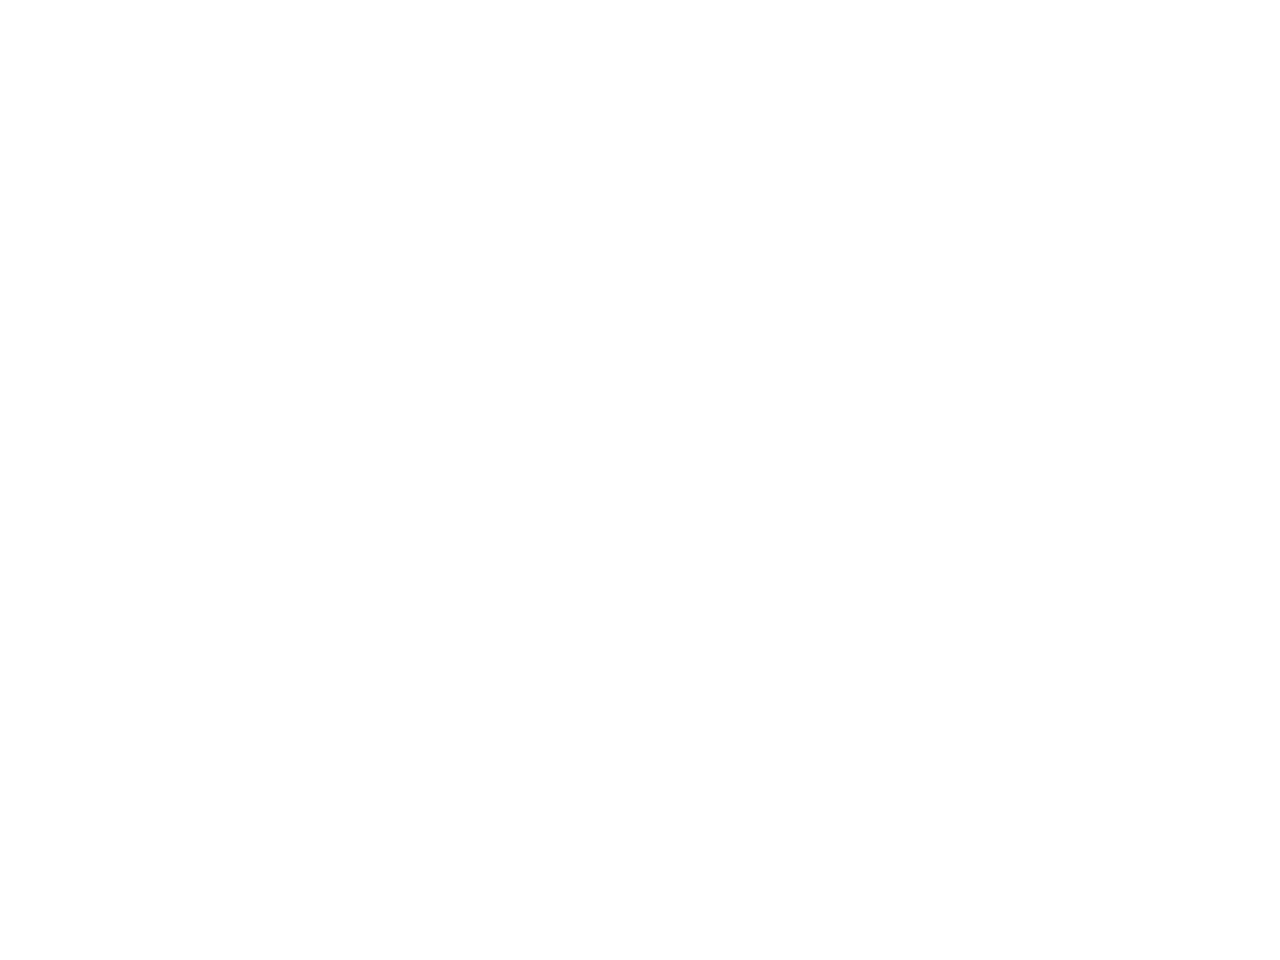

In [11]:
from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

x = replicate_1_concatenated.loc[1, [f"x_{format_tad_name(tad)}" for tad in range(50)]]
y = replicate_1_concatenated.loc[1, [f"y_{format_tad_name(tad)}" for tad in range(50)]]
z = replicate_1_concatenated.loc[1, [f"z_{format_tad_name(tad)}" for tad in range(50)]]

ax.set_title("TAD Localization Visualization")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(0, 5)
ax.scatter3D(x, y, z, cmap='Greens');

In [12]:
replicate_4_concatenated[replicate_4_concatenated["FOV_id"] == 1]

cell_id  cell_size  FOV_id  x_centroid  y_centroid  \
267    23513  79.793424       1    7.292761  120.778782   
268    23521  62.379072       1    9.016762  110.025013   
269    23531  59.416416       1   11.415846   55.071668   
270    23533  74.719584       1   10.063634   15.750904   
271    23534  66.414816       1   13.480544   77.818903   
..       ...        ...     ...         ...         ...   
515    24037  83.794176       1  157.546714   90.868489   
516    24039  79.210224       1  159.975671   54.547980   
517    24041  51.263280       1  161.633995   43.478815   
518    24043  43.320096       1  161.338371   36.500889   
519    24050  72.456768       1  162.353808   19.438603   

     gene_expression_counts_1  gene_expression_counts_2  \
267                         0                         0   
268                         0                         0   
269                         0                         0   
270                         0                         0   
271                         0                         0   
..                        ...                       ...   
515                         0                         0   
516                         6                         0   
517                         1                         0   
518                         0                         0   
519                         0                         0   

     gene_expression_counts_3  gene_expression_counts_4  \
267                         0                         0   
268                         0                         0   
269                         0                         0   
270                         0                         0   
271                         0                         1   
..                        ...                       ...   
515                         0                         0   
516                         0                         1   
517                         0                         0   
518                         0                         0   
519                         0                         2   

     gene_expression_counts_5  ...  z_TAD_40  z_TAD_41  z_TAD_42  z_TAD_43  \
267                         0  ...  2.227391  2.545237  0.000000  1.910629   
268                         0  ...  5.222887  4.889912  2.672620  3.040470   
269                         0  ...  2.360208  2.674218  3.127180  3.196371   
270                         0  ...  1.940089  0.000000  0.909576  3.806614   
271                         0  ...  0.831272  0.373183  0.000000  0.396533   
..                        ...  ...       ...       ...       ...       ...   
515                         0  ...  0.000000  0.213201  0.444450  0.583721   
516                         0  ...  0.000000  0.683591  0.065321  1.401180   
517                         0  ...  2.954280  2.548820  0.000000  0.376059   
518                         0  ...  2.098017  1.509287  0.100762  1.053165   
519                         0  ...  0.242585  0.021106  0.129717  1.275874   

     z_TAD_44  z_TAD_45  z_TAD_46  z_TAD_47  z_TAD_48  z_TAD_49  
267  2.869957  3.829659  3.258341  0.000000  3.334689  2.433230  
268  5.528446  5.306216  4.663083  5.030950  0.000000  0.000000  
269  2.914774  3.189253  2.646494  0.000000  2.936723  3.224855  
270  3.044365  0.811775  0.000000  0.000000  1.506393  2.869956  
271  3.518695  0.013534  0.832894  0.790487  0.689041  1.217213  
..        ...       ...       ...       ...       ...       ...  
515  0.956191  0.491522  6.163020  0.000000  0.713041  0.896134  
516  1.088261  1.807955  1.288111  3.535274  0.490716  0.483478  
517  1.656784  0.958881  2.120055  1.164643  0.786857  0.739444  
518  2.220353  1.470001  1.208232  2.218555  0.597792  0.141076  
519  0.418219  0.000000  0.215229  0.587765  0.695258  0.000000  

[253 rows x 293 columns]

## Converting to `AnnData` objects

In [13]:
# grouped_dataframe = data.groupby(['fov', 'dataset_id'])
# group_index_mapping = grouped_dataframe.indices

datasets = []
GENE_EXPRESSION_COLUMNS = [f"gene_expression_counts_{gene_index + 1}" for gene_index in range(137)]
METADATA_COLUMNS = ["cell_id", "cell_id_", "cell_size", "FOV_id"]
COORDINATE_COLUMNS = ["x_centroid", "y_centroid"]
for replicate, concatenated in enumerate([replicate_1_concatenated, replicate_2_concatenated, replicate_3_concatenated, replicate_4_concatenated]):
    replicate_datasets = []
    for fov, dataframe in concatenated.groupby(['FOV_id']):
        dataframe.index = dataframe.index.map(str)
        dataframe.fillna(value=0)
        dataset = anndata.AnnData(X=dataframe.drop(columns = METADATA_COLUMNS + COORDINATE_COLUMNS))
        dataset.obs = dataframe[METADATA_COLUMNS]
        dataset.obsm["spatial"] = dataframe[COORDINATE_COLUMNS].values
        dataset.var = dataset.var.rename({gene_index : gene_name for gene_index, gene_name in zip(GENE_EXPRESSION_COLUMNS, gene_list)})
    
        fov = int(fov)
    #     dataset.uns["spatial"] = {f"fov_{fov}_dataset_{dataset_id}":
    #         {"images": {},
    #          "scalefactors": {}
    #         }
    #     }

        # Subset dataset by quality control metrics
        # index = ~dataset.obs["on_edge"] & dataset.X.sum(axis=1) > 0
        index = dataset.X.sum(axis=1) > 0
        dataset = dataset[index]
        if not len(dataset):
            continue
            
        dataset.raw = dataset
        # TODO: should I apply this scaling to the TAD info as well?
        dataset.X[dataset.var.isin(GENE_EXPRESSION_COLUMNS)] = np.log(dataset.raw.X[dataset.var.isin(GENE_EXPRESSION_COLUMNS)] * 1e4 + 1)

    #     spatial_data = dataset.uns["spatial"][f"fov_{fov}_dataset_{dataset_id}"]
    #     spatial_data["images"]["segmentation"] = np.array(display_image(images[dataset_id, fov]))
    #     spatial_data["scalefactors"]["tissue_segmentation_scalef"] = 1

        replicate_datasets.append(dataset)
        
    datasets.append(replicate_datasets)

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/anndata/utils.py:143: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  del sys.path[0]


<IPython.core.display.Javascript object>


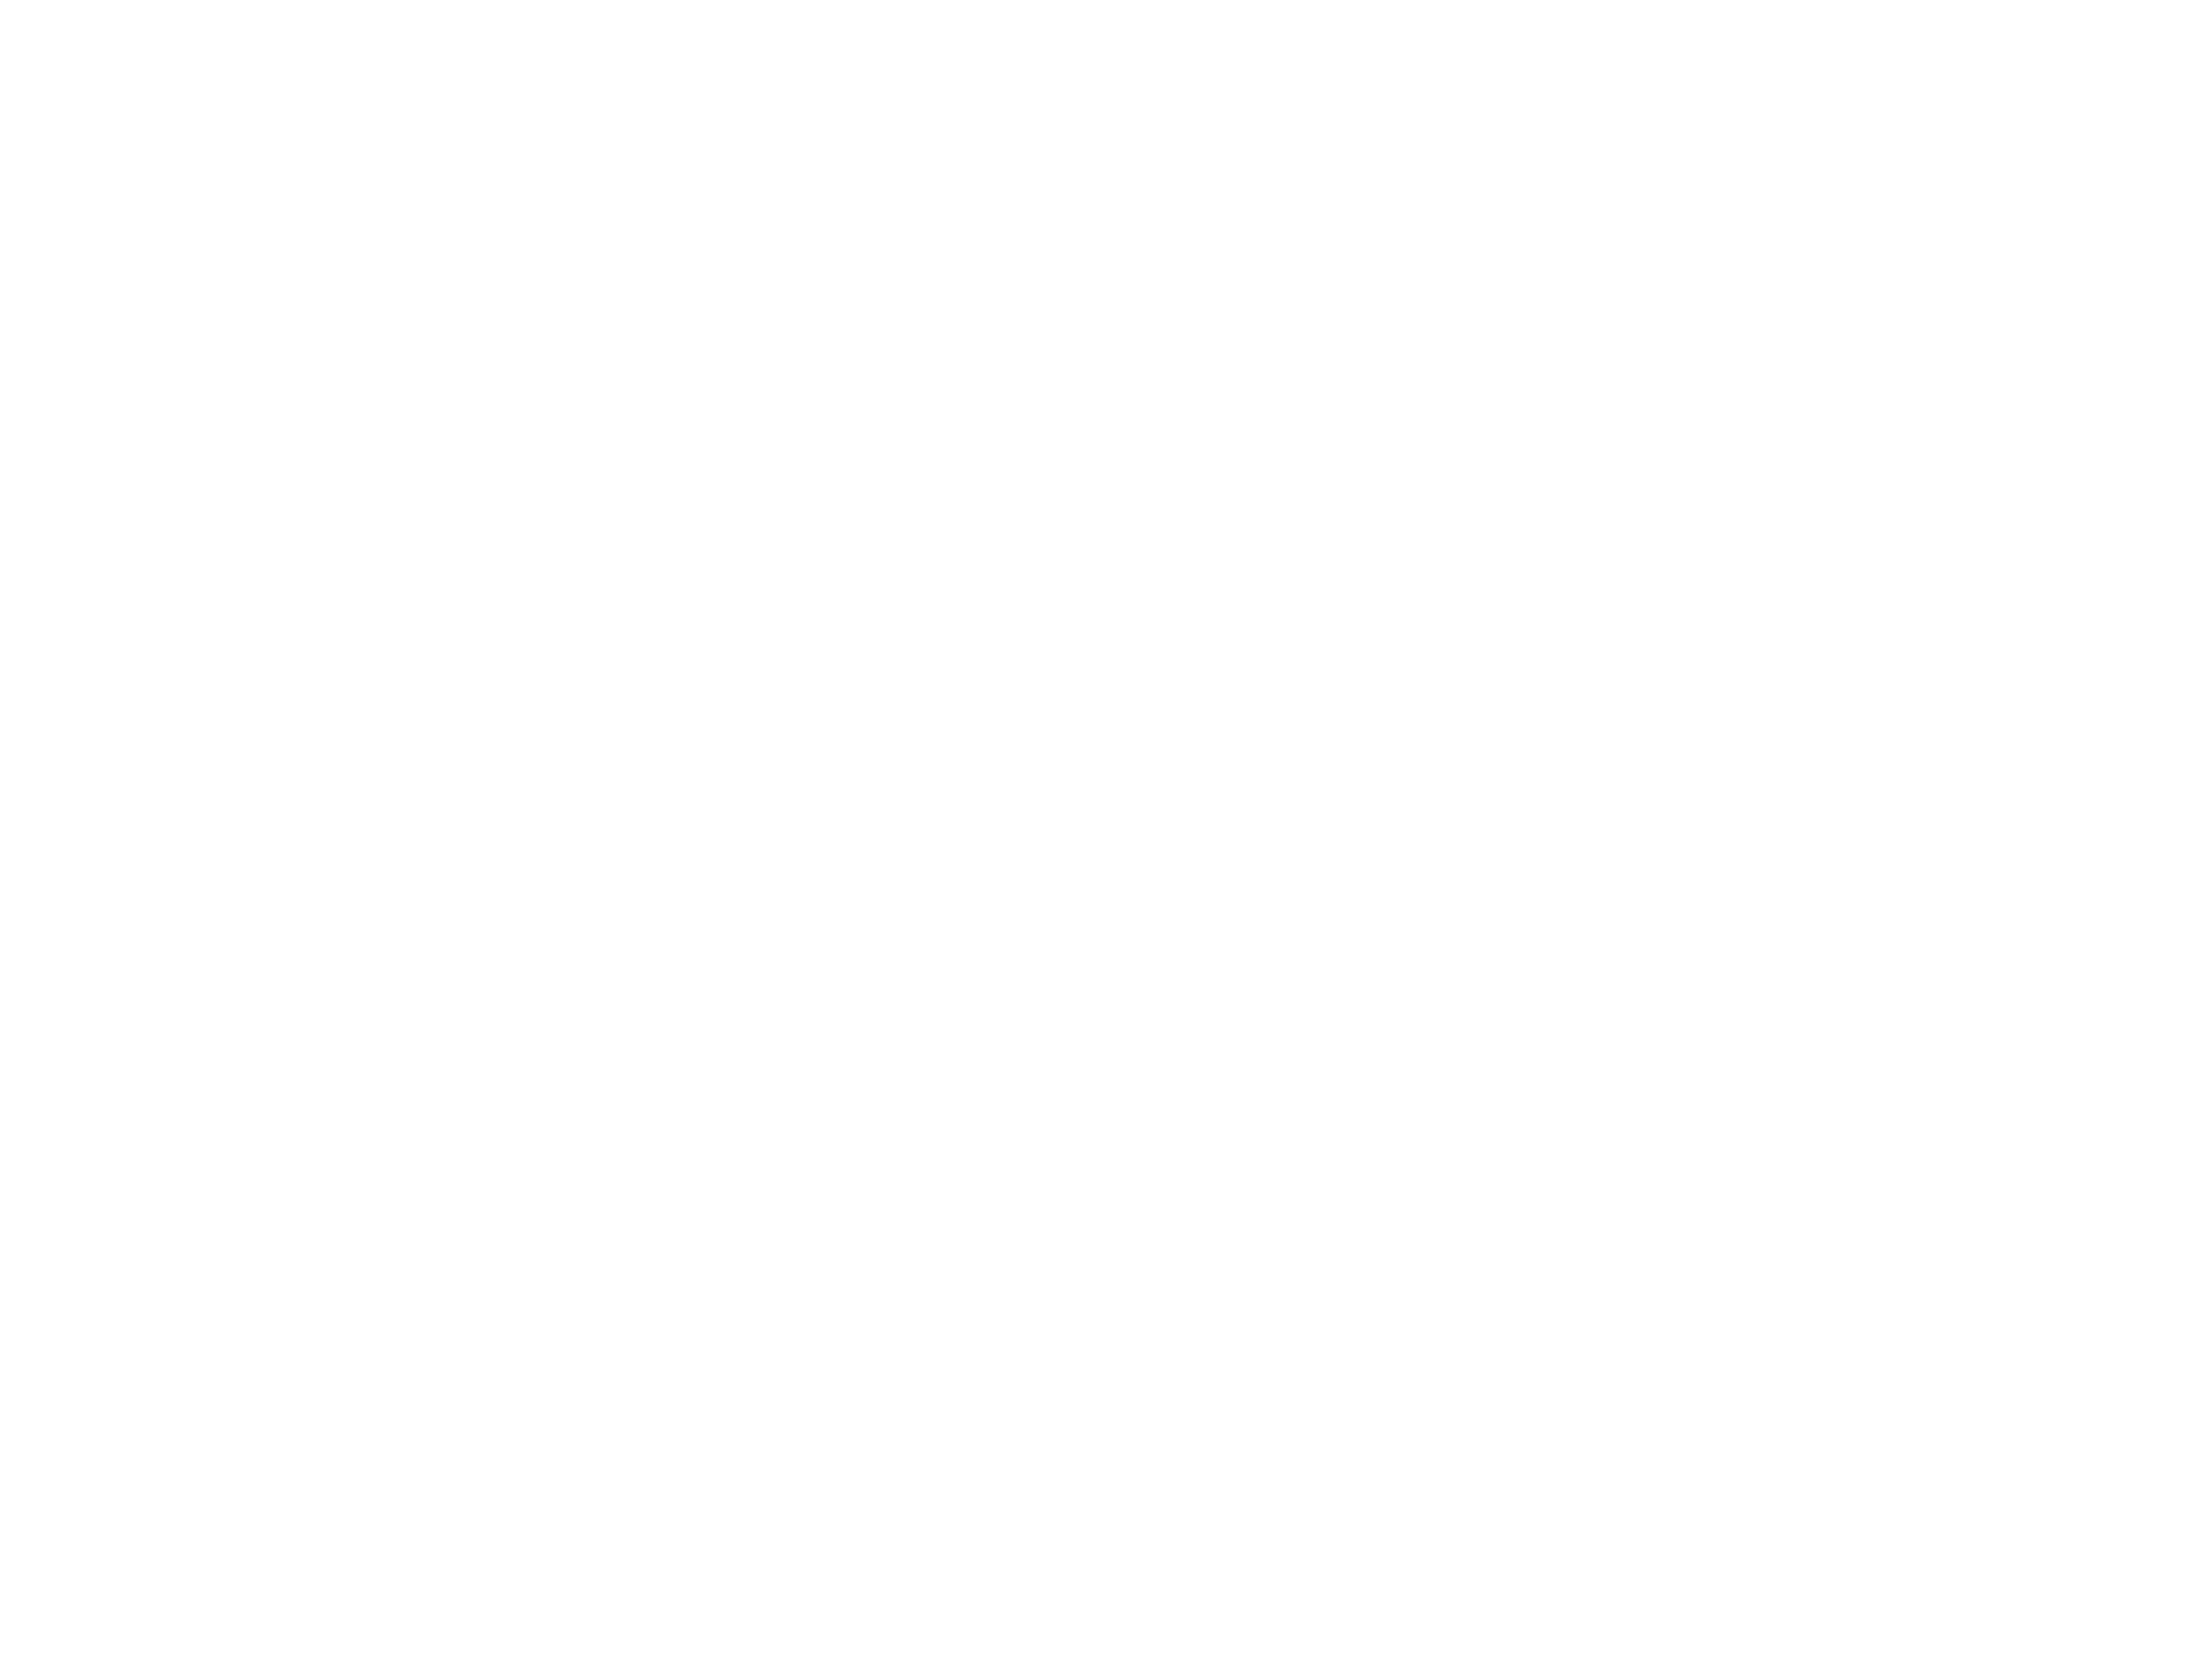

In [14]:
sq.gr.spatial_neighbors(datasets[-1][-2], coord_type="generic", delaunay=True)
plt.figure(dpi=600)
ax = plt.subplot()
sc.pl.spatial(
    datasets[-1][-2],
    # color="cell type",
    neighbors_key="spatial_neighbors",
    spot_size=1,
    edges=True,
    edges_width=0.5,
    # img_key="segmentation",
    # alpha_img=0.5,
    ax=ax
)

In [15]:
# Example

# adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
# adata.uns["spatial"]

In [16]:
# Removing large edge artifacts from Delaunay

def remove_connectivity_artifacts(sparse_distance_matrix):
    dense_distances = sparse_distance_matrix.toarray()
    distances = sparse_distance_matrix.data
    cutoff = np.percentile(distances, 94.5)
    mask = dense_distances < cutoff
    
    return csr_matrix(dense_distances * mask)

datasets[-1][-2].obsp["spatial_connectivities"] = remove_connectivity_artifacts(datasets[-1][-2].obsp["spatial_distances"])

<IPython.core.display.Javascript object>


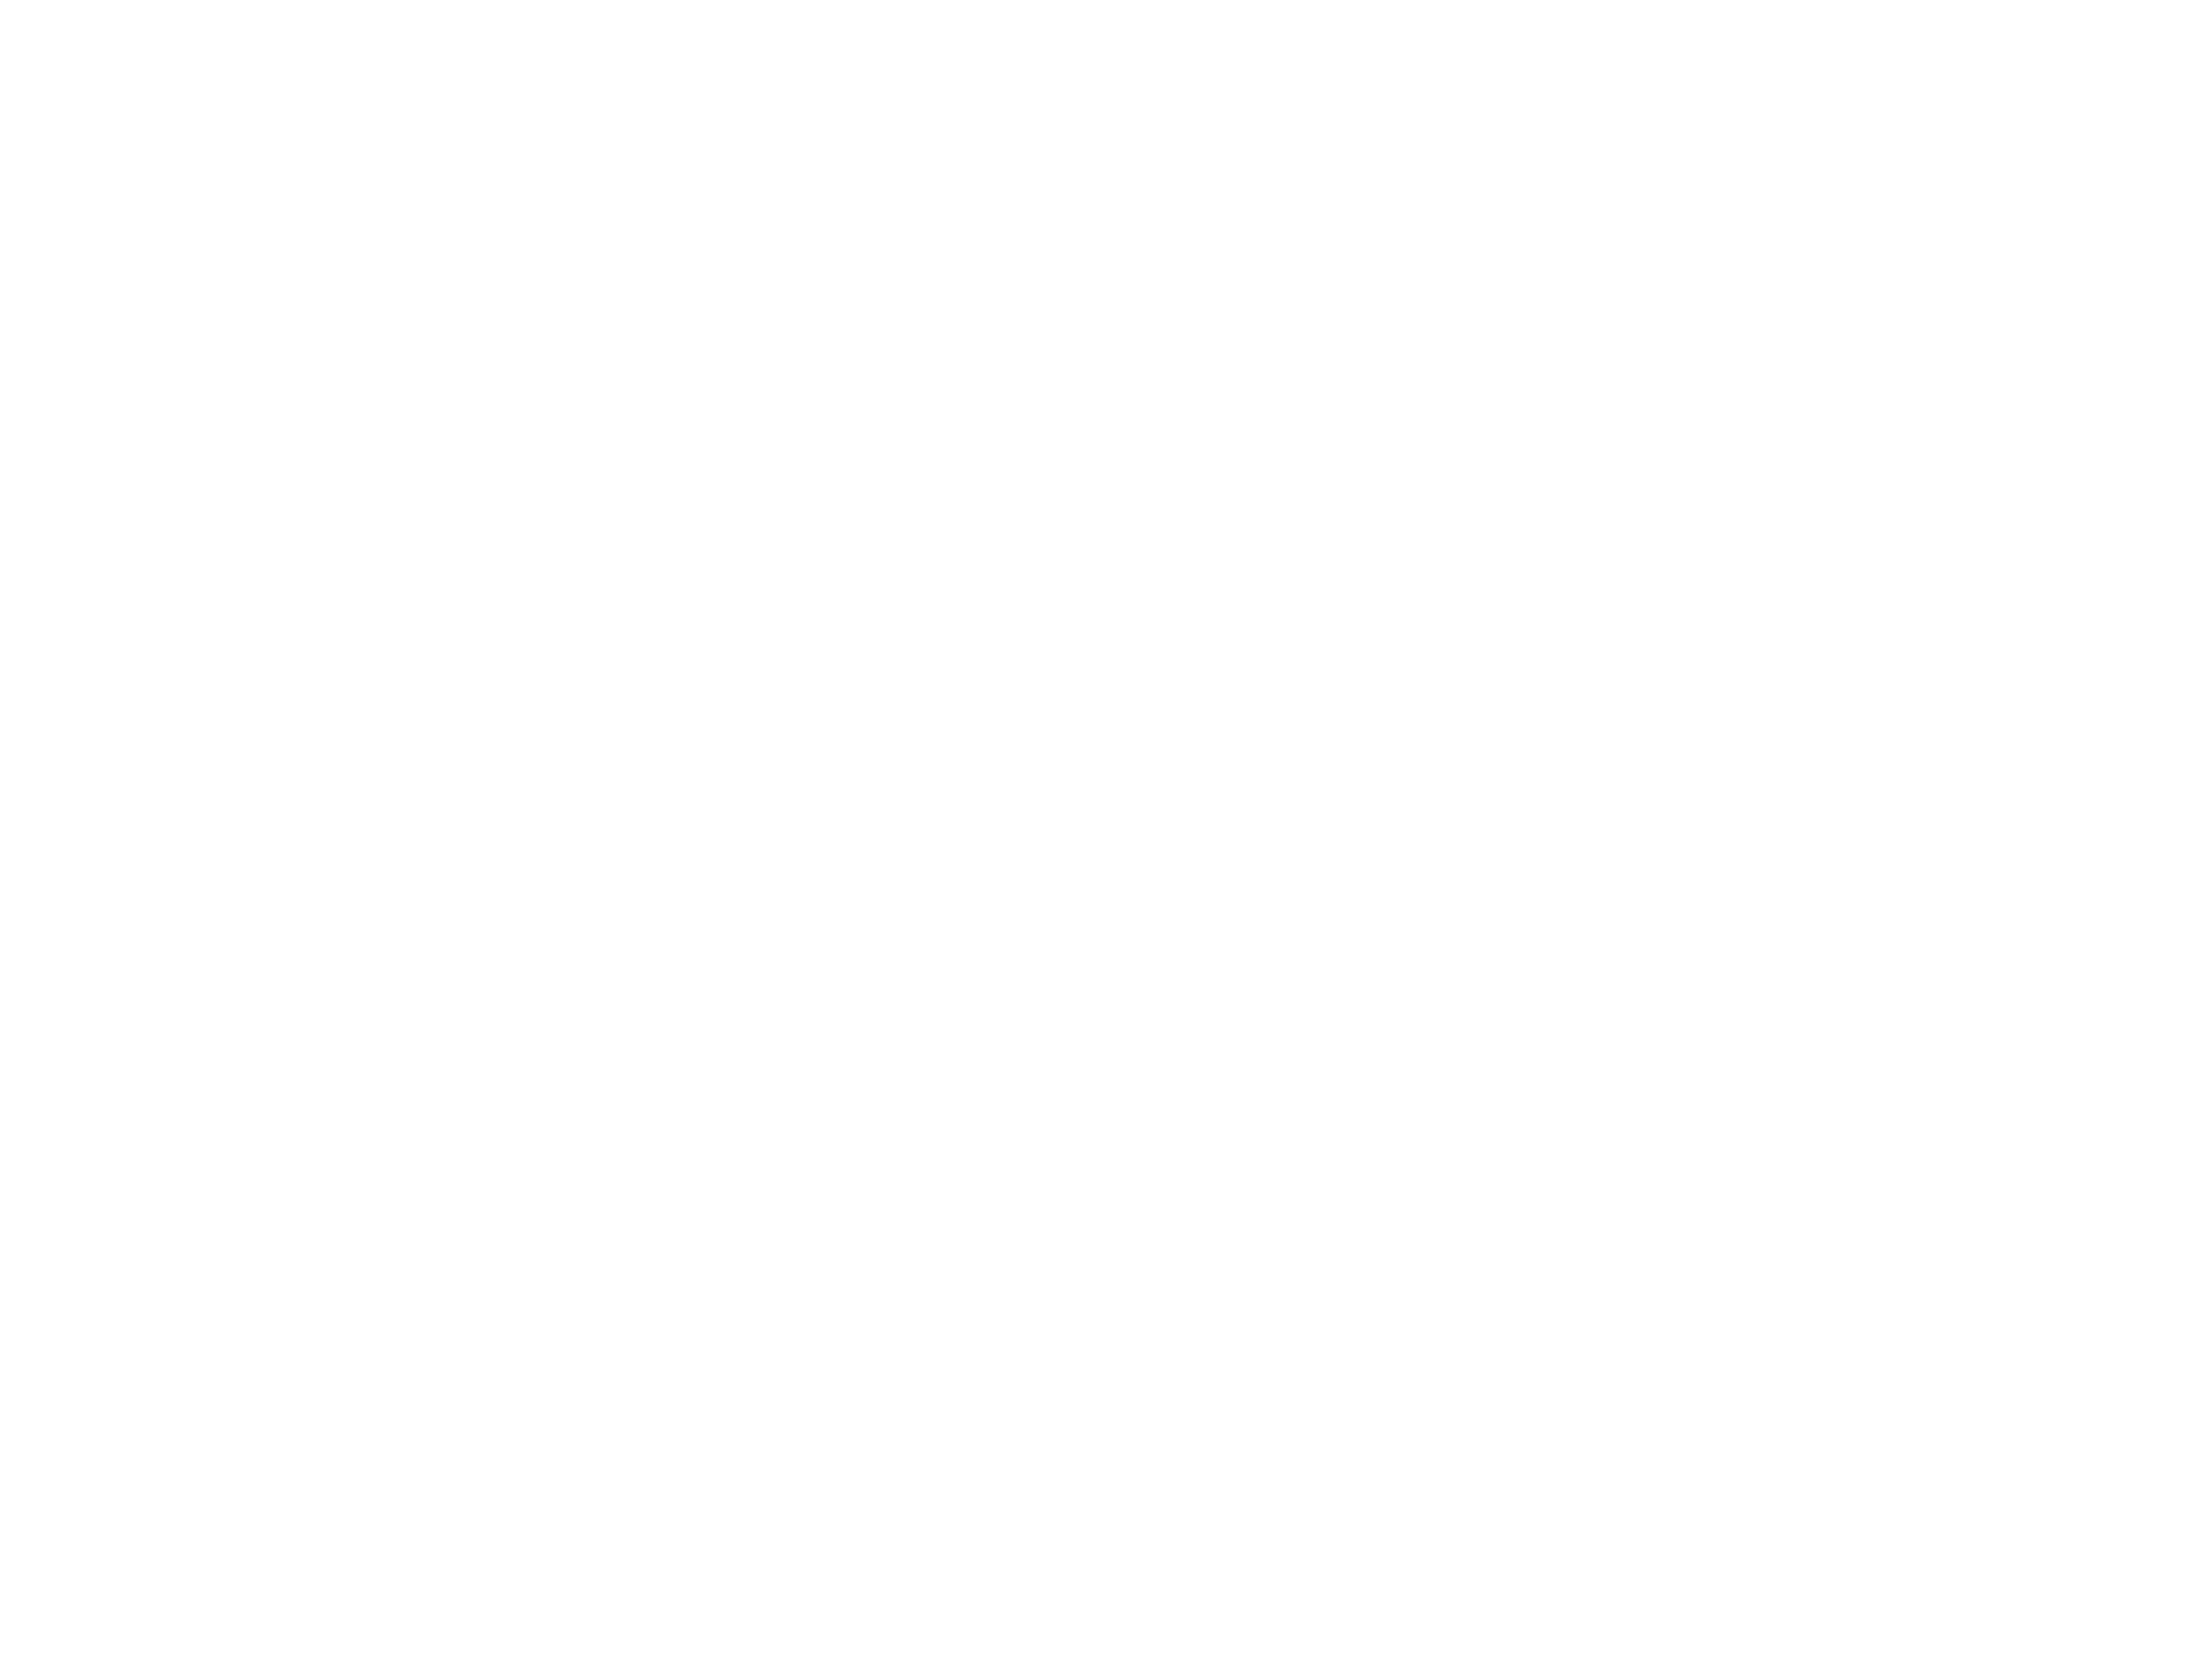

In [17]:
plt.figure(dpi=600)
ax = plt.subplot()
sc.pl.spatial(
    datasets[-1][-2],
    # color="cell type",
    neighbors_key="spatial_neighbors",
    spot_size=1,
    edges=True,
    edges_width=0.5,
    img_key="segmentation",
    alpha_img=0.5,
    ax=ax
)

<IPython.core.display.Javascript object>


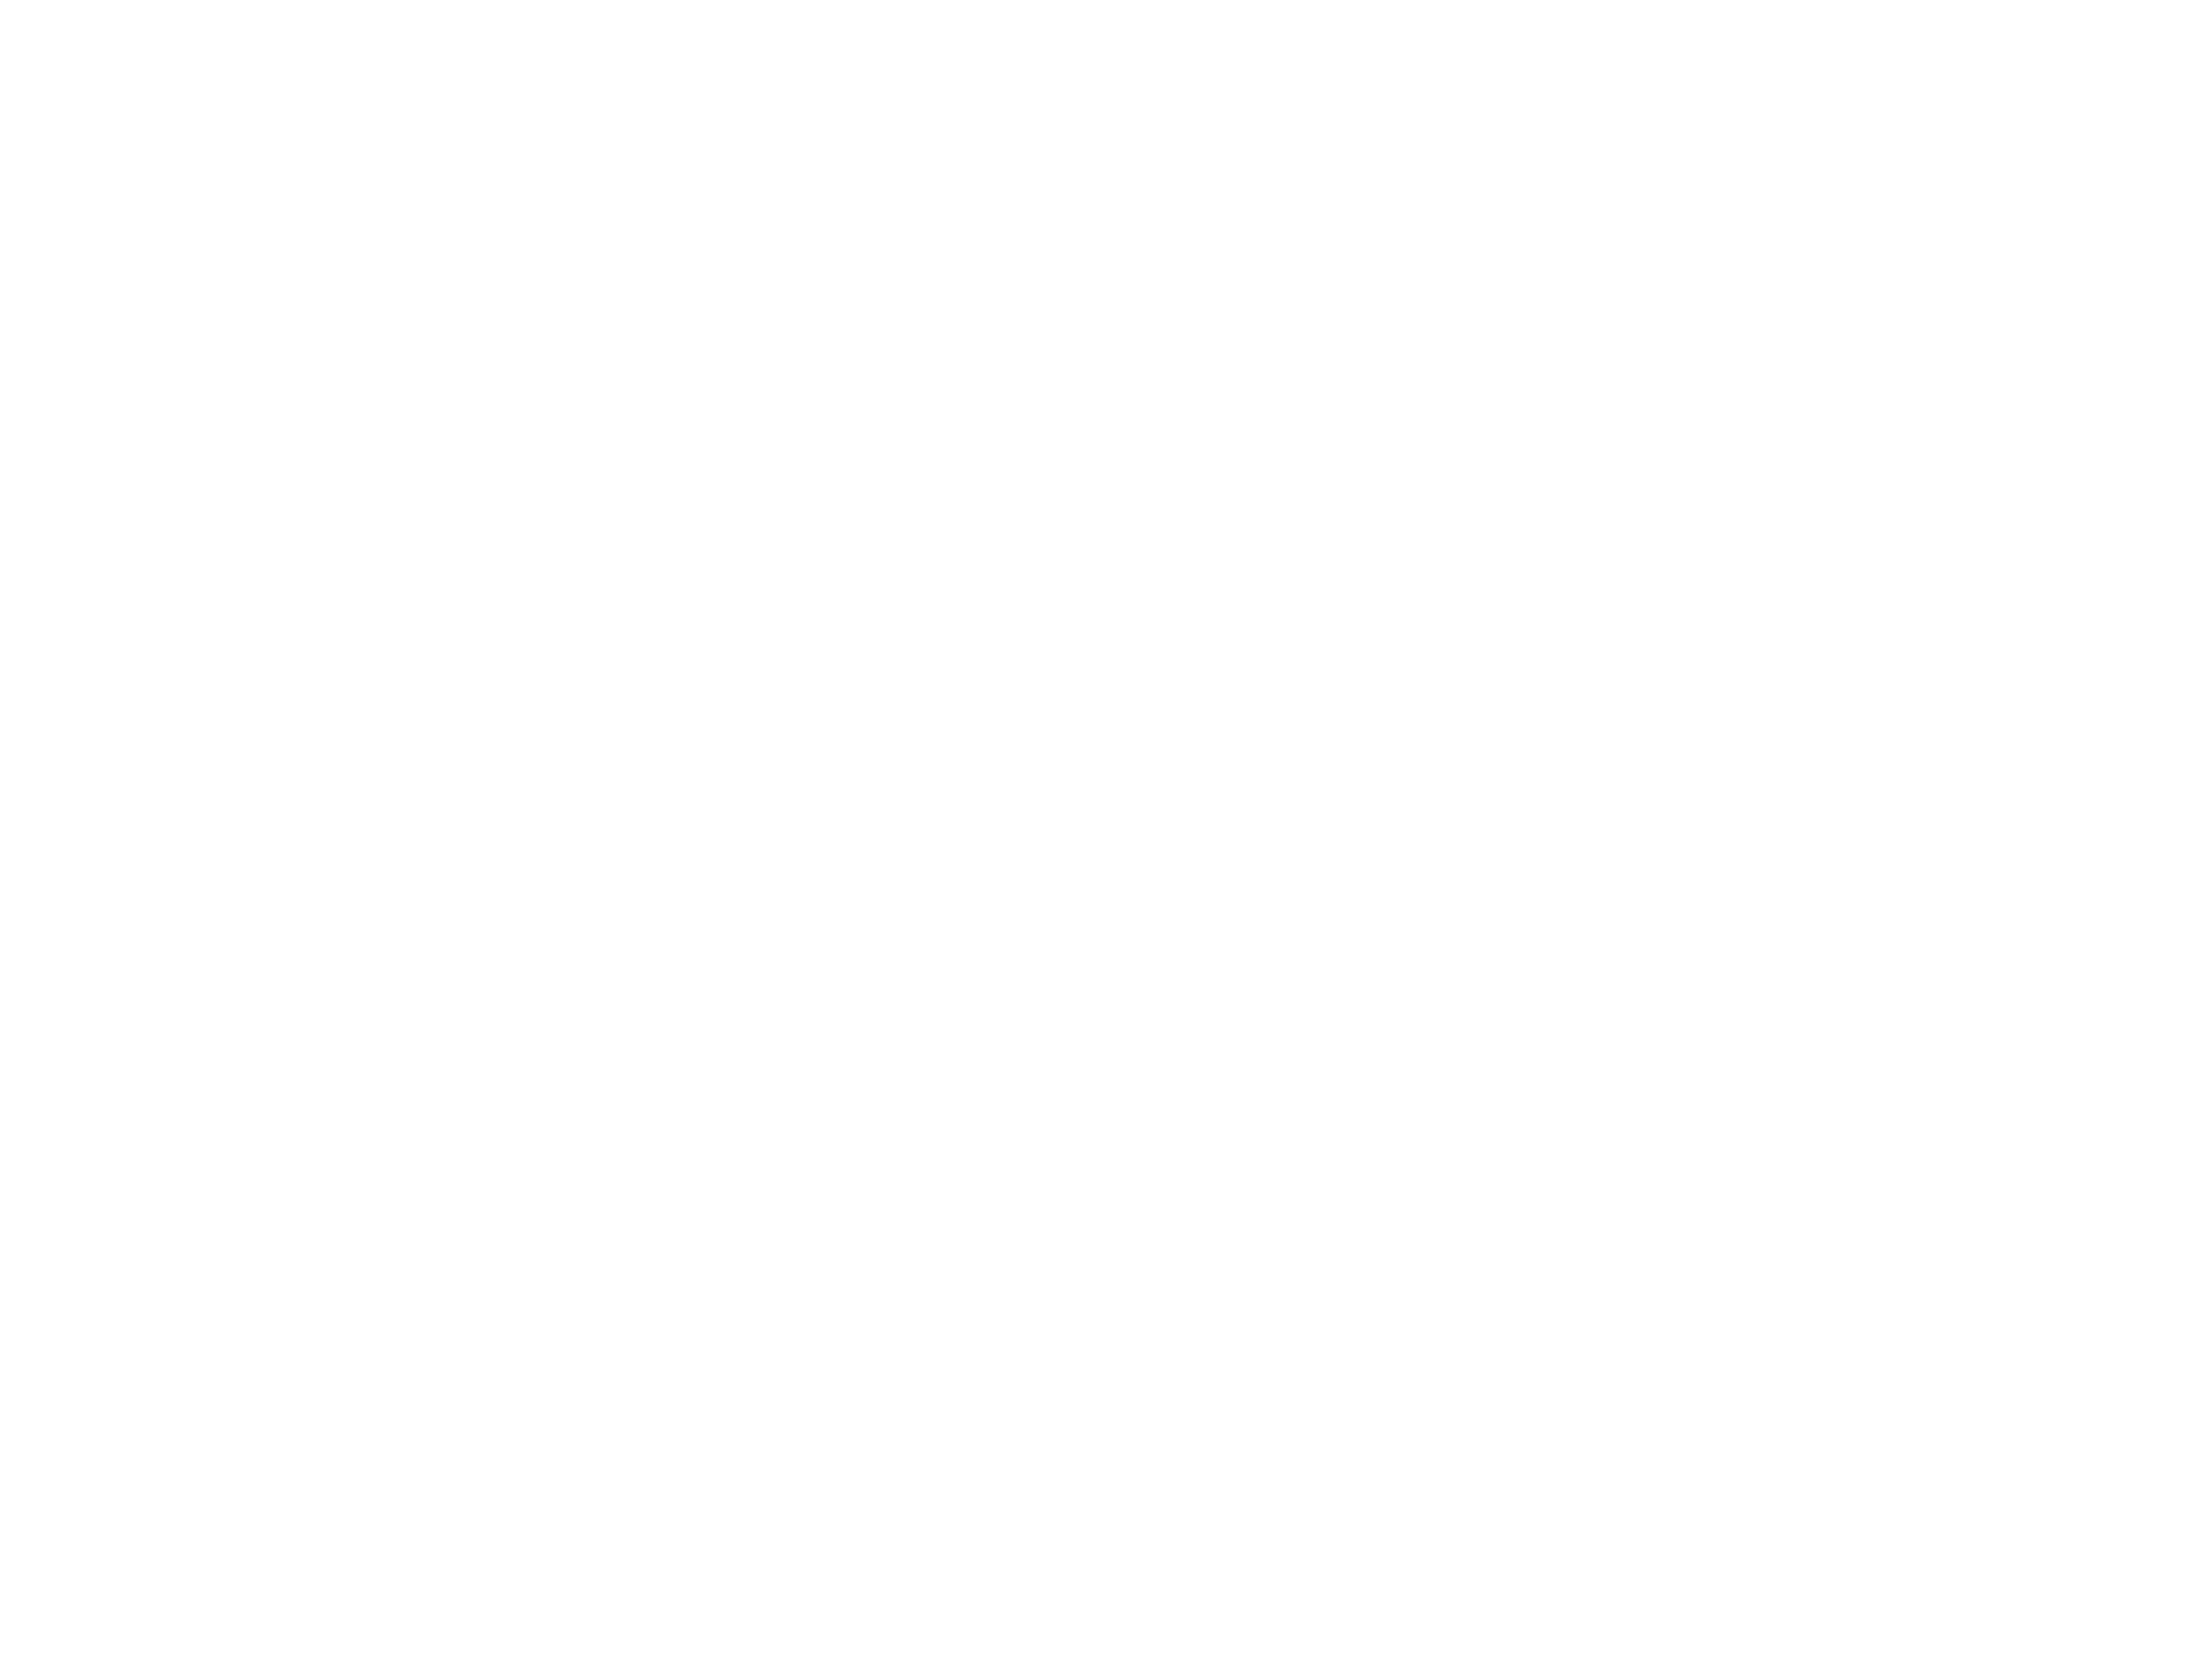

I     pval_norm  var_norm  pval_norm_fdr_bh
Ahnak     0.336786  0.000000e+00  0.001374          0.000000
Scd2      0.204183  1.033949e-08  0.001374          0.000001
Slc40a1   0.177606  5.062836e-07  0.001374          0.000048
Ganab     0.159659  5.289511e-06  0.001374          0.000345
Pxdn      0.158638  6.004028e-06  0.001374          0.000345
Eif3a     0.156390  7.916246e-06  0.001374          0.000379
Hmgcs1    0.135411  8.814613e-05  0.001374          0.003614
Add3      0.129510  1.643436e-04  0.001374          0.005896
Podxl     0.127562  2.008117e-04  0.001374          0.006404
Fam46c    0.117772  5.285357e-04  0.001374          0.015169
x_TAD_37  0.108877  1.203084e-03  0.001374          0.031390
Vcam1     0.103677  1.898237e-03  0.001374          0.045400
y_TAD_20  0.102231  2.147883e-03  0.001374          0.047419
Jak2      0.099595  2.680857e-03  0.001374          0.054958
Mrc1      0.095817  3.653451e-03  0.001374          0.069903
Tmod1     0.094160  4.171880e-03  0.001374          0.074833
Myh10     0.090851  5.408595e-03  0.001374          0.091310
Cybb      0.089351  6.069551e-03  0.001374          0.094663
Ranbp6    0.088931  6.266894e-03  0.001374          0.094663
Mrvi1     0.088130  6.659144e-03  0.001374          0.095559

In [18]:
plt.figure(dpi=600)
ax = plt.subplot()
sq.gr.spatial_autocorr(datasets[-1][-2], mode="moran")
most_spatial_gene = datasets[-1][-2].uns["moranI"].index[1]
display(datasets[-1][-2].uns["moranI"].head(20))
# threshold = np.percentile(dataset.X.sum(axis=1))
sc.pl.spatial(
    datasets[-1][-2],
    color=[most_spatial_gene],
    img_key="segmentation",
    spot_size=10,
    alpha_img=0.2,
    ax=ax
)

## Preprocessing for SpiceMix

In [19]:
from collections import defaultdict

top_gene_counts = defaultdict(int)

In [20]:
replicate_names = []
for replicate, replicate_datasets in enumerate(datasets):
    for fov, dataset in enumerate(replicate_datasets):
        sq.gr.spatial_neighbors(dataset, coord_type="generic", delaunay=True)
        dataset.obsp["spatial_connectivities"] = remove_connectivity_artifacts(dataset.obsp["spatial_distances"])
        dataset.obsp["adjacency_matrix"] = dataset.obsp["spatial_connectivities"]
        sq.gr.spatial_autocorr(dataset, mode="moran")
        top_spatial_genes = dataset.uns["moranI"].head().index
        for gene in top_spatial_genes:
            top_gene_counts[gene] +=1
        
        dataset.obs["replicate"] = replicate
        replicate_name = f"replicate_{replicate}_fov_{fov}"
        replicate_names.append(replicate_name)

In [21]:
flattened_datasets =  sum(datasets, [])

In [22]:
genes, counts = zip(*top_gene_counts.items())

In [23]:
ratios = np.array(counts) / sum(len(fovs) for fovs in datasets)

In [24]:
sorted_indices = np.argsort(ratios)[::-1]
print(ratios[sorted_indices])
print(np.array(genes)[sorted_indices])

[0.51020408 0.40816327 0.24489796 0.2244898  0.2244898  0.2244898
 0.2244898  0.18367347 0.16326531 0.14285714 0.14285714 0.12244898
 0.12244898 0.10204082 0.10204082 0.08163265 0.08163265 0.08163265
 0.08163265 0.06122449 0.06122449 0.06122449 0.06122449 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816]
['Scd2' 'Eif3a' 'Fam46c' 'Mrvi1' 'Hmgcs1' 'Timp3' 'Hnrnpul2' 'Fgb' 'Gnaz'
 'Rtn3' 'Ganab' 'Mmrn1' 'Slc40a1' 'Emb' 'Rgn' 'Vcam1' 'Aldob' 'Tm9sf3'
 'Tmod1' 'Tmem2' 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


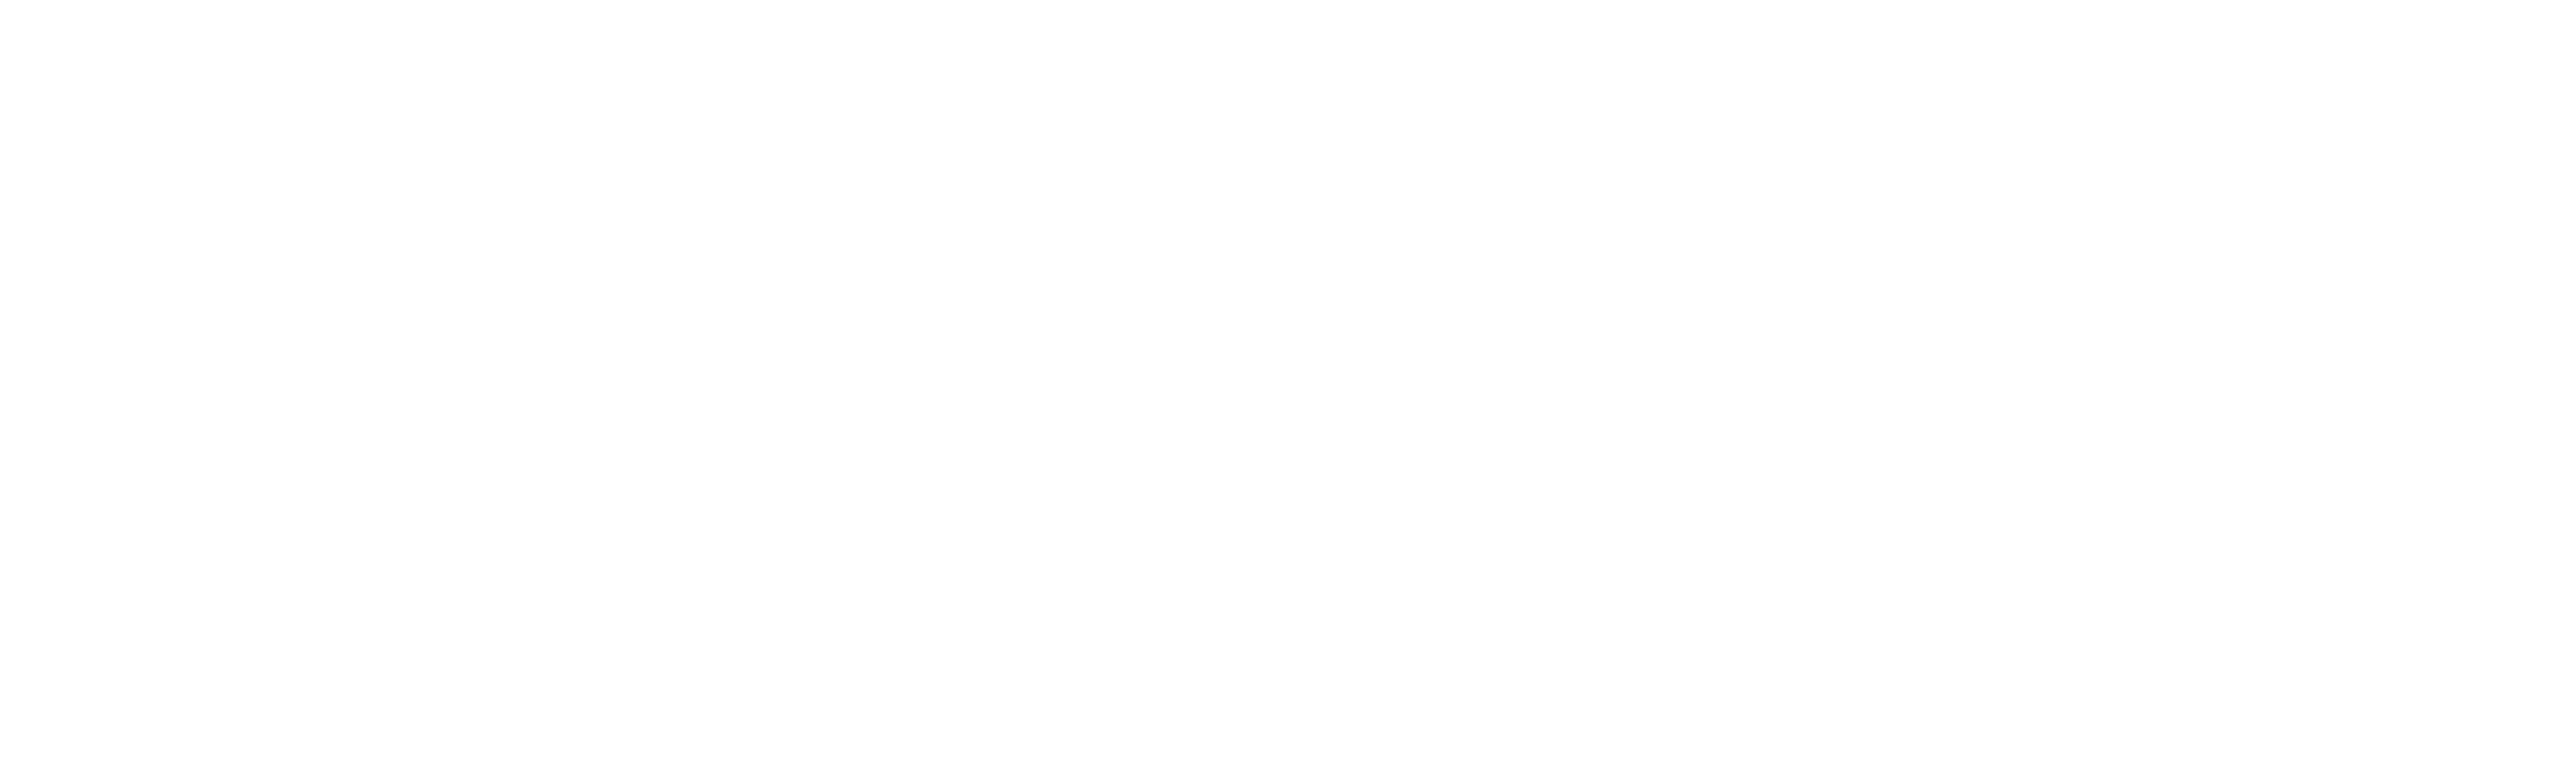

In [25]:
plt.figure(dpi=2400)
fig, axes = plt.subplots(4, 13, figsize=(40,12))
for replicate_axes, replicate_datasets in zip(axes, datasets):
    for ax, dataset in zip(replicate_axes, replicate_datasets):
        sc.pl.spatial(
            dataset,
            color=["Scd2"],
            spot_size=8,
            alpha_img=0.2,
            ax=ax,
            show=False
        )

In [8]:
import load_data
reload(load_data)
from load_data import save_anndata, load_anndata

In [27]:
anndata_fullpath = data_directory / "preprocessed_spicemix_dataset.h5"
merged_dataset = save_anndata(anndata_fullpath, flattened_datasets, replicate_names)

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [38]:
anndata_subset_fullpath = data_directory / "preprocessed_spicemix_subset.h5"
flattened_subset = flattened_datasets[:4]
subset_names = replicate_names[:4]
merged_subset = save_anndata(anndata_subset_fullpath, flattened_subset, subset_names)

In [40]:
merged_subset.X.min()

0.0

## Run SpiceMix - Shared Metagenes 

In [3]:
import torch
import model
import estimate_parameters
import estimate_weights
import sample_for_integral
reload(model)
reload(estimate_parameters)
reload(sample_for_integral)
reload(estimate_weights)
from model import SpiceMixPlus

In [4]:
path2dataset = Path('../tests/test_data/synthetic_500_100_20_15_0_0_i4')

num_fovs = 49
mina_spicemix = SpiceMixPlus(
    K=10, lambda_Sigma_x_inv=1e-2,
    repli_list=np.arange(num_fovs),
    #repli_list=list(range(1)),
    context=dict(device='cuda:0', dtype=torch.float32),
    context_Y=dict(dtype=torch.float32, device='cuda:0'),
    prior_x_modes = [None] * num_fovs
)   
#mina_spicemix.load_dataset(path2dataset)
mina_spicemix.load_dataset(data_directory, data_format="anndata", anndata_filepath="preprocessed_spicemix_dataset.h5")
mina_spicemix.initialize(
#     method='kmeans',
    method='svd',
)   

mina_spicemix.initialize_Sigma_x_inv()
torch.manual_seed(0)
import numpy as np
np.random.seed(0)
for iteration in range(1, 2): 
    mina_spicemix.estimate_parameters(iiter=iteration, use_spatial=[True]*mina_spicemix.num_repli)
    mina_spicemix.estimate_weights(iiter=iteration, use_spatial=[True]*mina_spicemix.num_repli)

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/work/magroup/shahula/spatiotemporal_transcriptomics_integration/SpiceMixPlus/SpiceMix/load_data.py:101: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  dataset.obs["adjacency_list"] = adjacency_list
/work/magroup/shahula/spatiotemporal_transcriptomics_integration/SpiceMixPlus/SpiceMix/load_data.py:107: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  i = torch.LongTensor(indices)


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [31]:
trained_fullpath = data_directory / "trained_spicemix_results.h5"
trained_dataset = save_anndata(trained_fullpath, mina_spicemix.datasets, np.arange(49))

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [32]:
trained_datasets = load_anndata(trained_fullpath, np.arange(49), context="numpy")
[dataset.obsm["X"] for dataset in trained_datasets]

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[array([[2.2501366e+02, 2.4203176e-08, 2.4203176e-08, ..., 2.4203176e-08,
         1.7018120e+01, 2.4203176e-08],
        [1.8074458e+02, 2.4513882e+01, 1.8943531e+01, ..., 2.4502071e-08,
         1.9869577e+01, 2.4502071e-08],
        [1.3296210e+02, 1.8650711e-08, 4.6087742e+01, ..., 1.8650711e-08,
         4.5717101e+00, 1.8650711e-08],
        ...,
        [2.5008809e+02, 3.2505539e+01, 6.8690254e+01, ..., 2.3191128e+00,
         9.0042372e+00, 3.6951558e-08],
        [2.1941690e+02, 1.0246693e+02, 4.5737583e+01, ..., 8.0601864e+00,
         4.8135208e+01, 4.2381679e-08],
        [1.8691113e+02, 1.9277517e+01, 2.0618865e-08, ..., 2.0618865e-08,
         2.0618865e-08, 2.0618865e-08]], dtype=float32),
 array([[2.3189398e+02, 4.0458130e+01, 2.7847751e-08, ..., 2.7847751e-08,
         2.7847751e-08, 2.7847751e-08],
        [2.2593901e+02, 3.0486451e-08, 1.5910748e+01, ..., 8.8074799e+00,
         5.4207275e+01, 3.0486451e-08],
        [2.2211920e+02, 6.4064188e+00, 2.2852563e-08, ...,

In [1]:
from scanpy.metrics._morans_i import morans_i

# morans_i(dataset.obsp["adjacency_matrix"], dataset.obsm["X"].T)
for dataset in trained_datasets:
    print(morans_i(dataset.obsp["adjacency_matrix"], dataset.obsm["X"].T))
#     sc.metrics.morans_i(dataset, use_graph="adjacency_matrix", obsm="X")

NameError: name 'trained_datasets' is not defined

In [ ]:
%matplotlib inline
plt.figure(dpi=2400)
fig, axes = plt.subplots(4, 13, figsize=(40,12))
for ax, dataset in zip(axes.flatten(), trained_datasets):
    sc.pl.spatial(
        sq.pl.extract(dataset, "X"),
        color=["4"],
        spot_size=8,
        alpha_img=0.2,
        ax=ax,
        show=False
    )

## Run SpiceMix - Differential Metagenes 

In [5]:
import torch
import model
import estimate_parameters
import estimate_weights
import sample_for_integral
reload(model)
reload(estimate_parameters)
reload(sample_for_integral)
reload(estimate_weights)
from model import SpiceMixPlus

NameError: name 'esiitimate_weights' is not defined

In [6]:
path2dataset = Path('../tests/test_data/synthetic_500_100_20_15_0_0_i4')

num_fovs = 4
mina_spicemix = SpiceMixPlus(
    K=10, lambda_Sigma_x_inv=1e-2,
    repli_list=np.arange(num_fovs),
    metagene_mode="differential",
    lambda_M=0.5,
    #repli_list=list(range(1)),
    context=dict(device='cuda:0', dtype=torch.float32),
    context_Y=dict(dtype=torch.float32, device='cuda:0'),
    prior_x_modes = [None] * num_fovs
)   
#mina_spicemix.load_dataset(path2dataset)
mina_spicemix.load_dataset(data_directory, data_format="anndata", anndata_filepath="preprocessed_spicemix_subset.h5")
mina_spicemix.initialize(
#     method='kmeans',
    method='svd',
)   

mina_spicemix.initialize_Sigma_x_inv()
torch.manual_seed(0)
import numpy as np
np.random.seed(0)
for iteration in range(100): 
    mina_spicemix.estimate_parameters(iiter=iteration, use_spatial=[True]*mina_spicemix.num_repli)
    mina_spicemix.estimate_weights(iiter=iteration, use_spatial=[True]*mina_spicemix.num_repli)

/work/magroup/shahula/spatiotemporal_transcriptomics_integration/SpiceMixPlus/SpiceMix/load_data.py:101: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  dataset.obs["adjacency_list"] = adjacency_list


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-57045.10774087906


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33002.921875
M NAG Final Loss: 27800.46875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21972.453125
M NAG Final Loss: 18439.1953125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 38021.0
M NAG Final Loss: 31961.984375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39597.4609375
M NAG Final Loss: 33061.28125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -68663.3828125
Z_batch initial loss: -16220.6796875
Z_batch final loss: -17924.80859375
Z_batch initial loss: -19013.19921875
Z_batch final loss: -20716.3984375
Z_batch initial loss: -17156.861328125
Z_batch final loss: -18923.33203125
Z_batch initial loss: -11238.46875
Z_batch final loss: -12172.771484375
Z_batch initial loss: -5061.29833984375
Z_batch final loss: -5527.8935546875
Z_batch initial loss: -455.5165710449219
Z_batch final loss: -496.85821533203125
Z final loss: -76325.296875
Z initial loss: -76325.3046875
Z_batch initial loss: -22728.208984375
Z_batch final loss: -22729.34765625
Z_batch initial loss: -16465.443359375
Z_batch final loss: -16466.67578125
Z_batch initial loss: -18297.39453125
Z_batch final loss: -18298.125
Z_batch initial loss: -12457.435546875
Z_batch final loss: -12458.8759765625
Z_batch initial loss: -4290.7119140625
Z_batch final loss: -4290.9921875
Z_batch initial loss: -2123.34130859375
Z_batch final loss: -2123.3447265625
Z final loss:

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -43329.203125
Z_batch initial loss: -10211.2333984375
Z_batch final loss: -11525.814453125
Z_batch initial loss: -9650.591796875
Z_batch final loss: -10648.1015625
Z_batch initial loss: -8320.3095703125
Z_batch final loss: -9121.1162109375
Z_batch initial loss: -9092.6611328125
Z_batch final loss: -9956.541015625
Z_batch initial loss: -4414.4541015625
Z_batch final loss: -4848.1142578125
Z_batch initial loss: -2015.0679931640625
Z_batch final loss: -2293.417236328125
Z final loss: -48774.25
Z initial loss: -48774.2421875
Z_batch initial loss: -12943.1904296875
Z_batch final loss: -12943.638671875
Z_batch initial loss: -12858.83203125
Z_batch final loss: -12859.552734375
Z_batch initial loss: -8781.375
Z_batch final loss: -8782.7392578125
Z_batch initial loss: -8503.26953125
Z_batch final loss: -8503.673828125
Z_batch initial loss: -4680.521484375
Z_batch final loss: -4680.84326171875
Z_batch initial loss: -1030.21484375
Z_batch final loss: -1030.31689453125
Z final loss

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -67099.984375
Z_batch initial loss: -17339.69921875
Z_batch final loss: -19239.427734375
Z_batch initial loss: -13235.9375
Z_batch final loss: -14999.03515625
Z_batch initial loss: -15413.220703125
Z_batch final loss: -17218.08984375
Z_batch initial loss: -12219.306640625
Z_batch final loss: -13652.8603515625
Z_batch initial loss: -7913.8505859375
Z_batch final loss: -8750.607421875
Z_batch initial loss: -1296.5814208984375
Z_batch final loss: -1490.710693359375
Z_batch initial loss: -116.25547790527344
Z_batch final loss: -124.7494888305664
Z final loss: -76042.0234375
Z initial loss: -76042.0234375
Z_batch initial loss: -23008.5390625
Z_batch final loss: -23010.48828125
Z_batch initial loss: -15755.4013671875
Z_batch final loss: -15757.255859375
Z_batch initial loss: -15688.3720703125
Z_batch final loss: -15689.48828125
Z_batch initial loss: -13382.7138671875
Z_batch final loss: -13383.3984375
Z_batch initial loss: -8257.4580078125
Z_batch final loss: -8258.1806640625

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -68391.46875
Z_batch initial loss: -13361.6171875
Z_batch final loss: -15079.9765625
Z_batch initial loss: -19991.83203125
Z_batch final loss: -22964.52734375
Z_batch initial loss: -12211.5078125
Z_batch final loss: -13874.517578125
Z_batch initial loss: -14693.572265625
Z_batch final loss: -16643.66796875
Z_batch initial loss: -8593.494140625
Z_batch final loss: -9561.6796875
Z final loss: -78610.96875
Z initial loss: -78610.953125
Z_batch initial loss: -25074.16015625
Z_batch final loss: -25075.236328125
Z_batch initial loss: -16216.0361328125
Z_batch final loss: -16217.9248046875
Z_batch initial loss: -17080.0859375
Z_batch final loss: -17081.15234375
Z_batch initial loss: -13527.6708984375
Z_batch final loss: -13528.7734375
Z_batch initial loss: -5997.4228515625
Z_batch final loss: -5997.5986328125
Z_batch initial loss: -747.3115234375
Z_batch final loss: -747.6173706054688
Z final loss: -78679.578125
Z initial loss: -78679.578125
Z_batch initial loss: -18800.222656

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-86178.39375978708


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 23236.640625
M NAG Final Loss: 21255.171875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 15259.53515625
M NAG Final Loss: 13886.55859375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 25973.1875
M NAG Final Loss: 24300.2421875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 24954.59375
M NAG Final Loss: 23008.0390625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -123430.390625
Z_batch initial loss: -30824.2890625
Z_batch final loss: -31016.822265625
Z_batch initial loss: -30280.71875
Z_batch final loss: -30469.8828125
Z_batch initial loss: -25765.6796875
Z_batch final loss: -25940.416015625
Z_batch initial loss: -23130.310546875
Z_batch final loss: -23310.560546875
Z_batch initial loss: -12940.748046875
Z_batch final loss: -13080.265625
Z_batch initial loss: -219.24314880371094
Z_batch final loss: -220.71334838867188
Z final loss: -123764.8203125
Z initial loss: -123764.8203125
Z_batch initial loss: -32554.537109375
Z_batch final loss: -32554.66015625
Z_batch initial loss: -27974.2109375
Z_batch final loss: -27974.3828125
Z_batch initial loss: -25531.998046875
Z_batch final loss: -25532.1640625
Z_batch initial loss: -26275.1640625
Z_batch final loss: -26275.35546875
Z_batch initial loss: -9993.1220703125
Z_batch final loss: -9993.16796875
Z_batch initial loss: -1421.7235107421875
Z_batch final loss: -1421.728515625
Z final loss

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -78935.3125
Z_batch initial loss: -15175.013671875
Z_batch final loss: -15311.9736328125
Z_batch initial loss: -19887.29296875
Z_batch final loss: -20046.2421875
Z_batch initial loss: -19274.453125
Z_batch final loss: -19436.310546875
Z_batch initial loss: -13897.595703125
Z_batch final loss: -14037.8974609375
Z_batch initial loss: -9943.1201171875
Z_batch final loss: -10075.236328125
Z_batch initial loss: -672.5438232421875
Z_batch final loss: -674.4390869140625
Z final loss: -79427.96875
Z initial loss: -79427.96875
Z_batch initial loss: -26255.333984375
Z_batch final loss: -26255.37109375
Z_batch initial loss: -14845.212890625
Z_batch final loss: -14845.322265625
Z_batch initial loss: -14000.4033203125
Z_batch final loss: -14000.57421875
Z_batch initial loss: -12627.966796875
Z_batch final loss: -12628.0673828125
Z_batch initial loss: -11691.0947265625
Z_batch final loss: -11691.1181640625
Z final loss: -79410.1328125
Z initial loss: -79410.140625
Z_batch initial los

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -122495.5078125
Z_batch initial loss: -28478.357421875
Z_batch final loss: -28681.9765625
Z_batch initial loss: -30216.4921875
Z_batch final loss: -30344.275390625
Z_batch initial loss: -30113.5234375
Z_batch final loss: -30247.818359375
Z_batch initial loss: -19391.11328125
Z_batch final loss: -19498.25
Z_batch initial loss: -12783.658203125
Z_batch final loss: -12841.52734375
Z_batch initial loss: -1256.065185546875
Z_batch final loss: -1259.7171630859375
Z final loss: -122625.421875
Z initial loss: -122625.421875
Z_batch initial loss: -30845.205078125
Z_batch final loss: -30845.32421875
Z_batch initial loss: -25947.32421875
Z_batch final loss: -25947.427734375
Z_batch initial loss: -28118.615234375
Z_batch final loss: -28118.75390625
Z_batch initial loss: -22360.28515625
Z_batch final loss: -22360.345703125
Z_batch initial loss: -11712.650390625
Z_batch final loss: -11712.71484375
Z_batch initial loss: -3628.984375
Z_batch final loss: -3628.9873046875
Z final loss: -

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -127251.7578125
Z_batch initial loss: -37227.7578125
Z_batch final loss: -37629.1015625
Z_batch initial loss: -30800.4609375
Z_batch final loss: -30909.859375
Z_batch initial loss: -23285.8671875
Z_batch final loss: -23409.9453125
Z_batch initial loss: -22133.05859375
Z_batch final loss: -22222.80859375
Z_batch initial loss: -12497.17578125
Z_batch final loss: -12562.185546875
Z_batch initial loss: -1080.5206298828125
Z_batch final loss: -1084.822998046875
Z final loss: -127616.734375
Z initial loss: -127616.734375
Z_batch initial loss: -24857.740234375
Z_batch final loss: -24857.87109375
Z_batch initial loss: -32572.890625
Z_batch final loss: -32572.984375
Z_batch initial loss: -31219.109375
Z_batch final loss: -31219.1953125
Z_batch initial loss: -29807.15234375
Z_batch final loss: -29807.23046875
Z_batch initial loss: -8205.294921875
Z_batch final loss: -8205.337890625
Z_batch initial loss: -943.07373046875
Z_batch final loss: -943.0746459960938
Z final loss: -127593

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-75601.23081737757


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 32533.8125
M NAG Final Loss: 32094.734375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21215.96875
M NAG Final Loss: 20746.609375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37719.0703125
M NAG Final Loss: 37313.3359375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 35504.953125
M NAG Final Loss: 34994.5625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -129893.4375
Z_batch initial loss: -31642.53125
Z_batch final loss: -31742.75390625
Z_batch initial loss: -36993.796875
Z_batch final loss: -37074.953125
Z_batch initial loss: -23082.779296875
Z_batch final loss: -23153.375
Z_batch initial loss: -25879.04296875
Z_batch final loss: -25927.18359375
Z_batch initial loss: -12108.0986328125
Z_batch final loss: -12137.103515625
Z final loss: -129821.84375
Z initial loss: -129821.84375
Z_batch initial loss: -28775.537109375
Z_batch final loss: -28775.625
Z_batch initial loss: -38306.5546875
Z_batch final loss: -38306.6171875
Z_batch initial loss: -24197.3984375
Z_batch final loss: -24197.5625
Z_batch initial loss: -20018.19140625
Z_batch final loss: -20018.2578125
Z_batch initial loss: -16368.6240234375
Z_batch final loss: -16368.669921875
Z_batch initial loss: -2145.149169921875
Z_batch final loss: -2145.149169921875
Z final loss: -129798.5078125
Z initial loss: -129798.5078125
Z_batch initial loss: -30483.6015625
Z_batch fin

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -83461.421875
Z_batch initial loss: -21153.1875
Z_batch final loss: -21191.927734375
Z_batch initial loss: -20464.31640625
Z_batch final loss: -20580.009765625
Z_batch initial loss: -16844.44921875
Z_batch final loss: -16928.900390625
Z_batch initial loss: -15464.734375
Z_batch final loss: -15523.5810546875
Z_batch initial loss: -8894.765625
Z_batch final loss: -8940.7060546875
Z_batch initial loss: -563.22216796875
Z_batch final loss: -563.8441162109375
Z final loss: -83647.046875
Z initial loss: -83647.046875
Z_batch initial loss: -23957.650390625
Z_batch final loss: -23957.681640625
Z_batch initial loss: -16202.880859375
Z_batch final loss: -16202.986328125
Z_batch initial loss: -18976.30859375
Z_batch final loss: -18976.3203125
Z_batch initial loss: -14284.388671875
Z_batch final loss: -14284.427734375
Z_batch initial loss: -7329.01708984375
Z_batch final loss: -7329.044921875
Z_batch initial loss: -2891.390625
Z_batch final loss: -2891.39208984375
Z final loss: -83

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -128713.2578125
Z_batch initial loss: -29815.5
Z_batch final loss: -29871.1171875
Z_batch initial loss: -28836.146484375
Z_batch final loss: -28887.94921875
Z_batch initial loss: -35925.86328125
Z_batch final loss: -36001.36328125
Z_batch initial loss: -24815.74609375
Z_batch final loss: -24864.1875
Z_batch initial loss: -8820.9638671875
Z_batch final loss: -8854.44140625
Z_batch initial loss: -286.5141296386719
Z_batch final loss: -288.44378662109375
Z final loss: -128556.75
Z initial loss: -128556.75
Z_batch initial loss: -27841.265625
Z_batch final loss: -27841.328125
Z_batch initial loss: -29864.841796875
Z_batch final loss: -29864.927734375
Z_batch initial loss: -27965.380859375
Z_batch final loss: -27965.4765625
Z_batch initial loss: -28408.486328125
Z_batch final loss: -28408.546875
Z_batch initial loss: -11554.3232421875
Z_batch final loss: -11554.373046875
Z_batch initial loss: -2912.48876953125
Z_batch final loss: -2912.48974609375
Z final loss: -128535.59375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -134267.421875
Z_batch initial loss: -33158.9375
Z_batch final loss: -33248.97265625
Z_batch initial loss: -26094.35546875
Z_batch final loss: -26154.91796875
Z_batch initial loss: -43260.1015625
Z_batch final loss: -43391.1015625
Z_batch initial loss: -22044.75390625
Z_batch final loss: -22083.6953125
Z_batch initial loss: -9236.294921875
Z_batch final loss: -9250.9453125
Z_batch initial loss: -251.82911682128906
Z_batch final loss: -252.49745178222656
Z final loss: -134200.140625
Z initial loss: -134200.140625
Z_batch initial loss: -38565.15625
Z_batch final loss: -38565.26171875
Z_batch initial loss: -30250.787109375
Z_batch final loss: -30250.853515625
Z_batch initial loss: -26832.35546875
Z_batch final loss: -26832.43359375
Z_batch initial loss: -19150.68359375
Z_batch final loss: -19150.72265625
Z_batch initial loss: -17706.58203125
Z_batch final loss: -17706.64453125
Z_batch initial loss: -1684.471435546875
Z_batch final loss: -1684.47216796875
Z final loss: -134

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-66129.24838322401


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33228.1875
M NAG Final Loss: 33012.984375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21449.96875
M NAG Final Loss: 21246.109375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 38787.3828125
M NAG Final Loss: 38613.6796875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36275.0546875
M NAG Final Loss: 36015.9140625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -132730.84375
Z_batch initial loss: -29673.68359375
Z_batch final loss: -29739.19140625
Z_batch initial loss: -36628.6875
Z_batch final loss: -36677.2578125
Z_batch initial loss: -28898.333984375
Z_batch final loss: -28938.64453125
Z_batch initial loss: -25002.43359375
Z_batch final loss: -25073.513671875
Z_batch initial loss: -11640.498046875
Z_batch final loss: -11659.068359375
Z_batch initial loss: -756.296875
Z_batch final loss: -756.7091064453125
Z final loss: -132702.4375
Z initial loss: -132702.4375
Z_batch initial loss: -26604.5625
Z_batch final loss: -26604.626953125
Z_batch initial loss: -33847.375
Z_batch final loss: -33847.421875
Z_batch initial loss: -32998.43359375
Z_batch final loss: -32998.48046875
Z_batch initial loss: -27069.31640625
Z_batch final loss: -27069.36328125
Z_batch initial loss: -11533.6689453125
Z_batch final loss: -11533.69140625
Z_batch initial loss: -640.656005859375
Z_batch final loss: -640.6561279296875
Z final loss: -132686.984375
Z 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -85499.671875
Z_batch initial loss: -17307.5625
Z_batch final loss: -17335.2265625
Z_batch initial loss: -18394.470703125
Z_batch final loss: -18423.06640625
Z_batch initial loss: -22219.541015625
Z_batch final loss: -22259.244140625
Z_batch initial loss: -21701.0390625
Z_batch final loss: -21770.79296875
Z_batch initial loss: -5072.04150390625
Z_batch final loss: -5079.99853515625
Z_batch initial loss: -768.3571166992188
Z_batch final loss: -769.8199462890625
Z final loss: -85581.8828125
Z initial loss: -85581.8828125
Z_batch initial loss: -18760.140625
Z_batch final loss: -18760.16796875
Z_batch initial loss: -17260.671875
Z_batch final loss: -17260.697265625
Z_batch initial loss: -19244.640625
Z_batch final loss: -19244.65234375
Z_batch initial loss: -23481.41015625
Z_batch final loss: -23481.421875
Z_batch initial loss: -6235.65478515625
Z_batch final loss: -6235.6708984375
Z_batch initial loss: -596.0508422851562
Z_batch final loss: -596.0508422851562
Z final loss:

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -131420.59375
Z_batch initial loss: -32244.60546875
Z_batch final loss: -32285.892578125
Z_batch initial loss: -33063.82421875
Z_batch final loss: -33094.60546875
Z_batch initial loss: -27672.58203125
Z_batch final loss: -27707.56640625
Z_batch initial loss: -23940.94140625
Z_batch final loss: -23962.09375
Z_batch initial loss: -13969.5
Z_batch final loss: -13979.650390625
Z_batch initial loss: -373.6219787597656
Z_batch final loss: -374.189453125
Z final loss: -131247.078125
Z initial loss: -131247.078125
Z_batch initial loss: -28664.8046875
Z_batch final loss: -28664.859375
Z_batch initial loss: -34528.46875
Z_batch final loss: -34528.5078125
Z_batch initial loss: -27281.15234375
Z_batch final loss: -27281.212890625
Z_batch initial loss: -20719.5390625
Z_batch final loss: -20719.55859375
Z_batch initial loss: -14644.4541015625
Z_batch final loss: -14644.482421875
Z_batch initial loss: -5400.6572265625
Z_batch final loss: -5400.658203125
Z final loss: -131232.671875
Z 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -137400.8125
Z_batch initial loss: -30127.05078125
Z_batch final loss: -30173.1953125
Z_batch initial loss: -34488.046875
Z_batch final loss: -34534.02734375
Z_batch initial loss: -31682.3359375
Z_batch final loss: -31736.935546875
Z_batch initial loss: -25687.09765625
Z_batch final loss: -25737.236328125
Z_batch initial loss: -15108.81640625
Z_batch final loss: -15133.798828125
Z_batch initial loss: -146.51712036132812
Z_batch final loss: -146.90496826171875
Z final loss: -137307.109375
Z initial loss: -137307.109375
Z_batch initial loss: -41209.390625
Z_batch final loss: -41209.4375
Z_batch initial loss: -28409.056640625
Z_batch final loss: -28409.11328125
Z_batch initial loss: -28468.580078125
Z_batch final loss: -28468.63671875
Z_batch initial loss: -22612.208984375
Z_batch final loss: -22612.265625
Z_batch initial loss: -15346.064453125
Z_batch final loss: -15346.0888671875
Z_batch initial loss: -1254.608642578125
Z_batch final loss: -1254.612548828125
Z final loss

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-61464.33694148064


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33419.796875
M NAG Final Loss: 33210.453125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21577.1796875
M NAG Final Loss: 21434.1328125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39247.3203125
M NAG Final Loss: 39144.2421875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36483.1875
M NAG Final Loss: 36301.5625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -135065.21875
Z_batch initial loss: -31562.23828125
Z_batch final loss: -31595.359375
Z_batch initial loss: -34724.40625
Z_batch final loss: -34812.71875
Z_batch initial loss: -29816.69140625
Z_batch final loss: -29860.375
Z_batch initial loss: -21756.0703125
Z_batch final loss: -21779.4765625
Z_batch initial loss: -13536.162109375
Z_batch final loss: -13560.4453125
Z_batch initial loss: -3615.984619140625
Z_batch final loss: -3650.880126953125
Z final loss: -135192.5625
Z initial loss: -135192.5625
Z_batch initial loss: -39485.84375
Z_batch final loss: -39485.86328125
Z_batch initial loss: -25179.34765625
Z_batch final loss: -25179.375
Z_batch initial loss: -30945.185546875
Z_batch final loss: -30945.21875
Z_batch initial loss: -30954.548828125
Z_batch final loss: -30954.56640625
Z_batch initial loss: -7251.2822265625
Z_batch final loss: -7251.3125
Z_batch initial loss: -1371.528564453125
Z_batch final loss: -1371.5286865234375
Z final loss: -135183.328125
Z initial lo

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -87075.3359375
Z_batch initial loss: -23185.0
Z_batch final loss: -23214.85546875
Z_batch initial loss: -18585.953125
Z_batch final loss: -18633.171875
Z_batch initial loss: -18782.80859375
Z_batch final loss: -18808.296875
Z_batch initial loss: -21096.880859375
Z_batch final loss: -21115.7578125
Z_batch initial loss: -4331.5791015625
Z_batch final loss: -4336.6748046875
Z_batch initial loss: -1071.7061767578125
Z_batch final loss: -1072.465576171875
Z final loss: -87156.484375
Z initial loss: -87156.484375
Z_batch initial loss: -24153.669921875
Z_batch final loss: -24153.68359375
Z_batch initial loss: -20709.466796875
Z_batch final loss: -20709.47265625
Z_batch initial loss: -17874.25390625
Z_batch final loss: -17874.26171875
Z_batch initial loss: -16498.755859375
Z_batch final loss: -16498.76171875
Z_batch initial loss: -7919.044921875
Z_batch final loss: -7919.0478515625
Z final loss: -87153.8125
Z initial loss: -87153.796875
Z_batch initial loss: -23082.611328125
Z_

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -133491.84375
Z_batch initial loss: -38121.4140625
Z_batch final loss: -38142.8359375
Z_batch initial loss: -30101.14453125
Z_batch final loss: -30129.97265625
Z_batch initial loss: -32896.83984375
Z_batch final loss: -32911.19140625
Z_batch initial loss: -19789.88671875
Z_batch final loss: -19801.9765625
Z_batch initial loss: -11774.1083984375
Z_batch final loss: -11781.5185546875
Z_batch initial loss: -702.9196166992188
Z_batch final loss: -703.3062744140625
Z final loss: -133366.484375
Z initial loss: -133366.484375
Z_batch initial loss: -32372.91796875
Z_batch final loss: -32372.951171875
Z_batch initial loss: -28585.267578125
Z_batch final loss: -28585.28515625
Z_batch initial loss: -32473.05859375
Z_batch final loss: -32473.076171875
Z_batch initial loss: -27345.9765625
Z_batch final loss: -27345.9921875
Z_batch initial loss: -11887.8876953125
Z_batch final loss: -11887.890625
Z_batch initial loss: -696.2725830078125
Z_batch final loss: -696.2725830078125
Z final 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139784.1875
Z_batch initial loss: -25934.7265625
Z_batch final loss: -25961.69921875
Z_batch initial loss: -28142.12109375
Z_batch final loss: -28176.90625
Z_batch initial loss: -44016.37890625
Z_batch final loss: -44047.40625
Z_batch initial loss: -24073.228515625
Z_batch final loss: -24102.638671875
Z_batch initial loss: -11669.8671875
Z_batch final loss: -11685.083984375
Z_batch initial loss: -5834.2607421875
Z_batch final loss: -5839.0361328125
Z final loss: -139697.96875
Z initial loss: -139697.9375
Z_batch initial loss: -31725.8515625
Z_batch final loss: -31725.8828125
Z_batch initial loss: -31272.51953125
Z_batch final loss: -31272.53515625
Z_batch initial loss: -39289.3046875
Z_batch final loss: -39289.34765625
Z_batch initial loss: -26939.3046875
Z_batch final loss: -26939.328125
Z_batch initial loss: -8182.5576171875
Z_batch final loss: -8182.5703125
Z_batch initial loss: -2283.3720703125
Z_batch final loss: -2283.3720703125
Z final loss: -139687.765625
Z ini

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-57572.25436872244


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33464.75
M NAG Final Loss: 33245.390625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21666.671875
M NAG Final Loss: 21564.875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39588.09375
M NAG Final Loss: 39517.921875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36611.515625
M NAG Final Loss: 36496.609375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -137119.6875
Z_batch initial loss: -35749.19140625
Z_batch final loss: -35829.125
Z_batch initial loss: -29403.431640625
Z_batch final loss: -29431.248046875
Z_batch initial loss: -30269.16796875
Z_batch final loss: -30312.8828125
Z_batch initial loss: -25681.646484375
Z_batch final loss: -25717.88671875
Z_batch initial loss: -12197.1484375
Z_batch final loss: -12206.642578125
Z_batch initial loss: -3811.423828125
Z_batch final loss: -3814.03369140625
Z final loss: -137321.28125
Z initial loss: -137321.28125
Z_batch initial loss: -34343.12890625
Z_batch final loss: -34343.140625
Z_batch initial loss: -27240.56640625
Z_batch final loss: -27240.580078125
Z_batch initial loss: -34336.46484375
Z_batch final loss: -34336.47265625
Z_batch initial loss: -20384.94921875
Z_batch final loss: -20384.9609375
Z_batch initial loss: -15505.15234375
Z_batch final loss: -15505.150390625
Z_batch initial loss: -5511.97265625
Z_batch final loss: -5511.9755859375
Z final loss: -137322.34375

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -88347.46875
Z_batch initial loss: -21993.4453125
Z_batch final loss: -22025.00390625
Z_batch initial loss: -22773.234375
Z_batch final loss: -22788.212890625
Z_batch initial loss: -25002.48046875
Z_batch final loss: -25015.91015625
Z_batch initial loss: -12094.744140625
Z_batch final loss: -12103.130859375
Z_batch initial loss: -6123.4951171875
Z_batch final loss: -6128.4384765625
Z_batch initial loss: -344.791015625
Z_batch final loss: -344.80059814453125
Z final loss: -88401.734375
Z initial loss: -88401.734375
Z_batch initial loss: -24523.662109375
Z_batch final loss: -24523.6640625
Z_batch initial loss: -22240.0703125
Z_batch final loss: -22240.078125
Z_batch initial loss: -19339.3125
Z_batch final loss: -19339.31640625
Z_batch initial loss: -12732.642578125
Z_batch final loss: -12732.646484375
Z_batch initial loss: -8234.572265625
Z_batch final loss: -8234.5732421875
Z_batch initial loss: -1331.630126953125
Z_batch final loss: -1331.630126953125
Z final loss: -884

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -135120.421875
Z_batch initial loss: -31311.47265625
Z_batch final loss: -31321.83984375
Z_batch initial loss: -32143.69140625
Z_batch final loss: -32154.7578125
Z_batch initial loss: -33666.26171875
Z_batch final loss: -33679.03125
Z_batch initial loss: -22673.005859375
Z_batch final loss: -22689.212890625
Z_batch initial loss: -12394.306640625
Z_batch final loss: -12399.8671875
Z_batch initial loss: -2856.90625
Z_batch final loss: -2858.34423828125
Z final loss: -135029.875
Z initial loss: -135029.875
Z_batch initial loss: -36218.6328125
Z_batch final loss: -36218.640625
Z_batch initial loss: -33701.70703125
Z_batch final loss: -33701.71875
Z_batch initial loss: -29899.86328125
Z_batch final loss: -29899.876953125
Z_batch initial loss: -24496.28125
Z_batch final loss: -24496.287109375
Z_batch initial loss: -9163.1552734375
Z_batch final loss: -9163.1591796875
Z_batch initial loss: -1546.9215087890625
Z_batch final loss: -1546.9234619140625
Z final loss: -135023.28125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141593.171875
Z_batch initial loss: -38926.21875
Z_batch final loss: -38947.01953125
Z_batch initial loss: -44756.68359375
Z_batch final loss: -44780.5078125
Z_batch initial loss: -24050.267578125
Z_batch final loss: -24066.2734375
Z_batch initial loss: -25294.841796875
Z_batch final loss: -25310.90625
Z_batch initial loss: -8301.1875
Z_batch final loss: -8309.4619140625
Z_batch initial loss: -184.7286376953125
Z_batch final loss: -184.87460327148438
Z final loss: -141513.75
Z initial loss: -141513.75
Z_batch initial loss: -31268.796875
Z_batch final loss: -31268.818359375
Z_batch initial loss: -30299.38671875
Z_batch final loss: -30299.412109375
Z_batch initial loss: -31359.6875
Z_batch final loss: -31359.708984375
Z_batch initial loss: -26812.404296875
Z_batch final loss: -26812.4140625
Z_batch initial loss: -20612.306640625
Z_batch final loss: -20612.318359375
Z_batch initial loss: -1157.331298828125
Z_batch final loss: -1157.3311767578125
Z final loss: -141506.2031

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-56166.1044396162


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33491.90625
M NAG Final Loss: 33332.6171875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21761.3125
M NAG Final Loss: 21706.7421875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39836.1875
M NAG Final Loss: 39785.90625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36727.46875
M NAG Final Loss: 36657.9375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138380.671875
Z_batch initial loss: -36504.4921875
Z_batch final loss: -36543.6875
Z_batch initial loss: -26081.94921875
Z_batch final loss: -26099.849609375
Z_batch initial loss: -28560.953125
Z_batch final loss: -28582.619140625
Z_batch initial loss: -32771.4375
Z_batch final loss: -32793.515625
Z_batch initial loss: -13323.8154296875
Z_batch final loss: -13341.0625
Z_batch initial loss: -1162.1435546875
Z_batch final loss: -1163.30810546875
Z final loss: -138526.65625
Z initial loss: -138526.65625
Z_batch initial loss: -32814.92578125
Z_batch final loss: -32814.9296875
Z_batch initial loss: -36309.3359375
Z_batch final loss: -36309.3515625
Z_batch initial loss: -34102.2578125
Z_batch final loss: -34102.265625
Z_batch initial loss: -17400.60546875
Z_batch final loss: -17400.61328125
Z_batch initial loss: -15326.927734375
Z_batch final loss: -15326.9326171875
Z_batch initial loss: -2572.923828125
Z_batch final loss: -2572.924072265625
Z final loss: -138527.25
Z initia

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -88993.4140625
Z_batch initial loss: -19596.708984375
Z_batch final loss: -19607.41796875
Z_batch initial loss: -15088.5810546875
Z_batch final loss: -15093.126953125
Z_batch initial loss: -22498.880859375
Z_batch final loss: -22507.8125
Z_batch initial loss: -16459.1328125
Z_batch final loss: -16464.9609375
Z_batch initial loss: -14508.3486328125
Z_batch final loss: -14517.173828125
Z_batch initial loss: -825.8832397460938
Z_batch final loss: -826.2922973632812
Z final loss: -88995.09375
Z initial loss: -88995.1015625
Z_batch initial loss: -23806.2265625
Z_batch final loss: -23806.23046875
Z_batch initial loss: -20491.2109375
Z_batch final loss: -20491.21484375
Z_batch initial loss: -14081.8134765625
Z_batch final loss: -14081.8203125
Z_batch initial loss: -17215.767578125
Z_batch final loss: -17215.767578125
Z_batch initial loss: -13098.974609375
Z_batch final loss: -13098.98046875
Z_batch initial loss: -299.93658447265625
Z_batch final loss: -299.9365539550781
Z fina

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -135969.9375
Z_batch initial loss: -34297.265625
Z_batch final loss: -34306.703125
Z_batch initial loss: -34053.1171875
Z_batch final loss: -34062.921875
Z_batch initial loss: -24728.28125
Z_batch final loss: -24735.51171875
Z_batch initial loss: -26275.921875
Z_batch final loss: -26284.1640625
Z_batch initial loss: -16371.4384765625
Z_batch final loss: -16379.740234375
Z_batch initial loss: -180.98614501953125
Z_batch final loss: -181.03375244140625
Z final loss: -135882.75
Z initial loss: -135882.75
Z_batch initial loss: -33619.953125
Z_batch final loss: -33619.96484375
Z_batch initial loss: -33502.875
Z_batch final loss: -33502.88671875
Z_batch initial loss: -32778.03125
Z_batch final loss: -32778.03515625
Z_batch initial loss: -17481.859375
Z_batch final loss: -17481.869140625
Z_batch initial loss: -16182.73046875
Z_batch final loss: -16182.736328125
Z_batch initial loss: -2314.5166015625
Z_batch final loss: -2314.51708984375
Z final loss: -135876.609375
Z initial l

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142551.328125
Z_batch initial loss: -31550.482421875
Z_batch final loss: -31561.1328125
Z_batch initial loss: -35647.40234375
Z_batch final loss: -35661.51953125
Z_batch initial loss: -34114.58203125
Z_batch final loss: -34128.421875
Z_batch initial loss: -30533.71875
Z_batch final loss: -30548.12109375
Z_batch initial loss: -10638.556640625
Z_batch final loss: -10643.1484375
Z final loss: -142467.5625
Z initial loss: -142467.578125
Z_batch initial loss: -29750.78125
Z_batch final loss: -29750.79296875
Z_batch initial loss: -31120.4296875
Z_batch final loss: -31120.4453125
Z_batch initial loss: -34048.9140625
Z_batch final loss: -34048.921875
Z_batch initial loss: -32307.263671875
Z_batch final loss: -32307.27734375
Z_batch initial loss: -10253.625
Z_batch final loss: -10253.630859375
Z_batch initial loss: -4983.634765625
Z_batch final loss: -4983.63623046875
Z final loss: -142461.234375
Z initial loss: -142461.234375
Z_batch initial loss: -41542.296875
Z_batch final l

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-54909.24430024624


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33518.296875
M NAG Final Loss: 33422.4375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21809.6953125
M NAG Final Loss: 21779.7265625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39939.3125
M NAG Final Loss: 39900.953125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36758.53125
M NAG Final Loss: 36708.578125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138565.875
Z_batch initial loss: -38203.7734375
Z_batch final loss: -38225.734375
Z_batch initial loss: -36155.6640625
Z_batch final loss: -36172.75
Z_batch initial loss: -30111.884765625
Z_batch final loss: -30130.90234375
Z_batch initial loss: -21064.255859375
Z_batch final loss: -21075.5546875
Z_batch initial loss: -12687.6201171875
Z_batch final loss: -12693.1630859375
Z_batch initial loss: -307.950439453125
Z_batch final loss: -308.2575378417969
Z final loss: -138575.0625
Z initial loss: -138575.0625
Z_batch initial loss: -38662.8046875
Z_batch final loss: -38662.82421875
Z_batch initial loss: -36522.8359375
Z_batch final loss: -36522.859375
Z_batch initial loss: -33772.7109375
Z_batch final loss: -33772.71875
Z_batch initial loss: -17525.208984375
Z_batch final loss: -17525.21484375
Z_batch initial loss: -12089.466796875
Z_batch final loss: -12089.4736328125
Z final loss: -138571.78125
Z initial loss: -138571.8125
Z_batch initial loss: -29011.31640625
Z_batch fin

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -88889.875
Z_batch initial loss: -20379.998046875
Z_batch final loss: -20386.328125
Z_batch initial loss: -28173.09765625
Z_batch final loss: -28180.123046875
Z_batch initial loss: -14108.1845703125
Z_batch final loss: -14112.564453125
Z_batch initial loss: -16498.037109375
Z_batch final loss: -16506.865234375
Z_batch initial loss: -8713.5341796875
Z_batch final loss: -8716.150390625
Z_batch initial loss: -977.6967163085938
Z_batch final loss: -978.7806396484375
Z final loss: -88825.921875
Z initial loss: -88825.921875
Z_batch initial loss: -17572.15234375
Z_batch final loss: -17572.16015625
Z_batch initial loss: -18009.77734375
Z_batch final loss: -18009.78515625
Z_batch initial loss: -23512.63671875
Z_batch final loss: -23512.64453125
Z_batch initial loss: -17103.75390625
Z_batch final loss: -17103.767578125
Z_batch initial loss: -10429.052734375
Z_batch final loss: -10429.0615234375
Z_batch initial loss: -2195.8017578125
Z_batch final loss: -2195.80224609375
Z final 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -135969.84375
Z_batch initial loss: -28734.515625
Z_batch final loss: -28748.97265625
Z_batch initial loss: -32451.759765625
Z_batch final loss: -32462.212890625
Z_batch initial loss: -27032.130859375
Z_batch final loss: -27040.796875
Z_batch initial loss: -34759.05859375
Z_batch final loss: -34768.12890625
Z_batch initial loss: -10563.708984375
Z_batch final loss: -10567.482421875
Z_batch initial loss: -2353.395263671875
Z_batch final loss: -2353.811767578125
Z final loss: -135866.96875
Z initial loss: -135866.984375
Z_batch initial loss: -33794.9375
Z_batch final loss: -33794.953125
Z_batch initial loss: -32285.828125
Z_batch final loss: -32285.83984375
Z_batch initial loss: -34007.44921875
Z_batch final loss: -34007.4609375
Z_batch initial loss: -22483.970703125
Z_batch final loss: -22483.978515625
Z_batch initial loss: -10371.3203125
Z_batch final loss: -10371.326171875
Z_batch initial loss: -2920.252197265625
Z_batch final loss: -2920.252197265625
Z final loss: -13

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142698.96875
Z_batch initial loss: -33763.0390625
Z_batch final loss: -33774.86328125
Z_batch initial loss: -45998.1796875
Z_batch final loss: -46012.6796875
Z_batch initial loss: -26039.55859375
Z_batch final loss: -26049.67578125
Z_batch initial loss: -20283.75390625
Z_batch final loss: -20293.9375
Z_batch initial loss: -15685.6884765625
Z_batch final loss: -15693.181640625
Z_batch initial loss: -856.6117553710938
Z_batch final loss: -856.9927978515625
Z final loss: -142602.25
Z initial loss: -142602.25
Z_batch initial loss: -37764.12109375
Z_batch final loss: -37764.1328125
Z_batch initial loss: -39583.28125
Z_batch final loss: -39583.296875
Z_batch initial loss: -30140.83203125
Z_batch final loss: -30140.84375
Z_batch initial loss: -22643.298828125
Z_batch final loss: -22643.30859375
Z_batch initial loss: -9040.5771484375
Z_batch final loss: -9040.5771484375
Z_batch initial loss: -3427.449462890625
Z_batch final loss: -3427.449951171875
Z final loss: -142596.84375


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-52077.06947353482


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33473.65625
M NAG Final Loss: 33413.515625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21777.390625
M NAG Final Loss: 21755.4375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39933.171875
M NAG Final Loss: 39893.625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36712.296875
M NAG Final Loss: 36666.515625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139175.84375
Z_batch initial loss: -31366.9453125
Z_batch final loss: -31378.134765625
Z_batch initial loss: -34166.1484375
Z_batch final loss: -34178.5859375
Z_batch initial loss: -32508.2265625
Z_batch final loss: -32517.962890625
Z_batch initial loss: -26181.4765625
Z_batch final loss: -26192.31640625
Z_batch initial loss: -14006.578125
Z_batch final loss: -14010.599609375
Z_batch initial loss: -933.519775390625
Z_batch final loss: -933.8636474609375
Z final loss: -139197.5625
Z initial loss: -139197.5625
Z_batch initial loss: -30906.87890625
Z_batch final loss: -30906.888671875
Z_batch initial loss: -36527.734375
Z_batch final loss: -36527.74609375
Z_batch initial loss: -32695.185546875
Z_batch final loss: -32695.1953125
Z_batch initial loss: -24128.44140625
Z_batch final loss: -24128.4453125
Z_batch initial loss: -10948.0126953125
Z_batch final loss: -10948.013671875
Z_batch initial loss: -3990.3193359375
Z_batch final loss: -3990.320556640625
Z final loss: -13919

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -89169.296875
Z_batch initial loss: -18655.4375
Z_batch final loss: -18660.13671875
Z_batch initial loss: -23558.875
Z_batch final loss: -23563.650390625
Z_batch initial loss: -16458.390625
Z_batch final loss: -16461.615234375
Z_batch initial loss: -17884.693359375
Z_batch final loss: -17888.28125
Z_batch initial loss: -11223.681640625
Z_batch final loss: -11227.005859375
Z_batch initial loss: -1359.566650390625
Z_batch final loss: -1359.692138671875
Z final loss: -89125.875
Z initial loss: -89125.8671875
Z_batch initial loss: -19160.1171875
Z_batch final loss: -19160.12109375
Z_batch initial loss: -28145.7109375
Z_batch final loss: -28145.716796875
Z_batch initial loss: -15164.2509765625
Z_batch final loss: -15164.2568359375
Z_batch initial loss: -19834.630859375
Z_batch final loss: -19834.638671875
Z_batch initial loss: -6819.27978515625
Z_batch final loss: -6819.28125
Z final loss: -89122.3203125
Z initial loss: -89122.3203125
Z_batch initial loss: -22004.31640625
Z_

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -136493.125
Z_batch initial loss: -32678.24609375
Z_batch final loss: -32689.375
Z_batch initial loss: -30882.578125
Z_batch final loss: -30890.99609375
Z_batch initial loss: -29249.0859375
Z_batch final loss: -29256.587890625
Z_batch initial loss: -26460.9375
Z_batch final loss: -26467.3984375
Z_batch initial loss: -15590.39453125
Z_batch final loss: -15594.482421875
Z_batch initial loss: -1574.4334716796875
Z_batch final loss: -1574.802001953125
Z final loss: -136416.15625
Z initial loss: -136416.171875
Z_batch initial loss: -27616.18359375
Z_batch final loss: -27616.19140625
Z_batch initial loss: -37336.8203125
Z_batch final loss: -37336.828125
Z_batch initial loss: -28219.0625
Z_batch final loss: -28219.0625
Z_batch initial loss: -27645.05859375
Z_batch final loss: -27645.072265625
Z_batch initial loss: -13520.55859375
Z_batch final loss: -13520.556640625
Z_batch initial loss: -2076.43115234375
Z_batch final loss: -2076.431640625
Z final loss: -136411.78125
Z initia

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143325.15625
Z_batch initial loss: -36325.3671875
Z_batch final loss: -36335.390625
Z_batch initial loss: -34815.0859375
Z_batch final loss: -34825.0625
Z_batch initial loss: -33938.7578125
Z_batch final loss: -33947.45703125
Z_batch initial loss: -22673.21875
Z_batch final loss: -22679.9296875
Z_batch initial loss: -12296.7978515625
Z_batch final loss: -12301.56640625
Z_batch initial loss: -3221.2490234375
Z_batch final loss: -3222.011474609375
Z final loss: -143255.109375
Z initial loss: -143255.109375
Z_batch initial loss: -38134.70703125
Z_batch final loss: -38134.71484375
Z_batch initial loss: -35269.890625
Z_batch final loss: -35269.890625
Z_batch initial loss: -34996.7421875
Z_batch final loss: -34996.734375
Z_batch initial loss: -23265.37890625
Z_batch final loss: -23265.375
Z_batch initial loss: -11307.8046875
Z_batch final loss: -11307.80859375
Z_batch initial loss: -278.9001159667969
Z_batch final loss: -278.90020751953125
Z final loss: -143251.671875
Z init

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-49483.14546340704


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33554.46875
M NAG Final Loss: 33512.328125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21810.9296875
M NAG Final Loss: 21795.046875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39995.8671875
M NAG Final Loss: 39961.8984375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36748.984375
M NAG Final Loss: 36712.15625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139648.796875
Z_batch initial loss: -39670.3125
Z_batch final loss: -39679.796875
Z_batch initial loss: -34169.80859375
Z_batch final loss: -34179.44140625
Z_batch initial loss: -31149.54296875
Z_batch final loss: -31159.548828125
Z_batch initial loss: -17980.0078125
Z_batch final loss: -17984.73828125
Z_batch initial loss: -12232.099609375
Z_batch final loss: -12235.5908203125
Z_batch initial loss: -4428.68408203125
Z_batch final loss: -4429.302734375
Z final loss: -139659.125
Z initial loss: -139659.125
Z_batch initial loss: -37925.63671875
Z_batch final loss: -37925.640625
Z_batch initial loss: -27462.95703125
Z_batch final loss: -27462.986328125
Z_batch initial loss: -35584.9609375
Z_batch final loss: -35584.96875
Z_batch initial loss: -20089.109375
Z_batch final loss: -20089.115234375
Z_batch initial loss: -13795.5458984375
Z_batch final loss: -13795.546875
Z_batch initial loss: -4800.17529296875
Z_batch final loss: -4800.17578125
Z final loss: -139657.703125
Z in

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -89369.140625
Z_batch initial loss: -18654.44921875
Z_batch final loss: -18657.1015625
Z_batch initial loss: -25884.73828125
Z_batch final loss: -25889.3984375
Z_batch initial loss: -21063.42578125
Z_batch final loss: -21066.173828125
Z_batch initial loss: -17253.75
Z_batch final loss: -17256.83203125
Z_batch initial loss: -5701.232421875
Z_batch final loss: -5702.3564453125
Z_batch initial loss: -786.6807861328125
Z_batch final loss: -786.73876953125
Z final loss: -89336.859375
Z initial loss: -89336.859375
Z_batch initial loss: -22870.3203125
Z_batch final loss: -22870.322265625
Z_batch initial loss: -20121.10546875
Z_batch final loss: -20121.109375
Z_batch initial loss: -22513.587890625
Z_batch final loss: -22513.59375
Z_batch initial loss: -13884.765625
Z_batch final loss: -13884.7685546875
Z_batch initial loss: -8541.74609375
Z_batch final loss: -8541.748046875
Z_batch initial loss: -1404.162841796875
Z_batch final loss: -1404.1630859375
Z final loss: -89334.375
Z 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -136874.625
Z_batch initial loss: -32011.974609375
Z_batch final loss: -32018.94921875
Z_batch initial loss: -35006.19921875
Z_batch final loss: -35015.9765625
Z_batch initial loss: -29235.732421875
Z_batch final loss: -29243.25
Z_batch initial loss: -23411.345703125
Z_batch final loss: -23416.27734375
Z_batch initial loss: -16839.06640625
Z_batch final loss: -16842.609375
Z_batch initial loss: -325.4578552246094
Z_batch final loss: -325.550537109375
Z final loss: -136813.953125
Z initial loss: -136813.953125
Z_batch initial loss: -37364.43359375
Z_batch final loss: -37364.4296875
Z_batch initial loss: -24044.703125
Z_batch final loss: -24044.7109375
Z_batch initial loss: -40301.5390625
Z_batch final loss: -40301.546875
Z_batch initial loss: -20554.611328125
Z_batch final loss: -20554.6171875
Z_batch initial loss: -13370.896484375
Z_batch final loss: -13370.900390625
Z_batch initial loss: -1175.911865234375
Z_batch final loss: -1175.912353515625
Z final loss: -136810.15

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143754.421875
Z_batch initial loss: -31648.849609375
Z_batch final loss: -31656.33203125
Z_batch initial loss: -38701.4140625
Z_batch final loss: -38709.6875
Z_batch initial loss: -23722.31640625
Z_batch final loss: -23727.71875
Z_batch initial loss: -35985.8359375
Z_batch final loss: -35994.3515625
Z_batch initial loss: -8738.58203125
Z_batch final loss: -8741.2490234375
Z_batch initial loss: -4912.9248046875
Z_batch final loss: -4914.3974609375
Z final loss: -143696.8125
Z initial loss: -143696.8125
Z_batch initial loss: -41474.1328125
Z_batch final loss: -41474.140625
Z_batch initial loss: -30365.048828125
Z_batch final loss: -30365.05078125
Z_batch initial loss: -32238.935546875
Z_batch final loss: -32238.9296875
Z_batch initial loss: -20703.70703125
Z_batch final loss: -20703.7109375
Z_batch initial loss: -13423.8310546875
Z_batch final loss: -13423.833984375
Z_batch initial loss: -5489.6552734375
Z_batch final loss: -5489.65576171875
Z final loss: -143693.96875
Z

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-47519.19673547149


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33599.5625
M NAG Final Loss: 33565.59375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21832.1015625
M NAG Final Loss: 21819.9453125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40015.0625
M NAG Final Loss: 39985.484375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36752.03125
M NAG Final Loss: 36721.109375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139973.9375
Z_batch initial loss: -30625.978515625
Z_batch final loss: -30630.80859375
Z_batch initial loss: -35555.40625
Z_batch final loss: -35563.25
Z_batch initial loss: -36434.5546875
Z_batch final loss: -36442.41015625
Z_batch initial loss: -23423.244140625
Z_batch final loss: -23428.59765625
Z_batch initial loss: -12909.3046875
Z_batch final loss: -12911.115234375
Z_batch initial loss: -1009.4874267578125
Z_batch final loss: -1009.7488403320312
Z final loss: -139965.09375
Z initial loss: -139965.09375
Z_batch initial loss: -28652.244140625
Z_batch final loss: -28652.255859375
Z_batch initial loss: -36662.23046875
Z_batch final loss: -36662.234375
Z_batch initial loss: -30950.322265625
Z_batch final loss: -30950.33203125
Z_batch initial loss: -27968.1015625
Z_batch final loss: -27968.10546875
Z_batch initial loss: -14422.9443359375
Z_batch final loss: -14422.943359375
Z_batch initial loss: -1307.908935546875
Z_batch final loss: -1307.9091796875
Z final loss: -139

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -89510.6875
Z_batch initial loss: -21826.99609375
Z_batch final loss: -21829.2734375
Z_batch initial loss: -25261.955078125
Z_batch final loss: -25265.06640625
Z_batch initial loss: -12067.0380859375
Z_batch final loss: -12068.6103515625
Z_batch initial loss: -20567.615234375
Z_batch final loss: -20570.5234375
Z_batch initial loss: -7360.7177734375
Z_batch final loss: -7361.7451171875
Z_batch initial loss: -2404.65673828125
Z_batch final loss: -2404.904296875
Z final loss: -89476.234375
Z initial loss: -89476.234375
Z_batch initial loss: -20952.0703125
Z_batch final loss: -20952.0703125
Z_batch initial loss: -21455.2109375
Z_batch final loss: -21455.212890625
Z_batch initial loss: -19519.490234375
Z_batch final loss: -19519.49609375
Z_batch initial loss: -17651.57421875
Z_batch final loss: -17651.57421875
Z_batch initial loss: -4411.85107421875
Z_batch final loss: -4411.8515625
Z_batch initial loss: -5484.783203125
Z_batch final loss: -5484.783203125
Z final loss: -8947

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -137169.265625
Z_batch initial loss: -38128.453125
Z_batch final loss: -38134.61328125
Z_batch initial loss: -29935.1796875
Z_batch final loss: -29941.58984375
Z_batch initial loss: -26643.484375
Z_batch final loss: -26648.63671875
Z_batch initial loss: -28636.072265625
Z_batch final loss: -28643.13671875
Z_batch initial loss: -12582.9755859375
Z_batch final loss: -12585.595703125
Z_batch initial loss: -1203.1329345703125
Z_batch final loss: -1203.29638671875
Z final loss: -137113.96875
Z initial loss: -137113.96875
Z_batch initial loss: -32694.375
Z_batch final loss: -32694.380859375
Z_batch initial loss: -31980.62890625
Z_batch final loss: -31980.634765625
Z_batch initial loss: -27756.234375
Z_batch final loss: -27756.240234375
Z_batch initial loss: -23218.943359375
Z_batch final loss: -23218.94921875
Z_batch initial loss: -15726.3603515625
Z_batch final loss: -15726.361328125
Z_batch initial loss: -5735.87109375
Z_batch final loss: -5735.8720703125
Z final loss: -137

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -144109.0625
Z_batch initial loss: -34961.8125
Z_batch final loss: -34968.515625
Z_batch initial loss: -28524.736328125
Z_batch final loss: -28529.84375
Z_batch initial loss: -41451.453125
Z_batch final loss: -41456.8671875
Z_batch initial loss: -25600.3203125
Z_batch final loss: -25605.96484375
Z_batch initial loss: -13313.0380859375
Z_batch final loss: -13315.7666015625
Z_batch initial loss: -213.71275329589844
Z_batch final loss: -213.77859497070312
Z final loss: -144044.5
Z initial loss: -144044.5
Z_batch initial loss: -43527.1171875
Z_batch final loss: -43527.109375
Z_batch initial loss: -35469.1953125
Z_batch final loss: -35469.19921875
Z_batch initial loss: -24768.54296875
Z_batch final loss: -24768.541015625
Z_batch initial loss: -25900.5078125
Z_batch final loss: -25900.51171875
Z_batch initial loss: -12843.8349609375
Z_batch final loss: -12843.8369140625
Z_batch initial loss: -1533.9610595703125
Z_batch final loss: -1537.2781982421875
Z final loss: -144040.203

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-45932.76764884591


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33624.84375
M NAG Final Loss: 33601.828125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21842.6171875
M NAG Final Loss: 21833.359375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40022.171875
M NAG Final Loss: 39996.953125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36730.09375
M NAG Final Loss: 36703.96875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140263.640625
Z_batch initial loss: -32130.671875
Z_batch final loss: -32135.078125
Z_batch initial loss: -33290.50390625
Z_batch final loss: -33296.5625
Z_batch initial loss: -28726.9375
Z_batch final loss: -28730.703125
Z_batch initial loss: -34390.265625
Z_batch final loss: -34394.2265625
Z_batch initial loss: -9993.7548828125
Z_batch final loss: -9995.0595703125
Z_batch initial loss: -1712.3819580078125
Z_batch final loss: -1712.4849853515625
Z final loss: -140243.375
Z initial loss: -140243.375
Z_batch initial loss: -42451.3671875
Z_batch final loss: -42451.37890625
Z_batch initial loss: -36258.38671875
Z_batch final loss: -36258.39453125
Z_batch initial loss: -28690.9921875
Z_batch final loss: -28690.99609375
Z_batch initial loss: -20750.3671875
Z_batch final loss: -20750.37109375
Z_batch initial loss: -10911.72265625
Z_batch final loss: -10911.7265625
Z_batch initial loss: -1179.41748046875
Z_batch final loss: -1179.41748046875
Z final loss: -140240.859375
Z ini

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -89646.265625
Z_batch initial loss: -25075.275390625
Z_batch final loss: -25078.134765625
Z_batch initial loss: -25475.130859375
Z_batch final loss: -25477.5234375
Z_batch initial loss: -16751.109375
Z_batch final loss: -16752.56640625
Z_batch initial loss: -14862.53515625
Z_batch final loss: -14863.80078125
Z_batch initial loss: -7458.92724609375
Z_batch final loss: -7459.59423828125
Z final loss: -89611.7109375
Z initial loss: -89611.6953125
Z_batch initial loss: -22271.552734375
Z_batch final loss: -22271.55078125
Z_batch initial loss: -25734.783203125
Z_batch final loss: -25734.7890625
Z_batch initial loss: -14707.21875
Z_batch final loss: -14707.2197265625
Z_batch initial loss: -17258.3984375
Z_batch final loss: -17258.3984375
Z_batch initial loss: -7884.93310546875
Z_batch final loss: -7884.93408203125
Z_batch initial loss: -1753.7401123046875
Z_batch final loss: -1753.740478515625
Z final loss: -89609.34375
Z initial loss: -89609.34375
Z_batch initial loss: -2007

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -137459.71875
Z_batch initial loss: -37851.7890625
Z_batch final loss: -37856.8828125
Z_batch initial loss: -30013.828125
Z_batch final loss: -30018.734375
Z_batch initial loss: -28177.5546875
Z_batch final loss: -28182.08203125
Z_batch initial loss: -29737.505859375
Z_batch final loss: -29742.5625
Z_batch initial loss: -10746.8662109375
Z_batch final loss: -10750.642578125
Z_batch initial loss: -896.7197265625
Z_batch final loss: -896.921875
Z final loss: -137411.03125
Z initial loss: -137411.03125
Z_batch initial loss: -36172.6171875
Z_batch final loss: -36172.6171875
Z_batch initial loss: -42220.3046875
Z_batch final loss: -42220.30859375
Z_batch initial loss: -20578.326171875
Z_batch final loss: -20578.330078125
Z_batch initial loss: -22111.90234375
Z_batch final loss: -22111.91015625
Z_batch initial loss: -11953.8935546875
Z_batch final loss: -11953.892578125
Z_batch initial loss: -4372.642578125
Z_batch final loss: -4372.64404296875
Z final loss: -137408.34375
Z i

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -144436.625
Z_batch initial loss: -31899.58203125
Z_batch final loss: -31904.5625
Z_batch initial loss: -44199.375
Z_batch final loss: -44205.44140625
Z_batch initial loss: -31676.60546875
Z_batch final loss: -31681.91796875
Z_batch initial loss: -16581.275390625
Z_batch final loss: -16584.375
Z_batch initial loss: -20046.15234375
Z_batch final loss: -20049.921875
Z final loss: -144391.8125
Z initial loss: -144391.796875
Z_batch initial loss: -36189.27734375
Z_batch final loss: -36189.28515625
Z_batch initial loss: -47445.1484375
Z_batch final loss: -47445.171875
Z_batch initial loss: -27355.38671875
Z_batch final loss: -27355.388671875
Z_batch initial loss: -22249.7890625
Z_batch final loss: -22249.7890625
Z_batch initial loss: -8960.404296875
Z_batch final loss: -8960.40625
Z_batch initial loss: -2190.659423828125
Z_batch final loss: -2190.66015625
Z final loss: -144389.46875
Z initial loss: -144389.46875
Z_batch initial loss: -31152.24609375
Z_batch final loss: -3115

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-43317.8785097003


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33655.484375
M NAG Final Loss: 33638.328125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21854.3671875
M NAG Final Loss: 21847.0703125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40035.359375
M NAG Final Loss: 40013.59375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36735.59375
M NAG Final Loss: 36713.640625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140644.21875
Z_batch initial loss: -38117.4140625
Z_batch final loss: -38120.78125
Z_batch initial loss: -29661.68359375
Z_batch final loss: -29664.87890625
Z_batch initial loss: -26492.263671875
Z_batch final loss: -26495.298828125
Z_batch initial loss: -30745.1640625
Z_batch final loss: -30747.99609375
Z_batch initial loss: -15443.005859375
Z_batch final loss: -15444.9228515625
Z_batch initial loss: -180.53793334960938
Z_batch final loss: -180.54202270507812
Z final loss: -140646.640625
Z initial loss: -140646.640625
Z_batch initial loss: -36954.0390625
Z_batch final loss: -36954.0390625
Z_batch initial loss: -23571.951171875
Z_batch final loss: -23571.953125
Z_batch initial loss: -29835.412109375
Z_batch final loss: -29835.416015625
Z_batch initial loss: -24705.37890625
Z_batch final loss: -24705.376953125
Z_batch initial loss: -24930.69921875
Z_batch final loss: -24930.697265625
Z_batch initial loss: -648.5339965820312
Z_batch final loss: -648.5341796875
Z final lo

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -89862.2421875
Z_batch initial loss: -18138.033203125
Z_batch final loss: -18139.19140625
Z_batch initial loss: -24379.14453125
Z_batch final loss: -24380.91015625
Z_batch initial loss: -22110.82421875
Z_batch final loss: -22112.474609375
Z_batch initial loss: -17517.275390625
Z_batch final loss: -17518.314453125
Z_batch initial loss: -6792.5166015625
Z_batch final loss: -6792.83447265625
Z_batch initial loss: -913.1820068359375
Z_batch final loss: -913.2357177734375
Z final loss: -89843.703125
Z initial loss: -89843.703125
Z_batch initial loss: -20666.77734375
Z_batch final loss: -20666.7734375
Z_batch initial loss: -25016.802734375
Z_batch final loss: -25016.806640625
Z_batch initial loss: -21409.77734375
Z_batch final loss: -21409.775390625
Z_batch initial loss: -14846.5478515625
Z_batch final loss: -14846.5498046875
Z_batch initial loss: -7615.2021484375
Z_batch final loss: -7615.2021484375
Z_batch initial loss: -287.72100830078125
Z_batch final loss: -287.721008300

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -137812.6875
Z_batch initial loss: -37145.67578125
Z_batch final loss: -37151.33203125
Z_batch initial loss: -29526.669921875
Z_batch final loss: -29530.23046875
Z_batch initial loss: -33325.1953125
Z_batch final loss: -33329.4453125
Z_batch initial loss: -22915.875
Z_batch final loss: -22919.1953125
Z_batch initial loss: -14256.478515625
Z_batch final loss: -14257.98046875
Z_batch initial loss: -615.85205078125
Z_batch final loss: -615.9404907226562
Z final loss: -137776.03125
Z initial loss: -137776.03125
Z_batch initial loss: -29390.3515625
Z_batch final loss: -29390.353515625
Z_batch initial loss: -28298.51171875
Z_batch final loss: -28298.509765625
Z_batch initial loss: -28693.763671875
Z_batch final loss: -28693.76171875
Z_batch initial loss: -33236.421875
Z_batch final loss: -33236.41796875
Z_batch initial loss: -16733.037109375
Z_batch final loss: -16733.041015625
Z_batch initial loss: -1422.991943359375
Z_batch final loss: -1422.991943359375
Z final loss: -1377

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -144816.3125
Z_batch initial loss: -37618.69140625
Z_batch final loss: -37622.6875
Z_batch initial loss: -34143.484375
Z_batch final loss: -34147.34375
Z_batch initial loss: -27862.830078125
Z_batch final loss: -27866.228515625
Z_batch initial loss: -28846.345703125
Z_batch final loss: -28850.48046875
Z_batch initial loss: -15642.513671875
Z_batch final loss: -15644.6875
Z_batch initial loss: -677.5239868164062
Z_batch final loss: -677.6038818359375
Z final loss: -144782.890625
Z initial loss: -144782.875
Z_batch initial loss: -40530.59375
Z_batch final loss: -40530.59375
Z_batch initial loss: -29752.826171875
Z_batch final loss: -29752.83203125
Z_batch initial loss: -29731.533203125
Z_batch final loss: -29731.53515625
Z_batch initial loss: -28447.83984375
Z_batch final loss: -28447.84765625
Z_batch initial loss: -13617.0458984375
Z_batch final loss: -13617.0439453125
Z_batch initial loss: -2702.106201171875
Z_batch final loss: -2702.106689453125
Z final loss: -144781.1

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-45013.032283991575


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33707.21875
M NAG Final Loss: 33693.96875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21877.4921875
M NAG Final Loss: 21872.0546875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40052.09375
M NAG Final Loss: 40034.625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36747.375
M NAG Final Loss: 36730.28125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140742.546875
Z_batch initial loss: -41798.13671875
Z_batch final loss: -41801.63671875
Z_batch initial loss: -32933.546875
Z_batch final loss: -32936.54296875
Z_batch initial loss: -27187.75390625
Z_batch final loss: -27189.875
Z_batch initial loss: -24032.26171875
Z_batch final loss: -24034.314453125
Z_batch initial loss: -12356.134765625
Z_batch final loss: -12357.4345703125
Z_batch initial loss: -2419.9501953125
Z_batch final loss: -2420.166748046875
Z final loss: -140719.78125
Z initial loss: -140719.78125
Z_batch initial loss: -33166.44140625
Z_batch final loss: -33166.4453125
Z_batch initial loss: -39150.65625
Z_batch final loss: -39150.66015625
Z_batch initial loss: -30518.212890625
Z_batch final loss: -30518.22265625
Z_batch initial loss: -27896.0859375
Z_batch final loss: -27896.091796875
Z_batch initial loss: -7914.623046875
Z_batch final loss: -7914.625
Z_batch initial loss: -2072.564453125
Z_batch final loss: -2072.564453125
Z final loss: -140717.4375
Z in

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -89890.9609375
Z_batch initial loss: -22939.5703125
Z_batch final loss: -22941.240234375
Z_batch initial loss: -19133.3671875
Z_batch final loss: -19134.314453125
Z_batch initial loss: -18967.375
Z_batch final loss: -18968.70703125
Z_batch initial loss: -18902.388671875
Z_batch final loss: -18903.61328125
Z_batch initial loss: -9013.6796875
Z_batch final loss: -9014.169921875
Z_batch initial loss: -918.099853515625
Z_batch final loss: -918.143798828125
Z final loss: -89860.3046875
Z initial loss: -89860.3125
Z_batch initial loss: -25967.734375
Z_batch final loss: -25967.73828125
Z_batch initial loss: -17923.421875
Z_batch final loss: -17923.42578125
Z_batch initial loss: -26535.6875
Z_batch final loss: -26535.689453125
Z_batch initial loss: -13931.8330078125
Z_batch final loss: -13931.837890625
Z_batch initial loss: -5369.732421875
Z_batch final loss: -5369.732421875
Z_batch initial loss: -130.57107543945312
Z_batch final loss: -130.57151794433594
Z final loss: -89857.8

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -137922.78125
Z_batch initial loss: -31893.9140625
Z_batch final loss: -31897.4140625
Z_batch initial loss: -36190.78125
Z_batch final loss: -36196.4140625
Z_batch initial loss: -32862.34765625
Z_batch final loss: -32865.8359375
Z_batch initial loss: -17065.5703125
Z_batch final loss: -17067.6328125
Z_batch initial loss: -16984.845703125
Z_batch final loss: -16986.5078125
Z_batch initial loss: -2898.19970703125
Z_batch final loss: -2898.56494140625
Z final loss: -137883.0625
Z initial loss: -137883.078125
Z_batch initial loss: -34702.54296875
Z_batch final loss: -34702.54296875
Z_batch initial loss: -27428.431640625
Z_batch final loss: -27428.4296875
Z_batch initial loss: -34327.7578125
Z_batch final loss: -34327.7578125
Z_batch initial loss: -31357.478515625
Z_batch final loss: -31357.478515625
Z_batch initial loss: -9178.513671875
Z_batch final loss: -9178.513671875
Z_batch initial loss: -887.4224853515625
Z_batch final loss: -887.4229736328125
Z final loss: -137881.1

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -144963.1875
Z_batch initial loss: -39649.78515625
Z_batch final loss: -39653.3828125
Z_batch initial loss: -38792.0234375
Z_batch final loss: -38796.46484375
Z_batch initial loss: -28841.6953125
Z_batch final loss: -28844.55078125
Z_batch initial loss: -25666.421875
Z_batch final loss: -25669.529296875
Z_batch initial loss: -11731.1064453125
Z_batch final loss: -11732.5078125
Z_batch initial loss: -257.9144592285156
Z_batch final loss: -257.9446105957031
Z final loss: -144928.125
Z initial loss: -144928.125
Z_batch initial loss: -29974.484375
Z_batch final loss: -29974.48046875
Z_batch initial loss: -48860.56640625
Z_batch final loss: -48860.57421875
Z_batch initial loss: -27427.322265625
Z_batch final loss: -27427.328125
Z_batch initial loss: -20807.759765625
Z_batch final loss: -20807.76171875
Z_batch initial loss: -13829.5869140625
Z_batch final loss: -13829.5869140625
Z_batch initial loss: -4027.740966796875
Z_batch final loss: -4027.740966796875
Z final loss: -144

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-43550.36751693487


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33710.859375
M NAG Final Loss: 33699.96875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21870.78125
M NAG Final Loss: 21865.7578125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40037.921875
M NAG Final Loss: 40022.109375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36734.53125
M NAG Final Loss: 36719.703125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141019.625
Z_batch initial loss: -30928.662109375
Z_batch final loss: -30930.91796875
Z_batch initial loss: -33999.57421875
Z_batch final loss: -34002.24609375
Z_batch initial loss: -30715.908203125
Z_batch final loss: -30717.451171875
Z_batch initial loss: -32766.484375
Z_batch final loss: -32768.5625
Z_batch initial loss: -12349.970703125
Z_batch final loss: -12350.7998046875
Z_batch initial loss: -254.40521240234375
Z_batch final loss: -254.44032287597656
Z final loss: -141018.203125
Z initial loss: -141018.203125
Z_batch initial loss: -35305.578125
Z_batch final loss: -35305.5859375
Z_batch initial loss: -27037.142578125
Z_batch final loss: -27037.140625
Z_batch initial loss: -43697.9453125
Z_batch final loss: -43697.953125
Z_batch initial loss: -27399.19140625
Z_batch final loss: -27399.19140625
Z_batch initial loss: -6823.58203125
Z_batch final loss: -6823.583984375
Z_batch initial loss: -754.3876953125
Z_batch final loss: -754.3878173828125
Z final loss: -141017

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90048.2734375
Z_batch initial loss: -19927.76171875
Z_batch final loss: -19928.947265625
Z_batch initial loss: -18472.771484375
Z_batch final loss: -18473.671875
Z_batch initial loss: -19498.533203125
Z_batch final loss: -19499.283203125
Z_batch initial loss: -21591.1875
Z_batch final loss: -21592.21875
Z_batch initial loss: -10279.3955078125
Z_batch final loss: -10279.8037109375
Z_batch initial loss: -267.6199951171875
Z_batch final loss: -267.6312255859375
Z final loss: -90030.9140625
Z initial loss: -90030.9140625
Z_batch initial loss: -25487.109375
Z_batch final loss: -25487.109375
Z_batch initial loss: -24299.54296875
Z_batch final loss: -24299.546875
Z_batch initial loss: -16511.625
Z_batch final loss: -16511.625
Z_batch initial loss: -15987.9482421875
Z_batch final loss: -15987.947265625
Z_batch initial loss: -7514.9716796875
Z_batch final loss: -7514.9716796875
Z_batch initial loss: -229.00601196289062
Z_batch final loss: -229.00608825683594
Z final loss: -9002

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138185.84375
Z_batch initial loss: -34101.671875
Z_batch final loss: -34105.6875
Z_batch initial loss: -31468.16796875
Z_batch final loss: -31471.1171875
Z_batch initial loss: -29835.681640625
Z_batch final loss: -29838.1640625
Z_batch initial loss: -26390.380859375
Z_batch final loss: -26392.642578125
Z_batch initial loss: -14326.71875
Z_batch final loss: -14328.3203125
Z_batch initial loss: -2042.0391845703125
Z_batch final loss: -2042.2520751953125
Z final loss: -138155.75
Z initial loss: -138155.734375
Z_batch initial loss: -35933.58984375
Z_batch final loss: -35933.59375
Z_batch initial loss: -29657.45703125
Z_batch final loss: -29657.458984375
Z_batch initial loss: -34592.98828125
Z_batch final loss: -34592.9921875
Z_batch initial loss: -23370.693359375
Z_batch final loss: -23370.6953125
Z_batch initial loss: -13415.443359375
Z_batch final loss: -13415.443359375
Z_batch initial loss: -1184.870849609375
Z_batch final loss: -1184.870849609375
Z final loss: -138154.

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -145247.140625
Z_batch initial loss: -34295.49609375
Z_batch final loss: -34298.28125
Z_batch initial loss: -37859.8515625
Z_batch final loss: -37863.46875
Z_batch initial loss: -32461.87109375
Z_batch final loss: -32464.1015625
Z_batch initial loss: -27513.53515625
Z_batch final loss: -27515.61328125
Z_batch initial loss: -12349.08984375
Z_batch final loss: -12350.244140625
Z_batch initial loss: -748.3439331054688
Z_batch final loss: -748.4533081054688
Z final loss: -145220.6875
Z initial loss: -145220.6875
Z_batch initial loss: -47424.21875
Z_batch final loss: -47424.2109375
Z_batch initial loss: -32766.36328125
Z_batch final loss: -32766.365234375
Z_batch initial loss: -29539.51953125
Z_batch final loss: -29539.5234375
Z_batch initial loss: -18136.4921875
Z_batch final loss: -18136.49609375
Z_batch initial loss: -15582.078125
Z_batch final loss: -15582.078125
Z_batch initial loss: -1771.4447021484375
Z_batch final loss: -1771.444580078125
Z final loss: -145219.40625


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-42333.48975118995


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33751.46875
M NAG Final Loss: 33742.59375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21885.6796875
M NAG Final Loss: 21881.6640625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40049.015625
M NAG Final Loss: 40035.890625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36746.203125
M NAG Final Loss: 36734.359375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141229.59375
Z_batch initial loss: -31907.080078125
Z_batch final loss: -31909.22265625
Z_batch initial loss: -37667.7578125
Z_batch final loss: -37669.90625
Z_batch initial loss: -30970.453125
Z_batch final loss: -30971.865234375
Z_batch initial loss: -26433.150390625
Z_batch final loss: -26434.4609375
Z_batch initial loss: -13643.880859375
Z_batch final loss: -13644.6455078125
Z_batch initial loss: -604.5633544921875
Z_batch final loss: -604.578125
Z final loss: -141231.109375
Z initial loss: -141231.109375
Z_batch initial loss: -28999.0390625
Z_batch final loss: -28999.0390625
Z_batch initial loss: -38767.58984375
Z_batch final loss: -38767.5859375
Z_batch initial loss: -34413.3515625
Z_batch final loss: -34413.359375
Z_batch initial loss: -26812.279296875
Z_batch final loss: -26812.279296875
Z_batch initial loss: -11374.6591796875
Z_batch final loss: -11374.658203125
Z_batch initial loss: -863.8790283203125
Z_batch final loss: -863.879150390625
Z final loss: -14123

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90163.03125
Z_batch initial loss: -21066.26171875
Z_batch final loss: -21066.87109375
Z_batch initial loss: -23008.841796875
Z_batch final loss: -23009.701171875
Z_batch initial loss: -20394.689453125
Z_batch final loss: -20395.4609375
Z_batch initial loss: -16967.814453125
Z_batch final loss: -16968.634765625
Z_batch initial loss: -8540.337890625
Z_batch final loss: -8540.8037109375
Z_batch initial loss: -177.1752471923828
Z_batch final loss: -177.1805419921875
Z final loss: -90150.2421875
Z initial loss: -90150.2421875
Z_batch initial loss: -22933.078125
Z_batch final loss: -22933.080078125
Z_batch initial loss: -17032.701171875
Z_batch final loss: -17032.69921875
Z_batch initial loss: -25021.66796875
Z_batch final loss: -25021.66796875
Z_batch initial loss: -16098.482421875
Z_batch final loss: -16098.486328125
Z_batch initial loss: -6867.3408203125
Z_batch final loss: -6867.3408203125
Z_batch initial loss: -2126.417724609375
Z_batch final loss: -2126.417724609375
Z_

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138369.140625
Z_batch initial loss: -37684.1953125
Z_batch final loss: -37686.953125
Z_batch initial loss: -37920.94921875
Z_batch final loss: -37924.51953125
Z_batch initial loss: -26851.2890625
Z_batch final loss: -26853.59765625
Z_batch initial loss: -24081.0625
Z_batch final loss: -24082.765625
Z_batch initial loss: -10798.9921875
Z_batch final loss: -10799.888671875
Z_batch initial loss: -1013.8284301757812
Z_batch final loss: -1013.88427734375
Z final loss: -138342.3125
Z initial loss: -138342.3125
Z_batch initial loss: -34706.13671875
Z_batch final loss: -34706.13671875
Z_batch initial loss: -28621.671875
Z_batch final loss: -28621.671875
Z_batch initial loss: -38401.7734375
Z_batch final loss: -38401.77734375
Z_batch initial loss: -26150.986328125
Z_batch final loss: -26150.984375
Z_batch initial loss: -9750.091796875
Z_batch final loss: -9750.0947265625
Z_batch initial loss: -711.1553344726562
Z_batch final loss: -711.1553955078125
Z final loss: -138341.09375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -145444.734375
Z_batch initial loss: -33681.51953125
Z_batch final loss: -33683.45703125
Z_batch initial loss: -30359.55859375
Z_batch final loss: -30361.51953125
Z_batch initial loss: -29356.11328125
Z_batch final loss: -29357.91015625
Z_batch initial loss: -38151.9609375
Z_batch final loss: -38154.953125
Z_batch initial loss: -11018.9013671875
Z_batch final loss: -11019.705078125
Z_batch initial loss: -2860.728271484375
Z_batch final loss: -2860.897216796875
Z final loss: -145421.359375
Z initial loss: -145421.34375
Z_batch initial loss: -31083.435546875
Z_batch final loss: -31083.431640625
Z_batch initial loss: -38357.98046875
Z_batch final loss: -38357.984375
Z_batch initial loss: -38773.125
Z_batch final loss: -38773.1171875
Z_batch initial loss: -21752.75390625
Z_batch final loss: -21752.75390625
Z_batch initial loss: -13409.859375
Z_batch final loss: -13409.8603515625
Z_batch initial loss: -2043.6654052734375
Z_batch final loss: -2043.6654052734375
Z final loss: 

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-41093.04422095418


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33778.515625
M NAG Final Loss: 33771.109375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21893.46875
M NAG Final Loss: 21890.09375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40044.640625
M NAG Final Loss: 40033.515625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36744.90625
M NAG Final Loss: 36735.234375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141405.34375
Z_batch initial loss: -35145.3125
Z_batch final loss: -35146.83984375
Z_batch initial loss: -35019.41015625
Z_batch final loss: -35021.3515625
Z_batch initial loss: -30126.03125
Z_batch final loss: -30127.25390625
Z_batch initial loss: -27478.287109375
Z_batch final loss: -27479.7109375
Z_batch initial loss: -10948.1494140625
Z_batch final loss: -10948.470703125
Z_batch initial loss: -2444.744140625
Z_batch final loss: -2444.836181640625
Z_batch initial loss: -242.1739959716797
Z_batch final loss: -242.1901397705078
Z final loss: -141407.71875
Z initial loss: -141407.71875
Z_batch initial loss: -41227.921875
Z_batch final loss: -41227.9375
Z_batch initial loss: -33063.6875
Z_batch final loss: -33063.68359375
Z_batch initial loss: -20745.13671875
Z_batch final loss: -20745.140625
Z_batch initial loss: -27958.373046875
Z_batch final loss: -27958.376953125
Z_batch initial loss: -15846.392578125
Z_batch final loss: -15846.3955078125
Z_batch initial loss: -2566

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90258.984375
Z_batch initial loss: -23764.5078125
Z_batch final loss: -23765.62890625
Z_batch initial loss: -14600.1015625
Z_batch final loss: -14600.478515625
Z_batch initial loss: -21183.248046875
Z_batch final loss: -21183.81640625
Z_batch initial loss: -20563.01171875
Z_batch final loss: -20563.65234375
Z_batch initial loss: -10140.63671875
Z_batch final loss: -10140.9248046875
Z final loss: -90248.2890625
Z initial loss: -90248.28125
Z_batch initial loss: -19385.47265625
Z_batch final loss: -19385.474609375
Z_batch initial loss: -26033.419921875
Z_batch final loss: -26033.423828125
Z_batch initial loss: -21790.828125
Z_batch final loss: -21790.826171875
Z_batch initial loss: -14648.0859375
Z_batch final loss: -14648.0869140625
Z_batch initial loss: -8209.662109375
Z_batch final loss: -8209.662109375
Z_batch initial loss: -180.4497528076172
Z_batch final loss: -180.4498291015625
Z final loss: -90247.4765625
Z initial loss: -90247.4765625
Z_batch initial loss: -2727

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138518.375
Z_batch initial loss: -32638.40625
Z_batch final loss: -32640.525390625
Z_batch initial loss: -28222.22265625
Z_batch final loss: -28224.6484375
Z_batch initial loss: -35392.609375
Z_batch final loss: -35394.93359375
Z_batch initial loss: -29543.6953125
Z_batch final loss: -29545.8671875
Z_batch initial loss: -11634.623046875
Z_batch final loss: -11635.2373046875
Z_batch initial loss: -1070.5771484375
Z_batch final loss: -1070.6339111328125
Z final loss: -138494.4375
Z initial loss: -138494.4375
Z_batch initial loss: -37864.0546875
Z_batch final loss: -37864.046875
Z_batch initial loss: -35988.05078125
Z_batch final loss: -35988.046875
Z_batch initial loss: -25586.486328125
Z_batch final loss: -25586.48828125
Z_batch initial loss: -25549.49609375
Z_batch final loss: -25549.4921875
Z_batch initial loss: -11333.349609375
Z_batch final loss: -11333.3505859375
Z_batch initial loss: -2172.4580078125
Z_batch final loss: -2172.45849609375
Z final loss: -138493.2812

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -145605.78125
Z_batch initial loss: -44837.29296875
Z_batch final loss: -44840.0
Z_batch initial loss: -31579.541015625
Z_batch final loss: -31581.0234375
Z_batch initial loss: -24668.6171875
Z_batch final loss: -24670.111328125
Z_batch initial loss: -26833.162109375
Z_batch final loss: -26834.5390625
Z_batch initial loss: -13380.6630859375
Z_batch final loss: -13381.396484375
Z_batch initial loss: -4292.3974609375
Z_batch final loss: -4292.5283203125
Z final loss: -145584.75
Z initial loss: -145584.75
Z_batch initial loss: -27478.412109375
Z_batch final loss: -27478.412109375
Z_batch initial loss: -32871.5703125
Z_batch final loss: -32871.58203125
Z_batch initial loss: -33638.12890625
Z_batch final loss: -33638.12890625
Z_batch initial loss: -34798.11328125
Z_batch final loss: -34798.109375
Z_batch initial loss: -13722.84375
Z_batch final loss: -13722.84375
Z_batch initial loss: -3075.24267578125
Z_batch final loss: -3075.2421875
Z final loss: -145583.96875
Z initial l

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-38228.77349716425


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33801.5625
M NAG Final Loss: 33795.328125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21899.59375
M NAG Final Loss: 21896.734375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40037.859375
M NAG Final Loss: 40028.265625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36742.125
M NAG Final Loss: 36734.09375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141462.40625
Z_batch initial loss: -35243.75
Z_batch final loss: -35245.359375
Z_batch initial loss: -33059.70703125
Z_batch final loss: -33061.046875
Z_batch initial loss: -26759.0234375
Z_batch final loss: -26759.958984375
Z_batch initial loss: -29450.56640625
Z_batch final loss: -29451.619140625
Z_batch initial loss: -15945.91015625
Z_batch final loss: -15946.669921875
Z_batch initial loss: -995.19189453125
Z_batch final loss: -995.25634765625
Z final loss: -141449.9375
Z initial loss: -141449.9375
Z_batch initial loss: -42782.30078125
Z_batch final loss: -42782.3046875
Z_batch initial loss: -34319.29296875
Z_batch final loss: -34319.296875
Z_batch initial loss: -26970.267578125
Z_batch final loss: -26970.271484375
Z_batch initial loss: -25286.826171875
Z_batch final loss: -25286.82421875
Z_batch initial loss: -10409.177734375
Z_batch final loss: -10409.177734375
Z_batch initial loss: -1681.329833984375
Z_batch final loss: -1681.329833984375
Z final loss: -141448.62

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90278.34375
Z_batch initial loss: -17999.51953125
Z_batch final loss: -18000.111328125
Z_batch initial loss: -22544.5546875
Z_batch final loss: -22545.13671875
Z_batch initial loss: -17455.80078125
Z_batch final loss: -17456.255859375
Z_batch initial loss: -16624.71484375
Z_batch final loss: -16625.365234375
Z_batch initial loss: -15643.75390625
Z_batch final loss: -15644.349609375
Z final loss: -90261.2734375
Z initial loss: -90261.265625
Z_batch initial loss: -24032.2265625
Z_batch final loss: -24032.22265625
Z_batch initial loss: -24748.94921875
Z_batch final loss: -24748.953125
Z_batch initial loss: -23206.6796875
Z_batch final loss: -23206.6796875
Z_batch initial loss: -11608.853515625
Z_batch final loss: -11608.85546875
Z_batch initial loss: -6663.81689453125
Z_batch final loss: -6663.81591796875
Z final loss: -90259.8125
Z initial loss: -90259.8125
Z_batch initial loss: -18250.45703125
Z_batch final loss: -18250.45703125
Z_batch initial loss: -17968.8203125
Z_ba

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138581.328125
Z_batch initial loss: -30294.00390625
Z_batch final loss: -30295.86328125
Z_batch initial loss: -33853.1953125
Z_batch final loss: -33855.5625
Z_batch initial loss: -30648.794921875
Z_batch final loss: -30650.87109375
Z_batch initial loss: -22624.1484375
Z_batch final loss: -22625.72265625
Z_batch initial loss: -18150.267578125
Z_batch final loss: -18151.32421875
Z_batch initial loss: -2993.50341796875
Z_batch final loss: -2993.593994140625
Z final loss: -138555.34375
Z initial loss: -138555.34375
Z_batch initial loss: -35079.69140625
Z_batch final loss: -35079.703125
Z_batch initial loss: -31155.197265625
Z_batch final loss: -31155.19921875
Z_batch initial loss: -28043.583984375
Z_batch final loss: -28043.5859375
Z_batch initial loss: -29354.916015625
Z_batch final loss: -29354.91796875
Z_batch initial loss: -11993.6904296875
Z_batch final loss: -11993.6923828125
Z_batch initial loss: -2927.6982421875
Z_batch final loss: -2927.698486328125
Z final loss: 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -145688.859375
Z_batch initial loss: -27660.328125
Z_batch final loss: -27661.62109375
Z_batch initial loss: -37180.92578125
Z_batch final loss: -37182.41796875
Z_batch initial loss: -33027.67578125
Z_batch final loss: -33028.953125
Z_batch initial loss: -37323.265625
Z_batch final loss: -37325.6875
Z_batch initial loss: -10482.552734375
Z_batch final loss: -10483.173828125
Z final loss: -145666.953125
Z initial loss: -145666.953125
Z_batch initial loss: -35076.359375
Z_batch final loss: -35076.36328125
Z_batch initial loss: -38566.1640625
Z_batch final loss: -38566.1640625
Z_batch initial loss: -30586.353515625
Z_batch final loss: -30586.34765625
Z_batch initial loss: -30554.0078125
Z_batch final loss: -30554.0078125
Z_batch initial loss: -10577.3759765625
Z_batch final loss: -10577.376953125
Z_batch initial loss: -306.2310791015625
Z_batch final loss: -306.2310791015625
Z final loss: -145666.078125
Z initial loss: -145666.078125
Z_batch initial loss: -38352.265625
Z_b

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-40177.27992129326


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33805.296875
M NAG Final Loss: 33799.875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21895.375
M NAG Final Loss: 21892.6875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40024.609375
M NAG Final Loss: 40015.71875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36735.0625
M NAG Final Loss: 36727.90625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141427.921875
Z_batch initial loss: -45475.6875
Z_batch final loss: -45477.31640625
Z_batch initial loss: -29638.296875
Z_batch final loss: -29639.521484375
Z_batch initial loss: -30084.736328125
Z_batch final loss: -30085.833984375
Z_batch initial loss: -24635.41796875
Z_batch final loss: -24636.671875
Z_batch initial loss: -9400.2587890625
Z_batch final loss: -9400.671875
Z_batch initial loss: -2176.0205078125
Z_batch final loss: -2176.13134765625
Z final loss: -141397.15625
Z initial loss: -141397.15625
Z_batch initial loss: -31373.712890625
Z_batch final loss: -31373.712890625
Z_batch initial loss: -32634.140625
Z_batch final loss: -32634.146484375
Z_batch initial loss: -32743.51953125
Z_batch final loss: -32743.517578125
Z_batch initial loss: -28638.783203125
Z_batch final loss: -28638.78515625
Z_batch initial loss: -13421.6884765625
Z_batch final loss: -13421.689453125
Z_batch initial loss: -2584.269775390625
Z_batch final loss: -2584.269775390625
Z final loss: -

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90239.640625
Z_batch initial loss: -24549.169921875
Z_batch final loss: -24550.02734375
Z_batch initial loss: -20115.1171875
Z_batch final loss: -20115.68359375
Z_batch initial loss: -20408.240234375
Z_batch final loss: -20409.009765625
Z_batch initial loss: -14903.53515625
Z_batch final loss: -14904.029296875
Z_batch initial loss: -8861.0322265625
Z_batch final loss: -8861.3740234375
Z_batch initial loss: -1387.74560546875
Z_batch final loss: -1387.783935546875
Z final loss: -90214.078125
Z initial loss: -90214.0546875
Z_batch initial loss: -21478.484375
Z_batch final loss: -21478.48828125
Z_batch initial loss: -20598.71875
Z_batch final loss: -20598.71484375
Z_batch initial loss: -26170.89453125
Z_batch final loss: -26170.89453125
Z_batch initial loss: -15551.2607421875
Z_batch final loss: -15551.26171875
Z_batch initial loss: -6292.78515625
Z_batch final loss: -6292.78662109375
Z_batch initial loss: -121.11295318603516
Z_batch final loss: -121.11296081542969
Z final

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138602.984375
Z_batch initial loss: -27962.4765625
Z_batch final loss: -27964.232421875
Z_batch initial loss: -36525.0625
Z_batch final loss: -36526.98046875
Z_batch initial loss: -35963.8125
Z_batch final loss: -35966.7578125
Z_batch initial loss: -25732.5234375
Z_batch final loss: -25734.2265625
Z_batch initial loss: -9269.2470703125
Z_batch final loss: -9269.91015625
Z_batch initial loss: -3131.39111328125
Z_batch final loss: -3131.6123046875
Z final loss: -138574.140625
Z initial loss: -138574.140625
Z_batch initial loss: -36312.85546875
Z_batch final loss: -36312.859375
Z_batch initial loss: -26551.046875
Z_batch final loss: -26551.048828125
Z_batch initial loss: -33084.9375
Z_batch final loss: -33084.94140625
Z_batch initial loss: -28461.92578125
Z_batch final loss: -28461.9296875
Z_batch initial loss: -12963.67578125
Z_batch final loss: -12963.67578125
Z_batch initial loss: -1199.0616455078125
Z_batch final loss: -1199.0616455078125
Z final loss: -138572.84375
Z

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -145740.40625
Z_batch initial loss: -39286.9453125
Z_batch final loss: -39289.0859375
Z_batch initial loss: -26586.556640625
Z_batch final loss: -26587.837890625
Z_batch initial loss: -36007.4921875
Z_batch final loss: -36009.1015625
Z_batch initial loss: -29788.5234375
Z_batch final loss: -29789.736328125
Z_batch initial loss: -11622.1083984375
Z_batch final loss: -11622.634765625
Z_batch initial loss: -2433.756591796875
Z_batch final loss: -2433.8984375
Z final loss: -145716.96875
Z initial loss: -145716.96875
Z_batch initial loss: -26974.453125
Z_batch final loss: -26974.458984375
Z_batch initial loss: -33332.6640625
Z_batch final loss: -33332.66796875
Z_batch initial loss: -46914.4453125
Z_batch final loss: -46914.44921875
Z_batch initial loss: -17273.4921875
Z_batch final loss: -17273.49609375
Z_batch initial loss: -17768.96875
Z_batch final loss: -17768.96484375
Z_batch initial loss: -3452.56201171875
Z_batch final loss: -3452.56201171875
Z final loss: -145716.125

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-40116.89877831936


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33795.359375
M NAG Final Loss: 33790.359375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21885.28125
M NAG Final Loss: 21882.734375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40014.203125
M NAG Final Loss: 40005.25


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36732.921875
M NAG Final Loss: 36726.078125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141594.0625
Z_batch initial loss: -33034.12890625
Z_batch final loss: -33035.10546875
Z_batch initial loss: -34053.06640625
Z_batch final loss: -34054.09375
Z_batch initial loss: -29707.64453125
Z_batch final loss: -29708.43359375
Z_batch initial loss: -30344.595703125
Z_batch final loss: -30345.62109375
Z_batch initial loss: -13914.12109375
Z_batch final loss: -13914.630859375
Z_batch initial loss: -534.6511840820312
Z_batch final loss: -534.668212890625
Z final loss: -141585.59375
Z initial loss: -141585.59375
Z_batch initial loss: -37705.0
Z_batch final loss: -37705.0
Z_batch initial loss: -32687.74609375
Z_batch final loss: -32687.74609375
Z_batch initial loss: -37408.12109375
Z_batch final loss: -37408.1328125
Z_batch initial loss: -20820.126953125
Z_batch final loss: -20820.126953125
Z_batch initial loss: -10343.3203125
Z_batch final loss: -10343.3193359375
Z_batch initial loss: -2620.797607421875
Z_batch final loss: -2620.797607421875
Z final loss: -141584.5625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90338.6328125
Z_batch initial loss: -27214.11328125
Z_batch final loss: -27214.810546875
Z_batch initial loss: -20066.07421875
Z_batch final loss: -20066.5703125
Z_batch initial loss: -22754.87890625
Z_batch final loss: -22755.45703125
Z_batch initial loss: -15287.3876953125
Z_batch final loss: -15287.6923828125
Z_batch initial loss: -4791.53271484375
Z_batch final loss: -4791.609375
Z_batch initial loss: -217.5281219482422
Z_batch final loss: -217.53121948242188
Z final loss: -90325.71875
Z initial loss: -90325.71875
Z_batch initial loss: -25043.17578125
Z_batch final loss: -25043.17578125
Z_batch initial loss: -21304.8984375
Z_batch final loss: -21304.89453125
Z_batch initial loss: -16644.96875
Z_batch final loss: -16644.96875
Z_batch initial loss: -20917.513671875
Z_batch final loss: -20917.51953125
Z_batch initial loss: -4886.1630859375
Z_batch final loss: -4886.1630859375
Z_batch initial loss: -1528.5924072265625
Z_batch final loss: -1528.5924072265625
Z final los

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138774.71875
Z_batch initial loss: -31123.29296875
Z_batch final loss: -31125.12109375
Z_batch initial loss: -36333.5078125
Z_batch final loss: -36335.33203125
Z_batch initial loss: -36605.45703125
Z_batch final loss: -36607.40625
Z_batch initial loss: -20483.49609375
Z_batch final loss: -20485.11328125
Z_batch initial loss: -12056.9560546875
Z_batch final loss: -12057.6953125
Z_batch initial loss: -2157.453369140625
Z_batch final loss: -2157.56591796875
Z final loss: -138753.65625
Z initial loss: -138753.65625
Z_batch initial loss: -28589.818359375
Z_batch final loss: -28589.81640625
Z_batch initial loss: -34696.3359375
Z_batch final loss: -34696.3359375
Z_batch initial loss: -32073.8046875
Z_batch final loss: -32073.80859375
Z_batch initial loss: -28940.6875
Z_batch final loss: -28940.681640625
Z_batch initial loss: -13379.087890625
Z_batch final loss: -13379.0888671875
Z_batch initial loss: -1073.4549560546875
Z_batch final loss: -1073.4549560546875
Z final loss: -1

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -145926.8125
Z_batch initial loss: -31849.83203125
Z_batch final loss: -31850.87890625
Z_batch initial loss: -31376.724609375
Z_batch final loss: -31377.95703125
Z_batch initial loss: -34681.63671875
Z_batch final loss: -34682.71875
Z_batch initial loss: -38646.13671875
Z_batch final loss: -38648.078125
Z_batch initial loss: -9225.0810546875
Z_batch final loss: -9225.41796875
Z_batch initial loss: -136.10223388671875
Z_batch final loss: -136.10804748535156
Z final loss: -145909.5625
Z initial loss: -145909.5625
Z_batch initial loss: -32991.9765625
Z_batch final loss: -32991.9765625
Z_batch initial loss: -36934.98046875
Z_batch final loss: -36934.98828125
Z_batch initial loss: -28742.791015625
Z_batch final loss: -28742.7890625
Z_batch initial loss: -35983.7109375
Z_batch final loss: -35983.7109375
Z_batch initial loss: -10930.8056640625
Z_batch final loss: -10930.8046875
Z_batch initial loss: -324.9373474121094
Z_batch final loss: -324.93743896484375
Z final loss: -1459

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-38837.0863404572


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33820.28125
M NAG Final Loss: 33816.140625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21895.859375
M NAG Final Loss: 21893.8203125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40023.71875
M NAG Final Loss: 40015.484375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36748.828125
M NAG Final Loss: 36742.984375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141717.421875
Z_batch initial loss: -28275.0234375
Z_batch final loss: -28276.0
Z_batch initial loss: -31904.9921875
Z_batch final loss: -31905.681640625
Z_batch initial loss: -43328.2734375
Z_batch final loss: -43329.40625
Z_batch initial loss: -23431.318359375
Z_batch final loss: -23431.828125
Z_batch initial loss: -12563.8603515625
Z_batch final loss: -12564.177734375
Z_batch initial loss: -2210.15869140625
Z_batch final loss: -2210.194580078125
Z final loss: -141713.40625
Z initial loss: -141713.40625
Z_batch initial loss: -32940.59375
Z_batch final loss: -32940.58984375
Z_batch initial loss: -40387.99609375
Z_batch final loss: -40387.9921875
Z_batch initial loss: -31078.875
Z_batch final loss: -31078.876953125
Z_batch initial loss: -18110.15625
Z_batch final loss: -18110.16015625
Z_batch initial loss: -16915.86328125
Z_batch final loss: -16915.86328125
Z_batch initial loss: -2279.729736328125
Z_batch final loss: -2279.7294921875
Z final loss: -141712.875
Z initial

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90408.8046875
Z_batch initial loss: -25189.50390625
Z_batch final loss: -25190.064453125
Z_batch initial loss: -25831.15234375
Z_batch final loss: -25831.73046875
Z_batch initial loss: -15518.2099609375
Z_batch final loss: -15518.51171875
Z_batch initial loss: -16068.6923828125
Z_batch final loss: -16068.9296875
Z_batch initial loss: -7428.328125
Z_batch final loss: -7428.4365234375
Z_batch initial loss: -367.2049865722656
Z_batch final loss: -367.2091979980469
Z final loss: -90400.0078125
Z initial loss: -90400.0078125
Z_batch initial loss: -20065.01171875
Z_batch final loss: -20065.013671875
Z_batch initial loss: -16758.51953125
Z_batch final loss: -16758.51953125
Z_batch initial loss: -22068.203125
Z_batch final loss: -22068.203125
Z_batch initial loss: -25527.572265625
Z_batch final loss: -25527.568359375
Z_batch initial loss: -4751.59326171875
Z_batch final loss: -4751.59326171875
Z_batch initial loss: -1228.7652587890625
Z_batch final loss: -1228.76513671875
Z fi

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138888.734375
Z_batch initial loss: -38836.3828125
Z_batch final loss: -38838.5625
Z_batch initial loss: -32531.40625
Z_batch final loss: -32533.017578125
Z_batch initial loss: -32166.3828125
Z_batch final loss: -32168.439453125
Z_batch initial loss: -24108.796875
Z_batch final loss: -24109.87109375
Z_batch initial loss: -8502.08984375
Z_batch final loss: -8502.474609375
Z_batch initial loss: -2730.516845703125
Z_batch final loss: -2730.60498046875
Z final loss: -138869.78125
Z initial loss: -138869.765625
Z_batch initial loss: -30271.36328125
Z_batch final loss: -30271.361328125
Z_batch initial loss: -39065.0859375
Z_batch final loss: -39065.078125
Z_batch initial loss: -24350.818359375
Z_batch final loss: -24350.81640625
Z_batch initial loss: -25107.1171875
Z_batch final loss: -25107.12109375
Z_batch initial loss: -17021.298828125
Z_batch final loss: -17021.298828125
Z_batch initial loss: -3053.72119140625
Z_batch final loss: -3053.7216796875
Z final loss: -138868.98

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146049.921875
Z_batch initial loss: -32242.6015625
Z_batch final loss: -32243.55859375
Z_batch initial loss: -32030.5078125
Z_batch final loss: -32031.396484375
Z_batch initial loss: -37805.69921875
Z_batch final loss: -37807.2421875
Z_batch initial loss: -31122.63671875
Z_batch final loss: -31123.65625
Z_batch initial loss: -10342.2646484375
Z_batch final loss: -10342.5673828125
Z_batch initial loss: -2496.1103515625
Z_batch final loss: -2496.177734375
Z final loss: -146034.46875
Z initial loss: -146034.5
Z_batch initial loss: -43078.30078125
Z_batch final loss: -43078.3046875
Z_batch initial loss: -38501.88671875
Z_batch final loss: -38501.88671875
Z_batch initial loss: -25213.15234375
Z_batch final loss: -25213.15234375
Z_batch initial loss: -29881.138671875
Z_batch final loss: -29881.14453125
Z_batch initial loss: -8663.794921875
Z_batch final loss: -8663.794921875
Z_batch initial loss: -695.9522705078125
Z_batch final loss: -695.9522705078125
Z final loss: -146033

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-39350.93170046806


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33836.140625
M NAG Final Loss: 33832.625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21901.5
M NAG Final Loss: 21899.828125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40018.296875
M NAG Final Loss: 40010.65625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36751.703125
M NAG Final Loss: 36746.703125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141823.34375
Z_batch initial loss: -30531.041015625
Z_batch final loss: -30531.7421875
Z_batch initial loss: -38080.80078125
Z_batch final loss: -38081.75
Z_batch initial loss: -36776.29296875
Z_batch final loss: -36776.921875
Z_batch initial loss: -18909.4375
Z_batch final loss: -18909.888671875
Z_batch initial loss: -17264.208984375
Z_batch final loss: -17264.60546875
Z_batch initial loss: -258.5634765625
Z_batch final loss: -258.5665283203125
Z final loss: -141821.34375
Z initial loss: -141821.34375
Z_batch initial loss: -39659.66015625
Z_batch final loss: -39659.6640625
Z_batch initial loss: -31224.61328125
Z_batch final loss: -31224.61328125
Z_batch initial loss: -30855.6484375
Z_batch final loss: -30855.64453125
Z_batch initial loss: -26027.53515625
Z_batch final loss: -26027.53515625
Z_batch initial loss: -11052.8359375
Z_batch final loss: -11052.8359375
Z_batch initial loss: -3000.876708984375
Z_batch final loss: -3000.876708984375
Z final loss: -141820.984375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90469.171875
Z_batch initial loss: -32054.29296875
Z_batch final loss: -32054.787109375
Z_batch initial loss: -21068.765625
Z_batch final loss: -21069.05859375
Z_batch initial loss: -14543.529296875
Z_batch final loss: -14543.841796875
Z_batch initial loss: -15546.0986328125
Z_batch final loss: -15546.3798828125
Z_batch initial loss: -7140.73974609375
Z_batch final loss: -7140.8544921875
Z_batch initial loss: -111.9183120727539
Z_batch final loss: -111.919189453125
Z final loss: -90462.484375
Z initial loss: -90462.484375
Z_batch initial loss: -15869.1123046875
Z_batch final loss: -15869.111328125
Z_batch initial loss: -19381.39453125
Z_batch final loss: -19381.3984375
Z_batch initial loss: -26920.6875
Z_batch final loss: -26920.69140625
Z_batch initial loss: -21864.48828125
Z_batch final loss: -21864.494140625
Z_batch initial loss: -6359.7939453125
Z_batch final loss: -6359.7939453125
Z_batch initial loss: -66.77821350097656
Z_batch final loss: -66.77821350097656
Z fi

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138982.875
Z_batch initial loss: -34285.890625
Z_batch final loss: -34287.3125
Z_batch initial loss: -36649.47265625
Z_batch final loss: -36651.5546875
Z_batch initial loss: -25037.689453125
Z_batch final loss: -25039.3203125
Z_batch initial loss: -29118.833984375
Z_batch final loss: -29119.896484375
Z_batch initial loss: -13709.2509765625
Z_batch final loss: -13709.97265625
Z_batch initial loss: -169.86453247070312
Z_batch final loss: -169.87289428710938
Z final loss: -138965.828125
Z initial loss: -138965.828125
Z_batch initial loss: -34718.7890625
Z_batch final loss: -34718.7890625
Z_batch initial loss: -30801.244140625
Z_batch final loss: -30801.2421875
Z_batch initial loss: -29480.50390625
Z_batch final loss: -29480.50390625
Z_batch initial loss: -27675.99609375
Z_batch final loss: -27675.99609375
Z_batch initial loss: -15612.732421875
Z_batch final loss: -15612.7294921875
Z_batch initial loss: -676.20068359375
Z_batch final loss: -676.20068359375
Z final loss: -1

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146151.21875
Z_batch initial loss: -36126.1171875
Z_batch final loss: -36126.95703125
Z_batch initial loss: -36168.20703125
Z_batch final loss: -36169.1484375
Z_batch initial loss: -32470.8203125
Z_batch final loss: -32471.58984375
Z_batch initial loss: -19367.5390625
Z_batch final loss: -19368.05859375
Z_batch initial loss: -20310.033203125
Z_batch final loss: -20311.017578125
Z_batch initial loss: -1699.71337890625
Z_batch final loss: -1699.75927734375
Z final loss: -146137.25
Z initial loss: -146137.25
Z_batch initial loss: -31614.7578125
Z_batch final loss: -31614.763671875
Z_batch initial loss: -30082.94921875
Z_batch final loss: -30082.943359375
Z_batch initial loss: -37190.2734375
Z_batch final loss: -37190.28125
Z_batch initial loss: -26217.88671875
Z_batch final loss: -26217.89453125
Z_batch initial loss: -20172.935546875
Z_batch final loss: -20172.93359375
Z_batch initial loss: -858.1932373046875
Z_batch final loss: -858.193115234375
Z final loss: -146136.781

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-38083.59881785512


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33850.40625
M NAG Final Loss: 33847.4375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21906.7890625
M NAG Final Loss: 21905.359375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40009.890625
M NAG Final Loss: 40002.671875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36752.453125
M NAG Final Loss: 36748.203125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141741.015625
Z_batch initial loss: -30119.44140625
Z_batch final loss: -30120.19921875
Z_batch initial loss: -34232.8828125
Z_batch final loss: -34233.6796875
Z_batch initial loss: -31084.28125
Z_batch final loss: -31085.12890625
Z_batch initial loss: -28925.8203125
Z_batch final loss: -28926.57421875
Z_batch initial loss: -15587.9931640625
Z_batch final loss: -15588.302734375
Z_batch initial loss: -1773.8497314453125
Z_batch final loss: -1773.8929443359375
Z final loss: -141711.59375
Z initial loss: -141711.59375
Z_batch initial loss: -41598.26171875
Z_batch final loss: -41598.26171875
Z_batch initial loss: -27719.869140625
Z_batch final loss: -27719.8671875
Z_batch initial loss: -31313.23046875
Z_batch final loss: -31313.23046875
Z_batch initial loss: -24397.38671875
Z_batch final loss: -24397.384765625
Z_batch initial loss: -16171.8876953125
Z_batch final loss: -16171.890625
Z_batch initial loss: -509.9274597167969
Z_batch final loss: -509.9277648925781
Z final los

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90406.859375
Z_batch initial loss: -28240.54296875
Z_batch final loss: -28241.1796875
Z_batch initial loss: -19440.392578125
Z_batch final loss: -19440.69921875
Z_batch initial loss: -19120.43359375
Z_batch final loss: -19120.787109375
Z_batch initial loss: -15567.576171875
Z_batch final loss: -15567.9921875
Z_batch initial loss: -6778.771484375
Z_batch final loss: -6779.00146484375
Z_batch initial loss: -1247.6201171875
Z_batch final loss: -1247.6551513671875
Z final loss: -90384.5234375
Z initial loss: -90384.5234375
Z_batch initial loss: -16358.546875
Z_batch final loss: -16358.546875
Z_batch initial loss: -31879.69140625
Z_batch final loss: -31879.69140625
Z_batch initial loss: -17590.294921875
Z_batch final loss: -17590.29296875
Z_batch initial loss: -16571.91015625
Z_batch final loss: -16571.91015625
Z_batch initial loss: -7582.19873046875
Z_batch final loss: -7582.1982421875
Z_batch initial loss: -401.206298828125
Z_batch final loss: -401.2064208984375
Z final l

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -138957.671875
Z_batch initial loss: -35928.40625
Z_batch final loss: -35930.54296875
Z_batch initial loss: -33833.15625
Z_batch final loss: -33834.79296875
Z_batch initial loss: -27902.83203125
Z_batch final loss: -27904.6328125
Z_batch initial loss: -22285.9375
Z_batch final loss: -22287.173828125
Z_batch initial loss: -17873.634765625
Z_batch final loss: -17874.49609375
Z_batch initial loss: -977.1126708984375
Z_batch final loss: -977.138916015625
Z_batch initial loss: -141.0989990234375
Z_batch final loss: -141.11935424804688
Z final loss: -138934.734375
Z initial loss: -138934.734375
Z_batch initial loss: -36115.59765625
Z_batch final loss: -36115.58984375
Z_batch initial loss: -33764.76953125
Z_batch final loss: -33764.7734375
Z_batch initial loss: -28194.341796875
Z_batch final loss: -28194.34375
Z_batch initial loss: -22599.6953125
Z_batch final loss: -22599.6953125
Z_batch initial loss: -15947.6630859375
Z_batch final loss: -15947.666015625
Z_batch initial loss

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146146.21875
Z_batch initial loss: -34517.9609375
Z_batch final loss: -34518.921875
Z_batch initial loss: -42539.640625
Z_batch final loss: -42541.109375
Z_batch initial loss: -31880.591796875
Z_batch final loss: -31881.408203125
Z_batch initial loss: -23179.404296875
Z_batch final loss: -23180.09765625
Z_batch initial loss: -13503.7568359375
Z_batch final loss: -13504.0859375
Z_batch initial loss: -513.9005737304688
Z_batch final loss: -513.9368286132812
Z final loss: -146127.796875
Z initial loss: -146127.796875
Z_batch initial loss: -48924.6015625
Z_batch final loss: -48924.59765625
Z_batch initial loss: -29927.23046875
Z_batch final loss: -29927.232421875
Z_batch initial loss: -26356.630859375
Z_batch final loss: -26356.6328125
Z_batch initial loss: -32132.478515625
Z_batch final loss: -32132.4765625
Z_batch initial loss: -7928.5732421875
Z_batch final loss: -7928.57275390625
Z_batch initial loss: -858.021240234375
Z_batch final loss: -858.0213623046875
Z final los

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-36838.547113895416


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33831.703125
M NAG Final Loss: 33828.765625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21892.5625
M NAG Final Loss: 21890.9453125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39990.265625
M NAG Final Loss: 39982.421875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36745.265625
M NAG Final Loss: 36740.953125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141867.5
Z_batch initial loss: -31335.18359375
Z_batch final loss: -31335.73046875
Z_batch initial loss: -36847.671875
Z_batch final loss: -36848.1953125
Z_batch initial loss: -29433.80859375
Z_batch final loss: -29434.3828125
Z_batch initial loss: -24258.453125
Z_batch final loss: -24258.9765625
Z_batch initial loss: -17897.3671875
Z_batch final loss: -17897.65625
Z_batch initial loss: -2089.240234375
Z_batch final loss: -2089.271484375
Z final loss: -141857.75
Z initial loss: -141857.765625
Z_batch initial loss: -28579.953125
Z_batch final loss: -28579.953125
Z_batch initial loss: -31085.44921875
Z_batch final loss: -31085.451171875
Z_batch initial loss: -39141.53125
Z_batch final loss: -39141.53125
Z_batch initial loss: -23925.650390625
Z_batch final loss: -23925.654296875
Z_batch initial loss: -18648.6484375
Z_batch final loss: -18648.646484375
Z_batch initial loss: -476.10382080078125
Z_batch final loss: -476.1039123535156
Z final loss: -141856.875
Z initial loss:

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90483.5703125
Z_batch initial loss: -21098.146484375
Z_batch final loss: -21098.44921875
Z_batch initial loss: -16242.845703125
Z_batch final loss: -16243.0625
Z_batch initial loss: -25192.533203125
Z_batch final loss: -25192.9296875
Z_batch initial loss: -19917.01171875
Z_batch final loss: -19917.412109375
Z_batch initial loss: -7191.859375
Z_batch final loss: -7191.92431640625
Z_batch initial loss: -834.5028076171875
Z_batch final loss: -834.518798828125
Z final loss: -90471.984375
Z initial loss: -90471.984375
Z_batch initial loss: -24363.98046875
Z_batch final loss: -24363.984375
Z_batch initial loss: -19147.27734375
Z_batch final loss: -19147.279296875
Z_batch initial loss: -17372.2890625
Z_batch final loss: -17372.2890625
Z_batch initial loss: -16449.88671875
Z_batch final loss: -16449.888671875
Z_batch initial loss: -10589.0263671875
Z_batch final loss: -10589.0263671875
Z_batch initial loss: -2549.18310546875
Z_batch final loss: -2549.18310546875
Z final loss: 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139095.8125
Z_batch initial loss: -30382.140625
Z_batch final loss: -30383.8359375
Z_batch initial loss: -35696.19921875
Z_batch final loss: -35697.8671875
Z_batch initial loss: -28113.11328125
Z_batch final loss: -28114.55859375
Z_batch initial loss: -26355.404296875
Z_batch final loss: -26356.6328125
Z_batch initial loss: -17941.072265625
Z_batch final loss: -17942.1953125
Z_batch initial loss: -596.3819580078125
Z_batch final loss: -596.403564453125
Z final loss: -139079.78125
Z initial loss: -139079.78125
Z_batch initial loss: -39047.875
Z_batch final loss: -39047.8671875
Z_batch initial loss: -29497.919921875
Z_batch final loss: -29497.919921875
Z_batch initial loss: -31658.9609375
Z_batch final loss: -31658.96484375
Z_batch initial loss: -24507.8515625
Z_batch final loss: -24507.8515625
Z_batch initial loss: -12980.890625
Z_batch final loss: -12980.8876953125
Z_batch initial loss: -1385.945556640625
Z_batch final loss: -1385.945556640625
Z final loss: -139079.015

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146294.46875
Z_batch initial loss: -33112.71484375
Z_batch final loss: -33113.4140625
Z_batch initial loss: -33981.39453125
Z_batch final loss: -33982.0078125
Z_batch initial loss: -38555.2578125
Z_batch final loss: -38556.4609375
Z_batch initial loss: -25876.5703125
Z_batch final loss: -25877.259765625
Z_batch initial loss: -11842.1796875
Z_batch final loss: -11842.4609375
Z_batch initial loss: -2918.1806640625
Z_batch final loss: -2918.253662109375
Z final loss: -146281.28125
Z initial loss: -146281.28125
Z_batch initial loss: -28296.822265625
Z_batch final loss: -28296.82421875
Z_batch initial loss: -31906.193359375
Z_batch final loss: -31906.1953125
Z_batch initial loss: -34902.390625
Z_batch final loss: -34902.390625
Z_batch initial loss: -37509.23828125
Z_batch final loss: -37509.234375
Z_batch initial loss: -11844.322265625
Z_batch final loss: -11844.3203125
Z_batch initial loss: -1822.146484375
Z_batch final loss: -1822.146484375
Z final loss: -146280.96875
Z i

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-36899.59937670827


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33851.578125
M NAG Final Loss: 33849.15625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21900.7578125
M NAG Final Loss: 21899.4453125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39996.34375
M NAG Final Loss: 39988.84375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36761.703125
M NAG Final Loss: 36758.0


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141960.671875
Z_batch initial loss: -37631.40625
Z_batch final loss: -37631.98046875
Z_batch initial loss: -34362.875
Z_batch final loss: -34363.375
Z_batch initial loss: -31765.306640625
Z_batch final loss: -31765.74609375
Z_batch initial loss: -22810.109375
Z_batch final loss: -22810.44921875
Z_batch initial loss: -14208.17578125
Z_batch final loss: -14208.42578125
Z_batch initial loss: -1178.9144287109375
Z_batch final loss: -1178.92431640625
Z final loss: -141955.109375
Z initial loss: -141955.109375
Z_batch initial loss: -37308.71875
Z_batch final loss: -37308.7109375
Z_batch initial loss: -29303.52734375
Z_batch final loss: -29303.521484375
Z_batch initial loss: -36230.640625
Z_batch final loss: -36230.640625
Z_batch initial loss: -30141.0390625
Z_batch final loss: -30141.037109375
Z_batch initial loss: -8645.150390625
Z_batch final loss: -8645.1533203125
Z_batch initial loss: -325.77288818359375
Z_batch final loss: -325.77288818359375
Z final loss: -141954.59375

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90537.1953125
Z_batch initial loss: -21929.814453125
Z_batch final loss: -21930.0546875
Z_batch initial loss: -29281.173828125
Z_batch final loss: -29281.625
Z_batch initial loss: -15004.81640625
Z_batch final loss: -15004.978515625
Z_batch initial loss: -14007.12890625
Z_batch final loss: -14007.279296875
Z_batch initial loss: -9349.908203125
Z_batch final loss: -9350.0546875
Z_batch initial loss: -959.9937744140625
Z_batch final loss: -959.9998779296875
Z final loss: -90529.0703125
Z initial loss: -90529.078125
Z_batch initial loss: -23088.568359375
Z_batch final loss: -23088.5625
Z_batch initial loss: -25252.15234375
Z_batch final loss: -25252.150390625
Z_batch initial loss: -17200.1484375
Z_batch final loss: -17200.1484375
Z_batch initial loss: -18490.607421875
Z_batch final loss: -18490.609375
Z_batch initial loss: -5882.10302734375
Z_batch final loss: -5882.103515625
Z_batch initial loss: -615.2570190429688
Z_batch final loss: -615.257080078125
Z final loss: -905

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139187.34375
Z_batch initial loss: -28373.470703125
Z_batch final loss: -28374.87890625
Z_batch initial loss: -35258.64453125
Z_batch final loss: -35260.18359375
Z_batch initial loss: -32586.6328125
Z_batch final loss: -32588.603515625
Z_batch initial loss: -27087.966796875
Z_batch final loss: -27089.341796875
Z_batch initial loss: -15514.48046875
Z_batch final loss: -15515.0546875
Z_batch initial loss: -355.9972839355469
Z_batch final loss: -356.0072021484375
Z final loss: -139173.28125
Z initial loss: -139173.28125
Z_batch initial loss: -35933.68359375
Z_batch final loss: -35933.6953125
Z_batch initial loss: -33543.015625
Z_batch final loss: -33543.01953125
Z_batch initial loss: -28775.4453125
Z_batch final loss: -28775.4453125
Z_batch initial loss: -22755.0859375
Z_batch final loss: -22755.08984375
Z_batch initial loss: -16864.66015625
Z_batch final loss: -16864.6640625
Z_batch initial loss: -1301.0430908203125
Z_batch final loss: -1301.0430908203125
Z final loss: -

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146391.15625
Z_batch initial loss: -29201.142578125
Z_batch final loss: -29201.763671875
Z_batch initial loss: -28038.380859375
Z_batch final loss: -28038.9453125
Z_batch initial loss: -36480.65625
Z_batch final loss: -36481.23046875
Z_batch initial loss: -37603.10546875
Z_batch final loss: -37604.1171875
Z_batch initial loss: -14831.447265625
Z_batch final loss: -14831.759765625
Z_batch initial loss: -228.82861328125
Z_batch final loss: -228.8334197998047
Z final loss: -146379.296875
Z initial loss: -146379.296875
Z_batch initial loss: -31916.134765625
Z_batch final loss: -31916.130859375
Z_batch initial loss: -33452.73828125
Z_batch final loss: -33452.7421875
Z_batch initial loss: -36642.69140625
Z_batch final loss: -36642.6953125
Z_batch initial loss: -28040.451171875
Z_batch final loss: -28040.44921875
Z_batch initial loss: -12941.0654296875
Z_batch final loss: -12941.06640625
Z_batch initial loss: -3386.052734375
Z_batch final loss: -3386.052734375
Z final loss: -

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-36391.98724681139


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33863.859375
M NAG Final Loss: 33861.796875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21904.703125
M NAG Final Loss: 21903.6015625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39989.546875
M NAG Final Loss: 39982.390625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36766.5625
M NAG Final Loss: 36763.296875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141746.796875
Z_batch initial loss: -39275.4140625
Z_batch final loss: -39276.3984375
Z_batch initial loss: -34160.5859375
Z_batch final loss: -34161.53515625
Z_batch initial loss: -32460.333984375
Z_batch final loss: -32461.46484375
Z_batch initial loss: -23708.26171875
Z_batch final loss: -23709.1953125
Z_batch initial loss: -10531.775390625
Z_batch final loss: -10532.228515625
Z_batch initial loss: -1585.27978515625
Z_batch final loss: -1585.348388671875
Z final loss: -141697.703125
Z initial loss: -141697.671875
Z_batch initial loss: -44921.19921875
Z_batch final loss: -44921.203125
Z_batch initial loss: -26125.568359375
Z_batch final loss: -26125.57421875
Z_batch initial loss: -25952.85546875
Z_batch final loss: -25952.861328125
Z_batch initial loss: -35500.12109375
Z_batch final loss: -35500.1171875
Z_batch initial loss: -7910.078125
Z_batch final loss: -7910.0791015625
Z_batch initial loss: -1286.304443359375
Z_batch final loss: -1286.304931640625
Z final loss: 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90388.6875
Z_batch initial loss: -26751.66796875
Z_batch final loss: -26752.46484375
Z_batch initial loss: -18049.005859375
Z_batch final loss: -18049.55859375
Z_batch initial loss: -22221.900390625
Z_batch final loss: -22222.6640625
Z_batch initial loss: -12261.05859375
Z_batch final loss: -12261.5029296875
Z_batch initial loss: -9028.0390625
Z_batch final loss: -9028.36328125
Z_batch initial loss: -2057.709716796875
Z_batch final loss: -2057.76123046875
Z final loss: -90353.703125
Z initial loss: -90353.71875
Z_batch initial loss: -29721.744140625
Z_batch final loss: -29721.740234375
Z_batch initial loss: -18757.41796875
Z_batch final loss: -18757.41796875
Z_batch initial loss: -15524.8623046875
Z_batch final loss: -15524.865234375
Z_batch initial loss: -14413.171875
Z_batch final loss: -14413.1708984375
Z_batch initial loss: -11646.8515625
Z_batch final loss: -11646.853515625
Z_batch initial loss: -288.6233215332031
Z_batch final loss: -288.6233215332031
Z final los

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139092.8125
Z_batch initial loss: -37515.328125
Z_batch final loss: -37517.4453125
Z_batch initial loss: -29843.8203125
Z_batch final loss: -29845.47265625
Z_batch initial loss: -30397.375
Z_batch final loss: -30399.44921875
Z_batch initial loss: -24374.765625
Z_batch final loss: -24376.703125
Z_batch initial loss: -14036.640625
Z_batch final loss: -14037.552734375
Z_batch initial loss: -2909.43017578125
Z_batch final loss: -2909.4873046875
Z final loss: -139069.5625
Z initial loss: -139069.5625
Z_batch initial loss: -32086.3203125
Z_batch final loss: -32086.3203125
Z_batch initial loss: -34690.5234375
Z_batch final loss: -34690.52734375
Z_batch initial loss: -31212.56640625
Z_batch final loss: -31212.5625
Z_batch initial loss: -29225.01953125
Z_batch final loss: -29225.13671875
Z_batch initial loss: -11113.890625
Z_batch final loss: -11113.890625
Z_batch initial loss: -740.2835693359375
Z_batch final loss: -740.2835693359375
Z final loss: -139066.34375
Z initial loss:

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146320.125
Z_batch initial loss: -30219.3828125
Z_batch final loss: -30220.23828125
Z_batch initial loss: -31834.361328125
Z_batch final loss: -31835.19921875
Z_batch initial loss: -30840.8125
Z_batch final loss: -30841.625
Z_batch initial loss: -39088.4921875
Z_batch final loss: -39089.69140625
Z_batch initial loss: -13023.109375
Z_batch final loss: -13023.482421875
Z_batch initial loss: -1111.2464599609375
Z_batch final loss: -1111.283447265625
Z_batch initial loss: -191.17530822753906
Z_batch final loss: -191.18991088867188
Z final loss: -146300.75
Z initial loss: -146300.75
Z_batch initial loss: -36924.015625
Z_batch final loss: -36924.015625
Z_batch initial loss: -34133.0078125
Z_batch final loss: -34133.0078125
Z_batch initial loss: -39720.1328125
Z_batch final loss: -39720.1328125
Z_batch initial loss: -22703.50390625
Z_batch final loss: -22703.50390625
Z_batch initial loss: -11909.11328125
Z_batch final loss: -11909.11328125
Z_batch initial loss: -910.732177734

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-34943.91688093543


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33821.40625
M NAG Final Loss: 33818.515625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21874.234375
M NAG Final Loss: 21872.234375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39962.5625
M NAG Final Loss: 39953.96875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36757.78125
M NAG Final Loss: 36753.890625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141898.953125
Z_batch initial loss: -37119.5859375
Z_batch final loss: -37120.21875
Z_batch initial loss: -39140.40625
Z_batch final loss: -39140.9921875
Z_batch initial loss: -32915.0625
Z_batch final loss: -32915.5546875
Z_batch initial loss: -19822.486328125
Z_batch final loss: -19822.7890625
Z_batch initial loss: -11644.42578125
Z_batch final loss: -11644.662109375
Z_batch initial loss: -1247.4224853515625
Z_batch final loss: -1247.441650390625
Z final loss: -141881.265625
Z initial loss: -141881.265625
Z_batch initial loss: -36435.15625
Z_batch final loss: -36435.15234375
Z_batch initial loss: -35375.5703125
Z_batch final loss: -35375.56640625
Z_batch initial loss: -29461.619140625
Z_batch final loss: -29461.62109375
Z_batch initial loss: -26438.896484375
Z_batch final loss: -26438.896484375
Z_batch initial loss: -10246.5068359375
Z_batch final loss: -10246.5068359375
Z_batch initial loss: -3922.96142578125
Z_batch final loss: -3922.96142578125
Z final loss: -1418

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90481.9921875
Z_batch initial loss: -23192.91015625
Z_batch final loss: -23193.240234375
Z_batch initial loss: -22821.8671875
Z_batch final loss: -22822.29296875
Z_batch initial loss: -17594.951171875
Z_batch final loss: -17595.224609375
Z_batch initial loss: -14693.73046875
Z_batch final loss: -14694.0546875
Z_batch initial loss: -9630.84375
Z_batch final loss: -9631.0390625
Z_batch initial loss: -2538.21826171875
Z_batch final loss: -2538.268798828125
Z final loss: -90464.21875
Z initial loss: -90464.21875
Z_batch initial loss: -14730.5234375
Z_batch final loss: -14730.5234375
Z_batch initial loss: -27244.783203125
Z_batch final loss: -27244.791015625
Z_batch initial loss: -14785.7197265625
Z_batch final loss: -14785.7216796875
Z_batch initial loss: -23095.46484375
Z_batch final loss: -23095.46875
Z_batch initial loss: -10372.4853515625
Z_batch final loss: -10372.482421875
Z_batch initial loss: -234.70945739746094
Z_batch final loss: -234.7095489501953
Z final loss: 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139275.171875
Z_batch initial loss: -38273.09375
Z_batch final loss: -38275.484375
Z_batch initial loss: -33753.24609375
Z_batch final loss: -33755.140625
Z_batch initial loss: -27856.74609375
Z_batch final loss: -27858.37890625
Z_batch initial loss: -26711.54296875
Z_batch final loss: -26712.78125
Z_batch initial loss: -9754.68359375
Z_batch final loss: -9755.1708984375
Z_batch initial loss: -2914.740234375
Z_batch final loss: -2914.79638671875
Z final loss: -139261.03125
Z initial loss: -139261.046875
Z_batch initial loss: -41238.640625
Z_batch final loss: -41238.640625
Z_batch initial loss: -28519.7421875
Z_batch final loss: -28519.74609375
Z_batch initial loss: -33732.6015625
Z_batch final loss: -33732.6015625
Z_batch initial loss: -24584.5234375
Z_batch final loss: -24584.5234375
Z_batch initial loss: -10004.556640625
Z_batch final loss: -10004.5576171875
Z_batch initial loss: -1180.704345703125
Z_batch final loss: -1180.704345703125
Z final loss: -139260.46875
Z 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146515.578125
Z_batch initial loss: -31250.7109375
Z_batch final loss: -31251.4296875
Z_batch initial loss: -37393.546875
Z_batch final loss: -37394.2265625
Z_batch initial loss: -31250.11328125
Z_batch final loss: -31250.71875
Z_batch initial loss: -35189.55078125
Z_batch final loss: -35190.54296875
Z_batch initial loss: -9971.24609375
Z_batch final loss: -9971.4873046875
Z_batch initial loss: -1452.751953125
Z_batch final loss: -1452.7730712890625
Z final loss: -146503.28125
Z initial loss: -146503.28125
Z_batch initial loss: -29939.478515625
Z_batch final loss: -29939.48046875
Z_batch initial loss: -29482.45703125
Z_batch final loss: -29482.4609375
Z_batch initial loss: -47915.34375
Z_batch final loss: -47915.3515625
Z_batch initial loss: -28256.8203125
Z_batch final loss: -28256.818359375
Z_batch initial loss: -9294.0615234375
Z_batch final loss: -9294.0625
Z_batch initial loss: -1615.0008544921875
Z_batch final loss: -1615.0008544921875
Z final loss: -146503.09375

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-32550.313958346844


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33844.78125
M NAG Final Loss: 33842.65625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21882.28125
M NAG Final Loss: 21880.828125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39982.1875
M NAG Final Loss: 39974.3125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36788.6875
M NAG Final Loss: 36785.296875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141911.84375
Z_batch initial loss: -32877.57421875
Z_batch final loss: -32878.1328125
Z_batch initial loss: -38032.0703125
Z_batch final loss: -38032.6015625
Z_batch initial loss: -33945.5703125
Z_batch final loss: -33946.0625
Z_batch initial loss: -25303.6171875
Z_batch final loss: -25303.97265625
Z_batch initial loss: -11460.923828125
Z_batch final loss: -11461.1845703125
Z_batch initial loss: -280.6572570800781
Z_batch final loss: -280.66326904296875
Z final loss: -141890.03125
Z initial loss: -141890.03125
Z_batch initial loss: -32013.59375
Z_batch final loss: -32013.591796875
Z_batch initial loss: -27233.40234375
Z_batch final loss: -27233.40625
Z_batch initial loss: -41083.34375
Z_batch final loss: -41083.34375
Z_batch initial loss: -25889.1015625
Z_batch final loss: -25889.1015625
Z_batch initial loss: -13529.462890625
Z_batch final loss: -13529.462890625
Z_batch initial loss: -2140.3447265625
Z_batch final loss: -2140.3447265625
Z final loss: -141888.59375
Z in

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90483.78125
Z_batch initial loss: -26517.40625
Z_batch final loss: -26517.787109375
Z_batch initial loss: -18695.14453125
Z_batch final loss: -18695.5
Z_batch initial loss: -14931.740234375
Z_batch final loss: -14932.0234375
Z_batch initial loss: -21437.87109375
Z_batch final loss: -21438.244140625
Z_batch initial loss: -8365.8984375
Z_batch final loss: -8366.07421875
Z_batch initial loss: -525.78857421875
Z_batch final loss: -525.813232421875
Z final loss: -90464.3125
Z initial loss: -90464.3125
Z_batch initial loss: -17183.3125
Z_batch final loss: -17183.314453125
Z_batch initial loss: -23327.58203125
Z_batch final loss: -23327.58203125
Z_batch initial loss: -23960.17578125
Z_batch final loss: -23960.17578125
Z_batch initial loss: -17317.1328125
Z_batch final loss: -17317.130859375
Z_batch initial loss: -6546.3681640625
Z_batch final loss: -6546.369140625
Z_batch initial loss: -2129.1279296875
Z_batch final loss: -2129.1279296875
Z final loss: -90463.078125
Z initial

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139335.671875
Z_batch initial loss: -36662.0546875
Z_batch final loss: -36663.77734375
Z_batch initial loss: -29367.7578125
Z_batch final loss: -29369.19921875
Z_batch initial loss: -35543.40625
Z_batch final loss: -35545.96875
Z_batch initial loss: -21395.40625
Z_batch final loss: -21396.35546875
Z_batch initial loss: -14359.5185546875
Z_batch final loss: -14360.171875
Z_batch initial loss: -1996.42919921875
Z_batch final loss: -1996.569091796875
Z final loss: -139320.90625
Z initial loss: -139320.90625
Z_batch initial loss: -31299.296875
Z_batch final loss: -31299.296875
Z_batch initial loss: -32337.16796875
Z_batch final loss: -32337.166015625
Z_batch initial loss: -30529.57421875
Z_batch final loss: -30529.57421875
Z_batch initial loss: -29141.32421875
Z_batch final loss: -29141.328125
Z_batch initial loss: -16013.267578125
Z_batch final loss: -16013.26953125
Z final loss: -139320.34375
Z initial loss: -139320.3125
Z_batch initial loss: -38982.24609375
Z_batch fina

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146587.9375
Z_batch initial loss: -33331.78125
Z_batch final loss: -33332.4453125
Z_batch initial loss: -28923.060546875
Z_batch final loss: -28923.65234375
Z_batch initial loss: -34510.59765625
Z_batch final loss: -34511.1953125
Z_batch initial loss: -36227.48046875
Z_batch final loss: -36228.46875
Z_batch initial loss: -12515.8828125
Z_batch final loss: -12516.140625
Z_batch initial loss: -1070.9619140625
Z_batch final loss: -1070.984130859375
Z final loss: -146575.015625
Z initial loss: -146575.015625
Z_batch initial loss: -36380.234375
Z_batch final loss: -36380.23046875
Z_batch initial loss: -36668.0078125
Z_batch final loss: -36668.0078125
Z_batch initial loss: -40972.80078125
Z_batch final loss: -40972.796875
Z_batch initial loss: -19260.66015625
Z_batch final loss: -19260.65625
Z_batch initial loss: -10223.2109375
Z_batch final loss: -10223.212890625
Z_batch initial loss: -3069.96435546875
Z_batch final loss: -3069.96484375
Z final loss: -146574.6875
Z initial 

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-35023.42002868652


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33843.140625
M NAG Final Loss: 33841.109375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21875.125
M NAG Final Loss: 21873.71875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39976.96875
M NAG Final Loss: 39969.46875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36796.171875
M NAG Final Loss: 36792.921875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141852.96875
Z_batch initial loss: -35767.33203125
Z_batch final loss: -35768.046875
Z_batch initial loss: -37064.9296875
Z_batch final loss: -37065.65625
Z_batch initial loss: -37759.546875
Z_batch final loss: -37760.31640625
Z_batch initial loss: -19765.64453125
Z_batch final loss: -19766.05859375
Z_batch initial loss: -9860.65625
Z_batch final loss: -9860.912109375
Z_batch initial loss: -1617.096923828125
Z_batch final loss: -1617.138427734375
Z final loss: -141819.4375
Z initial loss: -141819.4375
Z_batch initial loss: -36644.625
Z_batch final loss: -36644.625
Z_batch initial loss: -37318.890625
Z_batch final loss: -37318.8984375
Z_batch initial loss: -34108.6328125
Z_batch final loss: -34108.6328125
Z_batch initial loss: -22147.712890625
Z_batch final loss: -22147.71875
Z_batch initial loss: -9821.4560546875
Z_batch final loss: -9821.4560546875
Z_batch initial loss: -1776.958251953125
Z_batch final loss: -1776.958251953125
Z final loss: -141817.28125
Z initial los

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90440.3125
Z_batch initial loss: -19986.171875
Z_batch final loss: -19986.66796875
Z_batch initial loss: -19752.76953125
Z_batch final loss: -19753.28515625
Z_batch initial loss: -17204.326171875
Z_batch final loss: -17204.802734375
Z_batch initial loss: -24039.306640625
Z_batch final loss: -24039.78515625
Z_batch initial loss: -8160.49951171875
Z_batch final loss: -8160.7216796875
Z_batch initial loss: -1282.838134765625
Z_batch final loss: -1282.8651123046875
Z final loss: -90413.5859375
Z initial loss: -90413.5859375
Z_batch initial loss: -27063.3671875
Z_batch final loss: -27063.365234375
Z_batch initial loss: -21654.859375
Z_batch final loss: -21654.859375
Z_batch initial loss: -20560.5
Z_batch final loss: -20560.50390625
Z_batch initial loss: -12482.517578125
Z_batch final loss: -12482.51953125
Z_batch initial loss: -8651.482421875
Z_batch final loss: -8651.4833984375
Z final loss: -90411.984375
Z initial loss: -90411.984375
Z_batch initial loss: -29043.66015625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139348.25
Z_batch initial loss: -34557.8515625
Z_batch final loss: -34559.6953125
Z_batch initial loss: -27160.875
Z_batch final loss: -27162.12890625
Z_batch initial loss: -33162.2109375
Z_batch final loss: -33164.6640625
Z_batch initial loss: -30829.0234375
Z_batch final loss: -30830.2734375
Z_batch initial loss: -12623.2138671875
Z_batch final loss: -12623.767578125
Z_batch initial loss: -1003.089111328125
Z_batch final loss: -1003.159423828125
Z final loss: -139331.28125
Z initial loss: -139331.28125
Z_batch initial loss: -36982.5078125
Z_batch final loss: -36982.5
Z_batch initial loss: -36908.3203125
Z_batch final loss: -36908.328125
Z_batch initial loss: -26086.96484375
Z_batch final loss: -26086.96484375
Z_batch initial loss: -28357.009765625
Z_batch final loss: -28357.015625
Z_batch initial loss: -10996.181640625
Z_batch final loss: -10996.181640625
Z final loss: -139330.671875
Z initial loss: -139330.671875
Z_batch initial loss: -41679.765625
Z_batch final los

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146606.828125
Z_batch initial loss: -46925.265625
Z_batch final loss: -46926.34375
Z_batch initial loss: -30529.724609375
Z_batch final loss: -30530.43359375
Z_batch initial loss: -27588.37890625
Z_batch final loss: -27588.974609375
Z_batch initial loss: -26594.8203125
Z_batch final loss: -26595.3984375
Z_batch initial loss: -12681.5498046875
Z_batch final loss: -12681.8359375
Z_batch initial loss: -2278.30224609375
Z_batch final loss: -2278.34228515625
Z final loss: -146592.546875
Z initial loss: -146592.5625
Z_batch initial loss: -33268.3671875
Z_batch final loss: -33268.3671875
Z_batch initial loss: -31753.48828125
Z_batch final loss: -31753.48046875
Z_batch initial loss: -38631.8828125
Z_batch final loss: -38631.8828125
Z_batch initial loss: -27940.298828125
Z_batch final loss: -27940.30078125
Z_batch initial loss: -14046.5947265625
Z_batch final loss: -14046.595703125
Z_batch initial loss: -951.7572631835938
Z_batch final loss: -951.7573852539062
Z final loss: -14

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-34467.451259076595


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33829.25
M NAG Final Loss: 33826.96875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21860.1484375
M NAG Final Loss: 21858.3515625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39971.625
M NAG Final Loss: 39964.46875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36803.734375
M NAG Final Loss: 36800.421875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141968.59375
Z_batch initial loss: -34989.1875
Z_batch final loss: -34989.6796875
Z_batch initial loss: -41483.171875
Z_batch final loss: -41483.66796875
Z_batch initial loss: -25775.94921875
Z_batch final loss: -25776.427734375
Z_batch initial loss: -23595.025390625
Z_batch final loss: -23595.265625
Z_batch initial loss: -13213.22265625
Z_batch final loss: -13213.396484375
Z_batch initial loss: -2903.470947265625
Z_batch final loss: -2903.51025390625
Z final loss: -141952.953125
Z initial loss: -141952.9375
Z_batch initial loss: -31497.138671875
Z_batch final loss: -31497.140625
Z_batch initial loss: -35114.07421875
Z_batch final loss: -35114.08203125
Z_batch initial loss: -33593.515625
Z_batch final loss: -33593.5234375
Z_batch initial loss: -26341.5625
Z_batch final loss: -26341.55859375
Z_batch initial loss: -11127.2998046875
Z_batch final loss: -11127.2998046875
Z_batch initial loss: -4278.84228515625
Z_batch final loss: -4278.8427734375
Z final loss: -141951.8437

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90508.65625
Z_batch initial loss: -21036.85546875
Z_batch final loss: -21037.171875
Z_batch initial loss: -24413.515625
Z_batch final loss: -24413.916015625
Z_batch initial loss: -18852.64453125
Z_batch final loss: -18852.923828125
Z_batch initial loss: -16383.193359375
Z_batch final loss: -16383.453125
Z_batch initial loss: -9036.380859375
Z_batch final loss: -9036.5625
Z_batch initial loss: -778.0662231445312
Z_batch final loss: -778.089111328125
Z final loss: -90492.828125
Z initial loss: -90492.8125
Z_batch initial loss: -21820.30859375
Z_batch final loss: -21820.3125
Z_batch initial loss: -26883.4609375
Z_batch final loss: -26883.4609375
Z_batch initial loss: -20966.296875
Z_batch final loss: -20966.30078125
Z_batch initial loss: -13691.68359375
Z_batch final loss: -13691.68359375
Z_batch initial loss: -6042.6845703125
Z_batch final loss: -6042.6845703125
Z_batch initial loss: -1087.88134765625
Z_batch final loss: -1087.88134765625
Z final loss: -90491.9375
Z init

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139485.90625
Z_batch initial loss: -33003.9453125
Z_batch final loss: -33005.125
Z_batch initial loss: -35655.46875
Z_batch final loss: -35657.2578125
Z_batch initial loss: -31492.951171875
Z_batch final loss: -31494.08984375
Z_batch initial loss: -29506.80859375
Z_batch final loss: -29508.46875
Z_batch initial loss: -8545.4140625
Z_batch final loss: -8545.654296875
Z_batch initial loss: -1272.471923828125
Z_batch final loss: -1272.559326171875
Z final loss: -139473.609375
Z initial loss: -139473.609375
Z_batch initial loss: -29221.673828125
Z_batch final loss: -29221.67578125
Z_batch initial loss: -39405.8515625
Z_batch final loss: -39405.85546875
Z_batch initial loss: -33489.109375
Z_batch final loss: -33489.1171875
Z_batch initial loss: -26719.28515625
Z_batch final loss: -26719.291015625
Z_batch initial loss: -9117.505859375
Z_batch final loss: -9117.5078125
Z_batch initial loss: -1519.958984375
Z_batch final loss: -1519.958984375
Z final loss: -139473.171875
Z ini

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146751.625
Z_batch initial loss: -32876.51171875
Z_batch final loss: -32877.05859375
Z_batch initial loss: -38241.47265625
Z_batch final loss: -38242.3515625
Z_batch initial loss: -33470.6171875
Z_batch final loss: -33471.1328125
Z_batch initial loss: -25524.30078125
Z_batch final loss: -25524.734375
Z_batch initial loss: -15258.5
Z_batch final loss: -15258.8095703125
Z_batch initial loss: -1373.60986328125
Z_batch final loss: -1373.64794921875
Z final loss: -146741.0625
Z initial loss: -146741.078125
Z_batch initial loss: -38063.796875
Z_batch final loss: -38063.796875
Z_batch initial loss: -37624.59765625
Z_batch final loss: -37624.60546875
Z_batch initial loss: -32541.146484375
Z_batch final loss: -32541.14453125
Z_batch initial loss: -20427.177734375
Z_batch final loss: -20427.17578125
Z_batch initial loss: -17092.84765625
Z_batch final loss: -17092.84765625
Z_batch initial loss: -991.4097290039062
Z_batch final loss: -991.40966796875
Z final loss: -146740.875
Z in

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-33997.74266818166


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33842.9375
M NAG Final Loss: 33841.0625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21862.328125
M NAG Final Loss: 21860.96875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39982.421875
M NAG Final Loss: 39976.390625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36823.78125
M NAG Final Loss: 36820.921875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142051.84375
Z_batch initial loss: -39569.640625
Z_batch final loss: -39570.1171875
Z_batch initial loss: -30768.748046875
Z_batch final loss: -30769.056640625
Z_batch initial loss: -37498.81640625
Z_batch final loss: -37499.25
Z_batch initial loss: -25739.244140625
Z_batch final loss: -25739.5078125
Z_batch initial loss: -6227.41064453125
Z_batch final loss: -6227.4541015625
Z_batch initial loss: -2241.867431640625
Z_batch final loss: -2241.9287109375
Z final loss: -142041.28125
Z initial loss: -142041.28125
Z_batch initial loss: -33688.83984375
Z_batch final loss: -33688.84375
Z_batch initial loss: -35804.484375
Z_batch final loss: -35804.48046875
Z_batch initial loss: -26793.14453125
Z_batch final loss: -26793.14453125
Z_batch initial loss: -28980.6640625
Z_batch final loss: -28980.669921875
Z_batch initial loss: -10764.1171875
Z_batch final loss: -10764.1162109375
Z_batch initial loss: -6009.61767578125
Z_batch final loss: -6009.61767578125
Z final loss: -142040.46

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90555.7890625
Z_batch initial loss: -20398.9296875
Z_batch final loss: -20399.15625
Z_batch initial loss: -19165.5859375
Z_batch final loss: -19165.8203125
Z_batch initial loss: -24686.951171875
Z_batch final loss: -24687.287109375
Z_batch initial loss: -17859.783203125
Z_batch final loss: -17860.041015625
Z_batch initial loss: -7823.884765625
Z_batch final loss: -7823.9658203125
Z_batch initial loss: -614.599853515625
Z_batch final loss: -614.615966796875
Z final loss: -90544.1875
Z initial loss: -90544.1796875
Z_batch initial loss: -30267.09765625
Z_batch final loss: -30267.09765625
Z_batch initial loss: -17062.90234375
Z_batch final loss: -17062.90234375
Z_batch initial loss: -20435.50390625
Z_batch final loss: -20435.501953125
Z_batch initial loss: -14799.9306640625
Z_batch final loss: -14799.9326171875
Z_batch initial loss: -6409.634765625
Z_batch final loss: -6409.634765625
Z_batch initial loss: -1568.75048828125
Z_batch final loss: -1568.75048828125
Z final loss

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139576.84375
Z_batch initial loss: -37093.06640625
Z_batch final loss: -37094.32421875
Z_batch initial loss: -28874.041015625
Z_batch final loss: -28875.03515625
Z_batch initial loss: -33679.6875
Z_batch final loss: -33681.078125
Z_batch initial loss: -21169.44921875
Z_batch final loss: -21170.0703125
Z_batch initial loss: -17118.552734375
Z_batch final loss: -17119.265625
Z_batch initial loss: -1633.7769775390625
Z_batch final loss: -1633.81982421875
Z final loss: -139565.46875
Z initial loss: -139565.484375
Z_batch initial loss: -41632.484375
Z_batch final loss: -41632.48046875
Z_batch initial loss: -31112.30859375
Z_batch final loss: -31112.3125
Z_batch initial loss: -27010.56640625
Z_batch final loss: -27010.564453125
Z_batch initial loss: -20499.984375
Z_batch final loss: -20499.982421875
Z_batch initial loss: -17906.2265625
Z_batch final loss: -17906.23046875
Z_batch initial loss: -1403.7152099609375
Z_batch final loss: -1403.7152099609375
Z final loss: -139565.0

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146846.65625
Z_batch initial loss: -36824.078125
Z_batch final loss: -36824.640625
Z_batch initial loss: -34393.65625
Z_batch final loss: -34394.171875
Z_batch initial loss: -29648.81640625
Z_batch final loss: -29649.24609375
Z_batch initial loss: -34535.8125
Z_batch final loss: -34536.5078125
Z_batch initial loss: -11251.6435546875
Z_batch final loss: -11251.8359375
Z_batch initial loss: -186.73562622070312
Z_batch final loss: -186.74049377441406
Z final loss: -146837.125
Z initial loss: -146837.125
Z_batch initial loss: -48100.4453125
Z_batch final loss: -48100.44921875
Z_batch initial loss: -34430.66796875
Z_batch final loss: -34430.6640625
Z_batch initial loss: -24546.447265625
Z_batch final loss: -24546.447265625
Z_batch initial loss: -21576.732421875
Z_batch final loss: -21576.73046875
Z_batch initial loss: -16921.4453125
Z_batch final loss: -16921.4453125
Z_batch initial loss: -1261.318115234375
Z_batch final loss: -1261.318115234375
Z final loss: -146836.96875


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-33149.64034330845


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33850.484375
M NAG Final Loss: 33848.90625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21861.875
M NAG Final Loss: 21860.7734375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39982.734375
M NAG Final Loss: 39977.796875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36832.40625
M NAG Final Loss: 36829.875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141967.28125
Z_batch initial loss: -35091.4765625
Z_batch final loss: -35091.96484375
Z_batch initial loss: -35036.890625
Z_batch final loss: -35037.546875
Z_batch initial loss: -32059.08984375
Z_batch final loss: -32059.6875
Z_batch initial loss: -19424.029296875
Z_batch final loss: -19424.4375
Z_batch initial loss: -18670.916015625
Z_batch final loss: -18671.2734375
Z_batch initial loss: -1667.768798828125
Z_batch final loss: -1667.81982421875
Z final loss: -141934.71875
Z initial loss: -141934.71875
Z_batch initial loss: -34202.6484375
Z_batch final loss: -34202.65234375
Z_batch initial loss: -32418.150390625
Z_batch final loss: -32418.15234375
Z_batch initial loss: -31646.974609375
Z_batch final loss: -31646.98046875
Z_batch initial loss: -35013.03515625
Z_batch final loss: -35013.02734375
Z_batch initial loss: -8379.896484375
Z_batch final loss: -8379.8984375
Z_batch initial loss: -272.92193603515625
Z_batch final loss: -272.92193603515625
Z final loss: -141932.57

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90497.828125
Z_batch initial loss: -19510.650390625
Z_batch final loss: -19510.96875
Z_batch initial loss: -25215.6875
Z_batch final loss: -25216.1328125
Z_batch initial loss: -19988.46875
Z_batch final loss: -19988.953125
Z_batch initial loss: -17623.951171875
Z_batch final loss: -17624.341796875
Z_batch initial loss: -7634.11181640625
Z_batch final loss: -7634.298828125
Z_batch initial loss: -513.8125
Z_batch final loss: -513.8472900390625
Z final loss: -90474.71875
Z initial loss: -90474.71875
Z_batch initial loss: -31381.5859375
Z_batch final loss: -31381.580078125
Z_batch initial loss: -18924.685546875
Z_batch final loss: -18924.68359375
Z_batch initial loss: -19610.6484375
Z_batch final loss: -19610.646484375
Z_batch initial loss: -14673.9130859375
Z_batch final loss: -14673.912109375
Z_batch initial loss: -4573.8984375
Z_batch final loss: -4573.8984375
Z_batch initial loss: -1309.3203125
Z_batch final loss: -1309.3203125
Z final loss: -90473.40625
Z initial loss

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139563.78125
Z_batch initial loss: -39406.34375
Z_batch final loss: -39407.8515625
Z_batch initial loss: -26951.1953125
Z_batch final loss: -26952.248046875
Z_batch initial loss: -25856.36328125
Z_batch final loss: -25857.31640625
Z_batch initial loss: -29919.466796875
Z_batch final loss: -29920.349609375
Z_batch initial loss: -13010.0302734375
Z_batch final loss: -13010.4140625
Z_batch initial loss: -4410.078125
Z_batch final loss: -4410.22216796875
Z final loss: -139548.375
Z initial loss: -139548.40625
Z_batch initial loss: -31211.306640625
Z_batch final loss: -31211.3046875
Z_batch initial loss: -36704.7890625
Z_batch final loss: -36704.7890625
Z_batch initial loss: -25419.31640625
Z_batch final loss: -25419.318359375
Z_batch initial loss: -33352.3125
Z_batch final loss: -33352.3125
Z_batch initial loss: -10056.876953125
Z_batch final loss: -10056.875
Z_batch initial loss: -2803.56640625
Z_batch final loss: -2803.56640625
Z final loss: -139547.9375
Z initial loss: 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146851.796875
Z_batch initial loss: -43844.44140625
Z_batch final loss: -43845.29296875
Z_batch initial loss: -36658.81640625
Z_batch final loss: -36659.453125
Z_batch initial loss: -29168.107421875
Z_batch final loss: -29168.625
Z_batch initial loss: -25380.869140625
Z_batch final loss: -25381.34375
Z_batch initial loss: -8318.029296875
Z_batch final loss: -8318.216796875
Z_batch initial loss: -3473.961181640625
Z_batch final loss: -3474.025390625
Z final loss: -146839.4375
Z initial loss: -146839.421875
Z_batch initial loss: -37925.7265625
Z_batch final loss: -37925.71875
Z_batch initial loss: -31050.9140625
Z_batch final loss: -31050.9140625
Z_batch initial loss: -38538.5390625
Z_batch final loss: -38538.5390625
Z_batch initial loss: -24714.89453125
Z_batch final loss: -24714.890625
Z_batch initial loss: -11603.36328125
Z_batch final loss: -11603.36328125
Z_batch initial loss: -3005.86181640625
Z_batch final loss: -3005.86181640625
Z final loss: -146839.1875
Z initi

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-31937.95147973299


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33828.546875
M NAG Final Loss: 33826.546875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21845.15625
M NAG Final Loss: 21843.6484375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39974.75
M NAG Final Loss: 39970.046875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36832.75
M NAG Final Loss: 36830.0


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142063.1875
Z_batch initial loss: -32030.671875
Z_batch final loss: -32031.03515625
Z_batch initial loss: -39266.5625
Z_batch final loss: -39266.921875
Z_batch initial loss: -37486.046875
Z_batch final loss: -37486.54296875
Z_batch initial loss: -23165.138671875
Z_batch final loss: -23165.46484375
Z_batch initial loss: -9589.3544921875
Z_batch final loss: -9589.474609375
Z_batch initial loss: -516.27294921875
Z_batch final loss: -516.275634765625
Z final loss: -142046.90625
Z initial loss: -142046.90625
Z_batch initial loss: -37328.8515625
Z_batch final loss: -37328.85546875
Z_batch initial loss: -27846.59765625
Z_batch final loss: -27846.6015625
Z_batch initial loss: -35710.5703125
Z_batch final loss: -35710.578125
Z_batch initial loss: -24632.10546875
Z_batch final loss: -24632.10546875
Z_batch initial loss: -14627.330078125
Z_batch final loss: -14627.328125
Z_batch initial loss: -1900.96044921875
Z_batch final loss: -1900.96044921875
Z final loss: -142045.859375
Z i

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90556.859375
Z_batch initial loss: -24335.15625
Z_batch final loss: -24335.50390625
Z_batch initial loss: -22974.77734375
Z_batch final loss: -22975.080078125
Z_batch initial loss: -17913.009765625
Z_batch final loss: -17913.283203125
Z_batch initial loss: -15546.6328125
Z_batch final loss: -15546.841796875
Z_batch initial loss: -8263.66015625
Z_batch final loss: -8263.767578125
Z_batch initial loss: -1515.83642578125
Z_batch final loss: -1515.8614501953125
Z final loss: -90542.671875
Z initial loss: -90542.671875
Z_batch initial loss: -29455.1640625
Z_batch final loss: -29455.169921875
Z_batch initial loss: -23246.8671875
Z_batch final loss: -23246.865234375
Z_batch initial loss: -17094.59375
Z_batch final loss: -17094.6015625
Z_batch initial loss: -12330.23828125
Z_batch final loss: -12330.240234375
Z_batch initial loss: -8299.70703125
Z_batch final loss: -8299.70703125
Z_batch initial loss: -115.67183685302734
Z_batch final loss: -115.67183685302734
Z final loss: -9

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139680.375
Z_batch initial loss: -31973.484375
Z_batch final loss: -31974.283203125
Z_batch initial loss: -35419.21875
Z_batch final loss: -35420.36328125
Z_batch initial loss: -32365.58203125
Z_batch final loss: -32366.48828125
Z_batch initial loss: -22441.2109375
Z_batch final loss: -22441.755859375
Z_batch initial loss: -16603.779296875
Z_batch final loss: -16604.26953125
Z_batch initial loss: -869.4945068359375
Z_batch final loss: -869.508056640625
Z final loss: -139668.9375
Z initial loss: -139668.9375
Z_batch initial loss: -29894.16796875
Z_batch final loss: -29894.169921875
Z_batch initial loss: -37414.140625
Z_batch final loss: -37414.1328125
Z_batch initial loss: -27726.322265625
Z_batch final loss: -27726.322265625
Z_batch initial loss: -29301.9140625
Z_batch final loss: -29301.9140625
Z_batch initial loss: -11858.900390625
Z_batch final loss: -11858.9013671875
Z_batch initial loss: -3473.287109375
Z_batch final loss: -3473.287109375
Z final loss: -139668.593

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -146976.640625
Z_batch initial loss: -27916.33984375
Z_batch final loss: -27916.75
Z_batch initial loss: -47003.7265625
Z_batch final loss: -47004.484375
Z_batch initial loss: -28700.5546875
Z_batch final loss: -28701.009765625
Z_batch initial loss: -23168.078125
Z_batch final loss: -23168.4765625
Z_batch initial loss: -14631.552734375
Z_batch final loss: -14631.75390625
Z_batch initial loss: -5550.85546875
Z_batch final loss: -5550.919921875
Z final loss: -146967.6875
Z initial loss: -146967.6875
Z_batch initial loss: -27988.4765625
Z_batch final loss: -27988.4765625
Z_batch initial loss: -31034.537109375
Z_batch final loss: -31034.53515625
Z_batch initial loss: -31407.13671875
Z_batch final loss: -31407.12890625
Z_batch initial loss: -35488.77734375
Z_batch final loss: -35488.78125
Z_batch initial loss: -18966.548828125
Z_batch final loss: -18966.546875
Z_batch initial loss: -2082.14404296875
Z_batch final loss: -2082.14404296875
Z final loss: -146967.5625
Z initial l

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-33487.59992542863


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33837.3125
M NAG Final Loss: 33835.765625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21846.3515625
M NAG Final Loss: 21845.1796875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39987.421875
M NAG Final Loss: 39983.546875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36850.375
M NAG Final Loss: 36847.9375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142132.28125
Z_batch initial loss: -30563.21875
Z_batch final loss: -30563.47265625
Z_batch initial loss: -35086.4140625
Z_batch final loss: -35086.71484375
Z_batch initial loss: -31991.5234375
Z_batch final loss: -31991.90234375
Z_batch initial loss: -25826.26171875
Z_batch final loss: -25826.576171875
Z_batch initial loss: -18442.5625
Z_batch final loss: -18442.6875
Z_batch initial loss: -216.5060272216797
Z_batch final loss: -216.5113983154297
Z final loss: -142120.625
Z initial loss: -142120.625
Z_batch initial loss: -38453.703125
Z_batch final loss: -38453.7109375
Z_batch initial loss: -27942.015625
Z_batch final loss: -27942.01171875
Z_batch initial loss: -42608.3125
Z_batch final loss: -42608.31640625
Z_batch initial loss: -22553.36328125
Z_batch final loss: -22553.361328125
Z_batch initial loss: -8528.703125
Z_batch final loss: -8528.7041015625
Z_batch initial loss: -2034.0845947265625
Z_batch final loss: -2034.0845947265625
Z final loss: -142119.734375
Z initi

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90597.0
Z_batch initial loss: -25815.857421875
Z_batch final loss: -25816.10546875
Z_batch initial loss: -26054.208984375
Z_batch final loss: -26054.53125
Z_batch initial loss: -14593.611328125
Z_batch final loss: -14593.765625
Z_batch initial loss: -12186.55859375
Z_batch final loss: -12186.703125
Z_batch initial loss: -11885.3203125
Z_batch final loss: -11885.4765625
Z_batch initial loss: -55.681175231933594
Z_batch final loss: -55.68121337890625
Z final loss: -90586.1953125
Z initial loss: -90586.1953125
Z_batch initial loss: -22944.2421875
Z_batch final loss: -22944.24609375
Z_batch initial loss: -23567.76171875
Z_batch final loss: -23567.759765625
Z_batch initial loss: -20712.359375
Z_batch final loss: -20712.359375
Z_batch initial loss: -13332.779296875
Z_batch final loss: -13332.7783203125
Z_batch initial loss: -6399.79296875
Z_batch final loss: -6399.7939453125
Z_batch initial loss: -3628.931884765625
Z_batch final loss: -3628.931884765625
Z final loss: -90585.

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139756.71875
Z_batch initial loss: -36571.140625
Z_batch final loss: -36571.8984375
Z_batch initial loss: -25522.59375
Z_batch final loss: -25523.185546875
Z_batch initial loss: -35560.203125
Z_batch final loss: -35561.078125
Z_batch initial loss: -24674.328125
Z_batch final loss: -24674.912109375
Z_batch initial loss: -13408.0771484375
Z_batch final loss: -13408.4130859375
Z_batch initial loss: -4013.53076171875
Z_batch final loss: -4013.57421875
Z final loss: -139746.09375
Z initial loss: -139746.09375
Z_batch initial loss: -35698.13671875
Z_batch final loss: -35698.125
Z_batch initial loss: -37338.03515625
Z_batch final loss: -37338.0390625
Z_batch initial loss: -32261.197265625
Z_batch final loss: -32261.1953125
Z_batch initial loss: -22504.89453125
Z_batch final loss: -22504.892578125
Z_batch initial loss: -8745.16796875
Z_batch final loss: -8745.1669921875
Z_batch initial loss: -3198.5380859375
Z_batch final loss: -3198.5380859375
Z final loss: -139745.75
Z initi

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147058.84375
Z_batch initial loss: -34877.7890625
Z_batch final loss: -34878.2578125
Z_batch initial loss: -32218.578125
Z_batch final loss: -32219.021484375
Z_batch initial loss: -44559.421875
Z_batch final loss: -44560.0625
Z_batch initial loss: -17629.939453125
Z_batch final loss: -17630.17578125
Z_batch initial loss: -17363.880859375
Z_batch final loss: -17364.115234375
Z_batch initial loss: -404.161376953125
Z_batch final loss: -404.1666259765625
Z final loss: -147050.671875
Z initial loss: -147050.671875
Z_batch initial loss: -37104.796875
Z_batch final loss: -37104.79296875
Z_batch initial loss: -42681.0625
Z_batch final loss: -42681.0546875
Z_batch initial loss: -35894.265625
Z_batch final loss: -35894.265625
Z_batch initial loss: -20754.4609375
Z_batch final loss: -20754.4609375
Z_batch initial loss: -9811.298828125
Z_batch final loss: -9811.2978515625
Z_batch initial loss: -804.7454223632812
Z_batch final loss: -804.7454223632812
Z final loss: -147050.546875


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-31477.01327931881


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33841.09375
M NAG Final Loss: 33839.734375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21845.015625
M NAG Final Loss: 21844.03125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39990.515625
M NAG Final Loss: 39987.296875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36858.015625
M NAG Final Loss: 36855.859375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142190.84375
Z_batch initial loss: -31757.50390625
Z_batch final loss: -31757.7734375
Z_batch initial loss: -35527.0703125
Z_batch final loss: -35527.30859375
Z_batch initial loss: -34405.28125
Z_batch final loss: -34405.5546875
Z_batch initial loss: -24830.220703125
Z_batch final loss: -24830.5234375
Z_batch initial loss: -13630.6376953125
Z_batch final loss: -13630.75
Z_batch initial loss: -2034.7545166015625
Z_batch final loss: -2034.77099609375
Z final loss: -142181.40625
Z initial loss: -142181.40625
Z_batch initial loss: -39030.99609375
Z_batch final loss: -39031.0
Z_batch initial loss: -28834.751953125
Z_batch final loss: -28834.75
Z_batch initial loss: -35972.8515625
Z_batch final loss: -35972.8515625
Z_batch initial loss: -23959.67578125
Z_batch final loss: -23959.67578125
Z_batch initial loss: -13884.4091796875
Z_batch final loss: -13884.4091796875
Z_batch initial loss: -498.414306640625
Z_batch final loss: -498.414306640625
Z final loss: -142180.71875
Z init

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90630.953125
Z_batch initial loss: -24787.212890625
Z_batch final loss: -24787.4296875
Z_batch initial loss: -20822.333984375
Z_batch final loss: -20822.529296875
Z_batch initial loss: -24445.42578125
Z_batch final loss: -24445.66796875
Z_batch initial loss: -15720.294921875
Z_batch final loss: -15720.4443359375
Z_batch initial loss: -4850.8408203125
Z_batch final loss: -4850.896484375
Z final loss: -90622.1484375
Z initial loss: -90622.140625
Z_batch initial loss: -16662.7109375
Z_batch final loss: -16662.712890625
Z_batch initial loss: -25450.03515625
Z_batch final loss: -25450.037109375
Z_batch initial loss: -23144.853515625
Z_batch final loss: -23144.8515625
Z_batch initial loss: -16087.5712890625
Z_batch final loss: -16087.57421875
Z_batch initial loss: -8389.0654296875
Z_batch final loss: -8389.064453125
Z_batch initial loss: -887.6238403320312
Z_batch final loss: -887.6238403320312
Z final loss: -90621.5234375
Z initial loss: -90621.5234375
Z_batch initial loss:

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139818.296875
Z_batch initial loss: -37959.53515625
Z_batch final loss: -37960.26953125
Z_batch initial loss: -29393.798828125
Z_batch final loss: -29394.306640625
Z_batch initial loss: -26482.0625
Z_batch final loss: -26482.638671875
Z_batch initial loss: -23988.171875
Z_batch final loss: -23988.58203125
Z_batch initial loss: -19096.76171875
Z_batch final loss: -19097.1640625
Z_batch initial loss: -2891.6123046875
Z_batch final loss: -2891.646728515625
Z final loss: -139808.25
Z initial loss: -139808.28125
Z_batch initial loss: -31263.41796875
Z_batch final loss: -31263.4140625
Z_batch initial loss: -35264.65625
Z_batch final loss: -35264.65625
Z_batch initial loss: -34164.92578125
Z_batch final loss: -34164.91015625
Z_batch initial loss: -28294.5
Z_batch final loss: -28294.50390625
Z_batch initial loss: -8286.982421875
Z_batch final loss: -8286.982421875
Z_batch initial loss: -2533.629150390625
Z_batch final loss: -2533.629150390625
Z final loss: -139807.9375
Z initi

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147125.84375
Z_batch initial loss: -36392.58984375
Z_batch final loss: -36392.96875
Z_batch initial loss: -35166.90625
Z_batch final loss: -35167.30859375
Z_batch initial loss: -24935.44140625
Z_batch final loss: -24935.75390625
Z_batch initial loss: -39878.9609375
Z_batch final loss: -39879.51953125
Z_batch initial loss: -10404.12109375
Z_batch final loss: -10404.2568359375
Z_batch initial loss: -343.2562255859375
Z_batch final loss: -343.26129150390625
Z final loss: -147118.3125
Z initial loss: -147118.3125
Z_batch initial loss: -34355.21875
Z_batch final loss: -34355.2109375
Z_batch initial loss: -32626.916015625
Z_batch final loss: -32626.9140625
Z_batch initial loss: -35208.2265625
Z_batch final loss: -35208.23046875
Z_batch initial loss: -31122.05859375
Z_batch final loss: -31122.0546875
Z_batch initial loss: -10302.25390625
Z_batch final loss: -10302.25390625
Z_batch initial loss: -3503.603515625
Z_batch final loss: -3503.603515625
Z final loss: -147118.1875
Z i

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-29260.13748973608


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33844.15625
M NAG Final Loss: 33842.9375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21843.859375
M NAG Final Loss: 21843.0


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39991.609375
M NAG Final Loss: 39988.9375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36863.046875
M NAG Final Loss: 36861.125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142242.25
Z_batch initial loss: -39796.0234375
Z_batch final loss: -39796.328125
Z_batch initial loss: -28556.3515625
Z_batch final loss: -28556.59375
Z_batch initial loss: -30624.1484375
Z_batch final loss: -30624.326171875
Z_batch initial loss: -32687.228515625
Z_batch final loss: -32687.4765625
Z_batch initial loss: -9085.025390625
Z_batch final loss: -9085.0908203125
Z_batch initial loss: -1488.849853515625
Z_batch final loss: -1488.861328125
Z final loss: -142234.09375
Z initial loss: -142234.09375
Z_batch initial loss: -38269.125
Z_batch final loss: -38269.125
Z_batch initial loss: -35302.1796875
Z_batch final loss: -35302.1875
Z_batch initial loss: -27789.44140625
Z_batch final loss: -27789.439453125
Z_batch initial loss: -23505.1875
Z_batch final loss: -23505.185546875
Z_batch initial loss: -17367.8671875
Z_batch final loss: -17367.86328125
Z final loss: -142233.53125
Z initial loss: -142233.515625
Z_batch initial loss: -32419.6875
Z_batch final loss: -32419.68

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90660.828125
Z_batch initial loss: -20539.642578125
Z_batch final loss: -20539.79296875
Z_batch initial loss: -19106.62109375
Z_batch final loss: -19106.748046875
Z_batch initial loss: -17217.744140625
Z_batch final loss: -17217.904296875
Z_batch initial loss: -21785.29296875
Z_batch final loss: -21785.48828125
Z_batch initial loss: -12007.765625
Z_batch final loss: -12007.87890625
Z final loss: -90653.4140625
Z initial loss: -90653.4140625
Z_batch initial loss: -21664.92578125
Z_batch final loss: -21664.9296875
Z_batch initial loss: -20648.5234375
Z_batch final loss: -20648.51953125
Z_batch initial loss: -17484.19921875
Z_batch final loss: -17484.19921875
Z_batch initial loss: -17548.76171875
Z_batch final loss: -17548.76171875
Z_batch initial loss: -10698.447265625
Z_batch final loss: -10698.4482421875
Z_batch initial loss: -2608.32666015625
Z_batch final loss: -2608.32666015625
Z final loss: -90653.015625
Z initial loss: -90653.015625
Z_batch initial loss: -22995.16

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139870.59375
Z_batch initial loss: -33729.5390625
Z_batch final loss: -33730.05859375
Z_batch initial loss: -33883.09375
Z_batch final loss: -33883.6171875
Z_batch initial loss: -27379.91015625
Z_batch final loss: -27380.345703125
Z_batch initial loss: -20688.19140625
Z_batch final loss: -20688.537109375
Z_batch initial loss: -22358.34765625
Z_batch final loss: -22358.6953125
Z_batch initial loss: -1825.7412109375
Z_batch final loss: -1825.7734375
Z final loss: -139861.140625
Z initial loss: -139861.15625
Z_batch initial loss: -33137.91796875
Z_batch final loss: -33137.9140625
Z_batch initial loss: -33626.234375
Z_batch final loss: -33626.234375
Z_batch initial loss: -29691.71484375
Z_batch final loss: -29691.716796875
Z_batch initial loss: -28499.37890625
Z_batch final loss: -28499.37890625
Z_batch initial loss: -14905.76171875
Z_batch final loss: -14905.765625
Z final loss: -139860.84375
Z initial loss: -139860.84375
Z_batch initial loss: -42682.125
Z_batch final los

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147183.40625
Z_batch initial loss: -32588.251953125
Z_batch final loss: -32588.5859375
Z_batch initial loss: -35732.57421875
Z_batch final loss: -35732.91796875
Z_batch initial loss: -35324.46875
Z_batch final loss: -35324.9140625
Z_batch initial loss: -26566.533203125
Z_batch final loss: -26566.83984375
Z_batch initial loss: -14712.0283203125
Z_batch final loss: -14712.208984375
Z_batch initial loss: -2255.3740234375
Z_batch final loss: -2255.3984375
Z final loss: -147176.53125
Z initial loss: -147176.515625
Z_batch initial loss: -40647.453125
Z_batch final loss: -40647.453125
Z_batch initial loss: -45702.234375
Z_batch final loss: -45702.234375
Z_batch initial loss: -29045.8359375
Z_batch final loss: -29045.8359375
Z_batch initial loss: -18448.447265625
Z_batch final loss: -18448.447265625
Z_batch initial loss: -13332.46484375
Z_batch final loss: -13332.4658203125
Z final loss: -147176.390625
Z initial loss: -147176.375
Z_batch initial loss: -37664.2578125
Z_batch fi

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-30806.986874639988


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33846.8125
M NAG Final Loss: 33845.734375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21843.1953125
M NAG Final Loss: 21842.4765625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39991.96875
M NAG Final Loss: 39989.71875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36866.71875
M NAG Final Loss: 36865.0


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142217.21875
Z_batch initial loss: -34678.0546875
Z_batch final loss: -34678.3515625
Z_batch initial loss: -32564.048828125
Z_batch final loss: -32564.345703125
Z_batch initial loss: -30247.62890625
Z_batch final loss: -30247.91796875
Z_batch initial loss: -28871.630859375
Z_batch final loss: -28871.931640625
Z_batch initial loss: -13621.236328125
Z_batch final loss: -13621.359375
Z_batch initial loss: -2224.6875
Z_batch final loss: -2224.7041015625
Z final loss: -142197.890625
Z initial loss: -142197.890625
Z_batch initial loss: -42001.12109375
Z_batch final loss: -42001.1171875
Z_batch initial loss: -33993.25390625
Z_batch final loss: -33993.25
Z_batch initial loss: -35331.37109375
Z_batch final loss: -35331.375
Z_batch initial loss: -22475.181640625
Z_batch final loss: -22475.17578125
Z_batch initial loss: -7377.9443359375
Z_batch final loss: -7377.9453125
Z_batch initial loss: -1018.4154052734375
Z_batch final loss: -1018.4154052734375
Z final loss: -142196.625
Z i

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90642.875
Z_batch initial loss: -23321.7109375
Z_batch final loss: -23321.919921875
Z_batch initial loss: -21417.63671875
Z_batch final loss: -21417.8671875
Z_batch initial loss: -23353.55078125
Z_batch final loss: -23353.78125
Z_batch initial loss: -17535.298828125
Z_batch final loss: -17535.484375
Z_batch initial loss: -3965.148681640625
Z_batch final loss: -3965.2119140625
Z_batch initial loss: -1042.3076171875
Z_batch final loss: -1042.32373046875
Z final loss: -90629.0390625
Z initial loss: -90629.0390625
Z_batch initial loss: -22542.638671875
Z_batch final loss: -22542.646484375
Z_batch initial loss: -15634.7412109375
Z_batch final loss: -15634.7431640625
Z_batch initial loss: -24064.234375
Z_batch final loss: -24064.236328125
Z_batch initial loss: -15886.4794921875
Z_batch final loss: -15886.4794921875
Z_batch initial loss: -9384.787109375
Z_batch final loss: -9384.787109375
Z_batch initial loss: -3115.78369140625
Z_batch final loss: -3115.78369140625
Z final lo

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139874.71875
Z_batch initial loss: -32167.14453125
Z_batch final loss: -32167.58984375
Z_batch initial loss: -31101.9296875
Z_batch final loss: -31102.412109375
Z_batch initial loss: -32846.8125
Z_batch final loss: -32847.3203125
Z_batch initial loss: -26611.37890625
Z_batch final loss: -26611.767578125
Z_batch initial loss: -16053.404296875
Z_batch final loss: -16053.69921875
Z_batch initial loss: -1087.37353515625
Z_batch final loss: -1087.39306640625
Z final loss: -139863.34375
Z initial loss: -139863.34375
Z_batch initial loss: -39694.26171875
Z_batch final loss: -39694.26171875
Z_batch initial loss: -26510.21484375
Z_batch final loss: -26510.21875
Z_batch initial loss: -34824.6796875
Z_batch final loss: -34824.6796875
Z_batch initial loss: -23180.48828125
Z_batch final loss: -23180.490234375
Z_batch initial loss: -14389.7119140625
Z_batch final loss: -14389.7099609375
Z_batch initial loss: -1263.83544921875
Z_batch final loss: -1263.83544921875
Z final loss: -1398

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147199.53125
Z_batch initial loss: -42889.265625
Z_batch final loss: -42889.6640625
Z_batch initial loss: -30551.16015625
Z_batch final loss: -30551.482421875
Z_batch initial loss: -31066.99609375
Z_batch final loss: -31067.3671875
Z_batch initial loss: -33442.765625
Z_batch final loss: -33443.203125
Z_batch initial loss: -8092.11474609375
Z_batch final loss: -8092.2109375
Z_batch initial loss: -1152.4095458984375
Z_batch final loss: -1152.4163818359375
Z final loss: -147191.3125
Z initial loss: -147191.3125
Z_batch initial loss: -44602.73046875
Z_batch final loss: -44602.7421875
Z_batch initial loss: -39048.33203125
Z_batch final loss: -39048.32421875
Z_batch initial loss: -28903.43359375
Z_batch final loss: -28903.4453125
Z_batch initial loss: -25554.1640625
Z_batch final loss: -25554.1640625
Z_batch initial loss: -8550.5205078125
Z_batch final loss: -8550.5224609375
Z_batch initial loss: -532.0699462890625
Z_batch final loss: -532.0699462890625
Z final loss: -147191

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-30623.16224011779


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33835.453125
M NAG Final Loss: 33834.25


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21834.296875
M NAG Final Loss: 21833.453125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39988.921875
M NAG Final Loss: 39986.8125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36867.359375
M NAG Final Loss: 36865.625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142274.71875
Z_batch initial loss: -34196.3125
Z_batch final loss: -34196.59375
Z_batch initial loss: -33810.6015625
Z_batch final loss: -33810.81640625
Z_batch initial loss: -27630.25
Z_batch final loss: -27630.4296875
Z_batch initial loss: -29933.68359375
Z_batch final loss: -29933.8828125
Z_batch initial loss: -15887.98046875
Z_batch final loss: -15888.119140625
Z_batch initial loss: -810.1026611328125
Z_batch final loss: -810.1107177734375
Z final loss: -142263.453125
Z initial loss: -142263.453125
Z_batch initial loss: -33996.8125
Z_batch final loss: -33996.8125
Z_batch initial loss: -35159.0703125
Z_batch final loss: -35159.078125
Z_batch initial loss: -35528.69921875
Z_batch final loss: -35528.6953125
Z_batch initial loss: -24240.24609375
Z_batch final loss: -24240.24609375
Z_batch initial loss: -12745.5
Z_batch final loss: -12745.498046875
Z_batch initial loss: -592.7532958984375
Z_batch final loss: -592.7532958984375
Z final loss: -142262.6875
Z initial loss: 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90678.078125
Z_batch initial loss: -25196.078125
Z_batch final loss: -25196.275390625
Z_batch initial loss: -22320.421875
Z_batch final loss: -22320.58203125
Z_batch initial loss: -20360.07421875
Z_batch final loss: -20360.212890625
Z_batch initial loss: -13871.5810546875
Z_batch final loss: -13871.7099609375
Z_batch initial loss: -8400.0
Z_batch final loss: -8400.09765625
Z_batch initial loss: -525.2442626953125
Z_batch final loss: -525.2503051757812
Z final loss: -90668.75
Z initial loss: -90668.75
Z_batch initial loss: -23887.810546875
Z_batch final loss: -23887.81640625
Z_batch initial loss: -18248.68359375
Z_batch final loss: -18248.6875
Z_batch initial loss: -23569.142578125
Z_batch final loss: -23569.142578125
Z_batch initial loss: -14645.904296875
Z_batch final loss: -14645.904296875
Z_batch initial loss: -9199.46484375
Z_batch final loss: -9199.4658203125
Z_batch initial loss: -1117.4840087890625
Z_batch final loss: -1117.4840087890625
Z final loss: -90668.281

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139941.5625
Z_batch initial loss: -37610.79296875
Z_batch final loss: -37611.265625
Z_batch initial loss: -29086.203125
Z_batch final loss: -29086.5859375
Z_batch initial loss: -40758.7109375
Z_batch final loss: -40759.2265625
Z_batch initial loss: -20590.076171875
Z_batch final loss: -20590.3359375
Z_batch initial loss: -11035.2265625
Z_batch final loss: -11035.361328125
Z_batch initial loss: -855.0292358398438
Z_batch final loss: -855.04296875
Z final loss: -139932.21875
Z initial loss: -139932.21875
Z_batch initial loss: -29844.6171875
Z_batch final loss: -29844.6171875
Z_batch initial loss: -39545.546875
Z_batch final loss: -39545.5546875
Z_batch initial loss: -33047.7734375
Z_batch final loss: -33047.77734375
Z_batch initial loss: -27252.65234375
Z_batch final loss: -27252.65234375
Z_batch initial loss: -9255.9423828125
Z_batch final loss: -9255.943359375
Z_batch initial loss: -985.5562744140625
Z_batch final loss: -985.5562744140625
Z final loss: -139932.03125
Z 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147273.5
Z_batch initial loss: -32867.9765625
Z_batch final loss: -32868.25
Z_batch initial loss: -34501.38671875
Z_batch final loss: -34501.66796875
Z_batch initial loss: -28376.0078125
Z_batch final loss: -28376.29296875
Z_batch initial loss: -35319.0
Z_batch final loss: -35319.42578125
Z_batch initial loss: -13771.9833984375
Z_batch final loss: -13772.1162109375
Z_batch initial loss: -2433.251708984375
Z_batch final loss: -2433.287841796875
Z final loss: -147267.078125
Z initial loss: -147267.078125
Z_batch initial loss: -32983.7265625
Z_batch final loss: -32983.7265625
Z_batch initial loss: -31420.802734375
Z_batch final loss: -31420.8046875
Z_batch initial loss: -32246.677734375
Z_batch final loss: -32246.6796875
Z_batch initial loss: -40353.140625
Z_batch final loss: -40353.140625
Z_batch initial loss: -9235.5400390625
Z_batch final loss: -9235.5390625
Z_batch initial loss: -1027.119384765625
Z_batch final loss: -1027.119384765625
Z final loss: -147266.953125
Z i

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-29388.59637442231


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33838.921875
M NAG Final Loss: 33837.890625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21834.265625
M NAG Final Loss: 21833.5546875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39995.703125
M NAG Final Loss: 39993.859375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36876.5625
M NAG Final Loss: 36874.984375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142250.9375
Z_batch initial loss: -30902.056640625
Z_batch final loss: -30902.30078125
Z_batch initial loss: -34805.6875
Z_batch final loss: -34806.11328125
Z_batch initial loss: -43677.6640625
Z_batch final loss: -43677.9609375
Z_batch initial loss: -20225.48046875
Z_batch final loss: -20225.724609375
Z_batch initial loss: -12377.47265625
Z_batch final loss: -12377.5859375
Z_batch initial loss: -251.9238739013672
Z_batch final loss: -251.93544006347656
Z final loss: -142230.015625
Z initial loss: -142230.015625
Z_batch initial loss: -42852.83984375
Z_batch final loss: -42852.84375
Z_batch initial loss: -26775.625
Z_batch final loss: -26775.62109375
Z_batch initial loss: -26383.0625
Z_batch final loss: -26383.06640625
Z_batch initial loss: -32897.18359375
Z_batch final loss: -32897.18359375
Z_batch initial loss: -12641.9482421875
Z_batch final loss: -12641.947265625
Z_batch initial loss: -678.68994140625
Z_batch final loss: -678.68994140625
Z final loss: -142228.6875
Z

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90660.625
Z_batch initial loss: -21040.9765625
Z_batch final loss: -21041.16796875
Z_batch initial loss: -16701.97265625
Z_batch final loss: -16702.166015625
Z_batch initial loss: -24836.08203125
Z_batch final loss: -24836.3359375
Z_batch initial loss: -16388.5234375
Z_batch final loss: -16388.732421875
Z_batch initial loss: -11523.279296875
Z_batch final loss: -11523.388671875
Z_batch initial loss: -162.4105987548828
Z_batch final loss: -162.41448974609375
Z final loss: -90645.96875
Z initial loss: -90645.96875
Z_batch initial loss: -28107.5234375
Z_batch final loss: -28107.52734375
Z_batch initial loss: -19949.671875
Z_batch final loss: -19949.673828125
Z_batch initial loss: -22260.765625
Z_batch final loss: -22260.76953125
Z_batch initial loss: -15413.52734375
Z_batch final loss: -15413.52734375
Z_batch initial loss: -4024.77734375
Z_batch final loss: -4024.777587890625
Z_batch initial loss: -889.2565307617188
Z_batch final loss: -889.2565307617188
Z final loss: -90

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139952.953125
Z_batch initial loss: -34399.703125
Z_batch final loss: -34400.171875
Z_batch initial loss: -32701.6953125
Z_batch final loss: -32702.12890625
Z_batch initial loss: -32983.40625
Z_batch final loss: -32983.875
Z_batch initial loss: -23421.99609375
Z_batch final loss: -23422.306640625
Z_batch initial loss: -12886.814453125
Z_batch final loss: -12886.970703125
Z_batch initial loss: -3552.96484375
Z_batch final loss: -3553.011474609375
Z final loss: -139942.015625
Z initial loss: -139942.015625
Z_batch initial loss: -31146.80859375
Z_batch final loss: -31146.81640625
Z_batch initial loss: -30493.0
Z_batch final loss: -30493.001953125
Z_batch initial loss: -29485.4765625
Z_batch final loss: -29485.474609375
Z_batch initial loss: -30201.11328125
Z_batch final loss: -30201.1171875
Z_batch initial loss: -16619.2421875
Z_batch final loss: -16619.2421875
Z_batch initial loss: -1726.7430419921875
Z_batch final loss: -1726.7431640625
Z_batch initial loss: -269.497741

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147285.4375
Z_batch initial loss: -33300.72265625
Z_batch final loss: -33301.03125
Z_batch initial loss: -35591.80859375
Z_batch final loss: -35592.19140625
Z_batch initial loss: -38278.6640625
Z_batch final loss: -38279.078125
Z_batch initial loss: -22957.48828125
Z_batch final loss: -22957.70703125
Z_batch initial loss: -12085.43359375
Z_batch final loss: -12085.5693359375
Z_batch initial loss: -5066.6962890625
Z_batch final loss: -5066.759765625
Z final loss: -147277.5625
Z initial loss: -147277.53125
Z_batch initial loss: -44145.3203125
Z_batch final loss: -44145.30078125
Z_batch initial loss: -25378.94140625
Z_batch final loss: -25378.943359375
Z_batch initial loss: -33048.10546875
Z_batch final loss: -33048.1015625
Z_batch initial loss: -29243.46875
Z_batch final loss: -29243.466796875
Z_batch initial loss: -13992.208984375
Z_batch final loss: -13992.205078125
Z_batch initial loss: -1469.46044921875
Z_batch final loss: -1469.46044921875
Z final loss: -147277.4375

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-30050.513687193394


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33826.5
M NAG Final Loss: 33825.265625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21824.890625
M NAG Final Loss: 21824.0234375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39994.859375
M NAG Final Loss: 39992.984375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36878.71875
M NAG Final Loss: 36877.140625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142307.609375
Z_batch initial loss: -45906.5234375
Z_batch final loss: -45906.859375
Z_batch initial loss: -32108.30859375
Z_batch final loss: -32108.546875
Z_batch initial loss: -22102.513671875
Z_batch final loss: -22102.703125
Z_batch initial loss: -24691.796875
Z_batch final loss: -24691.9375
Z_batch initial loss: -13877.580078125
Z_batch final loss: -13877.689453125
Z_batch initial loss: -3614.39892578125
Z_batch final loss: -3614.41015625
Z final loss: -142295.109375
Z initial loss: -142295.109375
Z_batch initial loss: -40251.734375
Z_batch final loss: -40251.73828125
Z_batch initial loss: -37612.6796875
Z_batch final loss: -37612.6640625
Z_batch initial loss: -26705.771484375
Z_batch final loss: -26705.771484375
Z_batch initial loss: -25581.26171875
Z_batch final loss: -25581.263671875
Z_batch initial loss: -7668.4365234375
Z_batch final loss: -7668.4375
Z_batch initial loss: -4474.859375
Z_batch final loss: -4474.859375
Z final loss: -142294.3125
Z initial loss

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90695.53125
Z_batch initial loss: -27553.859375
Z_batch final loss: -27554.07421875
Z_batch initial loss: -19481.1640625
Z_batch final loss: -19481.33203125
Z_batch initial loss: -21352.37109375
Z_batch final loss: -21352.53515625
Z_batch initial loss: -16404.783203125
Z_batch final loss: -16404.91015625
Z_batch initial loss: -5013.876953125
Z_batch final loss: -5013.93115234375
Z_batch initial loss: -883.9056396484375
Z_batch final loss: -883.9146728515625
Z final loss: -90685.65625
Z initial loss: -90685.65625
Z_batch initial loss: -19184.9140625
Z_batch final loss: -19184.91796875
Z_batch initial loss: -22038.2109375
Z_batch final loss: -22038.20703125
Z_batch initial loss: -19794.388671875
Z_batch final loss: -19794.38671875
Z_batch initial loss: -21659.75
Z_batch final loss: -21659.751953125
Z_batch initial loss: -8008.0810546875
Z_batch final loss: -8008.080078125
Z final loss: -90685.046875
Z initial loss: -90685.0546875
Z_batch initial loss: -24214.814453125
Z_

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140020.8125
Z_batch initial loss: -38654.1484375
Z_batch final loss: -38654.59375
Z_batch initial loss: -39283.9140625
Z_batch final loss: -39284.37109375
Z_batch initial loss: -23609.419921875
Z_batch final loss: -23609.70703125
Z_batch initial loss: -27263.662109375
Z_batch final loss: -27263.927734375
Z_batch initial loss: -10004.09375
Z_batch final loss: -10004.212890625
Z_batch initial loss: -1200.3599853515625
Z_batch final loss: -1200.37451171875
Z final loss: -140011.796875
Z initial loss: -140011.796875
Z_batch initial loss: -31696.130859375
Z_batch final loss: -31696.130859375
Z_batch initial loss: -30531.59375
Z_batch final loss: -30531.591796875
Z_batch initial loss: -32696.0078125
Z_batch final loss: -32696.009765625
Z_batch initial loss: -25195.36328125
Z_batch final loss: -25195.36328125
Z_batch initial loss: -18430.326171875
Z_batch final loss: -18430.32421875
Z_batch initial loss: -1462.2725830078125
Z_batch final loss: -1462.2725830078125
Z final loss

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147360.4375
Z_batch initial loss: -40263.609375
Z_batch final loss: -40263.9140625
Z_batch initial loss: -41686.53125
Z_batch final loss: -41686.9609375
Z_batch initial loss: -26085.93359375
Z_batch final loss: -26086.19140625
Z_batch initial loss: -29854.265625
Z_batch final loss: -29854.501953125
Z_batch initial loss: -8756.525390625
Z_batch final loss: -8756.599609375
Z_batch initial loss: -709.9664306640625
Z_batch final loss: -709.9727783203125
Z final loss: -147354.375
Z initial loss: -147354.375
Z_batch initial loss: -31538.015625
Z_batch final loss: -31538.0234375
Z_batch initial loss: -47078.5078125
Z_batch final loss: -47078.5078125
Z_batch initial loss: -25992.85546875
Z_batch final loss: -25992.85546875
Z_batch initial loss: -30376.54296875
Z_batch final loss: -30376.54296875
Z_batch initial loss: -11256.90625
Z_batch final loss: -11256.904296875
Z_batch initial loss: -1111.5228271484375
Z_batch final loss: -1111.5228271484375
Z final loss: -147354.296875
Z

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-30697.191668987274


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33828.90625
M NAG Final Loss: 33827.90625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21824.296875
M NAG Final Loss: 21823.5859375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40002.9375
M NAG Final Loss: 40001.3125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36888.890625
M NAG Final Loss: 36887.5


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142077.828125
Z_batch initial loss: -38906.21875
Z_batch final loss: -38907.04296875
Z_batch initial loss: -28026.9765625
Z_batch final loss: -28028.01953125
Z_batch initial loss: -34691.921875
Z_batch final loss: -34692.984375
Z_batch initial loss: -24251.8046875
Z_batch final loss: -24252.740234375
Z_batch initial loss: -13244.322265625
Z_batch final loss: -13244.916015625
Z_batch initial loss: -2930.55126953125
Z_batch final loss: -2930.744873046875
Z final loss: -142026.8125
Z initial loss: -142026.8125
Z_batch initial loss: -42143.83984375
Z_batch final loss: -42143.84375
Z_batch initial loss: -28768.044921875
Z_batch final loss: -28768.052734375
Z_batch initial loss: -32897.5390625
Z_batch final loss: -32897.5390625
Z_batch initial loss: -25171.46484375
Z_batch final loss: -25171.46875
Z_batch initial loss: -11811.96875
Z_batch final loss: -11811.97265625
Z_batch initial loss: -1232.5474853515625
Z_batch final loss: -1232.5478515625
Z final loss: -142023.671875
Z

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90553.7265625
Z_batch initial loss: -22957.728515625
Z_batch final loss: -22958.33984375
Z_batch initial loss: -25004.37109375
Z_batch final loss: -25005.1015625
Z_batch initial loss: -14787.904296875
Z_batch final loss: -14788.6484375
Z_batch initial loss: -17087.453125
Z_batch final loss: -17088.04296875
Z_batch initial loss: -9605.388671875
Z_batch final loss: -9605.654296875
Z_batch initial loss: -1093.9019775390625
Z_batch final loss: -1093.953125
Z final loss: -90522.4375
Z initial loss: -90522.4296875
Z_batch initial loss: -18758.47265625
Z_batch final loss: -18758.4765625
Z_batch initial loss: -20028.2734375
Z_batch final loss: -20028.275390625
Z_batch initial loss: -22118.107421875
Z_batch final loss: -22118.11328125
Z_batch initial loss: -14907.390625
Z_batch final loss: -14907.3955078125
Z_batch initial loss: -13886.3828125
Z_batch final loss: -13886.3857421875
Z_batch initial loss: -822.9068603515625
Z_batch final loss: -822.9071044921875
Z final loss: -905

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -139912.84375
Z_batch initial loss: -34644.3671875
Z_batch final loss: -34645.00390625
Z_batch initial loss: -30386.20703125
Z_batch final loss: -30386.86328125
Z_batch initial loss: -27463.75
Z_batch final loss: -27464.302734375
Z_batch initial loss: -26963.1640625
Z_batch final loss: -26963.71484375
Z_batch initial loss: -11925.244140625
Z_batch final loss: -11925.51953125
Z_batch initial loss: -8520.7294921875
Z_batch final loss: -8520.841796875
Z final loss: -139896.71875
Z initial loss: -139896.734375
Z_batch initial loss: -31571.390625
Z_batch final loss: -31571.384765625
Z_batch initial loss: -33563.671875
Z_batch final loss: -33563.671875
Z_batch initial loss: -35040.49609375
Z_batch final loss: -35040.5
Z_batch initial loss: -22895.462890625
Z_batch final loss: -22895.462890625
Z_batch initial loss: -15453.8623046875
Z_batch final loss: -15453.8671875
Z_batch initial loss: -1371.696044921875
Z_batch final loss: -1371.696044921875
Z final loss: -139896.34375
Z i

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147277.59375
Z_batch initial loss: -30612.845703125
Z_batch final loss: -30613.296875
Z_batch initial loss: -38701.0546875
Z_batch final loss: -38701.44921875
Z_batch initial loss: -27134.43359375
Z_batch final loss: -27134.90625
Z_batch initial loss: -34143.23046875
Z_batch final loss: -34143.8046875
Z_batch initial loss: -12676.43359375
Z_batch final loss: -12676.6484375
Z_batch initial loss: -4003.062744140625
Z_batch final loss: -4003.11181640625
Z final loss: -147266.078125
Z initial loss: -147266.078125
Z_batch initial loss: -34827.140625
Z_batch final loss: -34827.14453125
Z_batch initial loss: -32255.12890625
Z_batch final loss: -32255.12890625
Z_batch initial loss: -35125.375
Z_batch final loss: -35125.375
Z_batch initial loss: -24715.66796875
Z_batch final loss: -24715.666015625
Z_batch initial loss: -16564.10546875
Z_batch final loss: -16564.10546875
Z_batch initial loss: -3778.5849609375
Z_batch final loss: -3778.5849609375
Z final loss: -147265.921875
Z in

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-28032.584007918835


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33777.796875
M NAG Final Loss: 33774.78125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21793.109375
M NAG Final Loss: 21790.984375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 39995.28125
M NAG Final Loss: 39992.796875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36886.265625
M NAG Final Loss: 36884.296875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142184.59375
Z_batch initial loss: -44316.3671875
Z_batch final loss: -44317.03125
Z_batch initial loss: -34966.8125
Z_batch final loss: -34967.27734375
Z_batch initial loss: -27173.3046875
Z_batch final loss: -27173.818359375
Z_batch initial loss: -24682.85546875
Z_batch final loss: -24683.25390625
Z_batch initial loss: -10479.5654296875
Z_batch final loss: -10479.87109375
Z_batch initial loss: -551.462646484375
Z_batch final loss: -551.483154296875
Z final loss: -142157.40625
Z initial loss: -142157.40625
Z_batch initial loss: -30048.427734375
Z_batch final loss: -30048.43359375
Z_batch initial loss: -29105.654296875
Z_batch final loss: -29105.658203125
Z_batch initial loss: -37358.8984375
Z_batch final loss: -37358.890625
Z_batch initial loss: -28023.1171875
Z_batch final loss: -28023.111328125
Z_batch initial loss: -15245.138671875
Z_batch final loss: -15245.140625
Z_batch initial loss: -2375.45654296875
Z_batch final loss: -2375.456787109375
Z final loss: -142155.

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90623.328125
Z_batch initial loss: -30837.96875
Z_batch final loss: -30838.44921875
Z_batch initial loss: -19680.5234375
Z_batch final loss: -19680.90625
Z_batch initial loss: -14141.49609375
Z_batch final loss: -14141.7744140625
Z_batch initial loss: -16628.771484375
Z_batch final loss: -16629.1015625
Z_batch initial loss: -8849.5498046875
Z_batch final loss: -8849.720703125
Z_batch initial loss: -474.8591003417969
Z_batch final loss: -474.8779602050781
Z final loss: -90604.5703125
Z initial loss: -90604.5703125
Z_batch initial loss: -20737.888671875
Z_batch final loss: -20737.888671875
Z_batch initial loss: -22331.0546875
Z_batch final loss: -22331.056640625
Z_batch initial loss: -16821.86328125
Z_batch final loss: -16821.86328125
Z_batch initial loss: -23798.953125
Z_batch final loss: -23798.94921875
Z_batch initial loss: -5528.67724609375
Z_batch final loss: -5528.67724609375
Z_batch initial loss: -1385.5174560546875
Z_batch final loss: -1385.5174560546875
Z final 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140055.65625
Z_batch initial loss: -38234.90625
Z_batch final loss: -38235.4609375
Z_batch initial loss: -35161.40625
Z_batch final loss: -35161.9609375
Z_batch initial loss: -35216.6640625
Z_batch final loss: -35217.1875
Z_batch initial loss: -22575.390625
Z_batch final loss: -22575.7421875
Z_batch initial loss: -8785.6328125
Z_batch final loss: -8785.783203125
Z_batch initial loss: -75.3095932006836
Z_batch final loss: -75.31230163574219
Z final loss: -140045.21875
Z initial loss: -140045.21875
Z_batch initial loss: -34608.66796875
Z_batch final loss: -34608.6640625
Z_batch initial loss: -33159.2421875
Z_batch final loss: -33159.2421875
Z_batch initial loss: -27725.478515625
Z_batch final loss: -27725.48046875
Z_batch initial loss: -28670.201171875
Z_batch final loss: -28670.20703125
Z_batch initial loss: -14669.162109375
Z_batch final loss: -14669.166015625
Z_batch initial loss: -1212.3636474609375
Z_batch final loss: -1212.3636474609375
Z final loss: -140045.015625

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147433.25
Z_batch initial loss: -30182.203125
Z_batch final loss: -30182.505859375
Z_batch initial loss: -43064.609375
Z_batch final loss: -43065.1484375
Z_batch initial loss: -34004.4921875
Z_batch final loss: -34004.86328125
Z_batch initial loss: -26385.236328125
Z_batch final loss: -26385.5546875
Z_batch initial loss: -12330.1162109375
Z_batch final loss: -12330.232421875
Z_batch initial loss: -1462.34130859375
Z_batch final loss: -1462.3565673828125
Z final loss: -147426.375
Z initial loss: -147426.375
Z_batch initial loss: -27646.31640625
Z_batch final loss: -27646.310546875
Z_batch initial loss: -32785.15625
Z_batch final loss: -32785.15625
Z_batch initial loss: -35953.01953125
Z_batch final loss: -35953.015625
Z_batch initial loss: -28819.109375
Z_batch final loss: -28819.10546875
Z_batch initial loss: -22064.8984375
Z_batch final loss: -22064.896484375
Z_batch initial loss: -157.84446716308594
Z_batch final loss: -157.84446716308594
Z final loss: -147426.25
Z i

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-28296.66475391388


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33779.625
M NAG Final Loss: 33777.4375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21792.5546875
M NAG Final Loss: 21791.0703125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40023.265625
M NAG Final Loss: 40021.078125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36915.859375
M NAG Final Loss: 36914.171875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142108.484375
Z_batch initial loss: -35630.6328125
Z_batch final loss: -35631.61328125
Z_batch initial loss: -27895.02734375
Z_batch final loss: -27895.9609375
Z_batch initial loss: -44185.83984375
Z_batch final loss: -44186.921875
Z_batch initial loss: -21595.8359375
Z_batch final loss: -21596.724609375
Z_batch initial loss: -10324.1904296875
Z_batch final loss: -10324.62890625
Z_batch initial loss: -2454.515869140625
Z_batch final loss: -2454.5693359375
Z final loss: -142065.78125
Z initial loss: -142065.78125
Z_batch initial loss: -41727.12890625
Z_batch final loss: -41727.13671875
Z_batch initial loss: -31117.94921875
Z_batch final loss: -31117.951171875
Z_batch initial loss: -32405.9375
Z_batch final loss: -32405.9453125
Z_batch initial loss: -23819.6953125
Z_batch final loss: -23819.69921875
Z_batch initial loss: -12303.654296875
Z_batch final loss: -12303.654296875
Z_batch initial loss: -690.0521850585938
Z_batch final loss: -690.05224609375
Z final loss: -14206

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90578.7265625
Z_batch initial loss: -15288.3720703125
Z_batch final loss: -15289.03515625
Z_batch initial loss: -26577.38671875
Z_batch final loss: -26578.04296875
Z_batch initial loss: -20095.287109375
Z_batch final loss: -20095.9296875
Z_batch initial loss: -20624.5234375
Z_batch final loss: -20625.119140625
Z_batch initial loss: -6463.916015625
Z_batch final loss: -6464.2001953125
Z_batch initial loss: -1514.0111083984375
Z_batch final loss: -1514.03076171875
Z final loss: -90552.40625
Z initial loss: -90552.421875
Z_batch initial loss: -20677.1953125
Z_batch final loss: -20677.1953125
Z_batch initial loss: -21448.77734375
Z_batch final loss: -21448.77734375
Z_batch initial loss: -20277.689453125
Z_batch final loss: -20277.6953125
Z_batch initial loss: -17846.30078125
Z_batch final loss: -17846.302734375
Z_batch initial loss: -8867.08984375
Z_batch final loss: -8867.0908203125
Z_batch initial loss: -1434.6502685546875
Z_batch final loss: -1434.6500244140625
Z final 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140059.828125
Z_batch initial loss: -38441.328125
Z_batch final loss: -38442.06640625
Z_batch initial loss: -33633.8515625
Z_batch final loss: -33634.48828125
Z_batch initial loss: -25610.75390625
Z_batch final loss: -25611.34375
Z_batch initial loss: -25140.556640625
Z_batch final loss: -25141.109375
Z_batch initial loss: -13351.287109375
Z_batch final loss: -13351.5478515625
Z_batch initial loss: -3874.438232421875
Z_batch final loss: -3874.4921875
Z final loss: -140046.296875
Z initial loss: -140046.28125
Z_batch initial loss: -30105.9765625
Z_batch final loss: -30105.974609375
Z_batch initial loss: -33284.43359375
Z_batch final loss: -33284.4296875
Z_batch initial loss: -27644.0234375
Z_batch final loss: -27644.025390625
Z_batch initial loss: -26821.38671875
Z_batch final loss: -26821.38671875
Z_batch initial loss: -18241.26171875
Z_batch final loss: -18241.265625
Z_batch initial loss: -3949.0576171875
Z_batch final loss: -3949.057373046875
Z final loss: -140046.03

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147457.265625
Z_batch initial loss: -40216.6484375
Z_batch final loss: -40217.1796875
Z_batch initial loss: -34332.08203125
Z_batch final loss: -34332.5234375
Z_batch initial loss: -37477.8984375
Z_batch final loss: -37478.4765625
Z_batch initial loss: -27550.18359375
Z_batch final loss: -27550.60546875
Z_batch initial loss: -7875.13916015625
Z_batch final loss: -7875.294921875
Z final loss: -147447.921875
Z initial loss: -147447.921875
Z_batch initial loss: -36400.23828125
Z_batch final loss: -36400.23828125
Z_batch initial loss: -37665.640625
Z_batch final loss: -37665.640625
Z_batch initial loss: -31783.185546875
Z_batch final loss: -31783.185546875
Z_batch initial loss: -29963.16015625
Z_batch final loss: -29963.16015625
Z_batch initial loss: -9401.8935546875
Z_batch final loss: -9401.8935546875
Z_batch initial loss: -2233.744140625
Z_batch final loss: -2233.744140625
Z final loss: -147447.8125
Z initial loss: -147447.8125
Z_batch initial loss: -33332.02734375
Z_ba

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-28236.45057246089


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33746.109375
M NAG Final Loss: 33742.671875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21772.2578125
M NAG Final Loss: 21769.890625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40028.625
M NAG Final Loss: 40025.875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36925.4375
M NAG Final Loss: 36923.328125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142205.296875
Z_batch initial loss: -36108.1953125
Z_batch final loss: -36108.90625
Z_batch initial loss: -35475.0234375
Z_batch final loss: -35475.57421875
Z_batch initial loss: -31428.578125
Z_batch final loss: -31429.12890625
Z_batch initial loss: -21358.0234375
Z_batch final loss: -21358.609375
Z_batch initial loss: -16964.31640625
Z_batch final loss: -16964.703125
Z_batch initial loss: -857.4049072265625
Z_batch final loss: -857.4286499023438
Z final loss: -142179.328125
Z initial loss: -142179.328125
Z_batch initial loss: -49081.8984375
Z_batch final loss: -49081.8984375
Z_batch initial loss: -33202.8203125
Z_batch final loss: -33202.8203125
Z_batch initial loss: -28326.548828125
Z_batch final loss: -28326.55859375
Z_batch initial loss: -21217.771484375
Z_batch final loss: -21217.775390625
Z_batch initial loss: -8831.111328125
Z_batch final loss: -8831.11328125
Z_batch initial loss: -1518.3819580078125
Z_batch final loss: -1518.3819580078125
Z final loss: -142177

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90641.6953125
Z_batch initial loss: -18302.62890625
Z_batch final loss: -18303.037109375
Z_batch initial loss: -17234.8046875
Z_batch final loss: -17235.2265625
Z_batch initial loss: -27460.44921875
Z_batch final loss: -27460.90234375
Z_batch initial loss: -18592.8125
Z_batch final loss: -18593.21875
Z_batch initial loss: -8242.0458984375
Z_batch final loss: -8242.236328125
Z_batch initial loss: -800.064208984375
Z_batch final loss: -800.110595703125
Z final loss: -90624.296875
Z initial loss: -90624.296875
Z_batch initial loss: -25545.03515625
Z_batch final loss: -25545.0390625
Z_batch initial loss: -22744.015625
Z_batch final loss: -22744.015625
Z_batch initial loss: -21174.076171875
Z_batch final loss: -21174.08203125
Z_batch initial loss: -14463.337890625
Z_batch final loss: -14463.3359375
Z_batch initial loss: -6283.76953125
Z_batch final loss: -6283.76953125
Z_batch initial loss: -413.5420227050781
Z_batch final loss: -413.5420227050781
Z final loss: -90623.24218

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140186.3125
Z_batch initial loss: -29047.0
Z_batch final loss: -29047.505859375
Z_batch initial loss: -38852.3671875
Z_batch final loss: -38852.9921875
Z_batch initial loss: -28329.845703125
Z_batch final loss: -28330.318359375
Z_batch initial loss: -27604.650390625
Z_batch final loss: -27605.130859375
Z_batch initial loss: -15102.603515625
Z_batch final loss: -15102.8759765625
Z_batch initial loss: -1243.671875
Z_batch final loss: -1243.693359375
Z final loss: -140176.375
Z initial loss: -140176.375
Z_batch initial loss: -33246.19921875
Z_batch final loss: -33246.19140625
Z_batch initial loss: -33958.5234375
Z_batch final loss: -33958.51953125
Z_batch initial loss: -23802.798828125
Z_batch final loss: -23802.794921875
Z_batch initial loss: -29043.349609375
Z_batch final loss: -29043.3515625
Z_batch initial loss: -17169.3671875
Z_batch final loss: -17169.365234375
Z_batch initial loss: -2956.03759765625
Z_batch final loss: -2956.03759765625
Z final loss: -140176.203125

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147594.890625
Z_batch initial loss: -33190.96875
Z_batch final loss: -33191.33203125
Z_batch initial loss: -30112.251953125
Z_batch final loss: -30112.64453125
Z_batch initial loss: -39407.6796875
Z_batch final loss: -39408.1640625
Z_batch initial loss: -24872.55859375
Z_batch final loss: -24872.84375
Z_batch initial loss: -15838.421875
Z_batch final loss: -15838.578125
Z_batch initial loss: -4168.95703125
Z_batch final loss: -4169.00927734375
Z final loss: -147588.4375
Z initial loss: -147588.421875
Z_batch initial loss: -31829.541015625
Z_batch final loss: -31829.541015625
Z_batch initial loss: -32582.90234375
Z_batch final loss: -32582.904296875
Z_batch initial loss: -46441.5625
Z_batch final loss: -46441.5703125
Z_batch initial loss: -26489.046875
Z_batch final loss: -26489.044921875
Z_batch initial loss: -9796.1318359375
Z_batch final loss: -9796.1328125
Z_batch initial loss: -449.1973876953125
Z_batch final loss: -449.1973876953125
Z final loss: -147588.34375
Z i

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-27045.61716710031


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33742.796875
M NAG Final Loss: 33740.15625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21769.1875
M NAG Final Loss: 21767.390625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40050.703125
M NAG Final Loss: 40048.21875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 36949.9375
M NAG Final Loss: 36948.0625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142220.375
Z_batch initial loss: -36882.3671875
Z_batch final loss: -36883.0234375
Z_batch initial loss: -33540.328125
Z_batch final loss: -33541.0
Z_batch initial loss: -28930.1875
Z_batch final loss: -28930.826171875
Z_batch initial loss: -24946.50390625
Z_batch final loss: -24947.046875
Z_batch initial loss: -14816.849609375
Z_batch final loss: -14817.296875
Z_batch initial loss: -3088.8095703125
Z_batch final loss: -3088.91162109375
Z final loss: -142191.28125
Z initial loss: -142191.28125
Z_batch initial loss: -38707.15625
Z_batch final loss: -38707.15625
Z_batch initial loss: -40957.22265625
Z_batch final loss: -40957.2265625
Z_batch initial loss: -27772.45703125
Z_batch final loss: -27772.4609375
Z_batch initial loss: -21036.08984375
Z_batch final loss: -21036.08984375
Z_batch initial loss: -12427.8203125
Z_batch final loss: -12427.8203125
Z_batch initial loss: -1289.639404296875
Z_batch final loss: -1289.639404296875
Z final loss: -142189.578125
Z initial loss:

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90649.09375
Z_batch initial loss: -20499.572265625
Z_batch final loss: -20500.0
Z_batch initial loss: -27602.55078125
Z_batch final loss: -27603.0703125
Z_batch initial loss: -20869.423828125
Z_batch final loss: -20869.875
Z_batch initial loss: -12787.533203125
Z_batch final loss: -12787.919921875
Z_batch initial loss: -7035.634765625
Z_batch final loss: -7035.8525390625
Z_batch initial loss: -1844.4385986328125
Z_batch final loss: -1844.489990234375
Z final loss: -90630.59375
Z initial loss: -90630.59375
Z_batch initial loss: -25502.4765625
Z_batch final loss: -25502.4765625
Z_batch initial loss: -18425.82421875
Z_batch final loss: -18425.828125
Z_batch initial loss: -22450.01953125
Z_batch final loss: -22450.017578125
Z_batch initial loss: -14234.7900390625
Z_batch final loss: -14234.7939453125
Z_batch initial loss: -9743.537109375
Z_batch final loss: -9743.537109375
Z_batch initial loss: -273.4122009277344
Z_batch final loss: -273.4122009277344
Z final loss: -90629.

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140234.71875
Z_batch initial loss: -31236.88671875
Z_batch final loss: -31237.44921875
Z_batch initial loss: -40333.78125
Z_batch final loss: -40334.43359375
Z_batch initial loss: -30589.63671875
Z_batch final loss: -30590.220703125
Z_batch initial loss: -26896.98828125
Z_batch final loss: -26897.408203125
Z_batch initial loss: -8664.244140625
Z_batch final loss: -8664.4091796875
Z_batch initial loss: -2506.68408203125
Z_batch final loss: -2506.73486328125
Z final loss: -140224.15625
Z initial loss: -140224.15625
Z_batch initial loss: -30412.18359375
Z_batch final loss: -30412.185546875
Z_batch initial loss: -40085.984375
Z_batch final loss: -40085.9765625
Z_batch initial loss: -33259.71875
Z_batch final loss: -33259.7109375
Z_batch initial loss: -21013.572265625
Z_batch final loss: -21013.57421875
Z_batch initial loss: -14242.53515625
Z_batch final loss: -14242.533203125
Z_batch initial loss: -1210.052734375
Z_batch final loss: -1210.052978515625
Z final loss: -140223

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -147661.71875
Z_batch initial loss: -32898.33203125
Z_batch final loss: -32898.71875
Z_batch initial loss: -33927.3828125
Z_batch final loss: -33927.79296875
Z_batch initial loss: -43073.9453125
Z_batch final loss: -43074.4296875
Z_batch initial loss: -23491.630859375
Z_batch final loss: -23491.921875
Z_batch initial loss: -14003.701171875
Z_batch final loss: -14003.8779296875
Z_batch initial loss: -262.50457763671875
Z_batch final loss: -262.5101318359375
Z final loss: -147654.78125
Z initial loss: -147654.75
Z_batch initial loss: -30906.103515625
Z_batch final loss: -30906.10546875
Z_batch initial loss: -33515.359375
Z_batch final loss: -33515.359375
Z_batch initial loss: -42313.11328125
Z_batch final loss: -42313.109375
Z_batch initial loss: -24965.06640625
Z_batch final loss: -24965.0703125
Z_batch initial loss: -15340.423828125
Z_batch final loss: -15340.423828125
Z_batch initial loss: -614.6844482421875
Z_batch final loss: -614.6844482421875
Z final loss: -147654.

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

Z_batch final loss: -13380.716796875
Z_batch initial loss: -10052.5126953125
Z_batch final loss: -10052.7197265625
Z_batch initial loss: -2674.77001953125
Z_batch final loss: -2674.83740234375
Z final loss: -90815.5
Z initial loss: -90815.5
Z_batch initial loss: -15405.466796875
Z_batch final loss: -15405.4658203125
Z_batch initial loss: -25129.77734375
Z_batch final loss: -25129.78125
Z_batch initial loss: -18150.08984375
Z_batch final loss: -18150.083984375
Z_batch initial loss: -23737.90625
Z_batch final loss: -23737.908203125
Z_batch initial loss: -8081.20947265625
Z_batch final loss: -8081.208984375
Z_batch initial loss: -310.57958984375
Z_batch final loss: -310.57958984375
Z final loss: -90814.65625
Z initial loss: -90814.65625
Z_batch initial loss: -18050.2109375
Z_batch final loss: -18050.2109375
Z_batch initial loss: -28014.734375
Z_batch final loss: -28014.734375
Z_batch initial loss: -27713.26171875
Z_batch final loss: -27713.26171875
Z_batch initial loss: -11179.8544921875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140657.109375
Z_batch initial loss: -42522.796875
Z_batch final loss: -42523.3203125
Z_batch initial loss: -36155.88671875
Z_batch final loss: -36156.3671875
Z_batch initial loss: -28682.998046875
Z_batch final loss: -28683.376953125
Z_batch initial loss: -20699.220703125
Z_batch final loss: -20699.556640625
Z_batch initial loss: -10787.134765625
Z_batch final loss: -10787.298828125
Z_batch initial loss: -1803.992431640625
Z_batch final loss: -1804.023681640625
Z final loss: -140648.71875
Z initial loss: -140648.71875
Z_batch initial loss: -29641.5546875
Z_batch final loss: -29641.556640625
Z_batch initial loss: -33928.47265625
Z_batch final loss: -33928.48046875
Z_batch initial loss: -33836.7109375
Z_batch final loss: -33836.7109375
Z_batch initial loss: -28393.66015625
Z_batch final loss: -28393.66015625
Z_batch initial loss: -12769.0576171875
Z_batch final loss: -12769.060546875
Z_batch initial loss: -2079.201416015625
Z_batch final loss: -2079.201416015625
Z final 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148150.53125
Z_batch initial loss: -32320.23046875
Z_batch final loss: -32320.48046875
Z_batch initial loss: -36996.87890625
Z_batch final loss: -36997.1484375
Z_batch initial loss: -23177.853515625
Z_batch final loss: -23178.046875
Z_batch initial loss: -43587.09375
Z_batch final loss: -43587.3984375
Z_batch initial loss: -11160.685546875
Z_batch final loss: -11160.787109375
Z_batch initial loss: -904.6952514648438
Z_batch final loss: -904.698974609375
Z final loss: -148145.28125
Z initial loss: -148145.28125
Z_batch initial loss: -29224.82421875
Z_batch final loss: -29224.828125
Z_batch initial loss: -37727.02734375
Z_batch final loss: -37727.02734375
Z_batch initial loss: -30480.96484375
Z_batch final loss: -30480.96875
Z_batch initial loss: -29390.802734375
Z_batch final loss: -29390.802734375
Z_batch initial loss: -20723.20703125
Z_batch final loss: -20723.20703125
Z_batch initial loss: -598.4520263671875
Z_batch final loss: -598.4520263671875
Z final loss: -14814

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-24164.17887045443


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33664.546875
M NAG Final Loss: 33662.5


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21706.4609375
M NAG Final Loss: 21704.7578125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40111.71875
M NAG Final Loss: 40109.75


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37043.203125
M NAG Final Loss: 37042.03125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142470.28125
Z_batch initial loss: -35835.68359375
Z_batch final loss: -35836.58984375
Z_batch initial loss: -35128.59765625
Z_batch final loss: -35129.421875
Z_batch initial loss: -33085.6484375
Z_batch final loss: -33086.35546875
Z_batch initial loss: -26052.900390625
Z_batch final loss: -26053.525390625
Z_batch initial loss: -10894.01171875
Z_batch final loss: -10894.427734375
Z_batch initial loss: -1457.2960205078125
Z_batch final loss: -1457.311767578125
Z final loss: -142441.359375
Z initial loss: -142441.359375
Z_batch initial loss: -33720.6171875
Z_batch final loss: -33720.62109375
Z_batch initial loss: -35466.4765625
Z_batch final loss: -35466.4765625
Z_batch initial loss: -21875.994140625
Z_batch final loss: -21875.99609375
Z_batch initial loss: -30914.875
Z_batch final loss: -30914.87109375
Z_batch initial loss: -18436.45703125
Z_batch final loss: -18436.45703125
Z_batch initial loss: -2026.26123046875
Z_batch final loss: -2026.262451171875
Z final loss: -14

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90811.859375
Z_batch initial loss: -22205.787109375
Z_batch final loss: -22206.466796875
Z_batch initial loss: -25485.50390625
Z_batch final loss: -25486.20703125
Z_batch initial loss: -19183.9375
Z_batch final loss: -19184.5625
Z_batch initial loss: -19233.837890625
Z_batch final loss: -19234.384765625
Z_batch initial loss: -4691.6044921875
Z_batch final loss: -4691.802734375
Z final loss: -90792.15625
Z initial loss: -90792.15625
Z_batch initial loss: -31229.43359375
Z_batch final loss: -31229.43359375
Z_batch initial loss: -18846.9609375
Z_batch final loss: -18846.9609375
Z_batch initial loss: -17702.69921875
Z_batch final loss: -17702.703125
Z_batch initial loss: -15067.943359375
Z_batch final loss: -15067.9453125
Z_batch initial loss: -6903.7626953125
Z_batch final loss: -6903.7626953125
Z_batch initial loss: -1040.97802734375
Z_batch final loss: -1040.97802734375
Z final loss: -90791.328125
Z initial loss: -90791.328125
Z_batch initial loss: -20756.521484375
Z_ba

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140687.328125
Z_batch initial loss: -47086.28125
Z_batch final loss: -47086.97265625
Z_batch initial loss: -35570.8203125
Z_batch final loss: -35571.40625
Z_batch initial loss: -25717.984375
Z_batch final loss: -25718.416015625
Z_batch initial loss: -19516.79296875
Z_batch final loss: -19517.15625
Z_batch initial loss: -11352.8203125
Z_batch final loss: -11353.017578125
Z_batch initial loss: -1437.135986328125
Z_batch final loss: -1437.1630859375
Z final loss: -140678.609375
Z initial loss: -140678.609375
Z_batch initial loss: -33618.296875
Z_batch final loss: -33618.2890625
Z_batch initial loss: -30331.740234375
Z_batch final loss: -30331.73828125
Z_batch initial loss: -37832.8203125
Z_batch final loss: -37832.82421875
Z_batch initial loss: -24196.58203125
Z_batch final loss: -24196.58984375
Z_batch initial loss: -12179.341796875
Z_batch final loss: -12179.341796875
Z_batch initial loss: -2519.747802734375
Z_batch final loss: -2519.747802734375
Z final loss: -140678.5

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148185.28125
Z_batch initial loss: -30821.50390625
Z_batch final loss: -30821.806640625
Z_batch initial loss: -31048.3984375
Z_batch final loss: -31048.69921875
Z_batch initial loss: -31949.80078125
Z_batch final loss: -31950.11328125
Z_batch initial loss: -38755.13671875
Z_batch final loss: -38755.453125
Z_batch initial loss: -13351.21875
Z_batch final loss: -13351.3408203125
Z_batch initial loss: -2255.52587890625
Z_batch final loss: -2255.54931640625
Z final loss: -148179.1875
Z initial loss: -148179.1875
Z_batch initial loss: -35312.59375
Z_batch final loss: -35312.59375
Z_batch initial loss: -47081.6640625
Z_batch final loss: -47081.6640625
Z_batch initial loss: -26218.029296875
Z_batch final loss: -26218.03125
Z_batch initial loss: -27294.20703125
Z_batch final loss: -27294.2109375
Z_batch initial loss: -10503.23046875
Z_batch final loss: -10503.23046875
Z_batch initial loss: -1769.453125
Z_batch final loss: -1769.453125
Z final loss: -148179.171875
Z initial los

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-22924.190029084682


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33644.15625
M NAG Final Loss: 33641.1875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21690.8515625
M NAG Final Loss: 21688.3671875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40118.796875
M NAG Final Loss: 40116.484375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37053.96875
M NAG Final Loss: 37052.59375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142499.75
Z_batch initial loss: -37088.05859375
Z_batch final loss: -37088.890625
Z_batch initial loss: -32201.65625
Z_batch final loss: -32202.783203125
Z_batch initial loss: -31004.6953125
Z_batch final loss: -31005.392578125
Z_batch initial loss: -26109.916015625
Z_batch final loss: -26110.677734375
Z_batch initial loss: -12972.484375
Z_batch final loss: -12972.83203125
Z_batch initial loss: -3106.11376953125
Z_batch final loss: -3106.1484375
Z final loss: -142470.9375
Z initial loss: -142470.9375
Z_batch initial loss: -30219.2890625
Z_batch final loss: -30219.2890625
Z_batch initial loss: -38539.94921875
Z_batch final loss: -38539.94921875
Z_batch initial loss: -32353.818359375
Z_batch final loss: -32353.810546875
Z_batch initial loss: -24529.36328125
Z_batch final loss: -24529.36328125
Z_batch initial loss: -14550.861328125
Z_batch final loss: -14550.86328125
Z_batch initial loss: -2277.02978515625
Z_batch final loss: -2277.02978515625
Z final loss: -142469.65625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90834.4765625
Z_batch initial loss: -23186.16796875
Z_batch final loss: -23186.77734375
Z_batch initial loss: -17599.025390625
Z_batch final loss: -17599.640625
Z_batch initial loss: -30354.279296875
Z_batch final loss: -30354.9921875
Z_batch initial loss: -13570.419921875
Z_batch final loss: -13570.990234375
Z_batch initial loss: -6114.9755859375
Z_batch final loss: -6115.255859375
Z final loss: -90817.0
Z initial loss: -90817.0
Z_batch initial loss: -23156.8671875
Z_batch final loss: -23156.869140625
Z_batch initial loss: -20170.57421875
Z_batch final loss: -20170.572265625
Z_batch initial loss: -20412.13671875
Z_batch final loss: -20412.140625
Z_batch initial loss: -22178.7578125
Z_batch final loss: -22178.7578125
Z_batch initial loss: -4898.32958984375
Z_batch final loss: -4898.330078125
Z final loss: -90816.2421875
Z initial loss: -90816.234375
Z_batch initial loss: -23670.265625
Z_batch final loss: -23670.265625
Z_batch initial loss: -22685.640625
Z_batch final l

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140749.0
Z_batch initial loss: -30592.326171875
Z_batch final loss: -30592.84765625
Z_batch initial loss: -31956.958984375
Z_batch final loss: -31957.4921875
Z_batch initial loss: -30927.576171875
Z_batch final loss: -30928.1328125
Z_batch initial loss: -29733.296875
Z_batch final loss: -29733.728515625
Z_batch initial loss: -17389.296875
Z_batch final loss: -17389.52734375
Z_batch initial loss: -144.39517211914062
Z_batch final loss: -144.40045166015625
Z final loss: -140741.0
Z initial loss: -140741.0
Z_batch initial loss: -40329.5390625
Z_batch final loss: -40329.546875
Z_batch initial loss: -31239.42578125
Z_batch final loss: -31239.4296875
Z_batch initial loss: -31658.921875
Z_batch final loss: -31658.921875
Z_batch initial loss: -23635.20703125
Z_batch final loss: -23635.20703125
Z_batch initial loss: -12377.62109375
Z_batch final loss: -12377.6201171875
Z_batch initial loss: -1500.236572265625
Z_batch final loss: -1500.2366943359375
Z final loss: -140740.890625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148257.765625
Z_batch initial loss: -34426.0703125
Z_batch final loss: -34426.38671875
Z_batch initial loss: -39237.3515625
Z_batch final loss: -39237.68359375
Z_batch initial loss: -30187.373046875
Z_batch final loss: -30187.662109375
Z_batch initial loss: -30587.18359375
Z_batch final loss: -30587.4765625
Z_batch initial loss: -12877.30859375
Z_batch final loss: -12877.4072265625
Z_batch initial loss: -939.110595703125
Z_batch final loss: -939.117431640625
Z final loss: -148252.53125
Z initial loss: -148252.53125
Z_batch initial loss: -40298.03125
Z_batch final loss: -40298.03125
Z_batch initial loss: -29024.06640625
Z_batch final loss: -29024.0703125
Z_batch initial loss: -34949.84765625
Z_batch final loss: -34949.83984375
Z_batch initial loss: -29827.7109375
Z_batch final loss: -29827.7109375
Z_batch initial loss: -11781.974609375
Z_batch final loss: -11781.9765625
Z_batch initial loss: -2370.883056640625
Z_batch final loss: -2370.882568359375
Z final loss: -148252

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-22777.43903659284


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33627.5
M NAG Final Loss: 33624.40625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21680.0078125
M NAG Final Loss: 21677.375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40132.453125
M NAG Final Loss: 40130.109375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37071.140625
M NAG Final Loss: 37069.734375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142570.484375
Z_batch initial loss: -37129.0390625
Z_batch final loss: -37129.703125
Z_batch initial loss: -37301.75390625
Z_batch final loss: -37302.4140625
Z_batch initial loss: -34361.421875
Z_batch final loss: -34361.9921875
Z_batch initial loss: -21533.1640625
Z_batch final loss: -21533.544921875
Z_batch initial loss: -11086.06640625
Z_batch final loss: -11086.32421875
Z_batch initial loss: -1148.1376953125
Z_batch final loss: -1148.17041015625
Z final loss: -142551.703125
Z initial loss: -142551.6875
Z_batch initial loss: -34174.6484375
Z_batch final loss: -34174.6484375
Z_batch initial loss: -44070.625
Z_batch final loss: -44070.625
Z_batch initial loss: -27946.08203125
Z_batch final loss: -27946.083984375
Z_batch initial loss: -22997.84375
Z_batch final loss: -22997.84375
Z_batch initial loss: -12423.0078125
Z_batch final loss: -12423.0087890625
Z_batch initial loss: -939.097900390625
Z_batch final loss: -939.097900390625
Z final loss: -142550.875
Z initial los

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90881.2421875
Z_batch initial loss: -25119.138671875
Z_batch final loss: -25119.64453125
Z_batch initial loss: -21474.3125
Z_batch final loss: -21474.890625
Z_batch initial loss: -14800.357421875
Z_batch final loss: -14800.859375
Z_batch initial loss: -24247.46484375
Z_batch final loss: -24247.978515625
Z_batch initial loss: -3800.284423828125
Z_batch final loss: -3800.4267578125
Z_batch initial loss: -1431.7471923828125
Z_batch final loss: -1431.7841796875
Z final loss: -90867.546875
Z initial loss: -90867.546875
Z_batch initial loss: -23395.01171875
Z_batch final loss: -23395.01171875
Z_batch initial loss: -24760.203125
Z_batch final loss: -24760.203125
Z_batch initial loss: -21409.64453125
Z_batch final loss: -21409.640625
Z_batch initial loss: -9514.1640625
Z_batch final loss: -9514.162109375
Z_batch initial loss: -11234.595703125
Z_batch final loss: -11234.59375
Z_batch initial loss: -553.698974609375
Z_batch final loss: -553.698974609375
Z final loss: -90867.0546

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140840.109375
Z_batch initial loss: -38657.4453125
Z_batch final loss: -38658.0234375
Z_batch initial loss: -30043.42578125
Z_batch final loss: -30043.826171875
Z_batch initial loss: -32962.14453125
Z_batch final loss: -32962.5703125
Z_batch initial loss: -22366.791015625
Z_batch final loss: -22367.13671875
Z_batch initial loss: -15927.267578125
Z_batch final loss: -15927.533203125
Z_batch initial loss: -878.714111328125
Z_batch final loss: -878.730712890625
Z final loss: -140833.4375
Z initial loss: -140833.4375
Z_batch initial loss: -34853.48046875
Z_batch final loss: -34853.4921875
Z_batch initial loss: -32624.3046875
Z_batch final loss: -32624.3125
Z_batch initial loss: -32178.216796875
Z_batch final loss: -32178.21875
Z_batch initial loss: -26376.39453125
Z_batch final loss: -26376.39453125
Z_batch initial loss: -13327.5380859375
Z_batch final loss: -13327.5380859375
Z_batch initial loss: -1473.453369140625
Z_batch final loss: -1473.453369140625
Z final loss: -140

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148355.875
Z_batch initial loss: -28549.37890625
Z_batch final loss: -28549.625
Z_batch initial loss: -54147.43359375
Z_batch final loss: -54147.7890625
Z_batch initial loss: -29849.326171875
Z_batch final loss: -29849.556640625
Z_batch initial loss: -24895.8984375
Z_batch final loss: -24896.130859375
Z_batch initial loss: -7569.6513671875
Z_batch final loss: -7569.7158203125
Z_batch initial loss: -3341.53857421875
Z_batch final loss: -3341.5458984375
Z final loss: -148351.65625
Z initial loss: -148351.640625
Z_batch initial loss: -47704.71875
Z_batch final loss: -47704.703125
Z_batch initial loss: -40319.25
Z_batch final loss: -40319.2421875
Z_batch initial loss: -22420.4609375
Z_batch final loss: -22420.4609375
Z_batch initial loss: -24797.64453125
Z_batch final loss: -24797.650390625
Z_batch initial loss: -9780.376953125
Z_batch final loss: -9780.376953125
Z_batch initial loss: -3329.16650390625
Z_batch final loss: -3329.16650390625
Z final loss: -148351.5625
Z init

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-23928.49467803538


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33622.875
M NAG Final Loss: 33620.34375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21673.578125
M NAG Final Loss: 21671.296875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40147.046875
M NAG Final Loss: 40144.84375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37088.78125
M NAG Final Loss: 37087.515625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142486.3125
Z_batch initial loss: -38402.6640625
Z_batch final loss: -38404.1796875
Z_batch initial loss: -34991.1796875
Z_batch final loss: -34992.40625
Z_batch initial loss: -32693.236328125
Z_batch final loss: -32694.669921875
Z_batch initial loss: -21454.29296875
Z_batch final loss: -21455.5546875
Z_batch initial loss: -13466.267578125
Z_batch final loss: -13466.96484375
Z_batch initial loss: -1460.040283203125
Z_batch final loss: -1460.0849609375
Z final loss: -142453.3125
Z initial loss: -142453.3125
Z_batch initial loss: -29831.08203125
Z_batch final loss: -29831.0859375
Z_batch initial loss: -33763.93359375
Z_batch final loss: -33763.9296875
Z_batch initial loss: -32648.41796875
Z_batch final loss: -32648.421875
Z_batch initial loss: -32868.1953125
Z_batch final loss: -32868.1953125
Z_batch initial loss: -9911.6962890625
Z_batch final loss: -9911.697265625
Z_batch initial loss: -3429.31494140625
Z_batch final loss: -3429.31494140625
Z final loss: -142452.078125

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90834.3984375
Z_batch initial loss: -21155.482421875
Z_batch final loss: -21156.52734375
Z_batch initial loss: -24721.3046875
Z_batch final loss: -24722.39453125
Z_batch initial loss: -22600.20703125
Z_batch final loss: -22601.314453125
Z_batch initial loss: -12673.6064453125
Z_batch final loss: -12674.423828125
Z_batch initial loss: -8960.4306640625
Z_batch final loss: -8960.91015625
Z_batch initial loss: -711.75
Z_batch final loss: -711.76416015625
Z final loss: -90814.546875
Z initial loss: -90814.546875
Z_batch initial loss: -17187.919921875
Z_batch final loss: -17187.923828125
Z_batch initial loss: -28047.55078125
Z_batch final loss: -28047.546875
Z_batch initial loss: -24877.4609375
Z_batch final loss: -24877.45703125
Z_batch initial loss: -14832.56640625
Z_batch final loss: -14832.5634765625
Z_batch initial loss: -5868.7529296875
Z_batch final loss: -5868.75390625
Z final loss: -90813.9296875
Z initial loss: -90813.9140625
Z_batch initial loss: -18285.146484375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140796.5
Z_batch initial loss: -42897.3515625
Z_batch final loss: -42898.21875
Z_batch initial loss: -32933.6171875
Z_batch final loss: -32934.30859375
Z_batch initial loss: -25889.916015625
Z_batch final loss: -25890.5234375
Z_batch initial loss: -28525.55078125
Z_batch final loss: -28526.16796875
Z_batch initial loss: -5893.9638671875
Z_batch final loss: -5894.18603515625
Z_batch initial loss: -4650.23046875
Z_batch final loss: -4650.32568359375
Z final loss: -140787.625
Z initial loss: -140787.640625
Z_batch initial loss: -35681.59765625
Z_batch final loss: -35681.60546875
Z_batch initial loss: -24571.31640625
Z_batch final loss: -24571.3125
Z_batch initial loss: -38358.52734375
Z_batch final loss: -38358.53125
Z_batch initial loss: -29576.16796875
Z_batch final loss: -29576.16796875
Z_batch initial loss: -11543.337890625
Z_batch final loss: -11543.33984375
Z_batch initial loss: -1056.61767578125
Z_batch final loss: -1056.61767578125
Z final loss: -140787.53125
Z in

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148328.328125
Z_batch initial loss: -38474.984375
Z_batch final loss: -38475.4453125
Z_batch initial loss: -27833.6015625
Z_batch final loss: -27833.98828125
Z_batch initial loss: -36802.67578125
Z_batch final loss: -36803.12890625
Z_batch initial loss: -26850.16015625
Z_batch final loss: -26850.537109375
Z_batch initial loss: -16597.30859375
Z_batch final loss: -16597.50390625
Z_batch initial loss: -1765.56689453125
Z_batch final loss: -1765.6021728515625
Z final loss: -148322.03125
Z initial loss: -148322.03125
Z_batch initial loss: -37020.40625
Z_batch final loss: -37020.40625
Z_batch initial loss: -31779.65234375
Z_batch final loss: -31779.65234375
Z_batch initial loss: -25109.91015625
Z_batch final loss: -25109.91015625
Z_batch initial loss: -29589.42578125
Z_batch final loss: -29589.42578125
Z_batch initial loss: -23874.08984375
Z_batch final loss: -23874.08984375
Z_batch initial loss: -948.5475463867188
Z_batch final loss: -948.5475463867188
Z final loss: -14832

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-22603.776138558984


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33591.296875
M NAG Final Loss: 33586.25


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21652.984375
M NAG Final Loss: 21648.984375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40150.65625
M NAG Final Loss: 40147.65625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37096.828125
M NAG Final Loss: 37095.0625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142522.21875
Z_batch initial loss: -31277.67578125
Z_batch final loss: -31279.076171875
Z_batch initial loss: -37625.0703125
Z_batch final loss: -37626.3984375
Z_batch initial loss: -36643.15234375
Z_batch final loss: -36644.6640625
Z_batch initial loss: -27182.298828125
Z_batch final loss: -27183.650390625
Z_batch initial loss: -7817.44775390625
Z_batch final loss: -7818.04296875
Z_batch initial loss: -1960.47509765625
Z_batch final loss: -1960.5546875
Z final loss: -142494.59375
Z initial loss: -142494.59375
Z_batch initial loss: -38177.2109375
Z_batch final loss: -38177.2109375
Z_batch initial loss: -34231.1875
Z_batch final loss: -34231.1796875
Z_batch initial loss: -29556.26171875
Z_batch final loss: -29556.26171875
Z_batch initial loss: -22266.166015625
Z_batch final loss: -22266.16796875
Z_batch initial loss: -17706.421875
Z_batch final loss: -17706.421875
Z_batch initial loss: -556.9249267578125
Z_batch final loss: -556.9251708984375
Z final loss: -142493.6875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90860.59375
Z_batch initial loss: -22260.541015625
Z_batch final loss: -22261.580078125
Z_batch initial loss: -25021.81640625
Z_batch final loss: -25022.94140625
Z_batch initial loss: -16070.947265625
Z_batch final loss: -16071.92578125
Z_batch initial loss: -15564.4873046875
Z_batch final loss: -15565.404296875
Z_batch initial loss: -10939.7939453125
Z_batch final loss: -10940.3515625
Z_batch initial loss: -992.9298095703125
Z_batch final loss: -993.0064697265625
Z final loss: -90844.203125
Z initial loss: -90844.203125
Z_batch initial loss: -28656.5078125
Z_batch final loss: -28656.5
Z_batch initial loss: -18347.900390625
Z_batch final loss: -18347.896484375
Z_batch initial loss: -17003.51171875
Z_batch final loss: -17003.509765625
Z_batch initial loss: -19283.54296875
Z_batch final loss: -19283.54296875
Z_batch initial loss: -6145.2939453125
Z_batch final loss: -6145.2939453125
Z_batch initial loss: -1407.2139892578125
Z_batch final loss: -1407.2139892578125
Z final

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140871.21875
Z_batch initial loss: -34388.64453125
Z_batch final loss: -34389.375
Z_batch initial loss: -33630.390625
Z_batch final loss: -33631.1328125
Z_batch initial loss: -28824.9375
Z_batch final loss: -28825.55859375
Z_batch initial loss: -25979.763671875
Z_batch final loss: -25980.431640625
Z_batch initial loss: -14189.609375
Z_batch final loss: -14189.93359375
Z_batch initial loss: -3852.844970703125
Z_batch final loss: -3852.912353515625
Z final loss: -140864.21875
Z initial loss: -140864.21875
Z_batch initial loss: -43813.171875
Z_batch final loss: -43813.1640625
Z_batch initial loss: -31667.16015625
Z_batch final loss: -31667.16015625
Z_batch initial loss: -34848.76953125
Z_batch final loss: -34848.765625
Z_batch initial loss: -19871.025390625
Z_batch final loss: -19871.025390625
Z_batch initial loss: -9397.1591796875
Z_batch final loss: -9397.1591796875
Z_batch initial loss: -1266.9208984375
Z_batch final loss: -1266.9208984375
Z final loss: -140864.1875
Z 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148394.984375
Z_batch initial loss: -40676.96875
Z_batch final loss: -40677.421875
Z_batch initial loss: -34821.60546875
Z_batch final loss: -34822.0625
Z_batch initial loss: -31604.291015625
Z_batch final loss: -31604.7109375
Z_batch initial loss: -30286.1640625
Z_batch final loss: -30286.576171875
Z_batch initial loss: -9930.029296875
Z_batch final loss: -9930.197265625
Z_batch initial loss: -1072.4517822265625
Z_batch final loss: -1072.47265625
Z final loss: -148389.765625
Z initial loss: -148389.765625
Z_batch initial loss: -40707.2421875
Z_batch final loss: -40707.2421875
Z_batch initial loss: -37226.44140625
Z_batch final loss: -37226.4375
Z_batch initial loss: -28712.42578125
Z_batch final loss: -28712.421875
Z_batch initial loss: -21738.796875
Z_batch final loss: -21738.796875
Z_batch initial loss: -19325.5
Z_batch final loss: -19325.5
Z_batch initial loss: -679.34814453125
Z_batch final loss: -679.34814453125
Z final loss: -148389.75
Z initial loss: -148389.75

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-21354.745185017586


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33574.328125
M NAG Final Loss: 33568.703125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21641.484375
M NAG Final Loss: 21637.109375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40169.1875
M NAG Final Loss: 40165.984375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37118.25
M NAG Final Loss: 37116.3125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142611.84375
Z_batch initial loss: -40724.8984375
Z_batch final loss: -40726.1171875
Z_batch initial loss: -29157.46875
Z_batch final loss: -29158.470703125
Z_batch initial loss: -38803.66796875
Z_batch final loss: -38804.76953125
Z_batch initial loss: -19232.423828125
Z_batch final loss: -19233.25
Z_batch initial loss: -14333.61328125
Z_batch final loss: -14334.064453125
Z_batch initial loss: -347.720458984375
Z_batch final loss: -347.747802734375
Z final loss: -142592.21875
Z initial loss: -142592.21875
Z_batch initial loss: -25881.673828125
Z_batch final loss: -25881.677734375
Z_batch initial loss: -33152.59765625
Z_batch final loss: -33152.58984375
Z_batch initial loss: -33910.20703125
Z_batch final loss: -33910.2109375
Z_batch initial loss: -34079.62890625
Z_batch final loss: -34079.625
Z_batch initial loss: -14739.462890625
Z_batch final loss: -14739.4609375
Z_batch initial loss: -828.29931640625
Z_batch final loss: -828.29931640625
Z final loss: -142591.5625
Z i

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90919.890625
Z_batch initial loss: -17452.265625
Z_batch final loss: -17453.10546875
Z_batch initial loss: -21819.609375
Z_batch final loss: -21820.455078125
Z_batch initial loss: -21787.447265625
Z_batch final loss: -21788.302734375
Z_batch initial loss: -18118.146484375
Z_batch final loss: -18118.8828125
Z_batch initial loss: -11696.716796875
Z_batch final loss: -11697.15625
Z_batch initial loss: -37.63172912597656
Z_batch final loss: -37.632904052734375
Z final loss: -90907.75
Z initial loss: -90907.75
Z_batch initial loss: -31569.6171875
Z_batch final loss: -31569.61328125
Z_batch initial loss: -20489.658203125
Z_batch final loss: -20489.65625
Z_batch initial loss: -15383.1513671875
Z_batch final loss: -15383.150390625
Z_batch initial loss: -13753.70703125
Z_batch final loss: -13753.7060546875
Z_batch initial loss: -8991.408203125
Z_batch final loss: -8991.4091796875
Z_batch initial loss: -720.0411987304688
Z_batch final loss: -720.0411987304688
Z final loss: -9090

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -140978.75
Z_batch initial loss: -30372.521484375
Z_batch final loss: -30373.154296875
Z_batch initial loss: -40604.9296875
Z_batch final loss: -40605.5625
Z_batch initial loss: -25570.861328125
Z_batch final loss: -25571.41796875
Z_batch initial loss: -25280.01953125
Z_batch final loss: -25280.52734375
Z_batch initial loss: -17917.4765625
Z_batch final loss: -17917.845703125
Z_batch initial loss: -1228.804443359375
Z_batch final loss: -1228.832275390625
Z final loss: -140973.15625
Z initial loss: -140973.171875
Z_batch initial loss: -40955.046875
Z_batch final loss: -40955.05078125
Z_batch initial loss: -24258.08203125
Z_batch final loss: -24258.08203125
Z_batch initial loss: -30095.8125
Z_batch final loss: -30095.814453125
Z_batch initial loss: -33734.203125
Z_batch final loss: -33734.203125
Z_batch initial loss: -11929.994140625
Z_batch final loss: -11929.994140625
Z final loss: -140973.125
Z initial loss: -140973.140625
Z_batch initial loss: -39093.6953125
Z_batch f

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148508.9375
Z_batch initial loss: -30724.392578125
Z_batch final loss: -30724.71484375
Z_batch initial loss: -49752.57421875
Z_batch final loss: -49753.09375
Z_batch initial loss: -31190.416015625
Z_batch final loss: -31190.740234375
Z_batch initial loss: -26779.42578125
Z_batch final loss: -26779.775390625
Z_batch initial loss: -9555.7841796875
Z_batch final loss: -9555.8896484375
Z_batch initial loss: -503.5928955078125
Z_batch final loss: -503.5999450683594
Z final loss: -148505.03125
Z initial loss: -148505.03125
Z_batch initial loss: -34568.15234375
Z_batch final loss: -34568.1484375
Z_batch initial loss: -48689.75
Z_batch final loss: -48689.74609375
Z_batch initial loss: -28760.7109375
Z_batch final loss: -28760.71484375
Z_batch initial loss: -22319.421875
Z_batch final loss: -22319.419921875
Z_batch initial loss: -11285.88671875
Z_batch final loss: -11285.88671875
Z_batch initial loss: -2881.06689453125
Z_batch final loss: -2881.06689453125
Z final loss: -148505

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-21779.740825861692


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33565.671875
M NAG Final Loss: 33561.234375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21634.25
M NAG Final Loss: 21630.59375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40186.640625
M NAG Final Loss: 40183.71875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37138.578125
M NAG Final Loss: 37136.84375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142682.84375
Z_batch initial loss: -30525.140625
Z_batch final loss: -30525.966796875
Z_batch initial loss: -43814.609375
Z_batch final loss: -43815.6640625
Z_batch initial loss: -37897.3828125
Z_batch final loss: -37898.3828125
Z_batch initial loss: -20921.6953125
Z_batch final loss: -20922.18359375
Z_batch initial loss: -9514.0888671875
Z_batch final loss: -9514.431640625
Z final loss: -142666.625
Z initial loss: -142666.625
Z_batch initial loss: -38870.4765625
Z_batch final loss: -38870.47265625
Z_batch initial loss: -37343.5390625
Z_batch final loss: -37343.546875
Z_batch initial loss: -27225.34375
Z_batch final loss: -27225.33984375
Z_batch initial loss: -26131.466796875
Z_batch final loss: -26131.46875
Z_batch initial loss: -13095.521484375
Z_batch final loss: -13095.5224609375
Z final loss: -142666.109375
Z initial loss: -142666.109375
Z_batch initial loss: -33015.3046875
Z_batch final loss: -33015.3046875
Z_batch initial loss: -33206.296875
Z_batch final loss: 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90966.4375
Z_batch initial loss: -20135.1015625
Z_batch final loss: -20135.939453125
Z_batch initial loss: -14524.8935546875
Z_batch final loss: -14525.3994140625
Z_batch initial loss: -31137.533203125
Z_batch final loss: -31138.349609375
Z_batch initial loss: -16407.63671875
Z_batch final loss: -16408.28125
Z_batch initial loss: -7834.265625
Z_batch final loss: -7834.54296875
Z_batch initial loss: -920.232421875
Z_batch final loss: -920.2796020507812
Z final loss: -90956.171875
Z initial loss: -90956.171875
Z_batch initial loss: -17548.908203125
Z_batch final loss: -17548.91015625
Z_batch initial loss: -30503.02734375
Z_batch final loss: -30503.0234375
Z_batch initial loss: -18329.02734375
Z_batch final loss: -18329.02734375
Z_batch initial loss: -17577.146484375
Z_batch final loss: -17577.15234375
Z_batch initial loss: -6997.94287109375
Z_batch final loss: -6997.943359375
Z final loss: -90955.921875
Z initial loss: -90955.921875
Z_batch initial loss: -19977.259765625

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141061.9375
Z_batch initial loss: -31933.51953125
Z_batch final loss: -31934.109375
Z_batch initial loss: -37207.73046875
Z_batch final loss: -37208.3984375
Z_batch initial loss: -34322.203125
Z_batch final loss: -34322.7265625
Z_batch initial loss: -24142.46484375
Z_batch final loss: -24142.921875
Z_batch initial loss: -12835.091796875
Z_batch final loss: -12835.314453125
Z_batch initial loss: -617.085205078125
Z_batch final loss: -617.0975952148438
Z final loss: -141056.6875
Z initial loss: -141056.6875
Z_batch initial loss: -42096.28125
Z_batch final loss: -42096.28515625
Z_batch initial loss: -33716.421875
Z_batch final loss: -33716.42578125
Z_batch initial loss: -29291.13671875
Z_batch final loss: -29291.13671875
Z_batch initial loss: -21260.37109375
Z_batch final loss: -21260.36328125
Z_batch initial loss: -14692.47265625
Z_batch final loss: -14692.47265625
Z final loss: -141056.65625
Z initial loss: -141056.6875
Z_batch initial loss: -31693.4609375
Z_batch final

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148597.125
Z_batch initial loss: -39284.28125
Z_batch final loss: -39284.6484375
Z_batch initial loss: -34206.08203125
Z_batch final loss: -34206.41015625
Z_batch initial loss: -39367.3046875
Z_batch final loss: -39367.671875
Z_batch initial loss: -19553.5234375
Z_batch final loss: -19553.7421875
Z_batch initial loss: -13060.4208984375
Z_batch final loss: -13060.55078125
Z_batch initial loss: -3122.99560546875
Z_batch final loss: -3123.028076171875
Z final loss: -148593.4375
Z initial loss: -148593.453125
Z_batch initial loss: -40464.359375
Z_batch final loss: -40464.359375
Z_batch initial loss: -36137.34375
Z_batch final loss: -36137.34375
Z_batch initial loss: -29775.23828125
Z_batch final loss: -29775.23828125
Z_batch initial loss: -24915.490234375
Z_batch final loss: -24915.490234375
Z_batch initial loss: -13035.89453125
Z_batch final loss: -13035.89453125
Z_batch initial loss: -4265.10400390625
Z_batch final loss: -4265.10400390625
Z final loss: -148593.4375


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-19447.296563133597


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33557.453125
M NAG Final Loss: 33553.765625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21626.8828125
M NAG Final Loss: 21623.7109375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40197.96875
M NAG Final Loss: 40195.296875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37152.890625
M NAG Final Loss: 37151.375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142712.75
Z_batch initial loss: -34413.4296875
Z_batch final loss: -34414.4453125
Z_batch initial loss: -41404.85546875
Z_batch final loss: -41405.78125
Z_batch initial loss: -28271.90234375
Z_batch final loss: -28272.6875
Z_batch initial loss: -24976.19921875
Z_batch final loss: -24976.94921875
Z_batch initial loss: -13143.75390625
Z_batch final loss: -13144.123046875
Z_batch initial loss: -492.3421325683594
Z_batch final loss: -492.381103515625
Z final loss: -142695.515625
Z initial loss: -142695.515625
Z_batch initial loss: -39219.828125
Z_batch final loss: -39219.83203125
Z_batch initial loss: -42982.93359375
Z_batch final loss: -42982.9296875
Z_batch initial loss: -22198.234375
Z_batch final loss: -22198.234375
Z_batch initial loss: -25544.734375
Z_batch final loss: -25544.734375
Z_batch initial loss: -11855.97265625
Z_batch final loss: -11855.97265625
Z_batch initial loss: -893.555419921875
Z_batch final loss: -893.5555419921875
Z final loss: -142695.015625
Z ini

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -90987.359375
Z_batch initial loss: -28458.51171875
Z_batch final loss: -28459.34375
Z_batch initial loss: -20740.646484375
Z_batch final loss: -20741.43359375
Z_batch initial loss: -15724.0673828125
Z_batch final loss: -15724.783203125
Z_batch initial loss: -16359.03515625
Z_batch final loss: -16359.4990234375
Z_batch initial loss: -8686.8349609375
Z_batch final loss: -8687.16796875
Z_batch initial loss: -1011.3363037109375
Z_batch final loss: -1011.4012451171875
Z final loss: -90976.7421875
Z initial loss: -90976.7421875
Z_batch initial loss: -21811.14453125
Z_batch final loss: -21811.14453125
Z_batch initial loss: -17938.81640625
Z_batch final loss: -17938.8203125
Z_batch initial loss: -19980.962890625
Z_batch final loss: -19980.962890625
Z_batch initial loss: -22629.07421875
Z_batch final loss: -22629.07421875
Z_batch initial loss: -8204.458984375
Z_batch final loss: -8204.458984375
Z_batch initial loss: -412.1591796875
Z_batch final loss: -412.1591796875
Z final lo

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141109.75
Z_batch initial loss: -37746.40234375
Z_batch final loss: -37747.09375
Z_batch initial loss: -37431.5859375
Z_batch final loss: -37432.13671875
Z_batch initial loss: -26098.81640625
Z_batch final loss: -26099.29296875
Z_batch initial loss: -23797.421875
Z_batch final loss: -23797.908203125
Z_batch initial loss: -15317.150390625
Z_batch final loss: -15317.44140625
Z_batch initial loss: -714.35546875
Z_batch final loss: -714.375
Z final loss: -141104.21875
Z initial loss: -141104.21875
Z_batch initial loss: -33665.0078125
Z_batch final loss: -33665.0078125
Z_batch initial loss: -33360.28515625
Z_batch final loss: -33360.28125
Z_batch initial loss: -38403.83984375
Z_batch final loss: -38403.83203125
Z_batch initial loss: -18586.82421875
Z_batch final loss: -18586.826171875
Z_batch initial loss: -16745.66796875
Z_batch final loss: -16745.66796875
Z_batch initial loss: -342.597900390625
Z_batch final loss: -342.597900390625
Z final loss: -141104.21875
Z initial lo

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148647.328125
Z_batch initial loss: -48264.1015625
Z_batch final loss: -48264.5390625
Z_batch initial loss: -30450.77734375
Z_batch final loss: -30451.078125
Z_batch initial loss: -29614.84765625
Z_batch final loss: -29615.166015625
Z_batch initial loss: -29244.12890625
Z_batch final loss: -29244.43359375
Z_batch initial loss: -10972.2197265625
Z_batch final loss: -10972.353515625
Z_batch initial loss: -98.48397827148438
Z_batch final loss: -98.48617553710938
Z final loss: -148643.25
Z initial loss: -148643.25
Z_batch initial loss: -31707.037109375
Z_batch final loss: -31707.037109375
Z_batch initial loss: -32019.810546875
Z_batch final loss: -32019.810546875
Z_batch initial loss: -35818.5859375
Z_batch final loss: -35818.58203125
Z_batch initial loss: -33549.5859375
Z_batch final loss: -33549.5859375
Z_batch initial loss: -14798.1640625
Z_batch final loss: -14798.1640625
Z_batch initial loss: -750.0499267578125
Z_batch final loss: -750.0499267578125
Z final loss: -148

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-19214.1577154696


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33545.65625
M NAG Final Loss: 33541.90625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21617.640625
M NAG Final Loss: 21614.421875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40205.625
M NAG Final Loss: 40202.9375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37163.6875
M NAG Final Loss: 37162.109375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -142776.109375
Z_batch initial loss: -34217.10546875
Z_batch final loss: -34218.04296875
Z_batch initial loss: -29303.98828125
Z_batch final loss: -29304.673828125
Z_batch initial loss: -29715.130859375
Z_batch final loss: -29715.7890625
Z_batch initial loss: -36246.1953125
Z_batch final loss: -36246.75390625
Z_batch initial loss: -12300.513671875
Z_batch final loss: -12300.802734375
Z_batch initial loss: -984.72607421875
Z_batch final loss: -984.779052734375
Z final loss: -142762.875
Z initial loss: -142762.875
Z_batch initial loss: -35394.859375
Z_batch final loss: -35394.859375
Z_batch initial loss: -37456.4296875
Z_batch final loss: -37456.44140625
Z_batch initial loss: -33821.0625
Z_batch final loss: -33821.05859375
Z_batch initial loss: -23027.98828125
Z_batch final loss: -23027.98828125
Z_batch initial loss: -12270.634765625
Z_batch final loss: -12270.634765625
Z_batch initial loss: -791.7343139648438
Z_batch final loss: -791.7343139648438
Z final loss: -142762.5

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91029.078125
Z_batch initial loss: -18230.62109375
Z_batch final loss: -18231.3203125
Z_batch initial loss: -24946.751953125
Z_batch final loss: -24947.390625
Z_batch initial loss: -19555.890625
Z_batch final loss: -19556.466796875
Z_batch initial loss: -19606.0703125
Z_batch final loss: -19606.671875
Z_batch initial loss: -7965.0390625
Z_batch final loss: -7965.2724609375
Z_batch initial loss: -718.9520874023438
Z_batch final loss: -718.992431640625
Z final loss: -91020.546875
Z initial loss: -91020.546875
Z_batch initial loss: -23870.0546875
Z_batch final loss: -23870.048828125
Z_batch initial loss: -18957.1171875
Z_batch final loss: -18957.11328125
Z_batch initial loss: -25509.08203125
Z_batch final loss: -25509.08203125
Z_batch initial loss: -17248.474609375
Z_batch final loss: -17248.47265625
Z_batch initial loss: -5396.79541015625
Z_batch final loss: -5396.794921875
Z_batch initial loss: -38.95057678222656
Z_batch final loss: -38.95057678222656
Z final loss: -910

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141183.421875
Z_batch initial loss: -33695.015625
Z_batch final loss: -33695.5625
Z_batch initial loss: -34566.6171875
Z_batch final loss: -34567.05078125
Z_batch initial loss: -37478.9921875
Z_batch final loss: -37479.64453125
Z_batch initial loss: -25104.91015625
Z_batch final loss: -25105.392578125
Z_batch initial loss: -6937.849609375
Z_batch final loss: -6937.9580078125
Z_batch initial loss: -3396.568603515625
Z_batch final loss: -3396.606201171875
Z final loss: -141178.71875
Z initial loss: -141178.6875
Z_batch initial loss: -29525.509765625
Z_batch final loss: -29525.509765625
Z_batch initial loss: -32799.7890625
Z_batch final loss: -32799.7890625
Z_batch initial loss: -32347.421875
Z_batch final loss: -32347.421875
Z_batch initial loss: -21428.24609375
Z_batch final loss: -21428.2421875
Z_batch initial loss: -23505.01953125
Z_batch final loss: -23505.01953125
Z_batch initial loss: -1572.732666015625
Z_batch final loss: -1572.732666015625
Z final loss: -141178.6

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -148725.359375
Z_batch initial loss: -43035.85546875
Z_batch final loss: -43036.265625
Z_batch initial loss: -29630.328125
Z_batch final loss: -29630.591796875
Z_batch initial loss: -29045.740234375
Z_batch final loss: -29045.982421875
Z_batch initial loss: -31207.30859375
Z_batch final loss: -31207.5625
Z_batch initial loss: -15194.2392578125
Z_batch final loss: -15194.373046875
Z_batch initial loss: -609.4653930664062
Z_batch final loss: -609.4727783203125
Z final loss: -148721.96875
Z initial loss: -148721.96875
Z_batch initial loss: -38642.3046875
Z_batch final loss: -38642.3046875
Z_batch initial loss: -41894.296875
Z_batch final loss: -41894.296875
Z_batch initial loss: -34773.546875
Z_batch final loss: -34773.546875
Z_batch initial loss: -25189.24609375
Z_batch final loss: -25189.24609375
Z_batch initial loss: -5674.169921875
Z_batch final loss: -5674.17041015625
Z_batch initial loss: -2548.416015625
Z_batch final loss: -2548.416015625
Z final loss: -148721.96875

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



M NAG Initial Loss: 33474.28125
M NAG Final Loss: 33471.484375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21544.5703125
M NAG Final Loss: 21541.5703125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40274.0
M NAG Final Loss: 40270.6875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37263.4375
M NAG Final Loss: 37261.40625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143085.96875
Z_batch initial loss: -32066.353515625
Z_batch final loss: -32066.916015625
Z_batch initial loss: -44630.703125
Z_batch final loss: -44631.359375
Z_batch initial loss: -34414.22265625
Z_batch final loss: -34414.7421875
Z_batch initial loss: -19762.048828125
Z_batch final loss: -19762.5703125
Z_batch initial loss: -7879.806640625
Z_batch final loss: -7880.0283203125
Z_batch initial loss: -4329.04443359375
Z_batch final loss: -4329.0625
Z final loss: -143080.75
Z initial loss: -143080.78125
Z_batch initial loss: -35798.92578125
Z_batch final loss: -35798.9296875
Z_batch initial loss: -28337.671875
Z_batch final loss: -28337.669921875
Z_batch initial loss: -32994.1875
Z_batch final loss: -32994.1875
Z_batch initial loss: -30141.05078125
Z_batch final loss: -30141.046875
Z_batch initial loss: -13065.0322265625
Z_batch final loss: -13065.0322265625
Z_batch initial loss: -2743.841796875
Z_batch final loss: -2743.841796875
Z final loss: -143080.6875
Z initial los

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91275.4140625
Z_batch initial loss: -19338.8515625
Z_batch final loss: -19339.4296875
Z_batch initial loss: -19663.294921875
Z_batch final loss: -19663.828125
Z_batch initial loss: -16052.42578125
Z_batch final loss: -16052.9404296875
Z_batch initial loss: -23612.1796875
Z_batch final loss: -23612.724609375
Z_batch initial loss: -10148.169921875
Z_batch final loss: -10148.5625
Z_batch initial loss: -2457.54931640625
Z_batch final loss: -2457.651611328125
Z final loss: -91272.390625
Z initial loss: -91272.390625
Z_batch initial loss: -22886.4921875
Z_batch final loss: -22886.4921875
Z_batch initial loss: -26107.40234375
Z_batch final loss: -26107.40234375
Z_batch initial loss: -15946.744140625
Z_batch final loss: -15946.744140625
Z_batch initial loss: -16231.99609375
Z_batch final loss: -16231.998046875
Z_batch initial loss: -9555.14453125
Z_batch final loss: -9555.142578125
Z_batch initial loss: -544.610595703125
Z_batch final loss: -544.610595703125
Z final loss: -912

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141555.375
Z_batch initial loss: -35908.328125
Z_batch final loss: -35908.93359375
Z_batch initial loss: -32564.703125
Z_batch final loss: -32565.36328125
Z_batch initial loss: -34736.46875
Z_batch final loss: -34737.19140625
Z_batch initial loss: -22287.2734375
Z_batch final loss: -22287.76171875
Z_batch initial loss: -15235.853515625
Z_batch final loss: -15236.22265625
Z_batch initial loss: -820.7147216796875
Z_batch final loss: -820.7197265625
Z final loss: -141554.125
Z initial loss: -141554.125
Z_batch initial loss: -36559.8828125
Z_batch final loss: -36559.8828125
Z_batch initial loss: -29958.1953125
Z_batch final loss: -29958.193359375
Z_batch initial loss: -26922.484375
Z_batch final loss: -26922.484375
Z_batch initial loss: -31766.95703125
Z_batch final loss: -31766.95703125
Z_batch initial loss: -13869.810546875
Z_batch final loss: -13869.810546875
Z_batch initial loss: -2476.78759765625
Z_batch final loss: -2476.78759765625
Z final loss: -141554.109375
Z ini

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149124.75
Z_batch initial loss: -33234.7421875
Z_batch final loss: -33235.16015625
Z_batch initial loss: -40865.1875
Z_batch final loss: -40865.625
Z_batch initial loss: -37578.6953125
Z_batch final loss: -37579.1328125
Z_batch initial loss: -27379.21875
Z_batch final loss: -27379.5703125
Z_batch initial loss: -7712.162109375
Z_batch final loss: -7712.29296875
Z_batch initial loss: -2353.12841796875
Z_batch final loss: -2353.171142578125
Z final loss: -149123.28125
Z initial loss: -149123.28125
Z_batch initial loss: -36161.5390625
Z_batch final loss: -36161.5390625
Z_batch initial loss: -51997.35546875
Z_batch final loss: -51997.35546875
Z_batch initial loss: -29436.517578125
Z_batch final loss: -29436.517578125
Z_batch initial loss: -20689.30859375
Z_batch final loss: -20689.30859375
Z_batch initial loss: -10347.92578125
Z_batch final loss: -10347.92578125
Z_batch initial loss: -490.65850830078125
Z_batch final loss: -490.65850830078125
Z final loss: -149123.28125


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-18980.49343007803


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33473.390625
M NAG Final Loss: 33471.015625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21540.9609375
M NAG Final Loss: 21538.34375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40278.1875
M NAG Final Loss: 40275.15625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37269.828125
M NAG Final Loss: 37267.921875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143105.921875
Z_batch initial loss: -39248.15625
Z_batch final loss: -39248.71875
Z_batch initial loss: -35069.9140625
Z_batch final loss: -35070.51171875
Z_batch initial loss: -32770.69140625
Z_batch final loss: -32771.265625
Z_batch initial loss: -21943.5390625
Z_batch final loss: -21943.9921875
Z_batch initial loss: -11746.63671875
Z_batch final loss: -11746.83984375
Z_batch initial loss: -2323.49267578125
Z_batch final loss: -2323.51611328125
Z final loss: -143100.890625
Z initial loss: -143100.890625
Z_batch initial loss: -34516.3515625
Z_batch final loss: -34516.3515625
Z_batch initial loss: -30118.67578125
Z_batch final loss: -30118.67578125
Z_batch initial loss: -40265.5859375
Z_batch final loss: -40265.578125
Z_batch initial loss: -28018.498046875
Z_batch final loss: -28018.501953125
Z_batch initial loss: -9167.578125
Z_batch final loss: -9167.578125
Z_batch initial loss: -1014.1737060546875
Z_batch final loss: -1014.1737060546875
Z final loss: -143100.84375
Z

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91286.9765625
Z_batch initial loss: -20856.94921875
Z_batch final loss: -20857.5390625
Z_batch initial loss: -17849.59375
Z_batch final loss: -17850.169921875
Z_batch initial loss: -24433.619140625
Z_batch final loss: -24434.2265625
Z_batch initial loss: -15542.953125
Z_batch final loss: -15543.3662109375
Z_batch initial loss: -11141.0888671875
Z_batch final loss: -11141.3388671875
Z_batch initial loss: -1429.7813720703125
Z_batch final loss: -1429.8392333984375
Z_batch initial loss: -30.33926010131836
Z_batch final loss: -30.348539352416992
Z final loss: -91284.125
Z initial loss: -91284.125
Z_batch initial loss: -22570.72265625
Z_batch final loss: -22570.724609375
Z_batch initial loss: -24102.43359375
Z_batch final loss: -24102.43359375
Z_batch initial loss: -25815.25390625
Z_batch final loss: -25815.25390625
Z_batch initial loss: -12592.7998046875
Z_batch final loss: -12592.7998046875
Z_batch initial loss: -6202.9091796875
Z_batch final loss: -6202.9091796875
Z fina

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141566.703125
Z_batch initial loss: -35917.3125
Z_batch final loss: -35917.9921875
Z_batch initial loss: -32649.705078125
Z_batch final loss: -32650.521484375
Z_batch initial loss: -35139.9375
Z_batch final loss: -35140.5234375
Z_batch initial loss: -26094.646484375
Z_batch final loss: -26095.19921875
Z_batch initial loss: -9077.056640625
Z_batch final loss: -9077.240234375
Z_batch initial loss: -2686.0126953125
Z_batch final loss: -2686.041748046875
Z final loss: -141565.515625
Z initial loss: -141565.484375
Z_batch initial loss: -35580.75
Z_batch final loss: -35580.75
Z_batch initial loss: -28444.01171875
Z_batch final loss: -28444.01171875
Z_batch initial loss: -31966.310546875
Z_batch final loss: -31966.310546875
Z_batch initial loss: -30711.8515625
Z_batch final loss: -30711.8515625
Z_batch initial loss: -14565.74609375
Z_batch final loss: -14565.74609375
Z_batch initial loss: -296.8458251953125
Z_batch final loss: -296.8458251953125
Z final loss: -141565.515625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149135.9375
Z_batch initial loss: -34376.87109375
Z_batch final loss: -34377.30078125
Z_batch initial loss: -33784.80859375
Z_batch final loss: -33785.24609375
Z_batch initial loss: -28845.88671875
Z_batch final loss: -28846.2890625
Z_batch initial loss: -25756.931640625
Z_batch final loss: -25757.283203125
Z_batch initial loss: -22618.1953125
Z_batch final loss: -22618.416015625
Z_batch initial loss: -3751.595947265625
Z_batch final loss: -3751.62744140625
Z final loss: -149134.46875
Z initial loss: -149134.5
Z_batch initial loss: -33621.15625
Z_batch final loss: -33621.15625
Z_batch initial loss: -32167.8359375
Z_batch final loss: -32167.8359375
Z_batch initial loss: -27521.646484375
Z_batch final loss: -27521.646484375
Z_batch initial loss: -28992.947265625
Z_batch final loss: -28992.947265625
Z_batch initial loss: -15919.2978515625
Z_batch final loss: -15919.2978515625
Z_batch initial loss: -10911.6162109375
Z_batch final loss: -10911.6162109375
Z final loss: -1491

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-17639.460131004453


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33471.484375
M NAG Final Loss: 33469.1875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21537.0078125
M NAG Final Loss: 21534.5390625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40280.5
M NAG Final Loss: 40277.421875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37274.234375
M NAG Final Loss: 37272.234375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143144.75
Z_batch initial loss: -33409.33984375
Z_batch final loss: -33409.8203125
Z_batch initial loss: -37772.3125
Z_batch final loss: -37772.7734375
Z_batch initial loss: -34329.3984375
Z_batch final loss: -34329.9140625
Z_batch initial loss: -20897.03515625
Z_batch final loss: -20897.41015625
Z_batch initial loss: -15213.4619140625
Z_batch final loss: -15213.623046875
Z_batch initial loss: -1520.220703125
Z_batch final loss: -1520.2489013671875
Z final loss: -143140.75
Z initial loss: -143140.75
Z_batch initial loss: -45324.421875
Z_batch final loss: -45324.4296875
Z_batch initial loss: -33990.67578125
Z_batch final loss: -33990.6796875
Z_batch initial loss: -26732.10546875
Z_batch final loss: -26732.107421875
Z_batch initial loss: -17248.7421875
Z_batch final loss: -17248.73828125
Z_batch initial loss: -18457.45703125
Z_batch final loss: -18457.45703125
Z_batch initial loss: -1387.34326171875
Z_batch final loss: -1387.34326171875
Z final loss: -143140.75
Z initial

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91312.046875
Z_batch initial loss: -20554.076171875
Z_batch final loss: -20554.5390625
Z_batch initial loss: -30139.55859375
Z_batch final loss: -30140.236328125
Z_batch initial loss: -20026.77734375
Z_batch final loss: -20027.2421875
Z_batch initial loss: -13971.4873046875
Z_batch final loss: -13971.8544921875
Z_batch initial loss: -3859.0546875
Z_batch final loss: -3859.221435546875
Z_batch initial loss: -2758.89501953125
Z_batch final loss: -2758.934326171875
Z final loss: -91309.6796875
Z initial loss: -91309.6796875
Z_batch initial loss: -23945.892578125
Z_batch final loss: -23945.892578125
Z_batch initial loss: -22084.05078125
Z_batch final loss: -22084.05078125
Z_batch initial loss: -16653.04296875
Z_batch final loss: -16653.04296875
Z_batch initial loss: -20131.109375
Z_batch final loss: -20131.109375
Z_batch initial loss: -8025.33203125
Z_batch final loss: -8025.33056640625
Z_batch initial loss: -470.24517822265625
Z_batch final loss: -470.24517822265625
Z fin

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141607.453125
Z_batch initial loss: -37581.8359375
Z_batch final loss: -37582.4921875
Z_batch initial loss: -42393.1484375
Z_batch final loss: -42393.9609375
Z_batch initial loss: -25376.583984375
Z_batch final loss: -25377.021484375
Z_batch initial loss: -27662.296875
Z_batch final loss: -27662.81640625
Z_batch initial loss: -7699.14501953125
Z_batch final loss: -7699.322265625
Z_batch initial loss: -892.660888671875
Z_batch final loss: -892.6774291992188
Z final loss: -141606.484375
Z initial loss: -141606.484375
Z_batch initial loss: -35437.23828125
Z_batch final loss: -35437.23828125
Z_batch initial loss: -33765.63671875
Z_batch final loss: -33765.63671875
Z_batch initial loss: -24080.31640625
Z_batch final loss: -24080.31640625
Z_batch initial loss: -31366.822265625
Z_batch final loss: -31366.8203125
Z_batch initial loss: -15693.51953125
Z_batch final loss: -15693.51953125
Z_batch initial loss: -1262.94384765625
Z_batch final loss: -1262.94384765625
Z final loss: 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149176.796875
Z_batch initial loss: -31270.341796875
Z_batch final loss: -31270.78125
Z_batch initial loss: -35661.1875
Z_batch final loss: -35661.5703125
Z_batch initial loss: -30540.759765625
Z_batch final loss: -30541.12890625
Z_batch initial loss: -35951.578125
Z_batch final loss: -35951.953125
Z_batch initial loss: -14650.060546875
Z_batch final loss: -14650.21484375
Z_batch initial loss: -1101.354736328125
Z_batch final loss: -1101.3720703125
Z final loss: -149175.546875
Z initial loss: -149175.546875
Z_batch initial loss: -40580.546875
Z_batch final loss: -40580.546875
Z_batch initial loss: -28055.2265625
Z_batch final loss: -28055.2265625
Z_batch initial loss: -39996.984375
Z_batch final loss: -39996.984375
Z_batch initial loss: -28548.140625
Z_batch final loss: -28548.140625
Z_batch initial loss: -10972.0625
Z_batch final loss: -10972.0625
Z_batch initial loss: -1022.590087890625
Z_batch final loss: -1022.590087890625
Z final loss: -149175.53125


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-17229.6088822335


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33471.21875
M NAG Final Loss: 33469.203125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21534.21875
M NAG Final Loss: 21532.046875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40283.140625
M NAG Final Loss: 40280.25


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37278.703125
M NAG Final Loss: 37276.828125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143180.875
Z_batch initial loss: -34445.1640625
Z_batch final loss: -34445.484375
Z_batch initial loss: -31633.04296875
Z_batch final loss: -31633.5
Z_batch initial loss: -38575.515625
Z_batch final loss: -38575.98046875
Z_batch initial loss: -32489.24609375
Z_batch final loss: -32489.658203125
Z_batch initial loss: -6035.4345703125
Z_batch final loss: -6035.52880859375
Z final loss: -143177.390625
Z initial loss: -143177.390625
Z_batch initial loss: -34628.58984375
Z_batch final loss: -34628.5859375
Z_batch initial loss: -34588.8359375
Z_batch final loss: -34588.8359375
Z_batch initial loss: -37770.97265625
Z_batch final loss: -37770.9765625
Z_batch initial loss: -20529.12109375
Z_batch final loss: -20529.12109375
Z_batch initial loss: -15388.2265625
Z_batch final loss: -15388.2275390625
Z_batch initial loss: -271.6385192871094
Z_batch final loss: -271.6385192871094
Z final loss: -143177.359375
Z initial loss: -143177.359375
Z_batch initial loss: -34007.9453125
Z_batc

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91336.2578125
Z_batch initial loss: -17563.341796875
Z_batch final loss: -17563.748046875
Z_batch initial loss: -23551.43359375
Z_batch final loss: -23551.94140625
Z_batch initial loss: -21861.978515625
Z_batch final loss: -21862.431640625
Z_batch initial loss: -18493.578125
Z_batch final loss: -18493.859375
Z_batch initial loss: -7292.419921875
Z_batch final loss: -7292.6689453125
Z_batch initial loss: -2571.43994140625
Z_batch final loss: -2571.4580078125
Z final loss: -91334.15625
Z initial loss: -91334.15625
Z_batch initial loss: -26626.609375
Z_batch final loss: -26626.60546875
Z_batch initial loss: -18908.740234375
Z_batch final loss: -18908.7421875
Z_batch initial loss: -14832.60546875
Z_batch final loss: -14832.60546875
Z_batch initial loss: -18951.025390625
Z_batch final loss: -18951.025390625
Z_batch initial loss: -8463.2314453125
Z_batch final loss: -8463.2314453125
Z_batch initial loss: -3551.931884765625
Z_batch final loss: -3551.931884765625
Z final loss:

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141647.28125
Z_batch initial loss: -36350.04296875
Z_batch final loss: -36350.73046875
Z_batch initial loss: -28504.1875
Z_batch final loss: -28504.623046875
Z_batch initial loss: -32585.341796875
Z_batch final loss: -32585.822265625
Z_batch initial loss: -23747.318359375
Z_batch final loss: -23747.705078125
Z_batch initial loss: -17984.91015625
Z_batch final loss: -17985.31640625
Z_batch initial loss: -2473.78466796875
Z_batch final loss: -2473.8173828125
Z final loss: -141646.3125
Z initial loss: -141646.3125
Z_batch initial loss: -37433.5
Z_batch final loss: -37433.5
Z_batch initial loss: -26044.71875
Z_batch final loss: -26044.71875
Z_batch initial loss: -38544.890625
Z_batch final loss: -38544.890625
Z_batch initial loss: -29029.134765625
Z_batch final loss: -29029.134765625
Z_batch initial loss: -10433.017578125
Z_batch final loss: -10433.017578125
Z_batch initial loss: -161.05813598632812
Z_batch final loss: -161.05813598632812
Z final loss: -141646.3125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149217.21875
Z_batch initial loss: -32109.923828125
Z_batch final loss: -32110.287109375
Z_batch initial loss: -36467.8359375
Z_batch final loss: -36468.21484375
Z_batch initial loss: -38302.65625
Z_batch final loss: -38303.09375
Z_batch initial loss: -23928.931640625
Z_batch final loss: -23929.19921875
Z_batch initial loss: -17372.5078125
Z_batch final loss: -17372.669921875
Z_batch initial loss: -1033.9698486328125
Z_batch final loss: -1033.9837646484375
Z final loss: -149215.984375
Z initial loss: -149215.984375
Z_batch initial loss: -35032.59765625
Z_batch final loss: -35032.59765625
Z_batch initial loss: -28724.3125
Z_batch final loss: -28724.3125
Z_batch initial loss: -30113.48046875
Z_batch final loss: -30113.48046875
Z_batch initial loss: -35455.6953125
Z_batch final loss: -35455.6953125
Z_batch initial loss: -19148.818359375
Z_batch final loss: -19148.8203125
Z_batch initial loss: -741.0999755859375
Z_batch final loss: -741.0999755859375
Z final loss: -149216.

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-17186.450965955853


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33471.109375
M NAG Final Loss: 33469.4375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21531.7265625
M NAG Final Loss: 21529.796875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40284.859375
M NAG Final Loss: 40282.203125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37282.234375
M NAG Final Loss: 37280.484375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143160.3125
Z_batch initial loss: -31132.65234375
Z_batch final loss: -31133.125
Z_batch initial loss: -45446.78515625
Z_batch final loss: -45447.359375
Z_batch initial loss: -20658.4453125
Z_batch final loss: -20658.82421875
Z_batch initial loss: -29462.787109375
Z_batch final loss: -29463.142578125
Z_batch initial loss: -15286.548828125
Z_batch final loss: -15286.7509765625
Z_batch initial loss: -1170.11572265625
Z_batch final loss: -1170.135009765625
Z final loss: -143156.3125
Z initial loss: -143156.3125
Z_batch initial loss: -30045.41015625
Z_batch final loss: -30045.4140625
Z_batch initial loss: -45283.171875
Z_batch final loss: -45283.171875
Z_batch initial loss: -33165.9140625
Z_batch final loss: -33165.9140625
Z_batch initial loss: -25671.09765625
Z_batch final loss: -25671.09765625
Z_batch initial loss: -7919.05078125
Z_batch final loss: -7919.05126953125
Z_batch initial loss: -1071.646484375
Z_batch final loss: -1071.646484375
Z final loss: -143156.28125
Z i

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91329.109375
Z_batch initial loss: -32082.462890625
Z_batch final loss: -32082.94140625
Z_batch initial loss: -17763.40625
Z_batch final loss: -17763.89453125
Z_batch initial loss: -17647.755859375
Z_batch final loss: -17648.19140625
Z_batch initial loss: -15917.6162109375
Z_batch final loss: -15918.03125
Z_batch initial loss: -7498.97216796875
Z_batch final loss: -7499.20654296875
Z_batch initial loss: -416.67340087890625
Z_batch final loss: -416.70867919921875
Z final loss: -91326.546875
Z initial loss: -91326.546875
Z_batch initial loss: -26373.349609375
Z_batch final loss: -26373.349609375
Z_batch initial loss: -20462.7421875
Z_batch final loss: -20462.7421875
Z_batch initial loss: -23818.689453125
Z_batch final loss: -23818.6875
Z_batch initial loss: -14585.7958984375
Z_batch final loss: -14585.7939453125
Z_batch initial loss: -6085.970703125
Z_batch final loss: -6085.970703125
Z final loss: -91326.546875
Z initial loss: -91326.546875
Z_batch initial loss: -17179.

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141640.0
Z_batch initial loss: -37401.28125
Z_batch final loss: -37401.9921875
Z_batch initial loss: -34887.52734375
Z_batch final loss: -34888.1328125
Z_batch initial loss: -28901.701171875
Z_batch final loss: -28902.234375
Z_batch initial loss: -29233.8828125
Z_batch final loss: -29234.328125
Z_batch initial loss: -10182.859375
Z_batch final loss: -10183.0771484375
Z_batch initial loss: -1030.973388671875
Z_batch final loss: -1031.003173828125
Z final loss: -141639.03125
Z initial loss: -141639.03125
Z_batch initial loss: -37576.1875
Z_batch final loss: -37576.1875
Z_batch initial loss: -32002.3203125
Z_batch final loss: -32002.3203125
Z_batch initial loss: -32232.93359375
Z_batch final loss: -32232.93359375
Z_batch initial loss: -23402.271484375
Z_batch final loss: -23402.271484375
Z_batch initial loss: -15093.20703125
Z_batch final loss: -15093.20703125
Z_batch initial loss: -1332.1046142578125
Z_batch final loss: -1332.1046142578125
Z final loss: -141639.046875
Z 

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149211.828125
Z_batch initial loss: -48717.71875
Z_batch final loss: -48718.1875
Z_batch initial loss: -32487.44140625
Z_batch final loss: -32487.8671875
Z_batch initial loss: -30767.21875
Z_batch final loss: -30767.58203125
Z_batch initial loss: -22994.19140625
Z_batch final loss: -22994.48828125
Z_batch initial loss: -12022.6748046875
Z_batch final loss: -12022.8408203125
Z_batch initial loss: -2221.173828125
Z_batch final loss: -2221.2060546875
Z final loss: -149210.671875
Z initial loss: -149210.671875
Z_batch initial loss: -32813.34375
Z_batch final loss: -32813.34375
Z_batch initial loss: -34465.91796875
Z_batch final loss: -34465.91796875
Z_batch initial loss: -44036.5078125
Z_batch final loss: -44036.5078125
Z_batch initial loss: -21668.37890625
Z_batch final loss: -21668.37890625
Z_batch initial loss: -15750.263671875
Z_batch final loss: -15750.263671875
Z_batch initial loss: -476.2527160644531
Z_batch final loss: -476.2527160644531
Z final loss: -149210.67187

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-17970.11432814598


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33469.359375
M NAG Final Loss: 33467.546875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21528.125
M NAG Final Loss: 21526.1015625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40285.5625
M NAG Final Loss: 40282.84375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37284.609375
M NAG Final Loss: 37282.765625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143179.46875
Z_batch initial loss: -46429.953125
Z_batch final loss: -46430.47265625
Z_batch initial loss: -27928.6953125
Z_batch final loss: -27929.052734375
Z_batch initial loss: -30254.705078125
Z_batch final loss: -30255.12109375
Z_batch initial loss: -29724.1640625
Z_batch final loss: -29724.544921875
Z_batch initial loss: -7174.73486328125
Z_batch final loss: -7174.8798828125
Z_batch initial loss: -1664.755126953125
Z_batch final loss: -1664.804443359375
Z final loss: -143176.21875
Z initial loss: -143176.203125
Z_batch initial loss: -39613.96484375
Z_batch final loss: -39613.96484375
Z_batch initial loss: -40734.59375
Z_batch final loss: -40734.59375
Z_batch initial loss: -29107.15625
Z_batch final loss: -29107.15625
Z_batch initial loss: -24886.416015625
Z_batch final loss: -24886.416015625
Z_batch initial loss: -7986.14990234375
Z_batch final loss: -7986.14990234375
Z_batch initial loss: -847.9061889648438
Z_batch final loss: -847.9061889648438
Z final loss: -

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91344.4375
Z_batch initial loss: -19915.4921875
Z_batch final loss: -19915.990234375
Z_batch initial loss: -21385.01171875
Z_batch final loss: -21385.46484375
Z_batch initial loss: -24200.212890625
Z_batch final loss: -24200.568359375
Z_batch initial loss: -19537.8359375
Z_batch final loss: -19538.29296875
Z_batch initial loss: -6187.80859375
Z_batch final loss: -6187.96142578125
Z_batch initial loss: -116.0425796508789
Z_batch final loss: -116.05140686035156
Z final loss: -91342.4453125
Z initial loss: -91342.4453125
Z_batch initial loss: -27168.16015625
Z_batch final loss: -27168.16015625
Z_batch initial loss: -18946.611328125
Z_batch final loss: -18946.611328125
Z_batch initial loss: -18944.408203125
Z_batch final loss: -18944.40625
Z_batch initial loss: -17748.212890625
Z_batch final loss: -17748.21484375
Z_batch initial loss: -7853.7314453125
Z_batch final loss: -7853.7314453125
Z_batch initial loss: -681.3250732421875
Z_batch final loss: -681.3250732421875
Z fina

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141664.9375
Z_batch initial loss: -31264.53515625
Z_batch final loss: -31265.126953125
Z_batch initial loss: -36579.4375
Z_batch final loss: -36580.1171875
Z_batch initial loss: -33732.48046875
Z_batch final loss: -33733.03125
Z_batch initial loss: -25488.662109375
Z_batch final loss: -25489.09765625
Z_batch initial loss: -13875.82421875
Z_batch final loss: -13876.03515625
Z_batch initial loss: -722.38916015625
Z_batch final loss: -722.4046630859375
Z final loss: -141664.25
Z initial loss: -141664.25
Z_batch initial loss: -34247.0
Z_batch final loss: -34247.0
Z_batch initial loss: -34306.3359375
Z_batch final loss: -34306.3359375
Z_batch initial loss: -28494.19921875
Z_batch final loss: -28494.19921875
Z_batch initial loss: -29014.0078125
Z_batch final loss: -29014.0078125
Z_batch initial loss: -15602.68359375
Z_batch final loss: -15602.68359375
Z final loss: -141664.25


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149233.609375
Z_batch initial loss: -49309.35546875
Z_batch final loss: -49309.84375
Z_batch initial loss: -31767.5234375
Z_batch final loss: -31767.9140625
Z_batch initial loss: -31103.0546875
Z_batch final loss: -31103.4375
Z_batch initial loss: -21389.466796875
Z_batch final loss: -21389.75
Z_batch initial loss: -15407.85546875
Z_batch final loss: -15408.0234375
Z_batch initial loss: -254.96820068359375
Z_batch final loss: -254.97317504882812
Z final loss: -149232.5625
Z initial loss: -149232.5625
Z_batch initial loss: -51816.921875
Z_batch final loss: -51816.921875
Z_batch initial loss: -28099.267578125
Z_batch final loss: -28099.267578125
Z_batch initial loss: -27255.607421875
Z_batch final loss: -27255.607421875
Z_batch initial loss: -27907.12109375
Z_batch final loss: -27907.12109375
Z_batch initial loss: -12810.30859375
Z_batch final loss: -12810.30859375
Z_batch initial loss: -1088.3720703125
Z_batch final loss: -1088.3720703125
Z_batch initial loss: -254.9731

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



-16160.953661993146


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33471.09375
M NAG Final Loss: 33470.0


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21519.46875
M NAG Final Loss: 21518.21875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40290.828125
M NAG Final Loss: 40288.78125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37296.375
M NAG Final Loss: 37295.015625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143315.28125
Z_batch initial loss: -32529.275390625
Z_batch final loss: -32529.5
Z_batch initial loss: -32264.6640625
Z_batch final loss: -32264.912109375
Z_batch initial loss: -41968.10546875
Z_batch final loss: -41968.375
Z_batch initial loss: -25288.30859375
Z_batch final loss: -25288.4765625
Z_batch initial loss: -10731.751953125
Z_batch final loss: -10731.841796875
Z_batch initial loss: -531.8648681640625
Z_batch final loss: -531.8670654296875
Z final loss: -143313.546875
Z initial loss: -143313.546875
Z_batch initial loss: -36773.625
Z_batch final loss: -36773.625
Z_batch initial loss: -34003.6015625
Z_batch final loss: -34003.6015625
Z_batch initial loss: -29190.21875
Z_batch final loss: -29190.21875
Z_batch initial loss: -30341.44140625
Z_batch final loss: -30341.44140625
Z_batch initial loss: -12114.01171875
Z_batch final loss: -12114.01171875
Z_batch initial loss: -890.6586303710938
Z_batch final loss: -890.6586303710938
Z final loss: -143313.546875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91434.578125
Z_batch initial loss: -21672.73046875
Z_batch final loss: -21672.953125
Z_batch initial loss: -24783.390625
Z_batch final loss: -24783.7109375
Z_batch initial loss: -10131.5751953125
Z_batch final loss: -10131.716796875
Z_batch initial loss: -21293.755859375
Z_batch final loss: -21294.037109375
Z_batch initial loss: -11223.87890625
Z_batch final loss: -11224.01171875
Z_batch initial loss: -2328.16015625
Z_batch final loss: -2328.21630859375
Z final loss: -91433.421875
Z initial loss: -91433.40625
Z_batch initial loss: -16586.287109375
Z_batch final loss: -16586.287109375
Z_batch initial loss: -28140.87109375
Z_batch final loss: -28140.87109375
Z_batch initial loss: -19601.599609375
Z_batch final loss: -19601.599609375
Z_batch initial loss: -14989.3984375
Z_batch final loss: -14989.3984375
Z_batch initial loss: -10266.5625
Z_batch final loss: -10266.5625
Z_batch initial loss: -1848.687744140625
Z_batch final loss: -1848.687744140625
Z final loss: -91433.406

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141813.8125
Z_batch initial loss: -31931.513671875
Z_batch final loss: -31931.9453125
Z_batch initial loss: -37213.3515625
Z_batch final loss: -37213.7578125
Z_batch initial loss: -26928.498046875
Z_batch final loss: -26928.78125
Z_batch initial loss: -25624.2109375
Z_batch final loss: -25624.517578125
Z_batch initial loss: -13337.046875
Z_batch final loss: -13337.25
Z_batch initial loss: -6778.0185546875
Z_batch final loss: -6778.107421875
Z final loss: -141813.203125
Z initial loss: -141813.171875
Z_batch initial loss: -35092.8828125
Z_batch final loss: -35092.8828125
Z_batch initial loss: -35767.390625
Z_batch final loss: -35767.390625
Z_batch initial loss: -29683.109375
Z_batch final loss: -29683.107421875
Z_batch initial loss: -23854.865234375
Z_batch final loss: -23854.865234375
Z_batch initial loss: -14447.927734375
Z_batch final loss: -14447.927734375
Z_batch initial loss: -2966.993408203125
Z_batch final loss: -2966.993408203125
Z final loss: -141813.15625
Z i

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149383.96875
Z_batch initial loss: -29477.3671875
Z_batch final loss: -29477.625
Z_batch initial loss: -46791.4296875
Z_batch final loss: -46791.78125
Z_batch initial loss: -28977.8046875
Z_batch final loss: -28978.068359375
Z_batch initial loss: -28789.6875
Z_batch final loss: -28789.9140625
Z_batch initial loss: -14906.03515625
Z_batch final loss: -14906.13671875
Z_batch initial loss: -440.59051513671875
Z_batch final loss: -440.59637451171875
Z final loss: -149383.03125
Z initial loss: -149383.03125
Z_batch initial loss: -48639.5390625
Z_batch final loss: -48639.5390625
Z_batch initial loss: -30371.474609375
Z_batch final loss: -30371.474609375
Z_batch initial loss: -25910.986328125
Z_batch final loss: -25910.986328125
Z_batch initial loss: -25629.07421875
Z_batch final loss: -25629.07421875
Z_batch initial loss: -18380.205078125
Z_batch final loss: -18380.205078125
Z_batch initial loss: -451.78167724609375
Z_batch final loss: -451.78167724609375
Z final loss: -1493

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-14163.331086918712


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33471.8125
M NAG Final Loss: 33470.75


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21518.2265625
M NAG Final Loss: 21517.046875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40291.09375
M NAG Final Loss: 40289.203125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37297.71875
M NAG Final Loss: 37296.4375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143336.5625
Z_batch initial loss: -37517.8125
Z_batch final loss: -37518.0703125
Z_batch initial loss: -37656.19140625
Z_batch final loss: -37656.42578125
Z_batch initial loss: -30013.078125
Z_batch final loss: -30013.283203125
Z_batch initial loss: -26356.693359375
Z_batch final loss: -26356.853515625
Z_batch initial loss: -11367.8251953125
Z_batch final loss: -11367.904296875
Z_batch initial loss: -423.7398986816406
Z_batch final loss: -423.74371337890625
Z final loss: -143335.125
Z initial loss: -143335.125
Z_batch initial loss: -34954.96875
Z_batch final loss: -34954.96875
Z_batch initial loss: -34782.07421875
Z_batch final loss: -34782.07421875
Z_batch initial loss: -33815.6328125
Z_batch final loss: -33815.6328125
Z_batch initial loss: -20750.578125
Z_batch final loss: -20750.578125
Z_batch initial loss: -18401.271484375
Z_batch final loss: -18401.271484375
Z_batch initial loss: -630.5635375976562
Z_batch final loss: -630.5635375976562
Z final loss: -143335.09375

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91448.671875
Z_batch initial loss: -21040.47265625
Z_batch final loss: -21040.791015625
Z_batch initial loss: -18687.90234375
Z_batch final loss: -18688.10546875
Z_batch initial loss: -22169.650390625
Z_batch final loss: -22169.94140625
Z_batch initial loss: -17230.345703125
Z_batch final loss: -17230.509765625
Z_batch initial loss: -12021.9990234375
Z_batch final loss: -12022.1005859375
Z_batch initial loss: -297.1612548828125
Z_batch final loss: -297.1658630371094
Z final loss: -91447.59375
Z initial loss: -91447.59375
Z_batch initial loss: -23486.53515625
Z_batch final loss: -23486.53515625
Z_batch initial loss: -23396.94140625
Z_batch final loss: -23396.94140625
Z_batch initial loss: -20815.033203125
Z_batch final loss: -20815.033203125
Z_batch initial loss: -16824.501953125
Z_batch final loss: -16824.501953125
Z_batch initial loss: -5982.1220703125
Z_batch final loss: -5982.1220703125
Z_batch initial loss: -942.4737548828125
Z_batch final loss: -942.4737548828125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141837.03125
Z_batch initial loss: -40301.828125
Z_batch final loss: -40302.3515625
Z_batch initial loss: -29739.57421875
Z_batch final loss: -29739.93359375
Z_batch initial loss: -27141.22265625
Z_batch final loss: -27141.5078125
Z_batch initial loss: -23844.46484375
Z_batch final loss: -23844.716796875
Z_batch initial loss: -19606.953125
Z_batch final loss: -19607.1171875
Z_batch initial loss: -1201.82275390625
Z_batch final loss: -1201.838134765625
Z final loss: -141836.34375
Z initial loss: -141836.34375
Z_batch initial loss: -29147.578125
Z_batch final loss: -29147.578125
Z_batch initial loss: -37786.125
Z_batch final loss: -37786.125
Z_batch initial loss: -34640.59375
Z_batch final loss: -34640.59375
Z_batch initial loss: -26073.439453125
Z_batch final loss: -26073.439453125
Z_batch initial loss: -10668.873046875
Z_batch final loss: -10668.873046875
Z_batch initial loss: -3519.736328125
Z_batch final loss: -3519.736328125
Z final loss: -141836.34375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149407.375
Z_batch initial loss: -31956.203125
Z_batch final loss: -31956.447265625
Z_batch initial loss: -36885.4453125
Z_batch final loss: -36885.72265625
Z_batch initial loss: -38483.07421875
Z_batch final loss: -38483.33984375
Z_batch initial loss: -31648.544921875
Z_batch final loss: -31648.787109375
Z_batch initial loss: -9414.822265625
Z_batch final loss: -9414.8984375
Z_batch initial loss: -1018.2415771484375
Z_batch final loss: -1018.24951171875
Z final loss: -149406.421875
Z initial loss: -149406.421875
Z_batch initial loss: -42488.1640625
Z_batch final loss: -42488.1640625
Z_batch initial loss: -30223.306640625
Z_batch final loss: -30223.306640625
Z_batch initial loss: -42342.19921875
Z_batch final loss: -42342.19921875
Z_batch initial loss: -23334.458984375
Z_batch final loss: -23334.458984375
Z_batch initial loss: -10111.6484375
Z_batch final loss: -10111.6484375
Z_batch initial loss: -906.642822265625
Z_batch final loss: -906.642822265625
Z final loss: -1

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-17708.878475517035


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33472.546875
M NAG Final Loss: 33471.609375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21517.0625
M NAG Final Loss: 21515.953125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40291.265625
M NAG Final Loss: 40289.484375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37298.921875
M NAG Final Loss: 37297.6875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143349.046875
Z_batch initial loss: -36949.10546875
Z_batch final loss: -36949.3359375
Z_batch initial loss: -29881.51953125
Z_batch final loss: -29881.724609375
Z_batch initial loss: -39861.41796875
Z_batch final loss: -39861.703125
Z_batch initial loss: -22320.861328125
Z_batch final loss: -22321.02734375
Z_batch initial loss: -13218.3564453125
Z_batch final loss: -13218.455078125
Z_batch initial loss: -1116.3388671875
Z_batch final loss: -1116.3408203125
Z final loss: -143347.078125
Z initial loss: -143347.078125
Z_batch initial loss: -39306.98046875
Z_batch final loss: -39306.98046875
Z_batch initial loss: -36478.5078125
Z_batch final loss: -36478.5078125
Z_batch initial loss: -30008.443359375
Z_batch final loss: -30008.443359375
Z_batch initial loss: -20567.6796875
Z_batch final loss: -20567.6796875
Z_batch initial loss: -16985.46875
Z_batch final loss: -16985.46875
Z final loss: -143347.078125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91459.71875
Z_batch initial loss: -30133.08984375
Z_batch final loss: -30133.46484375
Z_batch initial loss: -14700.978515625
Z_batch final loss: -14701.2431640625
Z_batch initial loss: -19639.22265625
Z_batch final loss: -19639.4296875
Z_batch initial loss: -18526.48046875
Z_batch final loss: -18526.689453125
Z_batch initial loss: -7579.3251953125
Z_batch final loss: -7579.3935546875
Z_batch initial loss: -879.44482421875
Z_batch final loss: -879.4639892578125
Z final loss: -91458.46875
Z initial loss: -91458.46875
Z_batch initial loss: -24398.859375
Z_batch final loss: -24398.859375
Z_batch initial loss: -28520.9375
Z_batch final loss: -28520.9375
Z_batch initial loss: -14103.896484375
Z_batch final loss: -14103.896484375
Z_batch initial loss: -17433.37890625
Z_batch final loss: -17433.37890625
Z_batch initial loss: -6895.27734375
Z_batch final loss: -6895.27734375
Z_batch initial loss: -106.12641143798828
Z_batch final loss: -106.12641143798828
Z final loss: -91458.4

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141844.0625
Z_batch initial loss: -39007.83203125
Z_batch final loss: -39008.3125
Z_batch initial loss: -30584.078125
Z_batch final loss: -30584.423828125
Z_batch initial loss: -32611.90625
Z_batch final loss: -32612.27734375
Z_batch initial loss: -26664.03515625
Z_batch final loss: -26664.359375
Z_batch initial loss: -12975.013671875
Z_batch final loss: -12975.142578125
Z final loss: -141843.34375
Z initial loss: -141843.34375
Z_batch initial loss: -31189.705078125
Z_batch final loss: -31189.705078125
Z_batch initial loss: -37656.7890625
Z_batch final loss: -37656.7890625
Z_batch initial loss: -32355.90625
Z_batch final loss: -32355.90625
Z_batch initial loss: -26666.5390625
Z_batch final loss: -26666.5390625
Z_batch initial loss: -11090.1357421875
Z_batch final loss: -11090.1357421875
Z_batch initial loss: -2884.26025390625
Z_batch final loss: -2884.26025390625
Z final loss: -141843.34375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149409.0
Z_batch initial loss: -33014.5234375
Z_batch final loss: -33014.82421875
Z_batch initial loss: -34545.1953125
Z_batch final loss: -34545.50390625
Z_batch initial loss: -39264.37890625
Z_batch final loss: -39264.65234375
Z_batch initial loss: -28561.78515625
Z_batch final loss: -28562.0
Z_batch initial loss: -9184.6943359375
Z_batch final loss: -9184.791015625
Z_batch initial loss: -4837.3330078125
Z_batch final loss: -4837.345703125
Z final loss: -149408.0625
Z initial loss: -149408.03125
Z_batch initial loss: -29965.66796875
Z_batch final loss: -29965.66796875
Z_batch initial loss: -37916.78125
Z_batch final loss: -37916.78125
Z_batch initial loss: -36513.578125
Z_batch final loss: -36513.578125
Z_batch initial loss: -26768.84765625
Z_batch final loss: -26768.84765625
Z_batch initial loss: -17575.46484375
Z_batch final loss: -17575.46484375
Z_batch initial loss: -667.6786499023438
Z_batch final loss: -667.6786499023438
Z final loss: -149408.0


Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-14058.356485962868


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33472.4375
M NAG Final Loss: 33471.5


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21515.515625
M NAG Final Loss: 21514.375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40291.0625
M NAG Final Loss: 40289.21875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37299.546875
M NAG Final Loss: 37298.28125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143362.21875
Z_batch initial loss: -25164.265625
Z_batch final loss: -25164.48828125
Z_batch initial loss: -33280.90234375
Z_batch final loss: -33281.140625
Z_batch initial loss: -38347.71875
Z_batch final loss: -38347.9921875
Z_batch initial loss: -23723.283203125
Z_batch final loss: -23723.439453125
Z_batch initial loss: -19071.833984375
Z_batch final loss: -19071.95703125
Z_batch initial loss: -3772.748779296875
Z_batch final loss: -3772.771484375
Z final loss: -143360.390625
Z initial loss: -143360.390625
Z_batch initial loss: -40664.43359375
Z_batch final loss: -40664.43359375
Z_batch initial loss: -27234.75
Z_batch final loss: -27234.75
Z_batch initial loss: -37299.53125
Z_batch final loss: -37299.53125
Z_batch initial loss: -21666.3203125
Z_batch final loss: -21666.3203125
Z_batch initial loss: -16231.48828125
Z_batch final loss: -16231.48828125
Z_batch initial loss: -263.85174560546875
Z_batch final loss: -263.85174560546875
Z final loss: -143360.359375
Z initi

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91467.375
Z_batch initial loss: -24301.830078125
Z_batch final loss: -24302.109375
Z_batch initial loss: -26141.078125
Z_batch final loss: -26141.41796875
Z_batch initial loss: -14978.9150390625
Z_batch final loss: -14979.193359375
Z_batch initial loss: -12004.8759765625
Z_batch final loss: -12005.0185546875
Z_batch initial loss: -11825.5458984375
Z_batch final loss: -11825.63671875
Z_batch initial loss: -2214.03759765625
Z_batch final loss: -2214.056640625
Z final loss: -91466.296875
Z initial loss: -91466.296875
Z_batch initial loss: -21771.74609375
Z_batch final loss: -21771.74609375
Z_batch initial loss: -25178.515625
Z_batch final loss: -25178.517578125
Z_batch initial loss: -20332.138671875
Z_batch final loss: -20332.138671875
Z_batch initial loss: -15814.53515625
Z_batch final loss: -15814.53515625
Z_batch initial loss: -8369.361328125
Z_batch final loss: -8369.361328125
Z final loss: -91466.296875
Z initial loss: -91466.296875
Z_batch initial loss: -18847.90234

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



-17182.977511569858


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33477.125
M NAG Final Loss: 33476.046875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21502.40625
M NAG Final Loss: 21500.9609375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40295.546875
M NAG Final Loss: 40294.140625


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37307.859375
M NAG Final Loss: 37306.578125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143486.9375
Z_batch initial loss: -38316.62890625
Z_batch final loss: -38316.921875
Z_batch initial loss: -36879.5234375
Z_batch final loss: -36879.78515625
Z_batch initial loss: -31020.1171875
Z_batch final loss: -31020.3125
Z_batch initial loss: -23876.60546875
Z_batch final loss: -23876.775390625
Z_batch initial loss: -12547.7421875
Z_batch final loss: -12547.818359375
Z_batch initial loss: -845.4981689453125
Z_batch final loss: -845.5073852539062
Z final loss: -143486.28125
Z initial loss: -143486.28125
Z_batch initial loss: -31237.83203125
Z_batch final loss: -31237.83203125
Z_batch initial loss: -40709.46484375
Z_batch final loss: -40709.46484375
Z_batch initial loss: -25775.5078125
Z_batch final loss: -25775.5078125
Z_batch initial loss: -23390.041015625
Z_batch final loss: -23390.041015625
Z_batch initial loss: -22040.216796875
Z_batch final loss: -22040.216796875
Z_batch initial loss: -333.229248046875
Z_batch final loss: -333.229248046875
Z final loss: -14348

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91573.28125
Z_batch initial loss: -20552.470703125
Z_batch final loss: -20552.7109375
Z_batch initial loss: -23012.658203125
Z_batch final loss: -23012.87890625
Z_batch initial loss: -22107.21875
Z_batch final loss: -22107.66015625
Z_batch initial loss: -13199.9453125
Z_batch final loss: -13200.18359375
Z_batch initial loss: -10236.8408203125
Z_batch final loss: -10237.0146484375
Z_batch initial loss: -2463.639892578125
Z_batch final loss: -2463.67578125
Z final loss: -91573.5390625
Z initial loss: -91573.5390625
Z_batch initial loss: -26305.734375
Z_batch final loss: -26305.734375
Z_batch initial loss: -19595.734375
Z_batch final loss: -19595.734375
Z_batch initial loss: -22245.80078125
Z_batch final loss: -22245.8046875
Z_batch initial loss: -13914.6328125
Z_batch final loss: -13914.6328125
Z_batch initial loss: -9511.6435546875
Z_batch final loss: -9511.6435546875
Z final loss: -91573.5390625
Z initial loss: -91573.5390625
Z_batch initial loss: -22809.783203125
Z_ba

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141943.453125
Z_batch initial loss: -30225.791015625
Z_batch final loss: -30226.048828125
Z_batch initial loss: -30420.09765625
Z_batch final loss: -30420.390625
Z_batch initial loss: -35439.19140625
Z_batch final loss: -35439.4609375
Z_batch initial loss: -27637.2890625
Z_batch final loss: -27637.505859375
Z_batch initial loss: -16241.0390625
Z_batch final loss: -16241.1884765625
Z_batch initial loss: -1979.454345703125
Z_batch final loss: -1979.4725341796875
Z final loss: -141943.484375
Z initial loss: -141943.5
Z_batch initial loss: -27896.564453125
Z_batch final loss: -27896.564453125
Z_batch initial loss: -36547.50390625
Z_batch final loss: -36547.50390625
Z_batch initial loss: -30445.4296875
Z_batch final loss: -30445.4296875
Z_batch initial loss: -33816.9375
Z_batch final loss: -33816.9375
Z_batch initial loss: -12234.0126953125
Z_batch final loss: -12234.0126953125
Z_batch initial loss: -1003.0487670898438
Z_batch final loss: -1003.0487670898438
Z final loss: -

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149507.78125
Z_batch initial loss: -34612.875
Z_batch final loss: -34613.1328125
Z_batch initial loss: -35940.48828125
Z_batch final loss: -35940.7734375
Z_batch initial loss: -39366.3125
Z_batch final loss: -39366.56640625
Z_batch initial loss: -26787.3203125
Z_batch final loss: -26787.546875
Z_batch initial loss: -11177.46484375
Z_batch final loss: -11177.55859375
Z_batch initial loss: -1622.75537109375
Z_batch final loss: -1622.7703857421875
Z final loss: -149507.78125
Z initial loss: -149507.78125
Z_batch initial loss: -37349.0
Z_batch final loss: -37349.0
Z_batch initial loss: -33222.40625
Z_batch final loss: -33222.40234375
Z_batch initial loss: -27366.63671875
Z_batch final loss: -27366.63671875
Z_batch initial loss: -27782.833984375
Z_batch final loss: -27782.833984375
Z_batch initial loss: -21582.28125
Z_batch final loss: -21582.28125
Z_batch initial loss: -2204.59912109375
Z_batch final loss: -2204.59912109375
Z final loss: -149507.78125
Z initial loss: -1495

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-14346.360198900104


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33477.484375
M NAG Final Loss: 33476.5


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21501.109375
M NAG Final Loss: 21499.75


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40296.609375
M NAG Final Loss: 40295.296875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37308.71875
M NAG Final Loss: 37307.484375


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143503.328125
Z_batch initial loss: -35571.75
Z_batch final loss: -35572.0234375
Z_batch initial loss: -29762.0859375
Z_batch final loss: -29762.28125
Z_batch initial loss: -41913.24609375
Z_batch final loss: -41913.44921875
Z_batch initial loss: -21478.228515625
Z_batch final loss: -21478.37890625
Z_batch initial loss: -14777.30078125
Z_batch final loss: -14777.36328125
Z final loss: -143502.75
Z initial loss: -143502.75
Z_batch initial loss: -37354.8984375
Z_batch final loss: -37354.8984375
Z_batch initial loss: -35333.41015625
Z_batch final loss: -35333.4140625
Z_batch initial loss: -45343.9609375
Z_batch final loss: -45343.9609375
Z_batch initial loss: -16704.423828125
Z_batch final loss: -16704.42578125
Z_batch initial loss: -8766.076171875
Z_batch final loss: -8766.076171875
Z final loss: -143502.765625
Z initial loss: -143502.75
Z_batch initial loss: -35796.8125
Z_batch final loss: -35796.8125
Z_batch initial loss: -33041.6953125
Z_batch final loss: -33041.69531

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91585.1875
Z_batch initial loss: -29504.81640625
Z_batch final loss: -29505.37890625
Z_batch initial loss: -16785.064453125
Z_batch final loss: -16785.29296875
Z_batch initial loss: -19408.123046875
Z_batch final loss: -19408.291015625
Z_batch initial loss: -15132.466796875
Z_batch final loss: -15132.6171875
Z_batch initial loss: -10429.97265625
Z_batch final loss: -10430.1494140625
Z_batch initial loss: -324.30322265625
Z_batch final loss: -324.3082275390625
Z final loss: -91585.515625
Z initial loss: -91585.5
Z_batch initial loss: -22784.587890625
Z_batch final loss: -22784.587890625
Z_batch initial loss: -24735.111328125
Z_batch final loss: -24735.111328125
Z_batch initial loss: -24713.68359375
Z_batch final loss: -24713.68359375
Z_batch initial loss: -11967.0
Z_batch final loss: -11967.001953125
Z_batch initial loss: -5756.81787109375
Z_batch final loss: -5756.81884765625
Z_batch initial loss: -1628.29541015625
Z_batch final loss: -1628.29541015625
Z final loss: -9

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141960.8125
Z_batch initial loss: -32286.19140625
Z_batch final loss: -32286.462890625
Z_batch initial loss: -38407.1796875
Z_batch final loss: -38407.46875
Z_batch initial loss: -33971.87109375
Z_batch final loss: -33972.11328125
Z_batch initial loss: -22430.884765625
Z_batch final loss: -22431.078125
Z_batch initial loss: -13294.951171875
Z_batch final loss: -13295.0380859375
Z_batch initial loss: -1569.167724609375
Z_batch final loss: -1569.1826171875
Z final loss: -141960.8125
Z initial loss: -141960.8125
Z_batch initial loss: -26899.30078125
Z_batch final loss: -26899.30078125
Z_batch initial loss: -42933.546875
Z_batch final loss: -42933.546875
Z_batch initial loss: -29548.072265625
Z_batch final loss: -29548.072265625
Z_batch initial loss: -27006.67578125
Z_batch final loss: -27006.67578125
Z_batch initial loss: -13516.9345703125
Z_batch final loss: -13516.9345703125
Z_batch initial loss: -2056.2822265625
Z_batch final loss: -2056.2822265625
Z final loss: -14196

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149525.78125
Z_batch initial loss: -50087.49609375
Z_batch final loss: -50087.828125
Z_batch initial loss: -31684.6484375
Z_batch final loss: -31684.896484375
Z_batch initial loss: -31170.21875
Z_batch final loss: -31170.439453125
Z_batch initial loss: -26274.5546875
Z_batch final loss: -26274.77734375
Z_batch initial loss: -7724.828125
Z_batch final loss: -7724.88671875
Z_batch initial loss: -2583.45654296875
Z_batch final loss: -2583.471435546875
Z final loss: -149525.75
Z initial loss: -149525.734375
Z_batch initial loss: -42151.0234375
Z_batch final loss: -42151.0234375
Z_batch initial loss: -43348.33984375
Z_batch final loss: -43348.33984375
Z_batch initial loss: -30883.24609375
Z_batch final loss: -30883.24609375
Z_batch initial loss: -19213.154296875
Z_batch final loss: -19213.154296875
Z_batch initial loss: -13674.1728515625
Z_batch final loss: -13674.1728515625
Z_batch initial loss: -255.7886505126953
Z_batch final loss: -255.7886505126953
Z final loss: -14952

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-16846.883969977498


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33477.9375
M NAG Final Loss: 33477.03125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21499.8671875
M NAG Final Loss: 21498.5703125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40297.5
M NAG Final Loss: 40296.28125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37309.328125
M NAG Final Loss: 37308.21875


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143521.625
Z_batch initial loss: -33559.8359375
Z_batch final loss: -33560.0859375
Z_batch initial loss: -36206.421875
Z_batch final loss: -36206.6328125
Z_batch initial loss: -22583.740234375
Z_batch final loss: -22583.9296875
Z_batch initial loss: -25709.63671875
Z_batch final loss: -25709.80078125
Z_batch initial loss: -17057.05859375
Z_batch final loss: -17057.138671875
Z_batch initial loss: -8404.2509765625
Z_batch final loss: -8404.275390625
Z final loss: -143521.125
Z initial loss: -143521.125
Z_batch initial loss: -27562.232421875
Z_batch final loss: -27562.232421875
Z_batch initial loss: -38042.8828125
Z_batch final loss: -38042.8828125
Z_batch initial loss: -31431.572265625
Z_batch final loss: -31431.572265625
Z_batch initial loss: -23628.712890625
Z_batch final loss: -23628.712890625
Z_batch initial loss: -21527.677734375
Z_batch final loss: -21527.677734375
Z_batch initial loss: -1328.0537109375
Z_batch final loss: -1328.0537109375
Z final loss: -143521.140

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91591.6875
Z_batch initial loss: -24278.90234375
Z_batch final loss: -24279.15625
Z_batch initial loss: -16766.4375
Z_batch final loss: -16766.673828125
Z_batch initial loss: -17895.72265625
Z_batch final loss: -17896.169921875
Z_batch initial loss: -23305.6640625
Z_batch final loss: -23305.927734375
Z_batch initial loss: -8241.830078125
Z_batch final loss: -8241.919921875
Z_batch initial loss: -1102.6640625
Z_batch final loss: -1102.6795654296875
Z final loss: -91592.09375
Z initial loss: -91592.09375
Z_batch initial loss: -18509.498046875
Z_batch final loss: -18509.498046875
Z_batch initial loss: -23014.451171875
Z_batch final loss: -23014.451171875
Z_batch initial loss: -25345.572265625
Z_batch final loss: -25345.572265625
Z_batch initial loss: -14663.732421875
Z_batch final loss: -14663.732421875
Z_batch initial loss: -9325.556640625
Z_batch final loss: -9325.556640625
Z_batch initial loss: -733.27392578125
Z_batch final loss: -733.27392578125
Z final loss: -91592.

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141977.21875
Z_batch initial loss: -34581.87890625
Z_batch final loss: -34582.1953125
Z_batch initial loss: -36570.5078125
Z_batch final loss: -36570.828125
Z_batch initial loss: -29063.5390625
Z_batch final loss: -29063.79296875
Z_batch initial loss: -33339.77734375
Z_batch final loss: -33339.99609375
Z_batch initial loss: -7146.3193359375
Z_batch final loss: -7146.39208984375
Z_batch initial loss: -1274.82958984375
Z_batch final loss: -1274.844482421875
Z final loss: -141977.640625
Z initial loss: -141977.640625
Z_batch initial loss: -37624.3984375
Z_batch final loss: -37624.3984375
Z_batch initial loss: -28879.5
Z_batch final loss: -28879.5078125
Z_batch initial loss: -34496.64453125
Z_batch final loss: -34496.64453125
Z_batch initial loss: -25498.185546875
Z_batch final loss: -25498.1875
Z_batch initial loss: -14334.35546875
Z_batch final loss: -14334.35546875
Z_batch initial loss: -1144.568603515625
Z_batch final loss: -1144.568603515625
Z final loss: -141977.6718

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149533.28125
Z_batch initial loss: -40232.234375
Z_batch final loss: -40232.53125
Z_batch initial loss: -32656.583984375
Z_batch final loss: -32656.826171875
Z_batch initial loss: -43563.78515625
Z_batch final loss: -43564.08203125
Z_batch initial loss: -24265.953125
Z_batch final loss: -24266.169921875
Z_batch initial loss: -7962.33203125
Z_batch final loss: -7962.4091796875
Z_batch initial loss: -851.802978515625
Z_batch final loss: -851.8082275390625
Z final loss: -149533.21875
Z initial loss: -149533.203125
Z_batch initial loss: -30516.109375
Z_batch final loss: -30516.109375
Z_batch initial loss: -47017.8203125
Z_batch final loss: -47017.8203125
Z_batch initial loss: -37608.3515625
Z_batch final loss: -37608.3515625
Z_batch initial loss: -26218.3203125
Z_batch final loss: -26218.3203125
Z_batch initial loss: -7881.6865234375
Z_batch final loss: -7881.6865234375
Z_batch initial loss: -290.945556640625
Z_batch final loss: -290.945556640625
Z final loss: -149533.2031

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

-16438.810370340943


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 33478.25
M NAG Final Loss: 33477.375


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 21498.5390625
M NAG Final Loss: 21497.2578125


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 40298.390625
M NAG Final Loss: 40297.1875


Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

M NAG Initial Loss: 37309.671875
M NAG Final Loss: 37308.453125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -143536.765625
Z_batch initial loss: -37762.99609375
Z_batch final loss: -37763.21875
Z_batch initial loss: -34734.7265625
Z_batch final loss: -34734.9140625
Z_batch initial loss: -27132.216796875
Z_batch final loss: -27132.380859375
Z_batch initial loss: -23679.265625
Z_batch final loss: -23679.375
Z_batch initial loss: -14813.900390625
Z_batch final loss: -14813.9912109375
Z_batch initial loss: -5413.03515625
Z_batch final loss: -5413.0546875
Z final loss: -143536.3125
Z initial loss: -143536.3125
Z_batch initial loss: -28901.42578125
Z_batch final loss: -28901.42578125
Z_batch initial loss: -42553.53125
Z_batch final loss: -42553.53125
Z_batch initial loss: -32240.72265625
Z_batch final loss: -32240.72265625
Z_batch initial loss: -28054.35546875
Z_batch final loss: -28054.35546875
Z_batch initial loss: -11531.1044921875
Z_batch final loss: -11531.1044921875
Z_batch initial loss: -255.1781768798828
Z_batch final loss: -255.1781768798828
Z final loss: -143536.3125


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -91602.8046875
Z_batch initial loss: -21555.146484375
Z_batch final loss: -21555.408203125
Z_batch initial loss: -28548.224609375
Z_batch final loss: -28548.69140625
Z_batch initial loss: -15202.5751953125
Z_batch final loss: -15202.763671875
Z_batch initial loss: -14269.265625
Z_batch final loss: -14269.4765625
Z_batch initial loss: -11905.8359375
Z_batch final loss: -11905.9404296875
Z_batch initial loss: -121.33020782470703
Z_batch final loss: -121.33042907714844
Z final loss: -91603.21875
Z initial loss: -91603.21875
Z_batch initial loss: -21605.337890625
Z_batch final loss: -21605.337890625
Z_batch initial loss: -31800.3046875
Z_batch final loss: -31800.3046875
Z_batch initial loss: -16677.404296875
Z_batch final loss: -16677.404296875
Z_batch initial loss: -12317.134765625
Z_batch final loss: -12317.134765625
Z_batch initial loss: -8603.2119140625
Z_batch final loss: -8603.2119140625
Z_batch initial loss: -599.8272705078125
Z_batch final loss: -599.8272705078125
Z

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -141993.515625
Z_batch initial loss: -42003.953125
Z_batch final loss: -42004.26953125
Z_batch initial loss: -29686.998046875
Z_batch final loss: -29687.2265625
Z_batch initial loss: -34340.796875
Z_batch final loss: -34341.0078125
Z_batch initial loss: -25886.54296875
Z_batch final loss: -25886.740234375
Z_batch initial loss: -8776.4453125
Z_batch final loss: -8776.5048828125
Z_batch initial loss: -1298.3328857421875
Z_batch final loss: -1298.346923828125
Z final loss: -141993.65625
Z initial loss: -141993.671875
Z_batch initial loss: -33919.62109375
Z_batch final loss: -33919.62109375
Z_batch initial loss: -36631.81640625
Z_batch final loss: -36631.81640625
Z_batch initial loss: -29699.048828125
Z_batch final loss: -29699.048828125
Z_batch initial loss: -31991.2265625
Z_batch final loss: -31991.2265625
Z_batch initial loss: -9751.9453125
Z_batch final loss: -9751.9453125
Z final loss: -141993.640625


Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Z initial loss: -149549.90625
Z_batch initial loss: -45259.09375
Z_batch final loss: -45259.40625
Z_batch initial loss: -37117.671875
Z_batch final loss: -37117.9375
Z_batch initial loss: -27576.83203125
Z_batch final loss: -27577.0234375
Z_batch initial loss: -25061.5078125
Z_batch final loss: -25061.68359375
Z_batch initial loss: -14198.2705078125
Z_batch final loss: -14198.3828125
Z_batch initial loss: -335.95465087890625
Z_batch final loss: -335.9576721191406
Z final loss: -149549.828125
Z initial loss: -149549.828125
Z_batch initial loss: -40203.8046875
Z_batch final loss: -40203.8046875
Z_batch initial loss: -29969.1796875
Z_batch final loss: -29969.1796875
Z_batch initial loss: -28455.623046875
Z_batch final loss: -28455.62109375
Z_batch initial loss: -32445.431640625
Z_batch final loss: -32445.431640625
Z_batch initial loss: -17921.91796875
Z_batch final loss: -17921.91796875
Z_batch initial loss: -553.8742065429688
Z_batch final loss: -553.8742065429688
Z final loss: -149549.8

In [9]:
trained_subset_fullpath = data_directory / "trained_spicemix_subset.h5"
trained_subset = save_anndata(trained_subset_fullpath, mina_spicemix.datasets, np.arange(num_fovs))

In [10]:
trained_subsets = load_anndata(trained_subset_fullpath, np.arange(num_fovs), context="numpy")
[dataset.uns["M"] for dataset in trained_subsets]

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[{'0': array([[9.9999997e-06, 9.9999997e-06, 9.9999997e-06, ..., 9.9999997e-06,
          9.9999997e-06, 9.9999997e-06],
         [1.4107209e-03, 9.9999997e-06, 9.9999997e-06, ..., 9.9999997e-06,
          9.9999997e-06, 9.9999997e-06],
         [9.8415557e-04, 9.9999997e-06, 9.9999997e-06, ..., 9.9999997e-06,
          2.1269638e-04, 9.9999997e-06],
         ...,
         [4.5830049e-03, 3.8835518e-03, 9.9999997e-06, ..., 9.9999997e-06,
          4.5787878e-03, 1.8618158e-03],
         [8.9662224e-03, 1.3193386e-03, 9.9999997e-06, ..., 1.7266534e-03,
          9.9999997e-06, 8.3536021e-03],
         [9.2381071e-03, 4.5138989e-03, 9.9999997e-06, ..., 9.9999997e-06,
          3.0500535e-04, 9.9999997e-06]], dtype=float32),
  '1': array([[9.9999997e-06, 5.3066388e-04, 9.9999997e-06, ..., 9.9999997e-06,
          9.9999997e-06, 9.9999997e-06],
         [9.9999997e-06, 2.3898482e-03, 9.9999997e-06, ..., 9.9999997e-06,
          3.5565514e-03, 9.9999997e-06],
         [4.6289153e-04, 2.8298

In [12]:
from scanpy.metrics._morans_i import morans_i

# morans_i(dataset.obsp["adjacency_matrix"], dataset.obsm["X"].T)
for dataset in trained_subsets:
    print(morans_i(dataset.obsp["adjacency_matrix"], dataset.obsm["X"].T))
#     sc.metrics.morans_i(dataset, use_graph="adjacency_matrix", obsm="X")

[ 0.08368058 -0.03561092 -0.02735488  0.03150124  0.0641687  -0.00644028
  0.08279769 -0.03718444 -0.01849127 -0.0249054 ]
[-0.0632725  -0.02657146 -0.07243337  0.08780731 -0.03831477 -0.05583002
 -0.12169052  0.02389396  0.06095508 -0.00655119]
[ 0.01925118 -0.01738629  0.0210566   0.04492928  0.11039698 -0.04108996
 -0.03309242  0.01992034  0.07345687 -0.02415874]
[-0.04602166 -0.01935381 -0.00378326  0.05488577  0.14375353 -0.00236494
 -0.05550844 -0.01975761  0.0844034   0.19203247]


<Figure size 14400x9600 with 0 Axes>

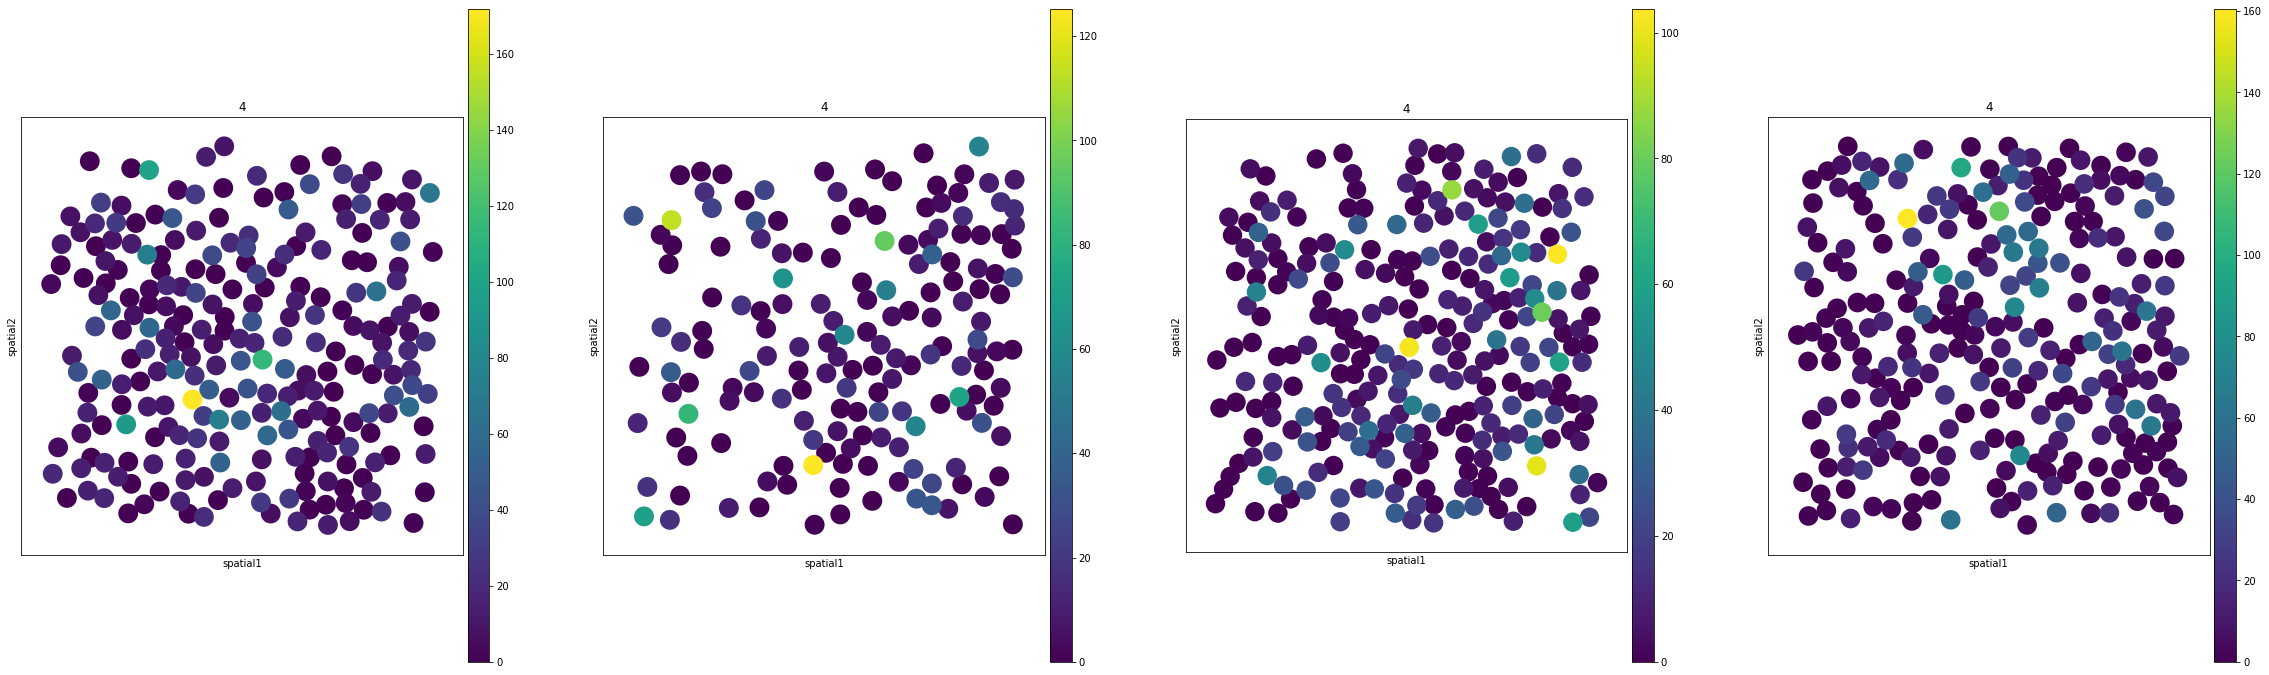

In [14]:
plt.figure(dpi=2400)
fig, axes = plt.subplots(1, 4, figsize=(40,12))
for ax, dataset in zip(axes.flatten(), trained_subsets):
    sc.pl.spatial(
        sq.pl.extract(dataset, "X"),
        color=["4"],
        spot_size=8,
        alpha_img=0.2,
        ax=ax,
        show=False
    )

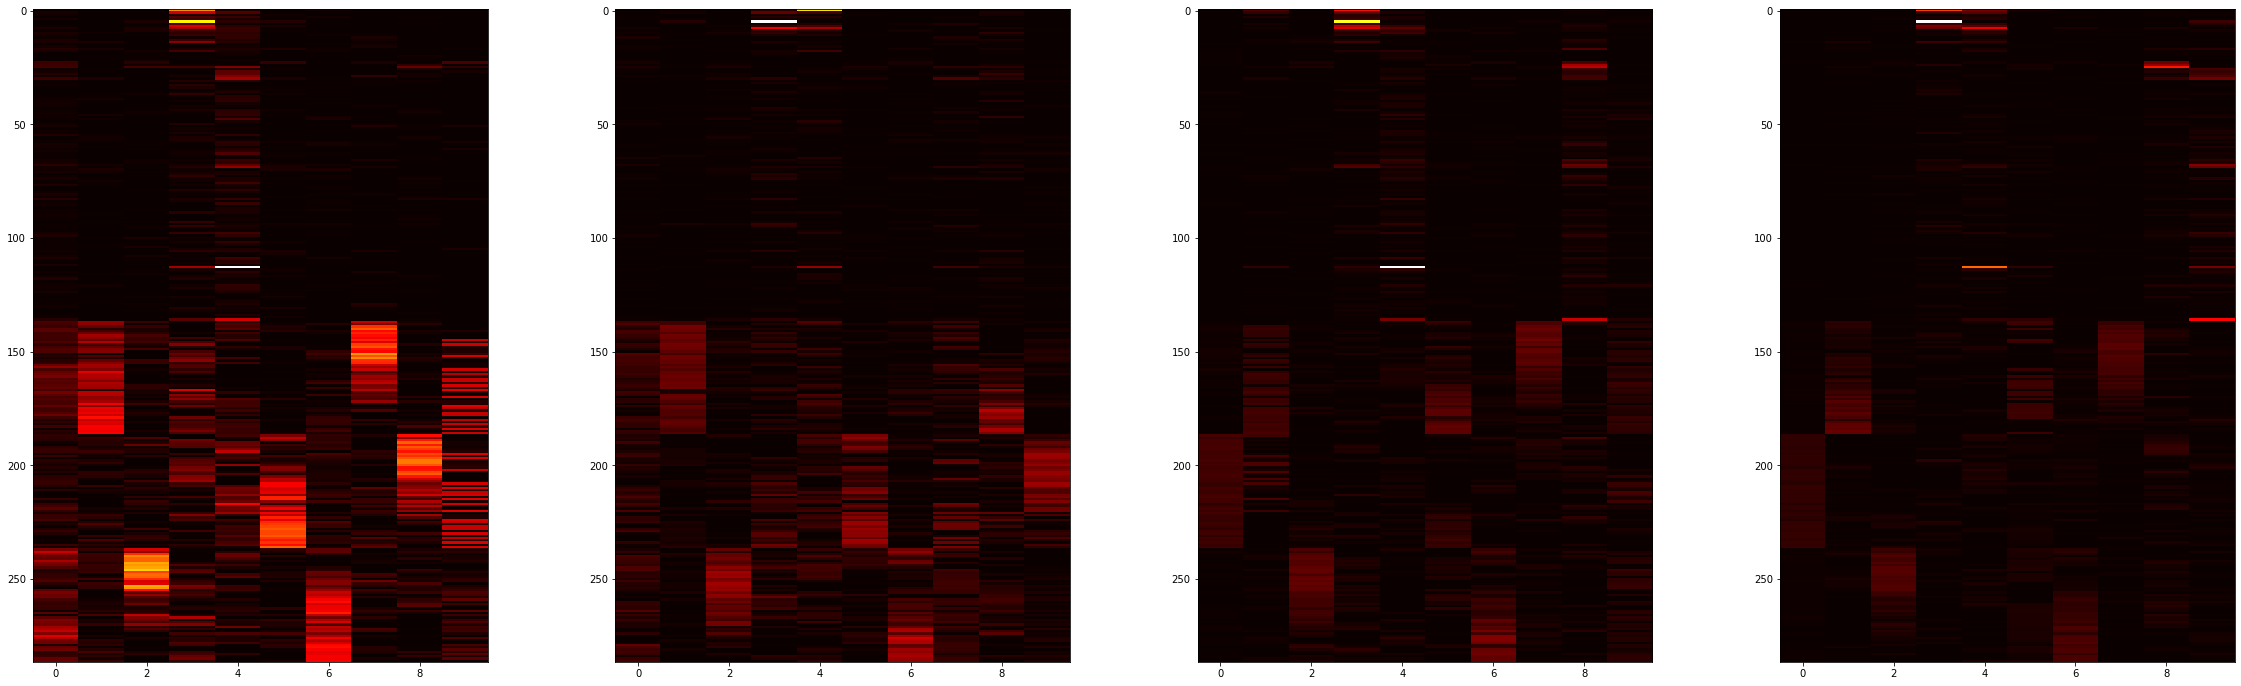

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(40, 12))
for index, (dataset, ax) in enumerate(zip(trained_subsets, axes.flatten())):
    M = dataset.uns["M"][f"{index}"]
    ax.imshow(M, cmap='hot', interpolation='nearest', aspect=0.05)
plt.show()

In [33]:
top_genes = np.argsort(dataset.uns["M"]["0"][:, 2])

## Debugging `project2simplex`

In [ ]:
a = np.load("../problematic_y.npy")
_, num_components = a.shape

In [ ]:
mu = (a.sum(axis=1, keepdims=True) - 1) / num_components

In [11]:
a

array([[-7.39116192e+00, -9.90341187e+00, -1.00210028e+01,
        -1.02933235e+01, -1.03666630e+01, -1.02237730e+01,
        -9.85505104e+00, -9.95108700e+00, -1.03987865e+01,
        -1.02712669e+01],
       [-8.02442707e+11, -1.11397752e+12, -1.13540268e+12,
        -1.16807592e+12, -1.14314615e+12, -1.12114690e+12,
        -1.14697332e+12, -1.15761571e+12, -1.14083247e+12,
        -1.15197569e+12],
       [-5.90007239e+11, -8.20870709e+11, -8.36623925e+11,
        -8.60577333e+11, -8.42594124e+11, -8.26498089e+11,
        -8.45421937e+11, -8.53269086e+11, -8.41430991e+11,
        -8.48763093e+11],
       [-7.74168117e+11, -1.07682700e+12, -1.09822037e+12,
        -1.13059326e+12, -1.10831128e+12, -1.08599994e+12,
        -1.10962396e+12, -1.12145269e+12, -1.10536897e+12,
        -1.11693450e+12],
       [-1.08641092e+12, -1.51100994e+12, -1.54042932e+12,
        -1.58482235e+12, -1.55205252e+12, -1.52154525e+12,
        -1.55622952e+12, -1.57137699e+12, -1.54854674e+12,
        -1.

In [ ]:
## Try decreasing learning rate

In [136]:
-((a - mu) > 0).sum(axis=1)

array([6, 2, 2, 6, 2, 6, 2, 6, 2, 6, 2, 5, 2, 6, 2, 5, 2, 5, 7, 6, 3, 2,
       2, 6, 2, 7, 4, 6, 2, 6, 2, 4, 6, 7, 5, 6, 4, 4, 2, 2, 5, 3, 4, 2,
       4, 4, 7, 6, 2, 7, 2, 6, 2])

In [109]:
def project2simplex(y, dim=0, zero_threshold=1e-10):
    """ 
    # https://math.stackexchange.com/questions/2402504/orthogonal-projection-onto-the-unit-simplex
    find a scalar mu such that || (y-mu)_+ ||_1 = 1

    Currently uses Newton's method to optimize || y - mu ||^2

    TODO: try implementing it this way instead: https://arxiv.org/pdf/1101.6081.pdf

    Args:
        y: vector to be projected to unit simplex
    """
    
    num_components = y.shape[dim]
    
    print(num_components)
    # y /=100000
    mu = (y.sum(dim=dim, keepdim=True) - 1) / num_components
    previous_derivative = derivative = None
    for _ in range(num_components):
        difference = y - mu
        derivative = -(difference > zero_threshold).sum(dim=dim, keepdim=True).to(y.dtype)
        assert -derivative.min() > 0, difference.clip(min=0).sum(dim).min()
        print(derivative[1])
        if previous_derivative is not None and (derivative == previous_derivative).all():
            break
        objective_value = torch.clip(difference, min=zero_threshold).sum(dim=dim, keepdim=True) - 1 
        newton_update = objective_value / derivative
        print((y-mu)[0])
        print(mu[0])
        print(newton_update[0])
        print(objective_value[0])
        mu -= newton_update
        previous_derivative = derivative

    assert (derivative == previous_derivative).all()
    
    assert not torch.isnan(y).any(), y
#     if torch.isnan(mu).any():
#         np.save("../problematic_y.npy", y.detach().cpu().numpy())

    y = (y - mu).clip(min=zero_threshold)
    assert not torch.isnan(y).any(), (mu, derivative)                                                                                                                                                                                                         
    print(y.sum(dim=dim).sub_(1))

    assert y.sum(dim=dim).sub_(1).abs_().max() < 1e-3, y.sum(dim=dim).sub_(1).abs_().max()
    
    return y

In [313]:
def project2simplex_v2(y, dim=0, zero_threshold=1e-15):
    y = y.type(torch.float64)
    if dim == 0:
        y = y.T
        
    num_samples, num_components = y.shape
        
    v = torch.zeros_like(y)
    v[:, 0] = 1
    
    v_tilde = torch.zeros_like(y)
    rho = y[:, 0] - 1
    for i in range(1, num_components):
        y_i = y[:, i]
        valid_indices = y_i > rho
        rho[valid_indices] = rho[valid_indices] + (y_i[valid_indices] - rho[valid_indices]) / (v[valid_indices].sum(axis=1) + 1)
        valid_indices = rho > y_i - 1
        v[valid_indices, i] = 1
        if valid_indices.sum() < num_samples:
            v_tilde[~valid_indices] += v[~valid_indices]
            v[~valid_indices] = torch.zeros_like(y[~valid_indices])
            v[~valid_indices, i] = 1
            rho[~valid_indices] = y_i[~valid_indices] - 1
        
    valid_indices = v_tilde.sum(axis=1) > 0
    if valid_indices.sum() > num_samples:
        y_valid = y[valid_indices]
        rho_valid = rho[valid_indices]
        v_valid = v[valid_indices]
        v_tilde_valid = v_tilde[valid_indices]
        for i in range(num_components):
            v_tilde_i = v_tilde_valid[:, i]
            y_greater_than_rho = torch.logical_and(y_valid[:, i] > rho_valid, v_tilde_i)
            if y_greater_than_rho.any():
                v[y_greater_than_rho, i] = 1
                rho[valid_indices][y_greater_than_rho] = rho_valid[y_greater_than_rho] + (y_valid - rho_valid)[y_greater_than_rho] / v_valid[y_greater_than_rho].sum(axis=1)
    
    v_sum = -1
    while (v_sum != v.sum(axis=1)).any():
        v_sum = v.sum(axis=1)
        for i in range(num_components):
            y_lessish_than_rho = torch.logical_and(y[:, i] <= rho, v_tilde[:, i])
            if y_lessish_than_rho.any():
                v[y_lessish_than_rho, i] = 0
                rho[y_lessish_than_rho] = rho[y_lessish_than_rho] + (rho[y_lessish_than_rho] - y[y_lessish_than_rho]) / v[y_lessish_than_rho].sum(axis=1)

    K = v.sum(axis=1)
    
    print((y - rho[:, None]).shape)
    x = torch.clip(y - rho[:, None], min=zero_threshold)
    
    if dim == 0:
        x = x.T

    x = x.type(torch.float32)
    return x

In [314]:
def project2simplex_v2_single(y, zero_threshold=1e-15):
    num_components = len(y)
    v = torch.zeros_like(y)
    v[0] = 1
    
    v_tilde = torch.zeros_like(y)
    rho = y[0] - 1
    for i in range(1, num_components):
        y_i = y[i]
        rho = rho + (y_i / (v.sum() + 1) - rho / (v.sum() + 1))
        if rho > y_i - 1:
            v[i] = 1
        else:
            v_tilde += v
            v = torch.zeros_like(y)
            v[i] = 1
            rho = y_i - 1
        
    if v_tilde.sum() > 0:
        for i in range(num_components):
            if v_tilde[i] and y[i] > rho:
                v[i] = 1
                rho = rho + (y[i]/ v.sum() - rho/ v.sum())
    
    v_sum = -1
    while (v_sum != v.sum()):
        v_sum = v.sum()
        for i in range(num_components):
            if v[i] and y[i] <= rho:
                print("iterating")
                v[i] = 0
                rho = rho + (rho/ v.sum() - y[i]/ v.sum())
                

    K = v.sum()
    
    print(rho)
    x = torch.clip(y - rho, min=zero_threshold)
        
    return x

In [315]:
def project2simplex_v3_single(y, zero_threshold=1e-15):
    num_components = len(y)
    v = torch.ones_like(y, dtype=bool)
    rho = (y.sum() - 1) / num_components
 
    v_sum = -1
    while (v_sum != v.sum()):
        v_sum = v.sum()
        v = y > rho
        print((y[v].sum() - 1)/ v.sum())
        rho = (y[v].sum() - 1) / v.sum()
                
    K = v.sum()
    
    print(rho)
    x = torch.clip(y - rho, min=zero_threshold)
        
    return x

In [316]:
project2simplex_v2(torch.tensor(a, dtype=torch.float64), dim=1).sum(axis=1)

torch.Size([59, 10])


tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0208, 1.0000, 1.0000, 1.0457,
        1.0000, 1.0000, 1.0016, 1.1026, 1.0000, 1.0000, 1.0000, 1.0758, 1.0000,
        1.0000, 1.0454, 1.0000, 1.0000, 1.1580, 1.0000, 1.0000, 1.0000, 1.0159,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0352, 1.0171, 1.0982,
        1.1034, 1.0000, 1.0000, 1.0000, 1.0842, 1.0000, 1.1780, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.1688, 1.0000, 1.0000, 1.0000, 1.0233, 1.1631,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [320]:
project2simplex_v2(torch.tensor([[1e12, 1e12, 1e14], [1e14, 1e14, 1e14]], dtype=torch.float64), dim=1)

RuntimeError: shape mismatch: value tensor of shape [3] cannot be broadcast to indexing result of shape [1]